# YUEHCHAO WU
# Anime Recommender System
# Surprise: Model Evaluation & Comparison

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Source-of-Data-:-Kaggle-Anime-Recommendations-Database" data-toc-modified-id="Source-of-Data-:-Kaggle-Anime-Recommendations-Database-1"><span class="toc-item-num">1&nbsp;&nbsp;</span><strong>Source of Data : <a href="https://www.kaggle.com/CooperUnion/anime-recommendations-database" target="_blank">Kaggle Anime Recommendations Database</a></strong></a></span></li><li><span><a href="#Import-libraries" data-toc-modified-id="Import-libraries-2"><span class="toc-item-num">2&nbsp;&nbsp;</span><strong>Import libraries</strong></a></span></li><li><span><a href="#Load-Data-&amp;-Result" data-toc-modified-id="Load-Data-&amp;-Result-3"><span class="toc-item-num">3&nbsp;&nbsp;</span><strong>Load Data &amp; Result</strong></a></span><ul class="toc-item"><li><span><a href="#Data" data-toc-modified-id="Data-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Data</a></span></li><li><span><a href="#Result" data-toc-modified-id="Result-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Result</a></span></li></ul></li><li><span><a href="#Configurtion-for-Model-Evaluation" data-toc-modified-id="Configurtion-for-Model-Evaluation-4"><span class="toc-item-num">4&nbsp;&nbsp;</span><strong>Configurtion for Model Evaluation</strong></a></span><ul class="toc-item"><li><span><a href="#Import-My-Custom-Builded-evaluation-metrics" data-toc-modified-id="Import-My-Custom-Builded-evaluation-metrics-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Import My Custom Builded evaluation metrics</a></span></li><li><span><a href="#Confirgure-splite,kf_5-(5-fold-and-fix-random-state-to-1)" data-toc-modified-id="Confirgure-splite,kf_5-(5-fold-and-fix-random-state-to-1)-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Confirgure splite,<code>kf_5</code> (5 fold and fix random state to 1)</a></span></li></ul></li><li><span><a href="#Sensitivity-Analysis" data-toc-modified-id="Sensitivity-Analysis-5"><span class="toc-item-num">5&nbsp;&nbsp;</span><strong>Sensitivity Analysis</strong></a></span><ul class="toc-item"><li><span><a href="#Sensitivity-Analysis-Figure" data-toc-modified-id="Sensitivity-Analysis-Figure-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Sensitivity Analysis Figure</a></span></li></ul></li><li><span><a href="#Model-Evaluation-&amp;-Comparision" data-toc-modified-id="Model-Evaluation-&amp;-Comparision-6"><span class="toc-item-num">6&nbsp;&nbsp;</span><strong>Model Evaluation &amp; Comparision</strong></a></span><ul class="toc-item"><li><span><a href="#Evaluating-Prediction-Performance-on-testset" data-toc-modified-id="Evaluating-Prediction-Performance-on-testset-6.1"><span class="toc-item-num">6.1&nbsp;&nbsp;</span><strong>Evaluating Prediction Performance on testset</strong></a></span><ul class="toc-item"><li><span><a href="#Overall" data-toc-modified-id="Overall-6.1.1"><span class="toc-item-num">6.1.1&nbsp;&nbsp;</span>Overall</a></span></li><li><span><a href="#Breakdown-by-Rating-Scale" data-toc-modified-id="Breakdown-by-Rating-Scale-6.1.2"><span class="toc-item-num">6.1.2&nbsp;&nbsp;</span>Breakdown by Rating Scale</a></span></li></ul></li><li><span><a href="#Evaluating-Recommendation-Performance-on-testset-with-unknown-rating" data-toc-modified-id="Evaluating-Recommendation-Performance-on-testset-with-unknown-rating-6.2"><span class="toc-item-num">6.2&nbsp;&nbsp;</span><strong>Evaluating Recommendation Performance on testset with unknown rating</strong></a></span><ul class="toc-item"><li><span><a href="#Call-test-method-on-testset-with-unknown-rating" data-toc-modified-id="Call-test-method-on-testset-with-unknown-rating-6.2.1"><span class="toc-item-num">6.2.1&nbsp;&nbsp;</span>Call test method on testset with unknown rating</a></span></li><li><span><a href="#Precision-&amp;-Recall" data-toc-modified-id="Precision-&amp;-Recall-6.2.2"><span class="toc-item-num">6.2.2&nbsp;&nbsp;</span>Precision &amp; Recall</a></span></li><li><span><a href="#nDCG,-Coverage,-and-Average-List-Popularity" data-toc-modified-id="nDCG,-Coverage,-and-Average-List-Popularity-6.2.3"><span class="toc-item-num">6.2.3&nbsp;&nbsp;</span>nDCG, Coverage, and Average List Popularity</a></span></li></ul></li></ul></li><li><span><a href="#Top-10-Recommendation-using-Selected-Model" data-toc-modified-id="Top-10-Recommendation-using-Selected-Model-7"><span class="toc-item-num">7&nbsp;&nbsp;</span><strong>Top 10 Recommendation using Selected Model</strong></a></span></li></ul></div>

## __Source of Data : [Kaggle Anime Recommendations Database](https://www.kaggle.com/CooperUnion/anime-recommendations-database)__

## __Import libraries__

In [1]:
#standard tools
import pandas as pd
from scipy.stats import ttest_rel,probplot
import numpy as np
from matplotlib import pyplot as plt
import re
import glob
import seaborn as sns
from sklearn.model_selection import train_test_split
from wordcloud import WordCloud
import math
import copy as cp
from collections import defaultdict
import matplotlib.ticker 
sns.set_style('white')
import time
import datetime


#from surprise
from surprise import KNNWithMeans,SVD,SVDpp,NMF,SlopeOne,CoClustering
from surprise import Reader, Dataset,accuracy
from surprise.model_selection import cross_validate, KFold, ShuffleSplit, GridSearchCV
from surprise.prediction_algorithms import PredictionImpossible
from surprise.model_selection import train_test_split as surprisesplit
from surprise import dump

#user defined functions
from prec_recall import precision_recall_at_k,pr_eval
from sigweight import KNNSigWeighting
from data_cleaning import *
from hybrid import WeightedHybrid

## __Load Data & Result__

### Data

In [2]:
#list of anime files
Alst=glob.glob('anime*') 

#load anime files into list of pandas df
Adf=[]
for i in Alst:
    Adf.append(pd.read_csv(i))

Anime = Adf[0]

In [3]:
## data for use

#load data into suprise object

reader = Reader(line_format='user item rating', sep=',',rating_scale=(1, 10),skip_lines=1)
WholeSet = Dataset.load_from_file('core_movie_comedy_rating.csv', reader)
S_train = Dataset.load_from_file('train.csv', reader)
S_test = Dataset.load_from_file('test.csv', reader)

# surprise trainset  
trainset = S_train.build_full_trainset() # 80% of data for training
WholeSet_train = WholeSet.build_full_trainset() # wholeSet as training

# testset for evaluating RMSE

testset = list(map(lambda x : x[0:3],S_test.raw_ratings)) # 20% of data as testset for evaluating rmse


# testset for evaluating relevence(Precision, Recall, NDCG)
NoRatingSet = WholeSet_train.build_anti_testset(fill=1) #whole unknown rating

_, noRate_test = train_test_split(NoRatingSet, test_size=0.2, random_state=1, stratify=list(map(lambda x: x[0], NoRatingSet)))

testPlusUnknown=testset+noRate_test #testset + 20% of unknown rating for evaluating relevence


### Result

In [4]:
# load best rmse
best_rmses_df=pd.read_csv('best_rmses_df.csv',index_col=0)

In [5]:
## load resuts

# load knn result_df & prediction & algo

I_knn_result_df=pd.read_csv('I_knn_result.csv',index_col=0)
I_pre_knn,I_bestKnn = dump.load('I_knnbestalgo')

# load SVD result_df & prediction & algo

SVD_result_df=pd.read_csv('svd_results.csv',index_col=0)
SVD_pre,SVD_best = dump.load('svd_best')

# load coclustering result_df & prediction & algo

co_results_df=pd.read_csv('co_results.csv',index_col=0)
co_pre,co_best = dump.load('co_best')


# svdpp alg & prediciton
al=SVDpp(n_factors= 300, n_epochs= 20, lr_all= 0.02, reg_all= 0.02,random_state=1,verbose=True)
al.fit(trainset)
z=al.test(testset)

 processing epoch 0
 processing epoch 1
 processing epoch 2
 processing epoch 3
 processing epoch 4
 processing epoch 5
 processing epoch 6
 processing epoch 7
 processing epoch 8
 processing epoch 9
 processing epoch 10
 processing epoch 11
 processing epoch 12
 processing epoch 13
 processing epoch 14
 processing epoch 15
 processing epoch 16
 processing epoch 17
 processing epoch 18
 processing epoch 19


## __Configurtion for Model Evaluation__

### Import My Custom Builded evaluation metrics
Codes: [Evaluation_Implemntation](.\Evaluation_Implemntation.py)

In [1]:
from Evaluation_Implemntation import *

### Confirgure splite,`kf_5` (5 fold and fix random state to 1)

In [6]:
##define kfold with  fold =5 and set random state = 1##
kf_5=KFold(n_splits=5,random_state=1)

## __Sensitivity Analysis__

In [64]:
##KNNWithMeans
# differnt k
# best algo=KNNWithMeans(k=5, sim_options={'name': 'pearson', 'user_based': False, 'min_support': 10})


list_K =[1,3,5,19,40,95,175]
knn_test_rmses=[]
knn_train_rmses=[]
knn_cv_rmses=[]

for i,v in enumerate(list_K):
    
    algo=KNNWithMeans(k=v, sim_options={'name': 'pearson', 'user_based': False, 'min_support': 10}) 
    algo.fit(trainset)
    knn_test_rmses.append(accuracy.rmse(algo.test(testset)))
    knn_train_rmses.append(accuracy.rmse(algo.test(trainset.build_testset())))
    knn_cv_rmses.append(np.mean(cross_validate(algo,S_train,['RMSE'],cv=kf_5)['test_rmse']))
    

Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 1.2724
RMSE: 0.0001
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 1.0987
RMSE: 0.5783
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson si

In [65]:
##SVD
# differnt n_factors
# best algo=SVD(n_factors= 300, n_epochs= 20, lr_all= 0.02, reg_all= 0.02, verbose= True)

list_n_factors =[5,10,50,100,300,500,700]

svd_test_rmses=[]
svd_train_rmses=[]
svd_cv_rmses=[]

for i,v in enumerate(list_n_factors):
    
    algo=SVD(n_factors= v, n_epochs= 20, lr_all= 0.02, reg_all= 0.02, verbose= True,random_state=1) 
    algo.fit(trainset)
    svd_test_rmses.append(accuracy.rmse(algo.test(testset)))
    svd_train_rmses.append(accuracy.rmse(algo.test(trainset.build_testset())))
    svd_cv_rmses.append(np.mean(cross_validate(algo,S_train,['RMSE'],cv=kf_5)['test_rmse']))
    

Processing epoch 0
Processing epoch 1
Processing epoch 2
Processing epoch 3
Processing epoch 4
Processing epoch 5
Processing epoch 6
Processing epoch 7
Processing epoch 8
Processing epoch 9
Processing epoch 10
Processing epoch 11
Processing epoch 12
Processing epoch 13
Processing epoch 14
Processing epoch 15
Processing epoch 16
Processing epoch 17
Processing epoch 18
Processing epoch 19
RMSE: 1.1019
RMSE: 0.7999
Processing epoch 0
Processing epoch 1
Processing epoch 2
Processing epoch 3
Processing epoch 4
Processing epoch 0
Processing epoch 1
Processing epoch 5
Processing epoch 2
Processing epoch 6
Processing epoch 3
Processing epoch 7
Processing epoch 1
Processing epoch 0
Processing epoch 4
Processing epoch 8
Processing epoch 5
Processing epoch 9
Processing epoch 2
Processing epoch 6
Processing epoch 11
Processing epoch 0
Processing epoch 10
Processing epoch 3
Processing epoch 1
Processing epoch 7
Processing epoch 4
Processing epoch 2
Processing epoch 8
Processing epoch 12
Processing 

Processing epoch 9
Processing epoch 10
Processing epoch 8
Processing epoch 9
Processing epoch 10
Processing epoch 11
Processing epoch 9
Processing epoch 10
Processing epoch 11
Processing epoch 12
Processing epoch 10
Processing epoch 11
Processing epoch 12
Processing epoch 13
Processing epoch 11
Processing epoch 12
Processing epoch 13
Processing epoch 14
Processing epoch 12
Processing epoch 13
Processing epoch 14
Processing epoch 15
Processing epoch 13
Processing epoch 14
Processing epoch 15
Processing epoch 16
Processing epoch 14
Processing epoch 15
Processing epoch 16
Processing epoch 17
Processing epoch 15
Processing epoch 16
Processing epoch 17
Processing epoch 18
Processing epoch 16
Processing epoch 17
Processing epoch 18
Processing epoch 19
Processing epoch 17
Processing epoch 18
Processing epoch 19
Processing epoch 18
Processing epoch 19
Processing epoch 0
Processing epoch 19
Processing epoch 1
Processing epoch 2
Processing epoch 3
Processing epoch 4
Processing epoch 5
Processing

Processing epoch 12
Processing epoch 13
Processing epoch 14
Processing epoch 15
Processing epoch 16
Processing epoch 17
Processing epoch 18
Processing epoch 19


In [66]:
##coclustering
# differnt n_cltr_u
# best algo=CoClustering(n_cltr_u=5, n_cltr_i= 150,n_epochs=20, verbose= True) 



list_n_cltr_u =[5,10,100,300,3000]

co_test_rmses=[]
co_train_rmses=[]
co_cv_rmses=[]

for i,v in enumerate(list_n_cltr_u):
    
    algo=CoClustering(n_cltr_u= v, n_cltr_i= 150,n_epochs=20, verbose= True,random_state=1) 
    algo.fit(trainset)
    co_test_rmses.append(accuracy.rmse(algo.test(testset)))
    co_train_rmses.append(accuracy.rmse(algo.test(trainset.build_testset())))
    co_cv_rmses.append(np.mean(cross_validate(algo,S_train,['RMSE'],cv=kf_5)['test_rmse']))
    

Processing epoch 0
Processing epoch 1
Processing epoch 2
Processing epoch 3
Processing epoch 4
Processing epoch 5
Processing epoch 6
Processing epoch 7
Processing epoch 8
Processing epoch 9
Processing epoch 10
Processing epoch 11
Processing epoch 12
Processing epoch 13
Processing epoch 14
Processing epoch 15
Processing epoch 16
Processing epoch 17
Processing epoch 18
Processing epoch 19
RMSE: 1.1599
RMSE: 1.0098
Processing epoch 0
Processing epoch 0
Processing epoch 1
Processing epoch 0
Processing epoch 0
Processing epoch 1
Processing epoch 2
Processing epoch 1
Processing epoch 1
Processing epoch 2
Processing epoch 3
Processing epoch 2
Processing epoch 2
Processing epoch 3
Processing epoch 4
Processing epoch 3
Processing epoch 3
Processing epoch 4
Processing epoch 5
Processing epoch 4
Processing epoch 5
Processing epoch 4
Processing epoch 6
Processing epoch 5
Processing epoch 6
Processing epoch 5
Processing epoch 7
Processing epoch 6
Processing epoch 7
Processing epoch 6
Processing epo

Processing epoch 9
Processing epoch 9
Processing epoch 9
Processing epoch 9
Processing epoch 10
Processing epoch 10
Processing epoch 10
Processing epoch 10
Processing epoch 11
Processing epoch 11
Processing epoch 11
Processing epoch 11
Processing epoch 12
Processing epoch 12
Processing epoch 12
Processing epoch 12
Processing epoch 13
Processing epoch 13
Processing epoch 13
Processing epoch 13
Processing epoch 14
Processing epoch 14
Processing epoch 14
Processing epoch 14
Processing epoch 15
Processing epoch 15
Processing epoch 15
Processing epoch 15
Processing epoch 16
Processing epoch 16
Processing epoch 16
Processing epoch 16
Processing epoch 17
Processing epoch 17
Processing epoch 17
Processing epoch 17
Processing epoch 18
Processing epoch 18
Processing epoch 18
Processing epoch 18
Processing epoch 19
Processing epoch 19
Processing epoch 19
Processing epoch 19
Processing epoch 0
Processing epoch 1
Processing epoch 2
Processing epoch 3
Processing epoch 4
Processing epoch 5
Processing

In [62]:
##SVDpp
# differnt n_factors
# best algo=SVDpp(n_factors= 300, n_epochs= 20, lr_all= 0.02, reg_all= 0.02, verbose= True)

p_list_n_factors =[5,10,50,300,500]

svdpp_test_rmses=[]
svdpp_train_rmses=[]
svdpp_cv_rmses=[]

for i,v in enumerate(list_n_factors):
    
    algo=SVDpp(n_factors= v, n_epochs= 20, lr_all= 0.02, reg_all= 0.02, verbose= True,random_state=1) 
    algo.fit(trainset)
    svdpp_test_rmses.append(accuracy.rmse(algo.test(testset)))
    svdpp_train_rmses.append(accuracy.rmse(algo.test(trainset.build_testset())))
    svdpp_cv_rmses.append(np.mean(cross_validate(algo,S_train,['RMSE'],cv=kf_5)['test_rmse']))

 processing epoch 0
 processing epoch 1
 processing epoch 2
 processing epoch 3
 processing epoch 4
 processing epoch 5
 processing epoch 6
 processing epoch 7
 processing epoch 8
 processing epoch 9
 processing epoch 10
 processing epoch 11
 processing epoch 12
 processing epoch 13
 processing epoch 14
 processing epoch 15
 processing epoch 16
 processing epoch 17
 processing epoch 18
 processing epoch 19
RMSE: 1.1065
RMSE: 0.8190
 processing epoch 0
 processing epoch 0
 processing epoch 0
 processing epoch 0
 processing epoch 1
 processing epoch 1
 processing epoch 1
 processing epoch 1
 processing epoch 2
 processing epoch 2
 processing epoch 2
 processing epoch 2
 processing epoch 3
 processing epoch 3
 processing epoch 3
 processing epoch 3
 processing epoch 4
 processing epoch 4
 processing epoch 4
 processing epoch 4
 processing epoch 5
 processing epoch 5
 processing epoch 5
 processing epoch 5
 processing epoch 6
 processing epoch 6
 processing epoch 6
 processing epoch 6
 pro

 processing epoch 3
 processing epoch 4
 processing epoch 4
 processing epoch 4
 processing epoch 4
 processing epoch 5
 processing epoch 5
 processing epoch 5
 processing epoch 5
 processing epoch 6
 processing epoch 6
 processing epoch 6
 processing epoch 6
 processing epoch 7
 processing epoch 7
 processing epoch 7
 processing epoch 7
 processing epoch 8
 processing epoch 8
 processing epoch 8
 processing epoch 8
 processing epoch 9
 processing epoch 9
 processing epoch 9
 processing epoch 9
 processing epoch 10
 processing epoch 10
 processing epoch 10
 processing epoch 10
 processing epoch 11
 processing epoch 11
 processing epoch 11
 processing epoch 11
 processing epoch 12
 processing epoch 12
 processing epoch 12
 processing epoch 12
 processing epoch 13
 processing epoch 13
 processing epoch 13
 processing epoch 13
 processing epoch 14
 processing epoch 14
 processing epoch 14
 processing epoch 14
 processing epoch 15
 processing epoch 15
 processing epoch 15
 processing epoch

### Sensitivity Analysis Figure

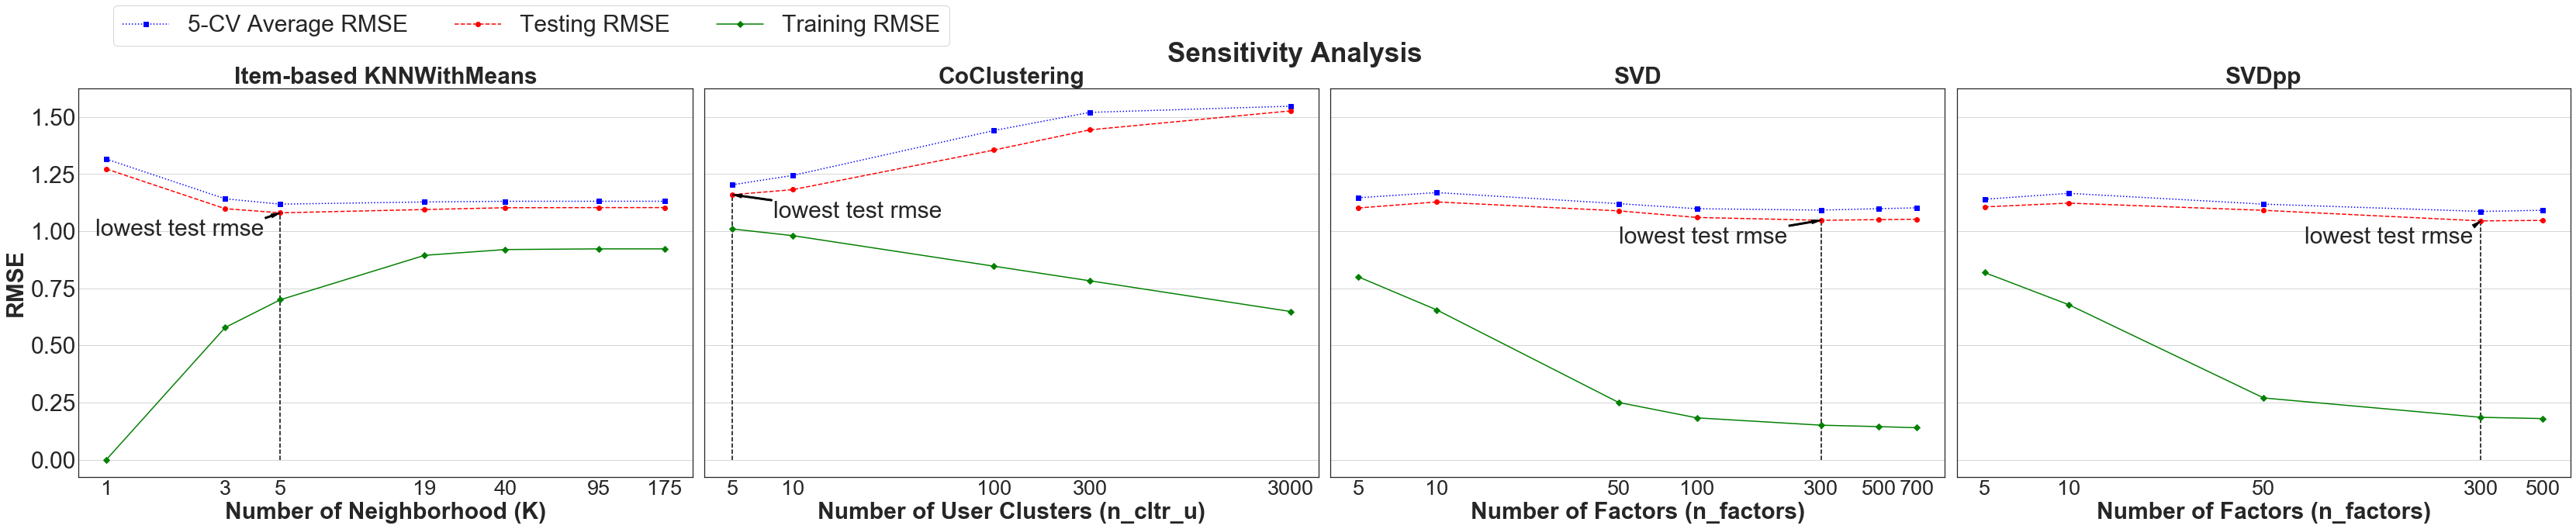

In [102]:
# Sensitivity Analysis (differnt factor)

fig,(ax1,ax2,ax3,ax4) = plt.subplots(1,4,figsize=(46,10),sharey=True)

fig.suptitle('Sensitivity Analysis',size=35,weight='bold')

for i, ax in enumerate(fig.axes):
        
        ax.yaxis.grid(True)
        ax.xaxis.set_tick_params(labelsize=27)
        ax.yaxis.set_tick_params(labelsize=30)

        
#knn
ax1.plot(list_K ,knn_cv_rmses,'bs:',label='5-CV Average RMSE')
ax1.plot(list_K ,knn_test_rmses,'ro--',label='Testing RMSE')
ax1.plot(list_K ,knn_train_rmses,'gD-',label='Training RMSE')


ax1.set_xlabel('Number of Neighborhood (K)',size=30,weight='bold')
ax1.set_ylabel('RMSE',size=30,weight='bold')
#ax1.legend(loc=4,frameon=False,fontsize = 'xx-large')
ax1.set_title('Item-based KNNWithMeans',size=30,weight='bold')
ax1.set_xscale('log')
ax1.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
ax1.set_xticks(list_K)

y_min=min(knn_test_rmses)
x_min=list_K[knn_test_rmses.index(y_min)]
ax1.annotate(arrowprops=dict(facecolor='black',width=2,headwidth=5),s='lowest test rmse',xy=(x_min,y_min),xytext=(x_min-4.1,y_min-0.1),size=30)
ax1.vlines(x_min,0,y_min,linestyles='dashed')       
ax1.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc=3,ncol=4, borderaxespad=1.5,frameon=True,fontsize = 30)           




#coclustirng
ax2.plot(list_n_cltr_u ,co_cv_rmses,'bs:',label='5-CV Average RMSE')
ax2.plot(list_n_cltr_u, co_test_rmses,'ro--',label='Testing RMSE')
ax2.plot(list_n_cltr_u, co_train_rmses,'gD-',label='Training RMSE')


ax2.set_xlabel('Number of User Clusters (n_cltr_u)',size=30,weight='bold')
#ax2.set_ylabel('RMSE',size=20,weight='bold')
#ax2.legend(loc=3,frameon=False,fontsize = 'xx-large')
#ax2.legend(bbox_to_anchor=(1,0), loc="lower right", bbox_transform=fig.transFigure, ncol=3,fontsize = 'xx-large',frameon=True)
#ax2.legend(bbox_to_anchor=(1.04,0.5), loc="center left", borderaxespad=0,fontsize = 'xx-large',frameon=True)
ax2.set_title('CoClustering',size=30,weight='bold')

ax2.set_xscale('log')
ax2.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
ax2.set_xticks(list_n_cltr_u)


y_min=min(co_test_rmses)
x_min=list_n_factors[co_test_rmses.index(y_min)]
ax2.annotate(arrowprops=dict(facecolor='black',width=2,headwidth=5),s='lowest test rmse',xy=(x_min,y_min),xytext=(x_min+3,y_min-0.1),size=30)
ax2.vlines(x_min,0,y_min,linestyles='dashed')


#svd
ax3.plot(list_n_factors ,svd_cv_rmses,'bs:',label='5-CV Average RMSE')
ax3.plot(list_n_factors, svd_test_rmses,'ro--',label='Testing RMSE')
ax3.plot(list_n_factors, svd_train_rmses,'gD-',label='Training RMSE')


ax3.set_xlabel('Number of Factors (n_factors)',size=30,weight='bold')
#ax3.set_ylabel('RMSE',size=25,weight='bold')
#ax2.legend(loc=3,frameon=False,fontsize = 'xx-large')
#ax3.legend(bbox_to_anchor=(1,0), loc="lower right", bbox_transform=fig.transFigure, ncol=3,fontsize = 'xx-large',frameon=True)
#ax2.legend(bbox_to_anchor=(1.04,0.5), loc="center left", borderaxespad=0,fontsize = 'xx-large',frameon=True)
ax3.set_title('SVD',size=30,weight='bold')

ax3.set_xscale('log')
ax3.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
ax3.set_xticks(list_n_factors)


y_min=min(svd_test_rmses)
x_min=list_n_factors[svd_test_rmses.index(y_min)]
ax3.annotate(arrowprops=dict(facecolor='black',width=2,headwidth=5),s='lowest test rmse',xy=(x_min,y_min),xytext=(x_min-250,y_min-0.1),size=30)
ax3.vlines(x_min,0,y_min,linestyles='dashed')

#svdpp
ax4.plot(p_list_n_factors ,svdpp_cv_rmses,'bs:',label='5-CV Average RMSE')
ax4.plot(p_list_n_factors, svdpp_test_rmses,'ro--',label='Testing RMSE')
ax4.plot(p_list_n_factors, svdpp_train_rmses,'gD-',label='Training RMSE')


ax4.set_xlabel('Number of Factors (n_factors)',size=30,weight='bold')
#ax4.set_ylabel('RMSE',size=25,weight='bold')
#ax2.legend(loc=3,frameon=False,fontsize = 'xx-large')
#ax3.legend(bbox_to_anchor=(1,0), loc="lower right", bbox_transform=fig.transFigure, ncol=3,fontsize = 'xx-large',frameon=True)
#ax2.legend(bbox_to_anchor=(1.04,0.5), loc="center left", borderaxespad=0,fontsize = 'xx-large',frameon=True)
ax4.set_title('SVDpp',size=30,weight='bold')

ax4.set_xscale('log')
ax4.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
ax4.set_xticks(p_list_n_factors)


y_min=min(svdpp_test_rmses)
x_min=p_list_n_factors[svdpp_test_rmses.index(y_min)]
ax4.annotate(arrowprops=dict(facecolor='black',width=2,headwidth=5),s='lowest test rmse',xy=(x_min,y_min),xytext=(x_min-230,y_min-0.1),size=30)
ax4.vlines(x_min,0,y_min,linestyles='dashed')



#layout & show
fig.tight_layout(rect=[0, 0.03, 1, 0.95])
fig.subplots_adjust(bottom=0.2)

plt.savefig('Sensitivity_plot3.png', bbox_inches='tight')
plt.show()

*__Model Comparison using CV RMSE__*

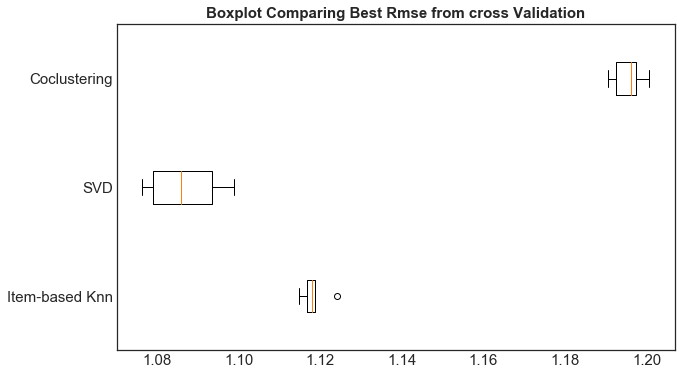

In [84]:
# boxplot comparing RMSES of each optimized algorithmns
plt.figure(figsize=(10,6))
plt.boxplot(best_rmses_df.T,vert=False)

plt.yticks([1,2,3],['Item-based Knn','SVD','Coclustering'],size=15)
plt.xticks(fontsize=15)
plt.title('Boxplot Comparing Best Rmse from cross Validation',size=15,weight='bold')

#plt.savefig('cvBestRmse.png', bbox_inches='tight')
plt.show()





## __Model Evaluation & Comparision__

### __Evaluating Prediction Performance on testset__

#### Overall

* prediciton peerformance Report

In [46]:
#prediction df with residual and absolute error
#knn
Ipred_df=pd.DataFrame(I_pre_knn)
Ipred_df['abs_error'] = abs(Ipred_df['r_ui']-Ipred_df['est']) #add abs error colume
Ipred_df['resid'] = Ipred_df.r_ui-Ipred_df.est #residual column


# SVD
SVD_pred_df=pd.DataFrame(SVD_pre)
SVD_pred_df['abs_error'] = abs(SVD_pred_df['r_ui']-SVD_pred_df['est']) #add abs error colume
SVD_pred_df['resid'] = SVD_pred_df.r_ui-SVD_pred_df.est #residual column

#coclustring
co_pred_df=pd.DataFrame(co_pre)
co_pred_df['abs_error'] = abs(co_pred_df['r_ui']-co_pred_df['est']) #add abs error colume
co_pred_df['resid'] = co_pred_df.r_ui-co_pred_df.est #residual column

#SVDpp_pred_df
SVDpp_pred_df=pd.DataFrame(z)
SVDpp_pred_df['abs_error'] = abs(SVDpp_pred_df['r_ui']-SVDpp_pred_df['est']) #add abs error colume
SVDpp_pred_df['resid'] = SVDpp_pred_df.r_ui-SVDpp_pred_df.est #residual column


In [47]:
#create prediciton perfomance df

evl_dic=defaultdict(list)
#get proproctiy of optimized
evl_dic['Best Setting'] = ["k=5, 'name': 'pearson','Item_based','min_support': 10","n_factors= 300, n_epochs= 20, lr_all= 0.02, reg_all= 0.02","n_cltr_u= 5, n_cltr_i= 150, n_epochs= 20","n_factors= 300, n_epochs= 20, lr_all= 0.02, reg_all= 0.02"]

#get info of prediciton performacne
for i,v in enumerate([Ipred_df,SVD_pred_df,co_pred_df,SVDpp_pred_df]):
    evl_dic['RMSE'].append(round(np.sqrt((v['resid']**2).sum()/v['resid'].count()),4))
    evl_dic['95% Confidence Interval of RMSE'].append(np.round(ci_rmse(v['resid'],v['resid'].count()),4))
    evl_dic['Impossible Prediction'].append(len(list(filter(lambda x: x['was_impossible']==True,v['details']))))

    
#get fit & test time
for v in [I_bestKnn,SVD_best,co_best,al]:
    
    start_train = time.time()
    v.fit(trainset)
    end_train= str(datetime.timedelta(seconds=int(time.time() - start_train)))
    evl_dic['Fit Time'].append(end_train)
    
    start_test = time.time()
    v.test(testset)
    end_test= str(datetime.timedelta(seconds=int(time.time() - start_test)))
    evl_dic['Test Time'].append(end_test)

Computing the pearson similarity matrix...
Done computing similarity matrix.
Processing epoch 0
Processing epoch 1
Processing epoch 2
Processing epoch 3
Processing epoch 4
Processing epoch 5
Processing epoch 6
Processing epoch 7
Processing epoch 8
Processing epoch 9
Processing epoch 10
Processing epoch 11
Processing epoch 12
Processing epoch 13
Processing epoch 14
Processing epoch 15
Processing epoch 16
Processing epoch 17
Processing epoch 18
Processing epoch 19
Processing epoch 0
Processing epoch 1
Processing epoch 2
Processing epoch 3
Processing epoch 4
Processing epoch 5
Processing epoch 6
Processing epoch 7
Processing epoch 8
Processing epoch 9
Processing epoch 10
Processing epoch 11
Processing epoch 12
Processing epoch 13
Processing epoch 14
Processing epoch 15
Processing epoch 16
Processing epoch 17
Processing epoch 18
Processing epoch 19
 processing epoch 0
 processing epoch 1
 processing epoch 2
 processing epoch 3
 processing epoch 4
 processing epoch 5
 processing epoch 6
 pr

In [57]:
pre_eval_df=pd.DataFrame.from_dict(evl_dic)
pre_eval_df.index=['KNNWithMeans','SVD','CoClustering','SVDpp']
pre_eval_df=pre_eval_df[['Best Setting','RMSE','95% Confidence Interval of RMSE','Impossible Prediction','Fit Time','Test Time']]
pre_eval_df=pre_eval_df.sort_index()

In [58]:
#save the report
pre_eval_df.to_csv('Pre_eval_report2.csv')

In [59]:
#read_csv & print report
pre_eval_report=pd.read_csv('Pre_eval_report2.csv',index_col=0)

pd.set_option('display.max_colwidth', 500)
pre_eval_report.style.highlight_min(['RMSE', 'Fit Time', 'Test Time'],'yellow',axis=0)

* Residaul

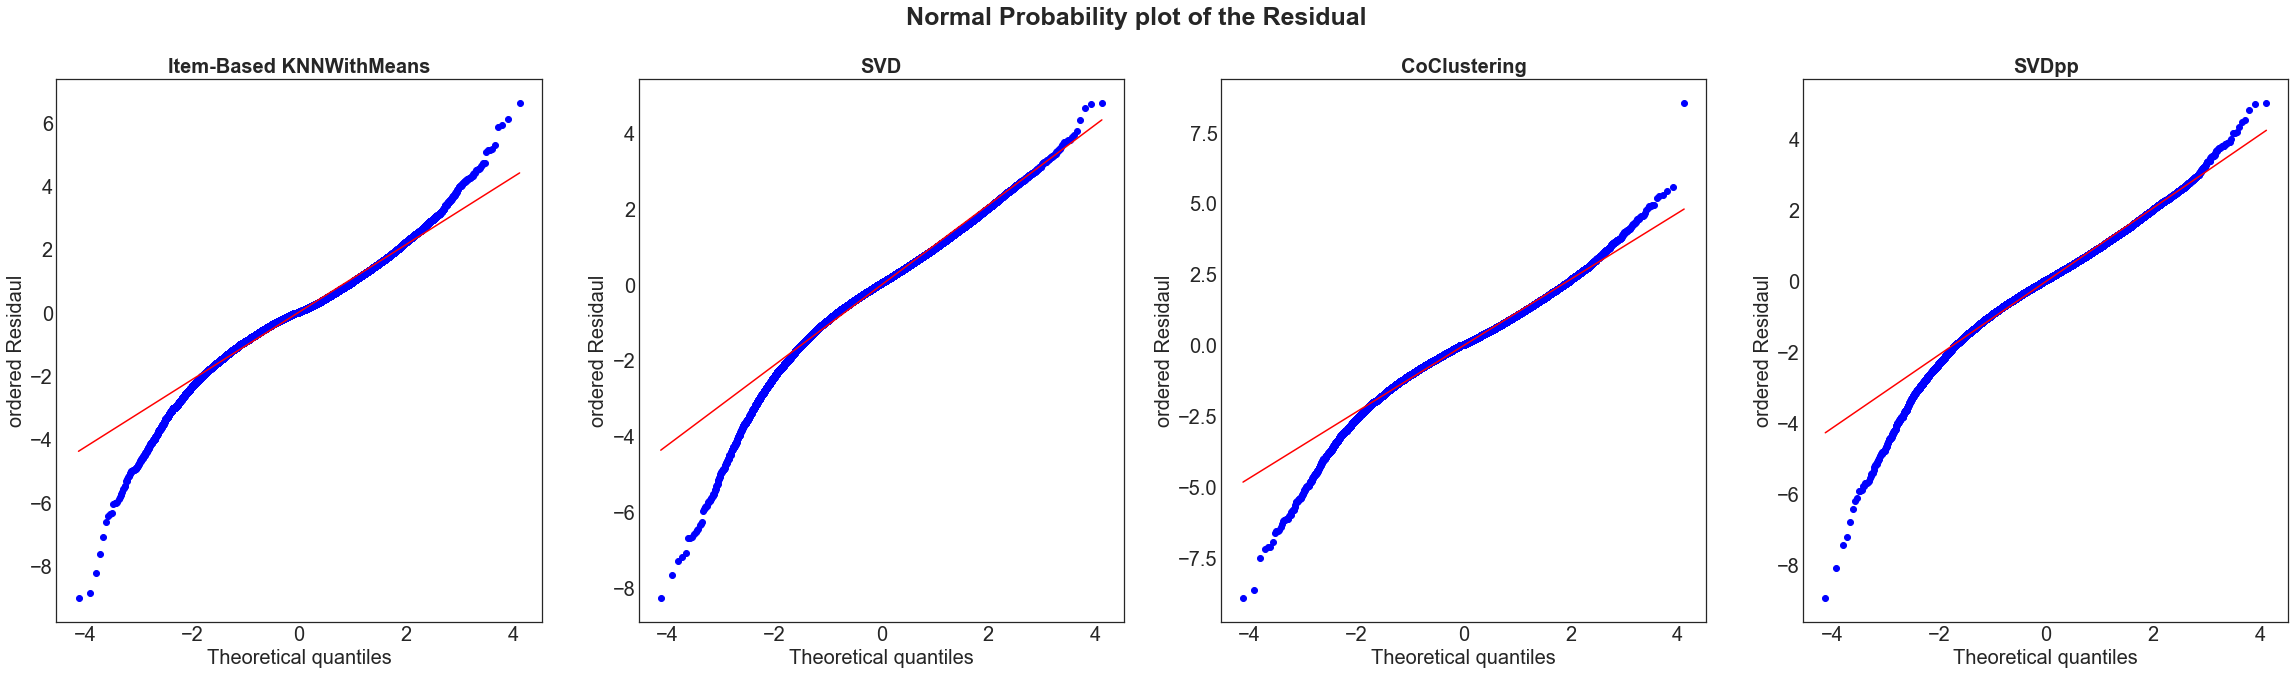

In [14]:
#plot residual

plt.figure(figsize=(40,10))
plt.suptitle('Normal Probability plot of the Residual',fontsize=25,weight='bold')


#knn
plt.subplot(1,4,1)
probplot(Ipred_df.resid, dist="norm", plot=plt)
plt.ylabel('ordered Residaul',size=20)
plt.xlabel('Theoretical quantiles',size=20)
plt.title('Item-Based KNNWithMeans',fontsize=20,weight='bold')
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)


#Svd
plt.subplot(1,4,2)
probplot(SVD_pred_df.resid, dist="norm", plot=plt)
plt.ylabel('ordered Residaul',size=20)
plt.xlabel('Theoretical quantiles',size=20)
plt.title('SVD',fontsize=20,weight='bold')
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

#coclustering
plt.subplot(1,4,3)
probplot(co_pred_df.resid, dist="norm", plot=plt)
plt.ylabel('ordered Residaul',size=20)
plt.xlabel('Theoretical quantiles',size=20)
plt.title('CoClustering',fontsize=20,weight='bold')
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

#SVDpp
plt.subplot(1,4,4)
probplot(SVDpp_pred_df.resid, dist="norm", plot=plt)
plt.ylabel('ordered Residaul',size=20)
plt.xlabel('Theoretical quantiles',size=20)
plt.title('SVDpp',fontsize=20,weight='bold')
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

#plt.savefig('Residualeval2,png')

plt.show()

#### Breakdown by Rating Scale

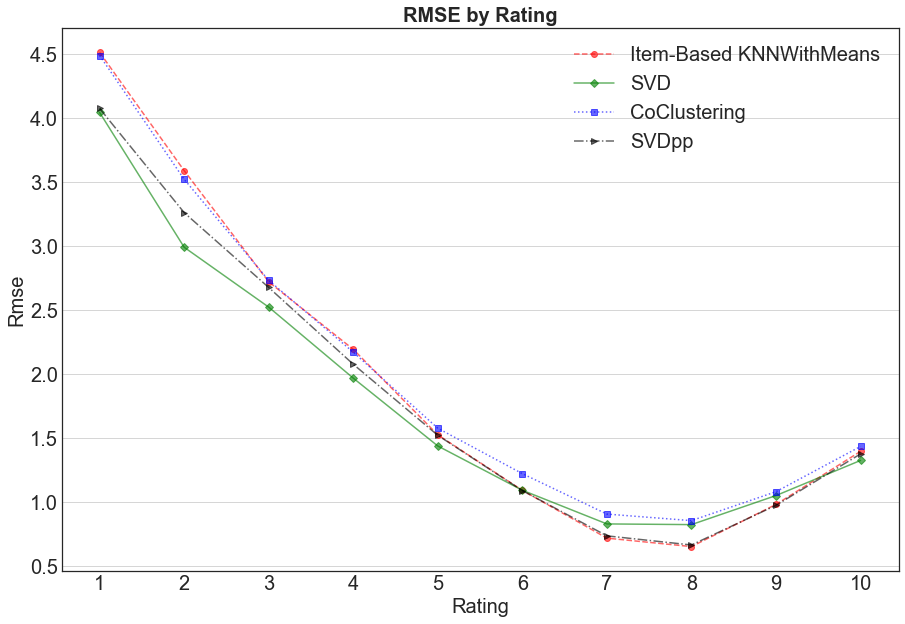

In [45]:
#function to get rmse by group
def Rm(gr):
    
    return np.sqrt((gr['resid']**2).sum()/gr['resid'].count())

## rmse by rating

knn_rmse_by_rat=Ipred_df.groupby('r_ui').apply(Rm)


svd_rmse_by_rat=SVD_pred_df.groupby('r_ui').apply(Rm)


co_rmse_by_rat=co_pred_df.groupby('r_ui').apply(Rm)

SVDpp_rmse_by_rat= SVDpp_pred_df.groupby('r_ui').apply(Rm)



plt.figure(figsize=(15,10))
plt.title('RMSE by Rating',size=20,weight='bold')
plt.plot(svd_rmse_by_rat,'ro--',label='Item-Based KNNWithMeans',alpha=0.6)
plt.plot(knn_rmse_by_rat,'gD-',label='SVD',alpha=0.6)
plt.plot(co_rmse_by_rat,'bs:',label='CoClustering',alpha=0.6)
plt.plot(SVDpp_rmse_by_rat,'k>-.',label='SVDpp',alpha=0.6)
plt.xticks([1,2,3,4,5,6,7,8,9,10],size=20)
plt.yticks(size=20)
plt.xlabel('Rating',size=20)
plt.ylabel('Rmse',size=20)

plt.legend(loc='upper right',fontsize=20)

plt.grid(b=True,axis='y')

plt.savefig('rmsebyRat2.png')

plt.show()

### __Evaluating Recommendation Performance on testset with unknown rating__

#### Call test method on testset with unknown rating
To make the evaluation more realistic, the testset for this task include 20%(same proportion as hold out testset) of Unknown rating from entire final form of data

In [8]:
#predict on testPlusUnknown
I_bestKnn.fit(trainset)
iknn_test_rank=I_bestKnn.test(testPlusUnknown)

SVD_best.fit(trainset)
SVD_test_rank=SVD_best.test(testPlusUnknown)

co_best.fit(trainset)
co_test_rank=co_best.test(testPlusUnknown)

svdpp_test_rank=al.test(testPlusUnknown)

Computing the pearson similarity matrix...
Done computing similarity matrix.
Processing epoch 0
Processing epoch 1
Processing epoch 2
Processing epoch 3
Processing epoch 4
Processing epoch 5
Processing epoch 6
Processing epoch 7
Processing epoch 8
Processing epoch 9
Processing epoch 10
Processing epoch 11
Processing epoch 12
Processing epoch 13
Processing epoch 14
Processing epoch 15
Processing epoch 16
Processing epoch 17
Processing epoch 18
Processing epoch 19
Processing epoch 0
Processing epoch 1
Processing epoch 2
Processing epoch 3
Processing epoch 4
Processing epoch 5
Processing epoch 6
Processing epoch 7
Processing epoch 8
Processing epoch 9
Processing epoch 10
Processing epoch 11
Processing epoch 12
Processing epoch 13
Processing epoch 14
Processing epoch 15
Processing epoch 16
Processing epoch 17
Processing epoch 18
Processing epoch 19


#### Precision & Recall 

In [14]:
##get ave  pre recall  list at differnt rank

r=list(range(5,105,5))
#r=list(range(5,20,5))
k_pr_lst=[]
k_rcl_lst=[]

svd_pr_lst=[]
svd_rcl_lst=[]

co_pr_lst=[]
co_rcl_lst=[]

svdpp_pr_lst=[]
svdpp_rcl_lst=[]


for i in r:
    
    # at i
    #knn
    knn_prec,knn_rcl=precision_recall_at_k(iknn_test_rank,i,5)
    k_pr_lst.append(np.mean(list(knn_prec.values())))
    k_rcl_lst.append(np.mean(list(knn_rcl.values())))
    
    #svd                
    svd_prec,svd_rcl=precision_recall_at_k(SVD_test_rank,i,5)
    svd_pr_lst.append(np.mean(list(svd_prec.values())))
    svd_rcl_lst.append(np.mean(list(svd_rcl.values())))
    
    #coclustering                
    co_prec,co_rcl=precision_recall_at_k(co_test_rank,i,5)
    co_pr_lst.append(np.mean(list(co_prec.values())))
    co_rcl_lst.append(np.mean(list(co_rcl.values())))
    
    #svdpp                
    svdpp_prec,svdpp_rcl=precision_recall_at_k(svdpp_test_rank,i,5)
    svdpp_pr_lst.append(np.mean(list(svdpp_prec.values())))
    svdpp_rcl_lst.append(np.mean(list(svdpp_rcl.values())))
                      
                    

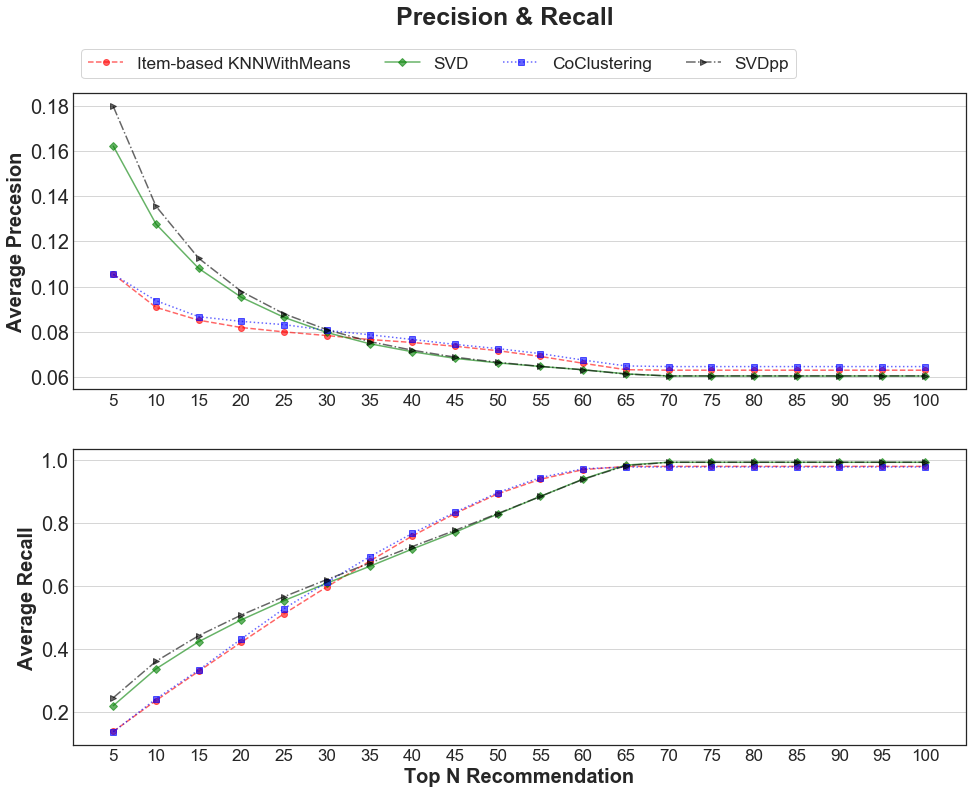

In [15]:
#plt.plot(SVDpp_rmse_by_rat,'k>-.',label='SVDpp',alpha=0.7)
##plot##
                       
fig,(ax1,ax2) = plt.subplots(2,1,figsize=(16,12))

fig.suptitle('Precision & Recall',size=25,weight='bold')

for i, ax in enumerate(fig.axes):
        
        ax.yaxis.grid(True)
        ax.xaxis.set_tick_params(labelsize=17)
        ax.yaxis.set_tick_params(labelsize=20)
        ax.set_xticks(r)

    



## plot Precison

ax1.plot(r ,k_pr_lst,'ro--',alpha=0.6,label='Item-based KNNWithMeans')
ax1.plot(r ,svd_pr_lst,'gD-',alpha=0.6,label='SVD')
ax1.plot(r ,co_pr_lst,'bs:',alpha=0.6,label='CoClustering')
ax1.plot(r,svdpp_pr_lst,'k>-.',alpha=0.6,label='SVDpp')
ax1.set_ylabel('Average Precesion',size=20,weight='bold')

ax1.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc=3,ncol=4,frameon=True,fontsize = 'xx-large')   

        
## plot Recall
ax2.plot(r ,k_rcl_lst,'ro--',alpha=0.6,label='Item-based KNNWithMeans')
ax2.plot(r ,svd_rcl_lst,'gD-',alpha=0.6,label='SVD')
ax2.plot(r ,co_rcl_lst,'bs:',alpha=0.6,label='CoClustering')
ax2.plot(r,svdpp_rcl_lst,'k>-.',alpha=0.6,label='SVDpp')

ax2.set_ylabel('Average Recall',size=20,weight='bold')
ax2.set_xlabel('Top N Recommendation',size=20,weight='bold')
#ax2.legend(bbox_to_anchor=(1,0), loc="lower right", bbox_transform=fig.transFigure, ncol=3,fontsize = 'xx-large',frameon=True)   

      
plt.savefig('pre_rec_plot_3.png',bbox_inches='tight')
plt.show()    
    

#### nDCG, Coverage, and Average List Popularity

In [10]:
#for each rank get evalautution values and create a df for each algo
iKnn_eval_df,iKnn_eval_plt=evel_rec_plot(iknn_test_rank,list(range(5,105,5)),trainset,'Item-based KNNWithMeans')
svd_eval_df,svd_eval_plt=evel_rec_plot(SVD_test_rank,list(range(5,105,5)),trainset,'SVD')
co_eval_df,co_eval_plt=evel_rec_plot(co_test_rank,list(range(5,105,5)),trainset,'CoCustering')
svdpp_eval_df,svdpp_eval_plt=evel_rec_plot(svdpp_test_rank,list(range(5,105,5)),trainset,'SVDpp')

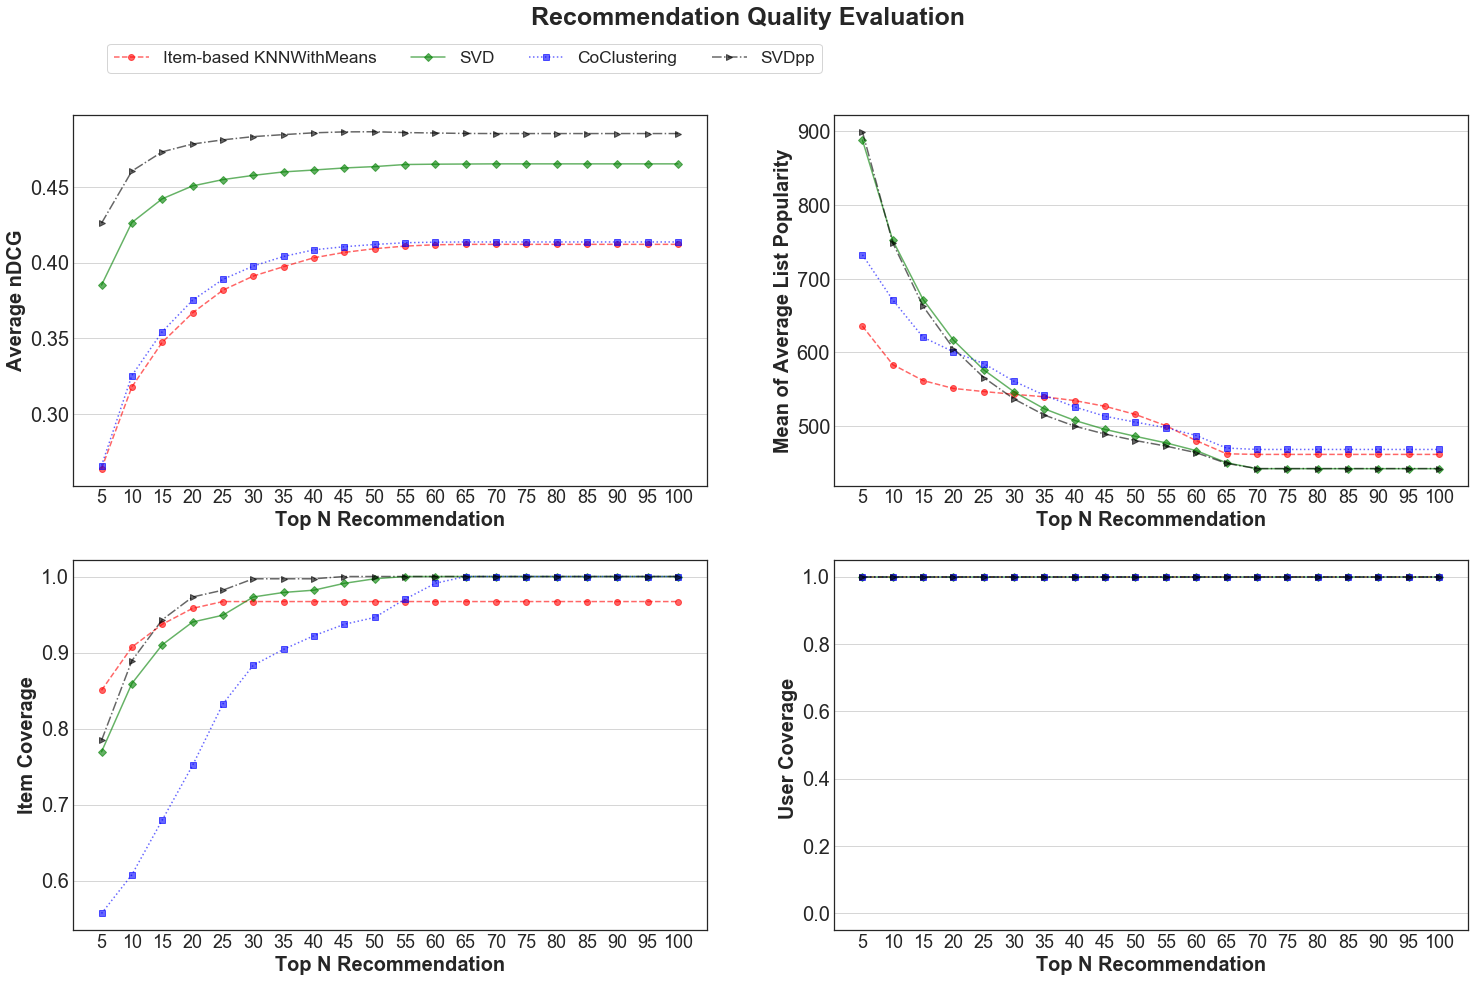

In [13]:
#plot the result to compare
rank=list(range(5,105,5))

##plots##
fig, axes = plt.subplots(2,2,figsize=(25,15))
fig.suptitle('Recommendation Quality Evaluation', size=25,weight='bold')
    
for i, ax in enumerate(fig.axes):
        
    ax.yaxis.grid(True)
    ax.set_xlabel('Top N Recommendation',size=20,weight='bold')
    ax.set_xticks(rank)
    ax.xaxis.set_tick_params(labelsize=18)
    ax.yaxis.set_tick_params(labelsize=20)
    
    
## plot ndcg
axes[0,0].plot(rank ,iKnn_eval_df['ndcg'],'ro--',alpha=0.6,label='Item-based KNNWithMeans')
axes[0,0].plot(rank ,svd_eval_df['ndcg'],'gD-',alpha=0.6,label='SVD')
axes[0,0].plot(rank ,co_eval_df['ndcg'],'bs:',alpha=0.6,label='CoClustering')
axes[0,0].plot(rank,svdpp_eval_df['ndcg'],'k>-.',alpha=0.6,label='SVDpp')

axes[0,0].set_ylabel('Average nDCG',size=20,weight='bold')
axes[0,0].legend(bbox_to_anchor=(0., 1.02, 1., .102), loc=3,ncol=4, borderaxespad=2,frameon=True,fontsize = 'xx-large')   

    
    
## plot average list popularity
axes[0,1].plot(rank ,iKnn_eval_df['alp'],'ro--',alpha=0.6)
axes[0,1].plot(rank ,svd_eval_df['alp'],'gD-',alpha=0.6)
axes[0,1].plot(rank ,co_eval_df['alp'],'bs:',alpha=0.6)
axes[0,1].plot(rank,svdpp_eval_df['alp'],'k>-.',alpha=0.6)

axes[0,1].set_ylabel('Mean of Average List Popularity',size=20,weight='bold')
    

    
    
## plot catelog coverage
axes[1,0].plot(rank ,iKnn_eval_df['cat_cov'],'ro--',alpha=0.6)
axes[1,0].plot(rank ,svd_eval_df['cat_cov'],'gD-',alpha=0.6)
axes[1,0].plot(rank ,co_eval_df['cat_cov'],'bs:',alpha=0.6)
axes[1,0].plot(rank,svdpp_eval_df['cat_cov'],'k>-.',alpha=0.6)

axes[1,0].set_ylabel('Item Coverage',size=20,weight='bold')
    

## plot user coverage 
axes[1,1].plot(rank ,iKnn_eval_df['u_cov'],'ro--',alpha=0.6)
axes[1,1].plot(rank ,svd_eval_df['u_cov'],'gD-',alpha=0.6)
axes[1,1].plot(rank ,co_eval_df['u_cov'],'bs:',alpha=0.6)
axes[1,1].plot(rank,svdpp_eval_df['u_cov'],'k>-.',alpha=0.6)

axes[1,1].set_ylabel('User Coverage ',size=20,weight='bold')


y_max=1
x_max=5
axes[1,1].vlines(x_max,0,y_max,linestyle='dashed',alpha=0.0)

plt.savefig('recQualityPlot3.png')
plt.show()

## __Top 10 Recommendation using Selected Model__

In [127]:
#Recommendation example

SVD_best.fit(WholeSet_train)
test_exmp=SVD_best.test(WholeSet_train.build_anti_testset())



#top 10 recommendation
top10_rec_exmp=get_top_n(test_exmp,10,5,True)

#get anime name
get_name(SVD_top10_rec)

Processing epoch 0
Processing epoch 1
Processing epoch 2
Processing epoch 3
Processing epoch 4
Processing epoch 5
Processing epoch 6
Processing epoch 7
Processing epoch 8
Processing epoch 9
Processing epoch 10
Processing epoch 11
Processing epoch 12
Processing epoch 13
Processing epoch 14
Processing epoch 15
Processing epoch 16
Processing epoch 17
Processing epoch 18
Processing epoch 19
*find recommendation for all 8905 users*
 
== Top 10 Recommendation for all 8905 useers == 

3 :  ['15335', '21899', '523', '7472', '4107', '7311', '4106', '462', '4155', '512']
5 :  ['21899', '7472', '7311', '12017', '759', '464', '31490', '2901', '1430', '1921']
11 :  ['15335', '7472', '12859', '12017', '9963', '2397', '1506', '21899', '875', '3848']
17 :  ['15335', '21899', '1363', '10153', '7472', '2454', '32551', '28755', '512', '2397']
29 :  ['15335', '4155', '31490', '372', '7472', '12859', '10153', '28755', '523', '7311']
46 :  ['7472', '4155', '21469', '12859', '21899', '7311', '781', '29831', 

3014 :  ['9963', '12117', '4447', '12017', '4106', '2313', '2450', '17437', '7311', '1366']
3017 :  ['15335', '1921', '21899', '1430', '31490', '4155', '7472', '12017', '1364', '10153']
3027 :  ['15335', '7311', '5681', '4106', '7472', '21899', '4107', '29831', '9617', '4985']
3047 :  ['7472', '15335', '7311', '9617', '32551', '21899', '18429', '31490', '4107', '4447']
3051 :  ['15335', '7472', '29831', '1961', '1924', '21899', '2594', '1911', '19489', '28755']
3052 :  ['7311', '15335', '5681', '372', '9617', '21899', '31490', '9790', '4985', '1961']
3053 :  ['15335', '7311', '7472', '4107', '2673', '5681', '21899', '2594', '23293', '21469']
3057 :  ['10153', '15335', '9617', '21899', '20815', '20371', '4985', '7472', '4155', '31490']
3075 :  ['15335', '4107', '12017', '18429', '759', '4155', '21899', '12859', '7472', '416']
3092 :  ['10153', '1364', '1506', '1505', '1366', '512', '9617', '29831', '1367', '4985']
3112 :  ['4155', '15335', '12859', '9617', '21899', '1430', '512', '7472'

4905 :  ['15335', '4155', '1430', '5681', '10153', '23293', '21647', '1911', '12859', '1921']
4911 :  ['7311', '15335', '10153', '7472', '759', '23293', '5681', '21899', '512', '793']
4917 :  ['7311', '15335', '512', '31490', '10153', '523', '4985', '7472', '23293', '759']
4923 :  ['15335', '7311', '21899', '10153', '7472', '9617', '12859', '21647', '4106', '781']
4934 :  ['15335', '5681', '7311', '905', '21899', '4985', '793', '23293', '29829', '2594']
4936 :  ['7472', '7311', '15335', '1363', '10153', '759', '21899', '9617', '5681', '6637']
4942 :  ['15335', '21647', '372', '23293', '14175', '14735', '523', '10153', '20371', '4106']
4945 :  ['15335', '12859', '10153', '759', '1363', '31490', '2313', '14175', '7472', '1506']
4950 :  ['15335', '21899', '7311', '4155', '9617', '5681', '10153', '9790', '14175', '4106']
4953 :  ['15335', '7311', '7472', '21469', '4155', '1363', '1367', '25389', '781', '4106']
4954 :  ['15335', '7311', '2594', '23293', '1921', '4106', '793', '12017', '523'

5796 :  ['7311', '4155', '5681', '12859', '10153', '2450', '759', '523', '21899', '512']
5815 :  ['15335', '7311', '7472', '12017', '23293', '875', '5681', '1363', '31490', '28755']
5816 :  ['15335', '12859', '7311', '4155', '9617', '19489', '20371', '759', '18429', '2454']
5818 :  ['4107', '7311', '15335', '7472', '12859', '4155', '21469', '759', '1366', '31490']
5822 :  ['7311', '4106', '2884', '1363', '1432', '15335', '1367', '14669', '8369', '2499']
5826 :  ['5681', '7311', '523', '875', '6927', '12859', '9135', '781', '25389', '9963']
5830 :  ['7311', '15335', '5681', '21899', '759', '4107', '10153', '1430', '15771', '31490']
5831 :  ['15335', '12859', '10153', '23293', '4155', '883', '21647', '1367', '21899', '25729']
5833 :  ['7311', '15335', '781', '759', '2594', '10153', '523', '7472', '416', '29831']
5834 :  ['15335', '7472', '10153', '21899', '5681', '4155', '19489', '6372', '9790', '32551']
5837 :  ['9999', '1367', '2450', '12859', '5681', '523', '6372', '4985', '1506', '10

6679 :  ['15335', '4107', '32551', '10153', '523', '23293', '7472', '759', '4155', '29831']
6683 :  ['759', '21899', '523', '1911', '10153', '2450', '4155', '512', '9617', '1506']
6695 :  ['15335', '1430', '793', '1506', '7311', '20371', '4106', '21469', '29831', '14349']
6699 :  ['15335', '7311', '32551', '7472', '21899', '21469', '2594', '4155', '2454', '30413']
6702 :  ['15335', '10153', '7311', '12859', '4155', '4985', '1430', '5681', '21899', '9790']
6703 :  ['15335', '12859', '464', '5681', '10153', '4155', '9963', '2098', '18429', '781']
6706 :  ['7311', '759', '15335', '10153', '21899', '7472', '14349', '4155', '781', '1430']
6707 :  ['15335', '7311', '9790', '7472', '5681', '12859', '4985', '20371', '523', '1961']
6708 :  ['4107', '15335', '523', '21899', '12017', '1921', '7472', '512', '759', '10153']
6710 :  ['2454', '21469', '20371', '4106', '1506', '15335', '7311', '2098', '31490', '1366']
6712 :  ['21899', '15335', '7311', '20371', '2450', '4107', '10153', '12017', '759',

7476 :  ['7311', '15335', '10153', '15771', '512', '23293', '2454', '781', '779', '4155']
7477 :  ['7472', '15335', '12859', '12017', '4155', '10153', '18429', '21899', '5681', '9963']
7478 :  ['15335', '512', '21647', '4155', '5681', '2454', '7472', '416', '1506', '759']
7479 :  ['15335', '12859', '7472', '464', '12117', '21469', '10153', '18429', '21899', '416']
7482 :  ['21899', '1363', '12859', '12017', '759', '4155', '2499', '1961', '4106', '523']
7486 :  ['6637', '523', '15335', '7311', '7472', '1430', '4107', '9617', '12859', '4155']
7501 :  ['15335', '12859', '31490', '7311', '21647', '4155', '18429', '5681', '523', '1367']
7503 :  ['15335', '2454', '28755', '7311', '780', '21899', '1430', '512', '2450', '9963']
7511 :  ['12017', '875', '10153', '759', '29831', '11001', '219', '25729', '2594', '4106']
7512 :  ['15335', '21899', '2594', '10153', '7311', '2392', '21647', '759', '12859', '20371']
7518 :  ['7311', '15335', '523', '7472', '759', '10153', '12859', '4985', '21899', '5

8332 :  ['15335', '759', '21899', '7472', '416', '781', '28755', '29831', '21647', '4155']
8343 :  ['7311', '5681', '1367', '523', '875', '21647', '15335', '20371', '21469', '23293']
8367 :  ['7311', '5681', '21899', '15335', '759', '2594', '10153', '4155', '523', '372']
8372 :  ['15335', '7311', '5681', '304', '23293', '2313', '759', '21899', '1921', '7472']
8407 :  ['15335', '7311', '5681', '7472', '4106', '15771', '19489', '9617', '523', '21899']
8414 :  ['7311', '21899', '15335', '759', '2397', '12859', '29831', '12017', '9617', '10534']
8415 :  ['7311', '15335', '759', '31490', '21899', '5681', '21647', '23293', '2901', '4155']
8421 :  ['21899', '9617', '759', '4155', '1430', '523', '5681', '512', '31490', '29831']
8431 :  ['15335', '21899', '430', '1366', '1364', '12117', '21469', '901', '17437', '12017']
8434 :  ['12859', '7311', '15335', '21899', '9963', '4155', '905', '4106', '523', '781']
8445 :  ['15335', '7311', '1430', '759', '5681', '21899', '512', '4107', '14349', '2454'

10536 :  ['7311', '2594', '4985', '31490', '5681', '10153', '29831', '28755', '523', '23293']
10545 :  ['15335', '7472', '759', '4155', '21899', '1911', '31490', '12859', '2594', '1430']
10548 :  ['15335', '759', '12859', '15771', '464', '21899', '7472', '372', '29831', '4106']
10550 :  ['15335', '2450', '21899', '7311', '4835', '372', '759', '14349', '10153', '21647']
10552 :  ['15335', '759', '7311', '9963', '7472', '1430', '10153', '4155', '14175', '12859']
10555 :  ['7311', '15335', '21899', '1506', '5681', '4155', '9617', '10153', '7472', '29831']
10557 :  ['15335', '7311', '4107', '12017', '5681', '793', '1367', '1506', '875', '23293']
10558 :  ['5681', '9617', '25687', '7472', '10153', '4106', '15335', '32551', '6372', '12859']
10560 :  ['15335', '21899', '7311', '7472', '32551', '14175', '372', '17437', '12017', '2648']
10578 :  ['7311', '15335', '21899', '512', '7472', '2594', '4985', '10153', '6372', '31490']
10588 :  ['7311', '15335', '759', '9617', '5681', '4107', '6372', '

11443 :  ['15335', '1367', '12859', '7311', '464', '1921', '20815', '31490', '4155', '1506']
11452 :  ['15335', '416', '875', '523', '23293', '6927', '12859', '20815', '32551', '20371']
11453 :  ['15335', '10153', '7472', '21469', '2013', '2313', '463', '1430', '2454', '28755']
11464 :  ['5681', '759', '15335', '21647', '15771', '12015', '523', '464', '10153', '512']
11469 :  ['21899', '15335', '20371', '2397', '7472', '9617', '10153', '31490', '1924', '4107']
11475 :  ['2397', '7045', '1921', '2392', '1430', '15771', '2033', '32551', '2398', '1506']
11480 :  ['15335', '7311', '12859', '5681', '7472', '31490', '12017', '4107', '1419', '21899']
11482 :  ['15335', '372', '12859', '14349', '2594', '6637', '21899', '4155', '14175', '304']
11489 :  ['15335', '7311', '32551', '21899', '12117', '7472', '17437', '1920', '2450', '793']
11492 :  ['15335', '12859', '1506', '7311', '1367', '10153', '12017', '1921', '4155', '31490']
11499 :  ['15335', '759', '23293', '1370', '464', '7472', '1430', 

13337 :  ['15335', '7472', '12017', '7337', '1367', '7311', '31490', '793', '1506', '20371']
13341 :  ['15335', '7311', '23293', '2594', '21647', '759', '4107', '4985', '12859', '2454']
13343 :  ['759', '7311', '15335', '12859', '5681', '31490', '7472', '464', '10153', '2450']
13354 :  ['15335', '7472', '7311', '15771', '1363', '793', '1430', '14669', '2648', '12017']
13364 :  ['4155', '15335', '12859', '10153', '7472', '9617', '2499', '4985', '781', '4107']
13368 :  ['4985', '10153', '12859', '14175', '14349', '4106', '462', '7311', '5681', '1474']
13386 :  ['10153', '12859', '7472', '20371', '12017', '21899', '759', '4155', '8247', '2450']
13417 :  ['15335', '7472', '5681', '29831', '4155', '464', '12859', '15771', '793', '21899']
13419 :  ['15335', '7472', '4155', '21899', '12859', '2313', '31490', '10153', '21469', '9617']
13474 :  ['21469', '523', '28755', '15335', '1367', '430', '6372', '1506', '1861', '18429']
13479 :  ['15335', '4106', '4155', '12859', '21899', '759', '11001', 

15447 :  ['31490', '7311', '19489', '9617', '21899', '2454', '512', '523', '4985', '4155']
15448 :  ['15335', '23293', '523', '9617', '12017', '1506', '4106', '1367', '2454', '875']
15456 :  ['15335', '415', '12859', '7311', '10153', '4155', '7472', '4107', '9617', '759']
15462 :  ['15335', '7311', '2454', '4106', '21899', '523', '759', '2450', '18429', '31490']
15477 :  ['2313', '19489', '4107', '2454', '4985', '1861', '14349', '5681', '9617', '21647']
15478 :  ['15335', '7311', '14349', '2454', '23293', '4155', '415', '4107', '759', '2499']
15486 :  ['15335', '21899', '4155', '10153', '523', '7311', '7472', '8247', '4985', '32551']
15519 :  ['15335', '2313', '21469', '12859', '31490', '29831', '512', '905', '32551', '10153']
15527 :  ['15335', '10153', '7472', '1506', '793', '4985', '7311', '2450', '1364', '781']
15531 :  ['15335', '7472', '7311', '32551', '793', '12859', '781', '31490', '462', '23293']
15573 :  ['15335', '7311', '4155', '14349', '12859', '759', '5681', '2450', '2329

16842 :  ['7311', '5681', '21899', '875', '9617', '4107', '23293', '1961', '12017', '31490']
16855 :  ['15335', '7311', '10153', '12859', '793', '7472', '21899', '5681', '1911', '416']
16880 :  ['15335', '7472', '20371', '1921', '9963', '9617', '12017', '759', '10153', '14175']
16890 :  ['15335', '7311', '4155', '1961', '9963', '4107', '12017', '23293', '2594', '4985']
16891 :  ['15335', '875', '523', '21899', '10153', '5681', '4155', '7311', '7472', '759']
16905 :  ['15335', '9617', '21899', '12859', '7311', '7472', '4155', '10153', '416', '512']
16961 :  ['15335', '12859', '7472', '31490', '4155', '12017', '21899', '21647', '372', '14175']
16989 :  ['15335', '31490', '20371', '5681', '7311', '2847', '875', '9963', '20815', '21647']
16990 :  ['15335', '4155', '12859', '16678', '10153', '464', '759', '7472', '1921', '29831']
17003 :  ['7311', '10153', '5681', '15335', '21899', '21647', '2594', '781', '1363', '23293']
17021 :  ['7472', '31490', '15335', '2454', '1430', '759', '10153', '

18694 :  ['15335', '12859', '21899', '10153', '416', '523', '5681', '7472', '32551', '781']
18695 :  ['7311', '875', '4106', '5681', '21899', '23293', '7472', '31490', '20371', '759']
18696 :  ['4107', '23293', '1921', '1367', '2098', '875', '378', '21647', '2392', '20371']
18701 :  ['7311', '15335', '21899', '7472', '21647', '4985', '512', '523', '9617', '10153']
18708 :  ['15335', '21899', '793', '10153', '7472', '372', '7311', '1364', '1506', '23293']
18719 :  ['7311', '15335', '793', '7472', '21899', '5681', '20371', '512', '4107', '759']
18722 :  ['15335', '759', '10153', '12015', '12017', '4155', '21899', '12859', '1430', '2498']
18747 :  ['15335', '875', '31490', '7472', '2450', '21469', '4107', '23293', '2454', '759']
18765 :  ['15335', '10153', '759', '21899', '1430', '21647', '7311', '29831', '5681', '416']
18769 :  ['21899', '15335', '1430', '20371', '759', '5681', '20815', '2460', '21647', '2397']
18784 :  ['15335', '12859', '21899', '7311', '31490', '10153', '4106', '4985'

19995 :  ['759', '793', '523', '29831', '1364', '20371', '21647', '1921', '21899', '512']
20005 :  ['7472', '15335', '28755', '31490', '523', '7311', '1006', '12017', '5681', '4106']
20018 :  ['7472', '15335', '21899', '4106', '29831', '21469', '523', '512', '1006', '10153']
20034 :  ['28755', '21899', '10153', '9617', '15335', '12017', '512', '4155', '21647', '430']
20040 :  ['2397', '4155', '7311', '15335', '9963', '814', '9617', '12859', '997', '372']
20051 :  ['7311', '15335', '31490', '21469', '793', '1367', '5681', '7472', '10153', '1506']
20056 :  ['15335', '21899', '10153', '4985', '17437', '8247', '12859', '20371', '29829', '1506']
20060 :  ['7311', '12859', '15335', '4155', '9617', '6372', '20371', '29831', '31490', '18429']
20079 :  ['15335', '7472', '10153', '21899', '793', '2594', '12859', '9963', '1367', '17437']
20093 :  ['15335', '11001', '21899', '31490', '523', '759', '4107', '1364', '7472', '416']
20106 :  ['15335', '5681', '759', '372', '21899', '14175', '10153', '1

21539 :  ['15335', '7472', '5681', '7311', '1921', '21899', '781', '759', '31490', '416']
21542 :  ['15335', '7311', '21899', '21647', '12859', '781', '10153', '4107', '7472', '5681']
21544 :  ['15335', '12017', '759', '20371', '1363', '29831', '512', '21899', '32108', '1921']
21554 :  ['15335', '28755', '2392', '4107', '7472', '21899', '1961', '31490', '416', '2901']
21559 :  ['15335', '4155', '10153', '4985', '781', '31490', '12859', '21899', '7472', '12017']
21560 :  ['7311', '15335', '759', '1430', '14349', '1911', '10153', '4985', '19489', '12017']
21566 :  ['15335', '7472', '759', '1430', '4155', '10153', '2313', '9617', '1363', '416']
21567 :  ['12859', '4155', '759', '523', '2397', '21899', '14669', '31490', '7472', '14175']
21568 :  ['21469', '21899', '7311', '523', '5681', '15335', '793', '7472', '372', '1364']
21572 :  ['15335', '31490', '1921', '875', '23293', '2594', '4155', '15771', '1430', '7472']
21574 :  ['15335', '4155', '5681', '21899', '14175', '10153', '7472', '143

22558 :  ['4155', '15335', '12859', '5681', '781', '1506', '4985', '32551', '1364', '1367']
22559 :  ['15335', '7311', '512', '25687', '5681', '9617', '32551', '4107', '2397', '31490']
22565 :  ['15335', '759', '7472', '1506', '1961', '4155', '10153', '12017', '895', '5681']
22576 :  ['15335', '10153', '12859', '4155', '17437', '415', '21899', '1419', '4985', '781']
22588 :  ['15335', '416', '512', '4155', '7311', '1430', '21469', '759', '10153', '2313']
22600 :  ['12859', '15335', '21899', '10153', '7311', '2454', '1506', '512', '759', '4106']
22603 :  ['15335', '7311', '5681', '12859', '10153', '7472', '28755', '9617', '29831', '21899']
22606 :  ['15335', '4107', '4155', '12859', '523', '759', '1430', '2450', '2454', '464']
22608 :  ['15335', '21899', '7472', '372', '20371', '416', '12859', '4107', '4155', '10153']
22611 :  ['15335', '12017', '7311', '4155', '10153', '21899', '5681', '12859', '20371', '4106']
22613 :  ['21899', '5681', '759', '12859', '10153', '4985', '9617', '4155',

23598 :  ['15335', '21899', '875', '759', '23293', '2594', '12017', '1506', '29831', '781']
23606 :  ['10153', '12017', '15335', '12859', '23293', '25729', '4985', '20371', '9963', '1506']
23617 :  ['15335', '4155', '2594', '372', '21899', '7472', '18429', '1364', '759', '12017']
23619 :  ['15335', '21469', '20371', '12859', '759', '14349', '4106', '7472', '23293', '14175']
23631 :  ['2450', '15335', '10153', '12859', '17437', '28755', '4985', '21469', '32551', '21899']
23636 :  ['15335', '7311', '10153', '21899', '1430', '19489', '30364', '23293', '32551', '14349']
23646 :  ['15335', '7311', '21899', '1921', '7472', '12859', '4155', '5681', '31490', '10153']
23659 :  ['15335', '23293', '759', '10153', '20371', '7472', '1430', '4155', '29831', '14349']
23664 :  ['7311', '15335', '23293', '1364', '9617', '793', '1363', '21469', '10153', '780']
23668 :  ['15335', '10153', '12859', '793', '21899', '304', '7472', '4155', '14735', '12017']
23669 :  ['15335', '18429', '20815', '12859', '2189

24617 :  ['1506', '28755', '12859', '1367', '15335', '5681', '1364', '1505', '21469', '14175']
24626 :  ['12859', '15335', '1117', '7472', '4107', '4155', '21899', '10153', '12017', '512']
24628 :  ['15335', '7311', '21899', '7472', '1430', '5681', '4985', '793', '2499', '2454']
24635 :  ['15335', '4155', '21899', '2454', '759', '29831', '12017', '28755', '1364', '2673']
24639 :  ['15335', '7311', '7472', '12859', '4155', '12017', '5681', '21899', '1367', '31490']
24645 :  ['15335', '7311', '21899', '5681', '512', '759', '21647', '23293', '523', '14175']
24651 :  ['15335', '7311', '2313', '4985', '7472', '10153', '9617', '18429', '12859', '1430']
24667 :  ['15335', '7311', '12859', '21647', '9963', '1367', '2450', '523', '9617', '1506']
24683 :  ['15335', '12859', '4155', '9963', '462', '25389', '28755', '523', '9617', '463']
24684 :  ['898', '7472', '31490', '1366', '901', '4107', '1475', '1367', '20815', '25389']
24690 :  ['15335', '20371', '21899', '1506', '1367', '7472', '28755', '

25673 :  ['21899', '15335', '4107', '7311', '1430', '4106', '12859', '4155', '31490', '10153']
25675 :  ['21899', '9135', '12859', '32108', '15335', '32551', '7472', '781', '10153', '2472']
25683 :  ['759', '416', '21899', '15335', '7311', '7472', '4155', '10153', '32551', '793']
25684 :  ['15335', '12859', '10153', '4155', '1506', '7311', '4985', '512', '523', '21899']
25688 :  ['15335', '14175', '4155', '2313', '10153', '7311', '9617', '4985', '1506', '5681']
25691 :  ['31490', '4155', '21469', '523', '759', '415', '12859', '9963', '7311', '29831']
25693 :  ['7311', '5681', '523', '12859', '9963', '9617', '21899', '1363', '4155', '418']
25696 :  ['416', '15335', '759', '1430', '14175', '4106', '10153', '12859', '523', '12017']
25701 :  ['7311', '4155', '31490', '5681', '12859', '512', '4107', '18429', '1364', '430']
25702 :  ['15335', '7311', '7472', '14349', '1430', '29831', '416', '5681', '2454', '759']
25709 :  ['12859', '33302', '20815', '31490', '1363', '1364', '20371', '906', '

26655 :  ['10153', '21899', '7472', '1506', '29831', '9963', '4985', '31490', '14175', '2594']
26663 :  ['15335', '7311', '21899', '7472', '12859', '4985', '416', '10153', '9617', '4106']
26684 :  ['15335', '12859', '12017', '9963', '1961', '17437', '4155', '21469', '20815', '1506']
26685 :  ['15335', '7311', '523', '4155', '12859', '9617', '12017', '2594', '4107', '512']
26688 :  ['9617', '430', '14175', '15335', '2454', '883', '15771', '759', '1367', '1506']
26691 :  ['512', '32551', '10153', '12859', '9617', '4155', '1506', '18429', '29830', '1363']
26707 :  ['8247', '1364', '20815', '4835', '4155', '12859', '12117', '462', '781', '6637']
26721 :  ['15335', '7311', '523', '31490', '4107', '7472', '12859', '5681', '4106', '372']
26731 :  ['15335', '7472', '21899', '20371', '430', '5681', '781', '796', '10153', '12859']
26740 :  ['15335', '7311', '12859', '4106', '1961', '21899', '4155', '17437', '372', '883']
26742 :  ['21899', '15335', '14175', '12859', '7311', '759', '7472', '4155'

27721 :  ['523', '15335', '21899', '5681', '10153', '6372', '4155', '2499', '12859', '4106']
27729 :  ['7311', '15335', '21899', '7472', '4155', '10153', '4106', '1363', '1364', '2454']
27730 :  ['15335', '7311', '7472', '12017', '4985', '31490', '28755', '21469', '9617', '1506']
27731 :  ['15335', '12859', '10153', '28755', '12049', '32551', '7472', '21469', '4155', '4985']
27751 :  ['15335', '7311', '20371', '10153', '6637', '30413', '901', '793', '21899', '11001']
27753 :  ['15335', '21899', '7472', '7311', '759', '2450', '512', '781', '793', '8369']
27756 :  ['15335', '1430', '2594', '7472', '12859', '512', '4985', '21899', '4155', '10153']
27761 :  ['15335', '12859', '7311', '21899', '4155', '14175', '7472', '32551', '781', '1416']
27768 :  ['21469', '2594', '21899', '5681', '1430', '1117', '759', '29831', '12017', '23293']
27774 :  ['1430', '15335', '4107', '23293', '464', '29831', '15771', '7472', '1921', '416']
27776 :  ['15335', '7311', '7472', '2454', '759', '21899', '23293',

28925 :  ['15335', '7311', '372', '14175', '430', '12017', '21899', '4107', '1861', '2498']
28927 :  ['15335', '3848', '7311', '21469', '781', '2450', '523', '6372', '1430', '12859']
28932 :  ['10153', '15335', '21647', '4985', '7472', '4107', '4106', '11001', '781', '1367']
28950 :  ['15335', '4155', '21899', '12859', '9963', '905', '7472', '1363', '1367', '2656']
28954 :  ['12859', '10153', '21469', '4107', '31490', '2385', '4106', '12015', '2313', '2499']
28957 :  ['21899', '10153', '4985', '4155', '28755', '12859', '7337', '512', '12017', '9963']
28959 :  ['15335', '7311', '21899', '7472', '1430', '31490', '4107', '1921', '759', '416']
29012 :  ['7311', '1430', '31490', '512', '19489', '1911', '416', '1416', '4107', '1010']
29013 :  ['7311', '14175', '4155', '7472', '12859', '9617', '29831', '21647', '21899', '12017']
29027 :  ['15335', '1430', '416', '21899', '7472', '3848', '29831', '464', '304', '1505']
29032 :  ['2386', '2313', '372', '15335', '10153', '7337', '14735', '12001',

30173 :  ['15335', '7311', '4106', '10153', '21899', '416', '14175', '512', '15771', '523']
30180 :  ['15335', '759', '31490', '4985', '10153', '1796', '12859', '2454', '1911', '536']
30193 :  ['21899', '4155', '7472', '15771', '28755', '372', '901', '12859', '5681', '9790']
30196 :  ['15335', '7472', '31490', '12859', '28755', '1363', '4155', '1367', '1364', '20371']
30215 :  ['15335', '4155', '523', '7311', '4107', '21899', '12017', '12859', '1506', '464']
30218 :  ['2313', '21469', '7311', '15335', '4155', '9785', '10153', '4106', '12859', '875']
30219 :  ['15335', '4107', '793', '21899', '523', '512', '5681', '2594', '32551', '29831']
30223 :  ['15335', '4155', '1364', '1430', '21899', '2450', '1921', '18429', '28755', '1506']
30229 :  ['15335', '21469', '7472', '21899', '1364', '32551', '779', '10153', '875', '2450']
30233 :  ['15335', '1367', '1911', '1506', '9617', '23293', '9999', '3946', '780', '14669']
30243 :  ['9963', '7311', '523', '4106', '5681', '20371', '2171', '18429',

31796 :  ['15335', '21469', '416', '4985', '7311', '21899', '29831', '759', '7472', '512']
31799 :  ['15335', '416', '21899', '7472', '759', '10153', '1911', '21647', '1430', '12017']
31808 :  ['5681', '7311', '523', '31490', '21469', '759', '793', '21899', '18429', '1367']
31809 :  ['5681', '12859', '793', '997', '9790', '7311', '18429', '372', '9963', '21899']
31817 :  ['9790', '4985', '7311', '10153', '523', '15335', '12049', '1006', '2594', '4155']
31823 :  ['15335', '21899', '5681', '759', '4107', '4155', '1430', '1924', '416', '14349']
31825 :  ['15335', '7311', '2594', '23293', '32551', '21899', '21647', '10153', '28755', '781']
31833 :  ['12017', '781', '12859', '1506', '29831', '29829', '5681', '10153', '9617', '14175']
31837 :  ['21899', '5681', '10153', '21647', '4106', '759', '512', '32551', '18429', '1430']
31843 :  ['759', '15335', '12859', '10153', '21899', '4985', '1363', '1430', '2397', '4106']
31847 :  ['15335', '21899', '7311', '7472', '10153', '31490', '12017', '325

34033 :  ['15335', '12859', '1506', '7472', '21899', '4155', '18429', '20815', '1430', '796']
34066 :  ['15335', '7472', '9617', '759', '7311', '10153', '21899', '23293', '4106', '21647']
34082 :  ['21899', '793', '7472', '15335', '7311', '1364', '29831', '21469', '9963', '1366']
34128 :  ['15335', '5681', '759', '18429', '7472', '23293', '9617', '1366', '7311', '372']
34129 :  ['15335', '5681', '7311', '12859', '21899', '4155', '31490', '1475', '1364', '7472']
34140 :  ['4106', '15335', '759', '21647', '1506', '10153', '14175', '1367', '14669', '12017']
34150 :  ['21899', '12859', '15335', '1364', '4985', '29831', '4155', '2313', '7472', '10153']
34164 :  ['12859', '4107', '15335', '4155', '21899', '759', '781', '416', '1366', '1430']
34171 :  ['15335', '12859', '20815', '7472', '4155', '21899', '1367', '523', '31490', '4107']
34184 :  ['15335', '7472', '523', '4155', '7311', '1364', '21899', '31490', '18429', '12017']
34188 :  ['15335', '4155', '512', '12859', '1921', '759', '18429',

35531 :  ['10153', '15335', '31490', '5681', '1506', '7311', '21899', '7472', '12017', '20371']
35547 :  ['15335', '21899', '5681', '7311', '4106', '523', '12859', '796', '2648', '759']
35579 :  ['15335', '1430', '9963', '5681', '1367', '1364', '1506', '2499', '10153', '1363']
35581 :  ['15335', '4155', '7311', '759', '781', '875', '7472', '2450', '372', '23293']
35586 :  ['523', '31490', '7311', '28755', '20371', '32551', '2013', '1430', '4106', '15771']
35590 :  ['4155', '15335', '7311', '10153', '12859', '7472', '23293', '31490', '6988', '12017']
35595 :  ['32108', '7472', '15335', '4985', '2171', '32551', '12859', '21899', '5681', '523']
35635 :  ['7311', '2594', '10153', '21899', '23293', '416', '759', '512', '1430', '9617']
35646 :  ['9617', '4155', '901', '523', '10153', '7311', '21899', '28755', '5681', '12017']
35647 :  ['7472', '15335', '10153', '32551', '5681', '4985', '25687', '2450', '28755', '32108']
35649 :  ['15335', '7311', '5681', '10153', '4155', '12017', '7472', '96

38061 :  ['15335', '21899', '7311', '10153', '7472', '759', '4985', '5681', '4107', '416']
38062 :  ['5681', '4107', '18429', '1506', '15335', '512', '759', '416', '14175', '523']
38066 :  ['15335', '1430', '21899', '10153', '21647', '29831', '14175', '23293', '781', '19489']
38107 :  ['15335', '523', '7311', '1430', '9617', '5681', '31490', '4155', '10153', '2454']
38109 :  ['5681', '15335', '14175', '12859', '9617', '21469', '759', '21899', '1367', '7472']
38147 :  ['7311', '15335', '759', '9617', '31490', '29831', '21899', '5681', '7472', '10153']
38154 :  ['7311', '15335', '759', '1364', '12017', '14175', '10153', '14349', '1506', '523']
38161 :  ['7311', '4107', '12859', '15335', '12017', '23293', '793', '1006', '15771', '2033']
38183 :  ['4155', '15335', '10153', '7311', '21899', '5681', '12017', '875', '20371', '20815']
38184 :  ['15335', '1911', '5681', '21899', '779', '1367', '2594', '18429', '2397', '1364']
38186 :  ['15335', '4107', '793', '512', '21899', '415', '7472', '120

39598 :  ['15335', '1363', '5681', '6372', '21899', '1364', '17437', '9963', '21647', '512']
39603 :  ['15335', '5681', '523', '7311', '7472', '512', '20371', '9617', '759', '31490']
39617 :  ['2450', '15335', '7311', '5681', '21899', '4106', '10153', '21469', '4835', '4155']
39638 :  ['4155', '15335', '9617', '4107', '4106', '21469', '523', '12859', '4985', '31490']
39640 :  ['15335', '7311', '1363', '10153', '20371', '7472', '512', '4106', '1506', '4155']
39647 :  ['4155', '15335', '1430', '4107', '793', '32551', '21899', '21647', '23293', '1921']
39651 :  ['10153', '15335', '4107', '4106', '759', '1430', '23293', '20371', '12017', '4985']
39663 :  ['31490', '7311', '15335', '12859', '8247', '12017', '2450', '21469', '759', '1366']
39670 :  ['7311', '20371', '5681', '21899', '759', '1430', '781', '10153', '15335', '2450']
39685 :  ['7311', '21469', '5681', '15335', '18429', '1367', '759', '7472', '4106', '523']
39695 :  ['7311', '7472', '21899', '4985', '781', '1430', '15335', '4106'

40902 :  ['7311', '15335', '1506', '7472', '12017', '20371', '9963', '1363', '1364', '4985']
40911 :  ['464', '21469', '2386', '523', '10153', '2385', '2450', '2490', '2499', '8247']
40915 :  ['15335', '1367', '4985', '1364', '4155', '1506', '31490', '7472', '18429', '9963']
40917 :  ['15335', '1506', '372', '12859', '7472', '29831', '2450', '793', '21899', '9617']
40928 :  ['7311', '4155', '21899', '7472', '15335', '2397', '32551', '14349', '31490', '372']
40931 :  ['15335', '7311', '523', '1506', '512', '1430', '464', '1367', '7472', '759']
40938 :  ['15335', '4155', '21899', '10153', '372', '21647', '12859', '9963', '512', '29831']
40956 :  ['15335', '759', '7472', '10153', '15771', '12859', '20371', '32551', '23293', '29831']
40957 :  ['15335', '23293', '31490', '7472', '19489', '14349', '1911', '12859', '21647', '4107']
40968 :  ['15335', '7311', '512', '14175', '21899', '759', '19489', '523', '1363', '10153']
40982 :  ['2450', '12001', '3848', '875', '31490', '21469', '15771', '2

42341 :  ['32551', '7472', '29831', '15335', '759', '781', '906', '4985', '523', '1367']
42362 :  ['15335', '7311', '20815', '12859', '21899', '759', '10153', '4155', '1921', '464']
42368 :  ['15335', '7311', '7472', '4106', '1364', '12859', '4155', '5681', '25687', '14735']
42386 :  ['4155', '12859', '7311', '15335', '9617', '21899', '4835', '29831', '781', '512']
42416 :  ['1367', '523', '7311', '10153', '781', '15335', '20371', '9963', '905', '2499']
42427 :  ['20371', '12859', '15335', '21899', '4155', '17437', '10153', '14175', '814', '371']
42432 :  ['7311', '15335', '19489', '31490', '4155', '2392', '23293', '2454', '5681', '1911']
42433 :  ['906', '892', '15335', '20815', '4155', '8247', '12859', '512', '523', '4106']
42435 :  ['31490', '21899', '523', '15335', '7311', '5681', '7472', '1474', '32551', '20815']
42439 :  ['1430', '15335', '512', '21899', '9617', '2454', '759', '781', '10153', '7311']
42476 :  ['15335', '10153', '21899', '523', '5681', '18429', '20815', '31490', '

44780 :  ['759', '1430', '523', '29831', '21899', '10153', '416', '2594', '1921', '875']
44789 :  ['15335', '759', '10153', '1911', '5681', '512', '4155', '416', '29831', '21647']
44797 :  ['10153', '7311', '21899', '15335', '4985', '523', '759', '5681', '1430', '31490']
44803 :  ['4155', '15335', '21469', '7311', '1367', '31490', '9963', '1506', '12859', '12017']
44805 :  ['15335', '1430', '12859', '21899', '759', '20815', '2313', '7472', '4107', '781']
44819 :  ['15335', '20371', '20815', '793', '2454', '7472', '759', '31490', '451', '12859']
44826 :  ['7311', '21899', '15335', '21647', '1367', '2454', '9617', '2901', '416', '10153']
44835 :  ['15335', '7472', '21899', '31490', '7311', '32551', '18429', '523', '1367', '29829']
44836 :  ['15335', '4107', '12017', '4155', '6372', '12859', '14175', '4106', '2171', '6637']
44838 :  ['15335', '21899', '7311', '31490', '2098', '10153', '1363', '2454', '29831', '875']
44842 :  ['15335', '793', '10153', '759', '9963', '523', '5681', '416', '

46254 :  ['15335', '759', '5681', '523', '4155', '21899', '10153', '416', '12017', '20371']
46256 :  ['21899', '12017', '12859', '4155', '4106', '430', '759', '15771', '6372', '372']
46259 :  ['9963', '4155', '15335', '523', '8247', '12859', '7472', '7311', '1366', '9617']
46275 :  ['12859', '12017', '1364', '20815', '9963', '1363', '462', '7472', '21899', '15335']
46293 :  ['15335', '7311', '5681', '7472', '21899', '9617', '4155', '2594', '21647', '4106']
46299 :  ['31490', '7311', '1430', '21899', '4107', '4985', '2313', '18429', '759', '9963']
46302 :  ['12859', '8247', '28755', '4155', '12049', '21469', '20815', '895', '6372', '1364']
46310 :  ['15335', '12859', '5681', '12017', '7311', '18429', '20371', '21647', '9963', '32108']
46316 :  ['10153', '7311', '4107', '4985', '9617', '875', '12017', '2313', '21469', '21899']
46320 :  ['15335', '12859', '7311', '523', '759', '25389', '29831', '31490', '5681', '10153']
46325 :  ['15335', '523', '1911', '7472', '7311', '781', '759', '4107

47977 :  ['15335', '7311', '2450', '759', '15771', '1506', '28755', '1430', '1921', '12859']
47984 :  ['15335', '10153', '7311', '759', '4107', '9617', '4985', '7472', '29831', '4155']
47985 :  ['7311', '15335', '10153', '4155', '32551', '12859', '4985', '9617', '1430', '6927']
47995 :  ['7311', '15335', '2594', '12859', '31490', '523', '7472', '21899', '9617', '29831']
48009 :  ['9617', '12859', '15335', '18429', '1911', '4155', '875', '793', '905', '21469']
48014 :  ['7311', '12859', '4155', '31490', '18429', '15335', '793', '10153', '21899', '1430']
48027 :  ['15335', '7472', '21899', '1506', '759', '416', '2450', '1363', '1364', '12017']
48031 :  ['15335', '7311', '875', '4155', '523', '5681', '14349', '1506', '4107', '31490']
48034 :  ['7311', '15335', '1506', '14175', '7472', '901', '523', '759', '10153', '1364']
48055 :  ['15335', '4155', '7472', '21899', '759', '781', '14175', '779', '12859', '1506']
48056 :  ['4155', '1367', '12859', '6637', '5710', '12017', '25389', '28755', 

49218 :  ['21899', '10153', '15335', '7311', '7472', '4985', '512', '523', '9617', '21647']
49221 :  ['15335', '1430', '416', '10153', '21899', '4155', '1921', '3848', '7472', '1924']
49223 :  ['875', '15335', '9617', '512', '5681', '21899', '415', '759', '2594', '416']
49224 :  ['7311', '6637', '15335', '10153', '21899', '12859', '18429', '5681', '4107', '1367']
49226 :  ['15335', '7472', '4155', '4107', '20815', '28755', '1366', '7311', '20371', '17437']
49231 :  ['15335', '7311', '21899', '10153', '759', '1430', '5681', '2594', '2901', '7472']
49238 :  ['7311', '759', '5681', '15335', '21899', '416', '1911', '2648', '1364', '4107']
49241 :  ['15335', '7311', '1430', '4155', '7472', '1364', '21899', '1506', '4106', '523']
49247 :  ['15335', '1911', '7472', '7311', '12859', '4155', '31490', '781', '14669', '9617']
49251 :  ['7311', '15335', '30413', '759', '4155', '21469', '21899', '10153', '9617', '7472']
49252 :  ['10153', '7472', '5681', '12859', '12017', '759', '23293', '9617', '1

49966 :  ['7311', '9963', '5681', '10153', '12017', '23293', '9617', '15335', '523', '20371']
49986 :  ['15335', '4107', '20815', '20371', '7311', '32108', '416', '1416', '21899', '14175']
49989 :  ['2450', '1506', '21469', '1367', '15335', '2313', '7472', '1366', '781', '779']
49990 :  ['15335', '2594', '31490', '12859', '4155', '4985', '20371', '875', '2098', '21899']
50002 :  ['15335', '21899', '10153', '7472', '759', '1430', '4155', '12859', '31490', '21647']
50005 :  ['15335', '7472', '7311', '4106', '4985', '21899', '9617', '1364', '1505', '12859']
50010 :  ['15335', '7472', '759', '1506', '523', '779', '10153', '12859', '1367', '781']
50012 :  ['7472', '15335', '7311', '10153', '21899', '23293', '1430', '4985', '29831', '15771']
50015 :  ['15335', '7311', '4107', '759', '4985', '4155', '21899', '1911', '9617', '10153']
50022 :  ['15335', '523', '2594', '4155', '31490', '21899', '1911', '1364', '19489', '12859']
50025 :  ['15335', '759', '12859', '14349', '4106', '4155', '23293',

50877 :  ['4107', '7472', '15335', '4155', '1506', '901', '416', '1367', '6637', '451']
50878 :  ['7311', '4107', '15335', '4155', '31490', '12859', '14175', '5681', '418', '1506']
50879 :  ['7311', '15335', '21899', '10153', '23293', '6372', '4985', '1961', '759', '512']
50881 :  ['7311', '15335', '523', '21899', '12017', '7472', '4106', '1430', '512', '17437']
50888 :  ['15335', '12859', '21899', '4155', '23293', '7472', '1921', '12017', '1419', '21647']
50892 :  ['15335', '7311', '21899', '9617', '32551', '12859', '4106', '21647', '793', '11001']
50893 :  ['7311', '15335', '5681', '1430', '31490', '12859', '7472', '29831', '21899', '9617']
50897 :  ['7472', '31490', '10153', '21899', '2454', '21469', '1430', '2594', '12017', '1506']
50912 :  ['15335', '7311', '4155', '2450', '7472', '1430', '12859', '14349', '4106', '4835']
50913 :  ['15335', '523', '4155', '12859', '1367', '7472', '21469', '528', '4107', '18429']
50920 :  ['7311', '15335', '2098', '7472', '12859', '10153', '20371',

51693 :  ['15335', '12859', '31490', '7472', '21899', '9963', '4155', '20371', '1961', '2499']
51696 :  ['15335', '12859', '759', '9617', '7311', '4155', '7472', '1921', '14735', '875']
51699 :  ['10153', '21899', '416', '9617', '875', '20371', '31490', '23293', '21647', '1430']
51711 :  ['1506', '7472', '7311', '15335', '523', '512', '12017', '12859', '4106', '1961']
51719 :  ['15335', '7472', '1367', '18429', '7311', '12017', '32551', '21899', '1366', '793']
51725 :  ['12859', '12017', '15335', '1505', '1921', '21469', '4155', '1430', '1367', '14349']
51730 :  ['15335', '12859', '2454', '21899', '1363', '523', '4155', '5681', '31490', '372']
51734 :  ['15335', '1363', '7472', '1367', '21899', '1430', '759', '12859', '464', '28755']
51737 :  ['15335', '7311', '5681', '1430', '23293', '523', '7472', '464', '30413', '21899']
51741 :  ['15335', '10153', '23293', '1430', '21899', '7472', '15771', '30413', '2454', '781']
51745 :  ['15335', '12859', '4155', '21899', '7311', '2450', '10153',

52603 :  ['15335', '10153', '7311', '21899', '523', '15771', '5681', '4985', '7472', '31490']
52607 :  ['7311', '15335', '7472', '31490', '759', '4155', '10153', '29831', '1506', '14349']
52609 :  ['4155', '31490', '12859', '464', '15335', '462', '7311', '9963', '1367', '4106']
52618 :  ['15335', '7311', '10153', '1961', '1911', '31490', '14175', '5681', '4155', '4985']
52619 :  ['10153', '23293', '29831', '759', '21899', '4155', '18429', '2313', '21469', '2594']
52624 :  ['15335', '5681', '7311', '781', '21647', '19489', '20815', '2450', '7472', '4155']
52631 :  ['15335', '7311', '9617', '7472', '1364', '372', '12859', '759', '2098', '21899']
52637 :  ['15335', '9617', '10153', '31490', '4107', '1911', '2594', '416', '4106', '7472']
52652 :  ['15335', '4155', '21469', '7472', '2454', '2385', '12859', '18429', '2490', '9999']
52669 :  ['15335', '21469', '7311', '4107', '9617', '10153', '12859', '23293', '781', '1430']
52674 :  ['15335', '4155', '12859', '31490', '21899', '10153', '5681

53645 :  ['28755', '21899', '12859', '32551', '793', '29831', '9617', '2594', '1921', '512']
53646 :  ['7311', '15335', '12017', '7472', '4106', '1419', '21899', '31490', '14175', '9617']
53649 :  ['15335', '12859', '21899', '4155', '7311', '512', '7472', '21469', '9617', '4106']
53653 :  ['15335', '9963', '10153', '12859', '7472', '14175', '4155', '15771', '523', '4107']
53654 :  ['12859', '1430', '15335', '21899', '4155', '31490', '15771', '14349', '29831', '7472']
53659 :  ['15335', '7311', '5681', '4155', '523', '1430', '759', '7472', '2454', '416']
53666 :  ['15335', '4155', '1430', '7311', '21899', '31490', '4985', '10153', '1921', '29831']
53685 :  ['15335', '7311', '416', '875', '9617', '12859', '14175', '512', '523', '759']
53686 :  ['15335', '21899', '5681', '7311', '12859', '7472', '29831', '21647', '12017', '10153']
53688 :  ['15335', '7472', '7311', '21899', '12859', '10153', '21647', '31490', '15771', '4155']
53698 :  ['15335', '12859', '12017', '1430', '20371', '25389', 

54619 :  ['15335', '1363', '21899', '11001', '759', '1430', '7472', '523', '31490', '12017']
54621 :  ['15335', '9963', '793', '4985', '6372', '7311', '10153', '18429', '12017', '19489']
54628 :  ['15335', '5681', '4155', '31490', '10153', '12859', '7311', '28755', '528', '523']
54643 :  ['10153', '2594', '12859', '20371', '1506', '5681', '372', '21899', '20815', '2392']
54647 :  ['12001', '4155', '2171', '15335', '1366', '31490', '8247', '2385', '2450', '449']
54650 :  ['7472', '10153', '21899', '4155', '15335', '781', '9963', '1363', '4107', '451']
54657 :  ['15335', '7472', '415', '19489', '21899', '29831', '1506', '23293', '781', '416']
54671 :  ['4107', '15335', '17437', '12859', '901', '12017', '7472', '372', '7311', '21899']
54682 :  ['12859', '759', '20371', '14349', '1430', '12017', '15771', '2499', '1506', '20815']
54683 :  ['523', '15335', '31490', '21899', '4155', '10153', '7311', '12859', '759', '1506']
54684 :  ['7472', '4155', '15335', '20815', '12859', '31490', '906', '

55595 :  ['7311', '15335', '4985', '7472', '1367', '451', '1366', '536', '759', '523']
55597 :  ['25389', '21899', '7311', '15335', '4155', '13171', '9790', '12017', '31490', '9617']
55611 :  ['15335', '12859', '7311', '7472', '31490', '15771', '12017', '18429', '9617', '2450']
55622 :  ['15335', '12859', '7472', '12017', '7311', '4106', '21899', '9963', '9790', '781']
55626 :  ['15335', '31490', '7311', '7472', '4107', '23293', '2594', '21899', '15771', '5681']
55637 :  ['4155', '15335', '1506', '759', '1921', '12859', '1430', '18429', '4106', '21647']
55639 :  ['15335', '7311', '10153', '15771', '759', '793', '5681', '21899', '523', '1430']
55640 :  ['15335', '20815', '1430', '1921', '21899', '10153', '23293', '7311', '759', '416']
55647 :  ['997', '15335', '7311', '20815', '4155', '4106', '20371', '6372', '21899', '5681']
55649 :  ['7311', '7472', '15335', '4155', '21899', '12859', '512', '29831', '781', '10153']
55651 :  ['12117', '5710', '8247', '12859', '793', '4155', '9963', '32

57500 :  ['15335', '12859', '10153', '19489', '14175', '23293', '4985', '15771', '2450', '31490']
57502 :  ['6372', '5681', '15335', '2450', '31490', '4155', '10153', '4985', '21899', '462']
57503 :  ['416', '12859', '19489', '1911', '759', '875', '1921', '12017', '1430', '31490']
57505 :  ['15335', '9617', '4155', '7472', '430', '7311', '372', '1363', '21899', '4985']
57508 :  ['7311', '15335', '12859', '10153', '21899', '4155', '9617', '7472', '23293', '4107']
57510 :  ['15335', '12859', '7472', '4155', '31490', '7311', '523', '30364', '25389', '9999']
57511 :  ['10153', '2013', '4107', '15335', '5681', '2884', '416', '759', '1430', '19489']
57513 :  ['10153', '15335', '4155', '5681', '12859', '12117', '759', '29831', '21899', '4985']
57516 :  ['7311', '15335', '10153', '1921', '1911', '5681', '523', '2450', '1430', '29831']
57522 :  ['15335', '7311', '14349', '23293', '1430', '416', '3848', '4107', '415', '2454']
57523 :  ['15335', '20371', '12017', '10153', '4985', '12859', '11001'

58167 :  ['15335', '781', '12859', '19489', '7311', '780', '21647', '1506', '1363', '2313']
58168 :  ['15335', '7311', '10153', '31490', '5681', '1367', '21899', '12017', '1924', '7472']
58170 :  ['15335', '7311', '2594', '12859', '31490', '4985', '21899', '28755', '9617', '9963']
58171 :  ['15335', '12017', '1961', '780', '2594', '1506', '7311', '9963', '16678', '2313']
58174 :  ['15335', '7472', '19489', '512', '14349', '12859', '21469', '4155', '31490', '781']
58192 :  ['7311', '15335', '12859', '1921', '7472', '14349', '28755', '523', '4985', '2450']
58211 :  ['15335', '4985', '23293', '21647', '14349', '759', '1430', '451', '19489', '10153']
58213 :  ['15335', '23293', '5681', '1430', '2594', '21899', '4106', '759', '12017', '1364']
58215 :  ['15335', '4107', '12859', '512', '4106', '7311', '759', '4155', '18429', '21899']
58216 :  ['15335', '29831', '21647', '372', '7472', '14175', '12017', '10153', '20371', '21899']
58219 :  ['15335', '1430', '21899', '10153', '20371', '31490', 

58849 :  ['31490', '7311', '3848', '7472', '12859', '14349', '2454', '21469', '4985', '10153']
58860 :  ['7311', '15335', '512', '23293', '12859', '21899', '4985', '9617', '10153', '1430']
58862 :  ['4155', '12859', '15335', '5681', '7311', '4107', '523', '14175', '1367', '1506']
58864 :  ['10153', '15335', '12859', '7472', '1364', '21469', '1366', '1474', '23293', '8246']
58865 :  ['10153', '15335', '28755', '7311', '1363', '1366', '4985', '20371', '14349', '21647']
58867 :  ['15335', '2397', '32551', '416', '2847', '10153', '7311', '4155', '25687', '464']
58868 :  ['15335', '5681', '7311', '1430', '7472', '523', '21899', '10153', '4155', '12859']
58879 :  ['15335', '523', '21899', '7311', '1364', '2594', '5681', '4155', '3472', '1367']
58880 :  ['15335', '7311', '4155', '10153', '12859', '31490', '18429', '9617', '781', '14175']
58885 :  ['15335', '759', '4155', '5681', '12017', '21899', '1961', '7311', '2454', '12859']
58888 :  ['15335', '5681', '2594', '7311', '759', '21899', '512'

59576 :  ['7311', '15335', '5681', '21899', '9135', '1364', '31490', '12859', '1367', '1506']
59577 :  ['15335', '12859', '7472', '7311', '452', '14175', '1363', '2313', '9617', '12017']
59581 :  ['10153', '15335', '21899', '7472', '23293', '781', '759', '1430', '415', '28755']
59584 :  ['15335', '12017', '6637', '20371', '23293', '464', '21899', '4107', '4106', '21469']
59586 :  ['15335', '10153', '1921', '5681', '7311', '7472', '31490', '4155', '4106', '21899']
59588 :  ['15335', '7311', '21899', '7472', '12859', '31490', '781', '10153', '5681', '1506']
59589 :  ['12049', '21899', '25389', '12859', '1364', '4155', '31490', '9785', '6325', '12017']
59590 :  ['21899', '10153', '416', '18429', '7472', '31490', '23293', '759', '1430', '1921']
59592 :  ['15335', '7472', '21899', '7311', '4155', '12859', '32108', '9617', '14349', '14735']
59602 :  ['15335', '7311', '12859', '875', '759', '31490', '10153', '4985', '523', '21647']
59607 :  ['15335', '21899', '10153', '759', '7311', '28755', 

60518 :  ['15335', '7311', '5681', '9617', '23293', '21899', '15771', '1430', '2594', '1367']
60522 :  ['7311', '15335', '21899', '4985', '21647', '901', '372', '9617', '6325', '25389']
60524 :  ['523', '28755', '759', '10153', '1921', '5681', '21899', '12859', '20371', '30413']
60526 :  ['15335', '7311', '21899', '4107', '759', '4155', '31490', '12859', '1921', '7472']
60528 :  ['7311', '759', '21899', '9617', '1911', '1430', '29831', '796', '23293', '10153']
60529 :  ['1861', '463', '462', '7472', '15335', '793', '11001', '12017', '7311', '460']
60532 :  ['1367', '21469', '12859', '15335', '12001', '25389', '4447', '19489', '31490', '18429']
60537 :  ['4107', '523', '759', '416', '29831', '21647', '15771', '21899', '12859', '512']
60541 :  ['5681', '4155', '15335', '2454', '1366', '759', '31490', '28755', '781', '21469']
60551 :  ['15335', '7311', '31490', '23293', '4155', '2454', '14735', '1010', '2594', '1861']
60560 :  ['8246', '7311', '8247', '4835', '4155', '31490', '28755', '12

61496 :  ['7311', '4155', '15335', '464', '11001', '21899', '9617', '12017', '29831', '12859']
61497 :  ['15335', '7311', '523', '25687', '9617', '21899', '1475', '5681', '4155', '2594']
61500 :  ['10153', '21899', '15335', '4985', '20371', '1430', '12859', '4155', '7472', '2673']
61501 :  ['6637', '12017', '15335', '20815', '12859', '4107', '5681', '9617', '7472', '7311']
61511 :  ['7311', '15335', '1430', '21899', '5681', '10153', '875', '2454', '416', '14349']
61540 :  ['15335', '21899', '7311', '10153', '875', '464', '523', '1506', '4107', '780']
61546 :  ['15335', '7311', '759', '875', '4155', '4107', '7472', '21899', '5681', '1364']
61547 :  ['9617', '10153', '12859', '21469', '1430', '2385', '6927', '759', '4155', '3946']
61561 :  ['15335', '31490', '4155', '7472', '4985', '21899', '12859', '10153', '32551', '1364']
61565 :  ['12859', '15335', '31490', '29831', '21899', '1363', '1506', '1367', '7311', '12017']
61599 :  ['15335', '7311', '10153', '4985', '21899', '9963', '12859',

63878 :  ['15335', '759', '7472', '21899', '10153', '7311', '523', '372', '5681', '29831']
63887 :  ['15335', '7311', '21899', '4155', '10153', '1419', '875', '4107', '31490', '1911']
63895 :  ['15335', '512', '21469', '6178', '9963', '5526', '12859', '20371', '1366', '4795']
63921 :  ['15335', '31490', '12859', '10153', '4155', '7472', '4985', '464', '759', '9963']
63943 :  ['15335', '759', '2454', '7311', '10153', '21469', '1430', '5681', '30364', '18429']
63953 :  ['10153', '15335', '12859', '759', '7472', '372', '2313', '7311', '416', '29831']
63957 :  ['15335', '21899', '10153', '7311', '1367', '32108', '7472', '781', '1506', '25687']
63959 :  ['20815', '9617', '7472', '21899', '12017', '1961', '5290', '793', '15335', '430']
63963 :  ['21469', '463', '7472', '451', '1367', '512', '12859', '1506', '901', '21899']
63967 :  ['15335', '10153', '1430', '23293', '1366', '14669', '21899', '29831', '6637', '31490']
63978 :  ['15335', '7472', '15771', '31490', '10153', '759', '2392', '2329

65920 :  ['15335', '4155', '12017', '4107', '7311', '4106', '21899', '12859', '1506', '9963']
65921 :  ['15335', '20371', '12859', '7472', '4835', '901', '21899', '10153', '14175', '9963']
65922 :  ['5681', '15335', '7472', '12859', '9617', '10153', '793', '31490', '1430', '21899']
65944 :  ['15335', '23293', '1430', '12859', '4106', '4155', '1474', '21899', '31490', '9617']
65950 :  ['15335', '12859', '9617', '7472', '7311', '21469', '21899', '793', '1364', '2594']
65952 :  ['15335', '7311', '21899', '4985', '523', '5681', '512', '12017', '759', '416']
65955 :  ['15335', '7311', '31490', '12859', '2594', '304', '4155', '1921', '10153', '30364']
65962 :  ['15335', '4155', '7472', '372', '7311', '793', '21899', '10153', '2450', '31490']
65993 :  ['15335', '10153', '31490', '14175', '4155', '12859', '5681', '759', '416', '7311']
66005 :  ['15335', '759', '31490', '23293', '4985', '1506', '11001', '2594', '12017', '14349']
66022 :  ['15335', '7311', '523', '9617', '1921', '21899', '10153'

67004 :  ['7311', '15335', '21899', '9617', '31490', '7472', '781', '4107', '10153', '28755']
67006 :  ['12859', '18429', '21899', '1367', '1430', '759', '4155', '31490', '1505', '1506']
67018 :  ['21899', '7311', '15335', '4155', '17437', '31490', '20815', '12859', '5681', '1475']
67027 :  ['15335', '7311', '2594', '23293', '1506', '31490', '2454', '12859', '1367', '12017']
67031 :  ['15335', '523', '21899', '7472', '12859', '4155', '14175', '12049', '20371', '759']
67041 :  ['10153', '7311', '1364', '9963', '1363', '4155', '1506', '21469', '462', '793']
67043 :  ['10153', '23293', '2648', '1363', '1367', '1921', '20371', '29831', '2313', '1924']
67050 :  ['759', '14175', '21899', '9617', '1419', '30413', '18429', '10153', '4107', '1430']
67063 :  ['7311', '15335', '9617', '12859', '5681', '21899', '4155', '4106', '14349', '23293']
67068 :  ['15335', '7311', '21899', '1506', '781', '416', '1364', '1363', '9617', '1911']
67076 :  ['15335', '523', '7311', '416', '21899', '29831', '759',

68142 :  ['7472', '4155', '4107', '1367', '15335', '4106', '1364', '23293', '12859', '18429']
68148 :  ['759', '12017', '21469', '4155', '7472', '462', '8246', '7311', '430', '9999']
68153 :  ['15335', '12859', '7472', '4155', '1364', '1506', '1363', '21899', '10153', '793']
68165 :  ['1506', '1367', '12017', '7472', '12859', '20371', '4107', '14175', '4106', '25389']
68169 :  ['15335', '12859', '7311', '21899', '430', '12017', '17437', '793', '29829', '7337']
68171 :  ['21899', '9617', '31490', '4107', '32551', '10153', '20371', '14175', '1364', '12017']
68175 :  ['15335', '7472', '32551', '21899', '512', '23293', '7311', '416', '759', '5681']
68177 :  ['21899', '7472', '4107', '10153', '15335', '4155', '793', '462', '4106', '12859']
68180 :  ['15335', '20371', '4155', '451', '32551', '12017', '21469', '793', '21899', '7472']
68196 :  ['15335', '464', '4155', '12859', '32551', '10153', '523', '1367', '416', '21899']
68197 :  ['15335', '10153', '18429', '31490', '759', '1430', '1506', 

69813 :  ['12859', '814', '1366', '20815', '1122', '20371', '8246', '16678', '10740', '9917']
69819 :  ['21899', '12859', '1363', '759', '10153', '4155', '23293', '32551', '21469', '20371']
69824 :  ['15335', '12017', '5681', '7311', '4155', '14349', '7472', '29831', '416', '759']
69838 :  ['512', '7311', '15335', '4985', '10153', '1506', '9617', '2454', '12859', '793']
69841 :  ['15335', '7311', '759', '7472', '10153', '9617', '2594', '31490', '12017', '1364']
69848 :  ['7311', '15335', '304', '4107', '23293', '4155', '523', '11001', '1961', '4106']
69922 :  ['15335', '21899', '4107', '32551', '7311', '759', '416', '7472', '905', '1416']
69952 :  ['7311', '20815', '31490', '1367', '4155', '18429', '9617', '1363', '12859', '4107']
69964 :  ['15335', '12017', '9617', '7472', '1364', '5681', '793', '779', '20371', '781']
70012 :  ['15335', '523', '12859', '4107', '4155', '512', '1364', '4447', '781', '21899']
70015 :  ['15335', '2450', '10153', '21899', '7472', '759', '23293', '9963', '5

72210 :  ['4155', '10153', '15335', '372', '6372', '5681', '523', '12017', '9963', '21899']
72227 :  ['15335', '7311', '21899', '10153', '4985', '7472', '21647', '4155', '1430', '31490']
72239 :  ['781', '8369', '4155', '23293', '15335', '8362', '512', '1367', '1419', '4106']
72252 :  ['15335', '4985', '7472', '7311', '10153', '32551', '20371', '523', '23293', '781']
72254 :  ['15335', '10153', '21899', '7472', '416', '15771', '4107', '1367', '14349', '2313']
72268 :  ['15335', '7311', '4155', '21469', '21899', '2450', '7472', '9617', '304', '10153']
72294 :  ['15335', '7311', '4155', '12859', '1364', '18429', '781', '10153', '2454', '2594']
72305 :  ['31490', '7311', '32551', '7472', '15335', '2594', '28755', '10153', '21899', '29831']
72306 :  ['15335', '12859', '4155', '21899', '7311', '759', '5681', '512', '2499', '32551']
72309 :  ['7472', '11001', '1430', '15335', '4107', '21647', '5681', '21899', '28755', '4985']
72332 :  ['15335', '23293', '7311', '759', '11001', '1419', '875',

In [130]:
#get anime name
get_name(top10_rec_exmp)

## Recommendation for User 3 ##

 ['Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare', 'Gintama: Yorinuki Gintama-san on Theater 2D', 'Tonari no Totoro', 'Gintama Movie: Shinyaku Benizakura-hen', 'Tengen Toppa Gurren Lagann Movie: Gurren-hen', 'Suzumiya Haruhi no Shoushitsu', 'Trigun: Badlands Rumble', 'One Piece Movie 4: Dead End no Bouken', 'One Piece Film: Strong World', 'Majo no Takkyuubin'] 


## Recommendation for User 5 ##

 ['Gintama: Yorinuki Gintama-san on Theater 2D', 'Gintama Movie: Shinyaku Benizakura-hen', 'Suzumiya Haruhi no Shoushitsu', 'Tiger &amp; Bunny Movie 2: The Rising', 'Tokyo Godfathers', 'One Piece Movie 6: Omatsuri Danshaku to Himitsu no Shima', 'One Piece Film: Gold', 'Kochira Katsushikaku Kameari Kouenmae Hashutsujo The Movie', 'Lupin III: Cagliostro no Shiro', 'Urusei Yatsura Movie 2: Beautiful Dreamer'] 


## Recommendation for User 11 ##

 ['Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare', 'Gintama Movie: Shinyaku Benizakura-hen', 'One Piece Film:

## Recommendation for User 384 ##

 ['Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare', 'Gintama: Yorinuki Gintama-san on Theater 2D', 'Suzumiya Haruhi no Shoushitsu', 'One Piece Film: Gold', 'Tonari no Totoro', 'Tokyo Godfathers', 'Detective Conan Movie 03: The Last Wizard of the Century', 'Detective Conan Movie 05: Countdown to Heaven', 'Lupin III: Kutabare! Nostradamus', 'Tamayura: Sotsugyou Shashin Part 4 - Ashita'] 


## Recommendation for User 392 ##

 ['One Piece Film: Gold', 'Little Witch Academia: Mahoujikake no Parade', 'Lupin the IIIrd: Jigen Daisuke no Bohyou', 'Digimon Adventure tri. 3: Kokuhaku', 'Mahou Shoujo Lyrical Nanoha: The Movie 1st', 'Suzumiya Haruhi no Shoushitsu', 'Kimagure Orange☆Road: Ano Hi ni Kaeritai', 'Detective Conan Movie 04: Captured in Her Eyes', 'Detective Conan Movie 03: The Last Wizard of the Century', 'K-On! Movie'] 


## Recommendation for User 395 ##

 ['Suzumiya Haruhi no Shoushitsu', 'Tiger &amp; Bunny Movie 2: The Rising', 'Gintama: Yorinu

## Recommendation for User 561 ##

 ['Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare', 'Suzumiya Haruhi no Shoushitsu', 'One Piece Film: Z', 'Majo no Takkyuubin', 'Gintama: Yorinuki Gintama-san on Theater 2D', 'Detective Conan Movie 08: Magician of the Silver Sky', 'K-On! Movie', 'One Piece Film: Strong World', 'Tiger &amp; Bunny Movie 2: The Rising', 'Detective Conan Movie 10: Requiem of the Detectives'] 


## Recommendation for User 565 ##

 ['Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare', 'Lupin III: Cagliostro no Shiro', 'Tokyo Godfathers', 'Gintama: Yorinuki Gintama-san on Theater 2D', 'Gintama Movie: Shinyaku Benizakura-hen', 'Sekaiichi Hatsukoi Movie: Yokozawa Takafumi no Baai', 'Urusei Yatsura Movie 2: Beautiful Dreamer', 'Toshokan Sensou: Kakumei no Tsubasa', 'Tamayura: Sotsugyou Shashin Part 4 - Ashita', 'Tengen Toppa Gurren Lagann Movie: Gurren-hen'] 


## Recommendation for User 566 ##

 ['Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare', 'Suzumiya Haruhi no

## Recommendation for User 789 ##

 ['Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare', 'Tiger &amp; Bunny Movie 2: The Rising', 'Suzumiya Haruhi no Shoushitsu', 'One Piece Film: Z', 'One Piece Film: Strong World', 'Detective Conan Movie 10: Requiem of the Detectives', 'Gintama: Yorinuki Gintama-san on Theater 2D', 'Detective Conan Movie 05: Countdown to Heaven', 'Detective Conan Movie 07: Crossroad in the Ancient Capital', 'xxxHOLiC Movie: Manatsu no Yoru no Yume'] 


## Recommendation for User 791 ##

 ['Suzumiya Haruhi no Shoushitsu', 'Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare', 'Gintama Movie: Shinyaku Benizakura-hen', 'Tengen Toppa Gurren Lagann Movie: Gurren-hen', 'Gintama: Yorinuki Gintama-san on Theater 2D', 'Summer Wars', 'One Piece Film: Z', 'One Piece Film: Strong World', 'Tokyo Godfathers', 'One Piece Film: Gold'] 


## Recommendation for User 795 ##

 ['Gintama: Yorinuki Gintama-san on Theater 2D', 'Piano no Mori', 'Tonari no Totoro', 'Suzumiya Haruhi no Shou

## Recommendation for User 1132 ##

 ['Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare', 'One Piece Film: Strong World', 'Tengen Toppa Gurren Lagann Movie: Gurren-hen', 'Kurenai no Buta', 'Tokyo Godfathers', 'Detective Conan Movie 03: The Last Wizard of the Century', 'Trigun: Badlands Rumble', 'Tamayura: Sotsugyou Shashin Part 4 - Ashita', 'Gintama Movie: Shinyaku Benizakura-hen', 'Mahou Shoujo Lyrical Nanoha: The Movie 2nd A&#039;s'] 


## Recommendation for User 1140 ##

 ['Gintama: Yorinuki Gintama-san on Theater 2D', 'Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare', 'Tamako Love Story', 'One Piece Film: Strong World', 'Mahou Shoujo Lyrical Nanoha: The Movie 1st', 'Suzumiya Haruhi no Shoushitsu', 'Detective Conan Movie 15: Quarter of Silence', 'Detective Conan Movie 10: Requiem of the Detectives', 'Mahou Shoujo Lyrical Nanoha: The Movie 2nd A&#039;s', 'Detective Conan Movie 04: Captured in Her Eyes'] 


## Recommendation for User 1145 ##

 ['One Piece Film: Strong World', '

## Recommendation for User 1378 ##

 ['Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare', 'Suzumiya Haruhi no Shoushitsu', 'Gintama Movie: Shinyaku Benizakura-hen', 'Mahou Shoujo Lyrical Nanoha: The Movie 1st', 'xxxHOLiC Movie: Manatsu no Yoru no Yume', 'One Piece Film: Z', 'Crayon Shin-chan Movie 09: Arashi wo Yobu Mouretsu! Otona Teikoku no Gyakushuu', 'Dragon Ball Z Movie 12: Fukkatsu no Fusion!! Gokuu to Vegeta', 'Trigun: Badlands Rumble', 'Gintama: Yorinuki Gintama-san on Theater 2D'] 


## Recommendation for User 1390 ##

 ['Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare', 'Suzumiya Haruhi no Shoushitsu', 'Tengen Toppa Gurren Lagann Movie: Gurren-hen', 'Gintama: Yorinuki Gintama-san on Theater 2D', 'Summer Wars', 'Gintama Movie: Shinyaku Benizakura-hen', 'Tiger &amp; Bunny Movie 2: The Rising', 'K-On! Movie', 'Urusei Yatsura Movie 2: Beautiful Dreamer', 'Sekaiichi Hatsukoi: Valentine-hen'] 


## Recommendation for User 1395 ##

 ['Gintama Movie: Shinyaku Benizakura-hen', 

## Recommendation for User 1516 ##

 ['Tengen Toppa Gurren Lagann Movie: Gurren-hen', 'Sekaiichi Hatsukoi: Valentine-hen', 'Detective Conan Movie 07: Crossroad in the Ancient Capital', 'K-On! Movie', 'Suzumiya Haruhi no Shoushitsu', 'Trigun: Badlands Rumble', 'Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare', 'One Piece Film: Strong World', 'Gintama Movie: Shinyaku Benizakura-hen', 'Digimon Adventure tri. 2: Ketsui'] 


## Recommendation for User 1522 ##

 ['Gintama Movie: Shinyaku Benizakura-hen', 'One Piece Film: Gold', 'Digimon Adventure tri. 3: Kokuhaku', 'Kurenai no Buta', 'Gintama: Yorinuki Gintama-san on Theater 2D', 'Tamayura: Sotsugyou Shashin Part 4 - Ashita', 'xxxHOLiC Movie: Manatsu no Yoru no Yume', 'Crayon Shin-chan Movie 09: Arashi wo Yobu Mouretsu! Otona Teikoku no Gyakushuu', 'Piano no Mori', 'Detective Conan Movie 03: The Last Wizard of the Century'] 


## Recommendation for User 1530 ##

 ['One Piece Film: Strong World', 'Mind Game', 'Detective Conan Movie 05: Co

## Recommendation for User 1697 ##

 ['Gintama Movie: Shinyaku Benizakura-hen', 'Suzumiya Haruhi no Shoushitsu', 'Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare', 'Tokyo Godfathers', 'Urusei Yatsura Movie 2: Beautiful Dreamer', 'Tiger &amp; Bunny Movie 2: The Rising', 'One Piece Film: Gold', 'Summer Wars', 'One Piece Film: Strong World', 'Detective Conan Movie 05: Countdown to Heaven'] 


## Recommendation for User 1701 ##

 ['Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare', 'Kurenai no Buta', 'Tokyo Godfathers', 'Lupin III: Cagliostro no Shiro', 'Gintama: Yorinuki Gintama-san on Theater 2D', 'Mahou Shoujo Lyrical Nanoha: The Movie 2nd A&#039;s', 'Mahou Shoujo Lyrical Nanoha: The Movie 1st', 'Tonari no Totoro', 'Gintama Movie: Shinyaku Benizakura-hen', 'One Piece Film: Strong World'] 


## Recommendation for User 1702 ##

 ['Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare', 'Gintama Movie: Shinyaku Benizakura-hen', 'Mahou Shoujo Lyrical Nanoha: The Movie 2nd A&#039;s', 'D

## Recommendation for User 1890 ##

 ['Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare', 'Gintama Movie: Shinyaku Benizakura-hen', 'Mahou Shoujo Lyrical Nanoha: The Movie 2nd A&#039;s', 'Tiger &amp; Bunny Movie 2: The Rising', 'Mahou Shoujo Lyrical Nanoha: The Movie 1st', 'Cardcaptor Sakura Movie 2: Fuuin Sareta Card', 'Trigun: Badlands Rumble', 'One Piece Film: Z', 'Tonari no Totoro', 'Piano no Mori'] 


## Recommendation for User 1899 ##

 ['Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare', 'Gintama Movie: Shinyaku Benizakura-hen', 'K-On! Movie', 'One Piece Film: Strong World', 'Cardcaptor Sakura Movie 2: Fuuin Sareta Card', 'Summer Wars', 'One Piece Film: Gold', 'Dragon Ball Z Movie 12: Fukkatsu no Fusion!! Gokuu to Vegeta', 'One Piece Movie 9: Episode of Chopper Plus - Fuyu ni Saku, Kiseki no Sakura', 'Gintama: Yorinuki Gintama-san on Theater 2D'] 


## Recommendation for User 1900 ##

 ['Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare', 'Suzumiya Haruhi no Shoushitsu',

## Recommendation for User 2140 ##

 ['Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare', 'Suzumiya Haruhi no Shoushitsu', 'Majo no Takkyuubin', 'Slayers Premium', 'Kurenai no Buta', 'One Piece Film: Strong World', 'One Piece Film: Gold', 'Mahou Shoujo Lyrical Nanoha: The Movie 2nd A&#039;s', 'Tenchi Muyou! in Love', 'Tamako Love Story'] 


## Recommendation for User 2141 ##

 ['Sekaiichi Hatsukoi Movie: Yokozawa Takafumi no Baai', 'One Piece Film: Z', 'Gintama Movie: Shinyaku Benizakura-hen', 'Hanasaku Iroha: Home Sweet Home', 'Tokyo Godfathers', 'Tengen Toppa Gurren Lagann Movie: Gurren-hen', 'Mahou Shoujo Lyrical Nanoha: The Movie 2nd A&#039;s', 'Tiger &amp; Bunny Movie 2: The Rising', 'Tamayura: Sotsugyou Shashin Part 4 - Ashita', 'Little Witch Academia'] 


## Recommendation for User 2185 ##

 ['Summer Wars', 'Tiger &amp; Bunny Movie 2: The Rising', 'Gintama: Yorinuki Gintama-san on Theater 2D', 'Tonari no Totoro', 'Mahou Shoujo Lyrical Nanoha: The Movie 2nd A&#039;s', 'One Pie

## Recommendation for User 2307 ##

 ['Gintama: Yorinuki Gintama-san on Theater 2D', 'Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare', 'Mahou Shoujo Lyrical Nanoha: The Movie 2nd A&#039;s', 'Digimon Adventure tri. 3: Kokuhaku', 'One Piece Film: Z', 'Crayon Shin-chan Movie 09: Arashi wo Yobu Mouretsu! Otona Teikoku no Gyakushuu', 'Gintama Movie: Shinyaku Benizakura-hen', 'Stand By Me Doraemon', 'Muumindani no Suisei', 'Detective Conan Movie 15: Quarter of Silence'] 


## Recommendation for User 2310 ##

 ['Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare', 'Gintama Movie: Shinyaku Benizakura-hen', 'Majo no Takkyuubin', 'xxxHOLiC Movie: Manatsu no Yoru no Yume', 'Suzumiya Haruhi no Shoushitsu', 'Detective Conan Movie 04: Captured in Her Eyes', 'Detective Conan Movie 10: Requiem of the Detectives', 'Tengen Toppa Gurren Lagann Movie: Gurren-hen', 'Cardcaptor Sakura Movie 2: Fuuin Sareta Card', 'Trigun: Badlands Rumble'] 


## Recommendation for User 2337 ##

 ['Gintama Movie: Kanke

## Recommendation for User 2526 ##

 ['Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare', 'Mahou Shoujo Lyrical Nanoha: The Movie 2nd A&#039;s', 'Mahou Shoujo Lyrical Nanoha: The Movie 1st', 'Kimagure Orange☆Road: Ano Hi ni Kaeritai', 'Tamayura: Sotsugyou Shashin Part 4 - Ashita', 'Tiger &amp; Bunny Movie 2: The Rising', 'Lupin the IIIrd: Jigen Daisuke no Bohyou', 'Lupin III: Cagliostro no Shiro', 'Tokyo Godfathers', 'One Piece Film: Strong World'] 


## Recommendation for User 2527 ##

 ['Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare', 'Tokyo Godfathers', 'Piano no Mori', 'Maison Ikkoku: Kanketsu-hen', 'One Piece Film: Strong World', 'Digimon Adventure tri. 2: Ketsui', 'Saint☆Oniisan (Movie)', 'Lupin the IIIrd: Jigen Daisuke no Bohyou', 'Crayon Shin-chan Movie 09: Arashi wo Yobu Mouretsu! Otona Teikoku no Gyakushuu', 'Mahou Shoujo Lyrical Nanoha: The Movie 2nd A&#039;s'] 


## Recommendation for User 2531 ##

 ['Detective Conan Movie 10: Requiem of the Detectives', 'Gintama: 

 ['Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare', 'Gintama: Yorinuki Gintama-san on Theater 2D', 'Suzumiya Haruhi no Shoushitsu', 'One Piece Film: Strong World', 'Tengen Toppa Gurren Lagann Movie: Gurren-hen', 'Mahou Shoujo Lyrical Nanoha: The Movie 1st', 'Little Witch Academia', 'Gintama Movie: Shinyaku Benizakura-hen', 'Kimagure Orange☆Road: Ano Hi ni Kaeritai', 'Detective Conan Movie 03: The Last Wizard of the Century'] 


## Recommendation for User 2649 ##

 ['Suzumiya Haruhi no Shoushitsu', 'Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare', 'Gintama Movie: Shinyaku Benizakura-hen', 'Trigun: Badlands Rumble', 'Summer Wars', 'Arashi no Yoru ni', 'One Piece Film: Strong World', 'One Piece Film: Z', 'Gintama: Yorinuki Gintama-san on Theater 2D', 'Detective Conan Movie 10: Requiem of the Detectives'] 


## Recommendation for User 2665 ##

 ['Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare', 'Detective Conan Movie 15: Quarter of Silence', 'Tiger &amp; Bunny Movie 2: The R

## Recommendation for User 3027 ##

 ['Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare', 'Suzumiya Haruhi no Shoushitsu', 'Summer Wars', 'Trigun: Badlands Rumble', 'Gintama Movie: Shinyaku Benizakura-hen', 'Gintama: Yorinuki Gintama-san on Theater 2D', 'Tengen Toppa Gurren Lagann Movie: Gurren-hen', 'Tamayura: Sotsugyou Shashin Part 4 - Ashita', 'K-On! Movie', 'Mahou Shoujo Lyrical Nanoha: The Movie 1st'] 


## Recommendation for User 3047 ##

 ['Gintama Movie: Shinyaku Benizakura-hen', 'Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare', 'Suzumiya Haruhi no Shoushitsu', 'K-On! Movie', 'Digimon Adventure tri. 3: Kokuhaku', 'Gintama: Yorinuki Gintama-san on Theater 2D', 'Lupin III vs. Detective Conan: The Movie', 'One Piece Film: Gold', 'Tengen Toppa Gurren Lagann Movie: Gurren-hen', 'Detective Conan Movie 12: Full Score of Fear'] 


## Recommendation for User 3051 ##

 ['Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare', 'Gintama Movie: Shinyaku Benizakura-hen', 'Tamayura: Sot

## Recommendation for User 3224 ##

 ['Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare', 'Tonari no Totoro', 'Gintama Movie: Shinyaku Benizakura-hen', 'Gintama: Yorinuki Gintama-san on Theater 2D', 'Suzumiya Haruhi no Shoushitsu', 'Summer Wars', 'xxxHOLiC Movie: Manatsu no Yoru no Yume', 'Mahou Shoujo Lyrical Nanoha: The Movie 2nd A&#039;s', 'Digimon Adventure tri. 3: Kokuhaku', 'Tamayura: Sotsugyou Shashin Part 4 - Ashita'] 


## Recommendation for User 3229 ##

 ['Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare', 'Suzumiya Haruhi no Shoushitsu', 'Gintama Movie: Shinyaku Benizakura-hen', 'Sekaiichi Hatsukoi Movie: Yokozawa Takafumi no Baai', 'Summer Wars', 'Detective Conan Movie 17: Private Eye in the Distant Sea', 'Urusei Yatsura Movie 2: Beautiful Dreamer', 'Gintama: Yorinuki Gintama-san on Theater 2D', 'Stand By Me Doraemon', 'Digimon Adventure: Bokura no War Game!'] 


## Recommendation for User 3254 ##

 ['Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare', 'Gintama Mov

## Recommendation for User 3384 ##

 ['Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare', 'Suzumiya Haruhi no Shoushitsu', 'Lupin the IIIrd: Jigen Daisuke no Bohyou', 'Kurenai no Buta', 'Lupin III: Cagliostro no Shiro', 'Summer Wars', 'Tokyo Godfathers', 'Little Witch Academia', 'Gintama Movie: Shinyaku Benizakura-hen', 'One Piece Film: Gold'] 


## Recommendation for User 3388 ##

 ['Detective Conan Movie 08: Magician of the Silver Sky', 'Suzumiya Haruhi no Shoushitsu', 'Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare', 'Sekaiichi Hatsukoi Movie: Yokozawa Takafumi no Baai', 'Tokyo Godfathers', 'Gintama: Yorinuki Gintama-san on Theater 2D', 'Sekaiichi Hatsukoi: Valentine-hen', 'One Piece Film: Z', 'Detective Conan Movie 10: Requiem of the Detectives', 'Mahou Shoujo Lyrical Nanoha: The Movie 2nd A&#039;s'] 


## Recommendation for User 3398 ##

 ['Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare', 'One Piece Film: Strong World', 'One Piece Film: Z', 'Gintama Movie: Shinyaku Be

 ['Gintama: Yorinuki Gintama-san on Theater 2D', 'Gintama Movie: Shinyaku Benizakura-hen', 'Little Witch Academia', 'Digimon Adventure tri. 3: Kokuhaku', 'Tokyo Godfathers', 'K-On! Movie', 'Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare', 'Mahou Shoujo Lyrical Nanoha: The Movie 1st', 'Detective Conan Movie 03: The Last Wizard of the Century', 'Mahou Shoujo Lyrical Nanoha: The Movie 2nd A&#039;s'] 


## Recommendation for User 3652 ##

 ['Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare', 'K-On! Movie', 'One Piece Film: Z', 'Mahou Shoujo Lyrical Nanoha: The Movie 2nd A&#039;s', 'One Piece Film: Strong World', 'Summer Wars', 'Tengen Toppa Gurren Lagann Movie: Gurren-hen', 'Gintama Movie: Shinyaku Benizakura-hen', 'Gintama: Yorinuki Gintama-san on Theater 2D', 'The iDOLM@STER Movie: Kagayaki no Mukougawa e!'] 


## Recommendation for User 3655 ##

 ['Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare', 'Suzumiya Haruhi no Shoushitsu', 'One Piece Film: Z', 'Mahou Shoujo Lyrical Na

## Recommendation for User 3991 ##

 ['Gintama Movie: Shinyaku Benizakura-hen', 'Suzumiya Haruhi no Shoushitsu', 'Detective Conan Movie 05: Countdown to Heaven', 'Gintama: Yorinuki Gintama-san on Theater 2D', 'xxxHOLiC Movie: Manatsu no Yoru no Yume', 'One Piece Film: Gold', 'Detective Conan Movie 03: The Last Wizard of the Century', 'Tengen Toppa Gurren Lagann Movie: Gurren-hen', 'Detective Conan Movie 15: Quarter of Silence', 'Majo no Takkyuubin'] 


## Recommendation for User 3993 ##

 ['Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare', 'Summer Wars', 'Tokyo Godfathers', 'Gintama: Yorinuki Gintama-san on Theater 2D', 'Gintama Movie: Shinyaku Benizakura-hen', 'Suzumiya Haruhi no Shoushitsu', 'Tiger &amp; Bunny Movie 2: The Rising', 'Majo no Takkyuubin', 'One Piece Film: Z', 'Lupin III: Cagliostro no Shiro'] 


## Recommendation for User 4005 ##

 ['Suzumiya Haruhi no Shoushitsu', 'Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare', 'Digimon Adventure tri. 3: Kokuhaku', 'Majo no

## Recommendation for User 4183 ##

 ['Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare', 'Gintama Movie: Shinyaku Benizakura-hen', 'Urusei Yatsura Movie 2: Beautiful Dreamer', 'Tiger &amp; Bunny Movie 2: The Rising', 'Tamako Love Story', 'One Piece Film: Gold', 'Crayon Shin-chan Movie 09: Arashi wo Yobu Mouretsu! Otona Teikoku no Gyakushuu', 'Mahou Shoujo Lyrical Nanoha: The Movie 2nd A&#039;s', 'One Piece Film: Z', 'Detective Conan Movie 16: The Eleventh Striker'] 


## Recommendation for User 4210 ##

 ['Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare', 'Tamayura: Sotsugyou Shashin Part 4 - Ashita', 'Tiger &amp; Bunny Movie 2: The Rising', 'Lupin III vs. Detective Conan: The Movie', 'Stand By Me Doraemon', 'Detective Conan Movie 08: Magician of the Silver Sky', 'Lupin the IIIrd: Jigen Daisuke no Bohyou', 'Tamako Love Story', 'Gintama Movie: Shinyaku Benizakura-hen', 'Sora no Otoshimono: Tokeijikake no Angeloid'] 


## Recommendation for User 4247 ##

 ['Gintama Movie: Kankets

## Recommendation for User 4537 ##

 ['Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare', 'Gintama: Yorinuki Gintama-san on Theater 2D', 'Top wo Nerae! &amp; Top wo Nerae 2! Gattai Movie!!', 'Kurenai no Buta', 'Mind Game', 'Tokyo Godfathers', 'Detective Conan Movie 03: The Last Wizard of the Century', 'Majo no Takkyuubin', 'Summer Wars', 'xxxHOLiC Movie: Manatsu no Yoru no Yume'] 


## Recommendation for User 4552 ##

 ['One Piece Film: Z', 'Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare', 'Mahou Shoujo Lyrical Nanoha: The Movie 2nd A&#039;s', 'Gintama: Yorinuki Gintama-san on Theater 2D', 'Detective Conan Movie 04: Captured in Her Eyes', 'One Piece Film: Gold', 'Gintama Movie: Shinyaku Benizakura-hen', 'Detective Conan Movie 05: Countdown to Heaven', 'Dragon Ball Z Movie 08: Moetsukiro!! Nessen, Ressen, Chougekisen', 'Tiger &amp; Bunny Movie 2: The Rising'] 


## Recommendation for User 4553 ##

 ['Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare', 'Lupin the IIIrd: Jigen D

## Recommendation for User 4897 ##

 ['Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare', 'Suzumiya Haruhi no Shoushitsu', 'Gintama: Yorinuki Gintama-san on Theater 2D', 'Urusei Yatsura Movie 2: Beautiful Dreamer', 'Lupin III: Cagliostro no Shiro', 'One Piece Film: Z', 'Dragon Ball Z Movie 15: Fukkatsu no F', 'Summer Wars', 'Detective Conan Movie 03: The Last Wizard of the Century', 'xxxHOLiC Movie: Manatsu no Yoru no Yume'] 


## Recommendation for User 4904 ##

 ['Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare', 'One Piece Film: Strong World', 'Detective Conan Movie 08: Magician of the Silver Sky', 'Summer Wars', 'Suzumiya Haruhi no Shoushitsu', 'Gintama: Yorinuki Gintama-san on Theater 2D', 'Gintama Movie: Shinyaku Benizakura-hen', 'Tengen Toppa Gurren Lagann Movie: Gurren-hen', 'One Piece Film: Z', 'Lupin III: Cagliostro no Shiro'] 


## Recommendation for User 4905 ##

 ['Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare', 'One Piece Film: Strong World', 'Lupin III: Cagl

## Recommendation for User 5011 ##

 ['Tonari no Totoro', 'Suzumiya Haruhi no Shoushitsu', 'Mahou Shoujo Lyrical Nanoha: The Movie 2nd A&#039;s', 'Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare', 'Gintama Movie: Shinyaku Benizakura-hen', 'Summer Wars', 'Detective Conan Movie 04: Captured in Her Eyes', 'Gintama: Yorinuki Gintama-san on Theater 2D', 'Tiger &amp; Bunny Movie 2: The Rising', 'Digimon Adventure tri. 3: Kokuhaku'] 


## Recommendation for User 5017 ##

 ['Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare', 'Tonari no Totoro', 'Suzumiya Haruhi no Shoushitsu', 'Tengen Toppa Gurren Lagann Movie: Gurren-hen', 'Stand By Me Doraemon', 'Kurenai no Buta', 'Summer Wars', 'One Piece Film: Strong World', 'Mahou Shoujo Lyrical Nanoha: The Movie 1st', 'Lupin III: Cagliostro no Shiro'] 


## Recommendation for User 5034 ##

 ['Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare', 'Gintama Movie: Shinyaku Benizakura-hen', 'Summer Wars', 'Mahou Shoujo Lyrical Nanoha: The Movie 2nd A&

## Recommendation for User 5159 ##

 ['Gintama Movie: Shinyaku Benizakura-hen', 'Little Witch Academia: Mahoujikake no Parade', 'Lupin the IIIrd: Jigen Daisuke no Bohyou', 'Kochira Katsushikaku Kameari Kouenmae Hashutsujo The Movie', 'Suzumiya Haruhi no Shoushitsu', 'Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare', 'Saint☆Oniisan (Movie)', 'Gintama: Yorinuki Gintama-san on Theater 2D', 'Wasurenagumo', 'Dragon Ball Z Movie 15: Fukkatsu no F'] 


## Recommendation for User 5172 ##

 ['Suzumiya Haruhi no Shoushitsu', 'Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare', 'Gintama: Yorinuki Gintama-san on Theater 2D', 'Boruto: Naruto the Movie', 'Majo no Takkyuubin', 'Piano no Mori', 'One Piece Film: Strong World', 'Trigun: Badlands Rumble', 'K-On! Movie', 'Tamayura: Sotsugyou Shashin Part 4 - Ashita'] 


## Recommendation for User 5176 ##

 ['Tonari no Totoro', 'Suzumiya Haruhi no Shoushitsu', 'One Piece Film: Strong World', 'Summer Wars', 'Gintama Movie: Kanketsu-hen - Yorozuya yo E

## Recommendation for User 5325 ##

 ['Suzumiya Haruhi no Shoushitsu', 'One Piece Film: Z', 'One Piece Film: Strong World', 'Mahou Shoujo Lyrical Nanoha: The Movie 2nd A&#039;s', 'Gintama Movie: Shinyaku Benizakura-hen', 'Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare', 'Summer Wars', 'Digimon Adventure: Bokura no War Game!', 'Mahou Shoujo Lyrical Nanoha: The Movie 1st', 'Tokyo Godfathers'] 


## Recommendation for User 5330 ##

 ['Gintama: Yorinuki Gintama-san on Theater 2D', 'Suzumiya Haruhi no Shoushitsu', 'Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare', 'Mind Game', 'Kimagure Orange☆Road: Ano Hi ni Kaeritai', 'Little Witch Academia', 'Kurenai no Buta', 'Tokyo Godfathers', 'Tonari no Totoro', 'Detective Conan Movie 10: Requiem of the Detectives'] 


## Recommendation for User 5332 ##

 ['Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare', 'Cardcaptor Sakura Movie 2: Fuuin Sareta Card', 'Gintama Movie: Shinyaku Benizakura-hen', 'Saint☆Oniisan (Movie)', 'One Piece Film: Z

## Recommendation for User 5465 ##

 ['Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare', 'Mahou Shoujo Lyrical Nanoha: The Movie 2nd A&#039;s', 'Tokyo Godfathers', 'Crayon Shin-chan Movie 09: Arashi wo Yobu Mouretsu! Otona Teikoku no Gyakushuu', 'Detective Conan Movie 03: The Last Wizard of the Century', 'Gintama Movie: Shinyaku Benizakura-hen', 'Detective Conan Movie 07: Crossroad in the Ancient Capital', 'Gintama: Yorinuki Gintama-san on Theater 2D', 'One Piece Film: Gold', 'One Piece Movie 9: Episode of Chopper Plus - Fuyu ni Saku, Kiseki no Sakura'] 


## Recommendation for User 5473 ##

 ['Suzumiya Haruhi no Shoushitsu', 'Tokyo Godfathers', 'One Piece Film: Gold', 'Shin Kimagure Orange☆Road: Soshite, Ano Natsu no Hajimari', 'Mahou Shoujo Lyrical Nanoha: The Movie 2nd A&#039;s', 'Hanasaku Iroha: Home Sweet Home', 'Urusei Yatsura Movie 2: Beautiful Dreamer', 'One Piece Film: Strong World', 'Gintama: Yorinuki Gintama-san on Theater 2D', 'Kurenai no Buta'] 


## Recommendation for

## Recommendation for User 5557 ##

 ['Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare', 'Tokyo Godfathers', 'Gintama Movie: Shinyaku Benizakura-hen', 'Mahou Shoujo Lyrical Nanoha: The Movie 1st', 'Mahou Shoujo Lyrical Nanoha: The Movie 2nd A&#039;s', 'Gintama: Yorinuki Gintama-san on Theater 2D', 'One Piece Film: Gold', 'Little Witch Academia', 'Kimagure Orange☆Road: Ano Hi ni Kaeritai', 'Top wo Nerae! &amp; Top wo Nerae 2! Gattai Movie!!'] 


## Recommendation for User 5562 ##

 ['Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare', 'K-On! Movie', 'Suzumiya Haruhi no Shoushitsu', 'Gintama: Yorinuki Gintama-san on Theater 2D', 'Gintama Movie: Shinyaku Benizakura-hen', 'Stand By Me Doraemon', 'Mahou Shoujo Lyrical Nanoha: The Movie 2nd A&#039;s', 'One Piece Film: Gold', 'Tiger &amp; Bunny Movie 2: The Rising', 'Digimon Adventure tri. 3: Kokuhaku'] 


## Recommendation for User 5564 ##

 ['Dragon Ball Z Movie 12: Fukkatsu no Fusion!! Gokuu to Vegeta', 'Doraemon Movie 31: Shin Nobit

## Recommendation for User 5714 ##

 ['Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare', 'Detective Conan Movie 03: The Last Wizard of the Century', 'One Piece Film: Z', 'Detective Conan Movie 15: Quarter of Silence', 'xxxHOLiC Movie: Manatsu no Yoru no Yume', 'Detective Conan Movie 05: Countdown to Heaven', 'Lupin the IIIrd: Jigen Daisuke no Bohyou', 'Mind Game', 'Majo no Takkyuubin', 'Tonari no Totoro'] 


## Recommendation for User 5720 ##

 ['Mahou Shoujo Lyrical Nanoha: The Movie 2nd A&#039;s', 'Suzumiya Haruhi no Shoushitsu', 'Gintama: Yorinuki Gintama-san on Theater 2D', 'K-On! Movie', 'Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare', 'Mahou Shoujo Lyrical Nanoha: The Movie 1st', 'Detective Conan Movie 05: Countdown to Heaven', 'Tamako Love Story', 'Hanasaku Iroha: Home Sweet Home', 'Sekaiichi Hatsukoi Movie: Yokozawa Takafumi no Baai'] 


## Recommendation for User 5725 ##

 ['Mahou Shoujo Lyrical Nanoha: The Movie 2nd A&#039;s', 'Suzumiya Haruhi no Shoushitsu', 'Ginta

## Recommendation for User 5818 ##

 ['Tengen Toppa Gurren Lagann Movie: Gurren-hen', 'Suzumiya Haruhi no Shoushitsu', 'Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare', 'Gintama Movie: Shinyaku Benizakura-hen', 'One Piece Film: Z', 'One Piece Film: Strong World', 'Stand By Me Doraemon', 'Tokyo Godfathers', 'Detective Conan Movie 07: Crossroad in the Ancient Capital', 'One Piece Film: Gold'] 


## Recommendation for User 5822 ##

 ['Suzumiya Haruhi no Shoushitsu', 'Trigun: Badlands Rumble', 'Aachi wa Ssipak', 'Detective Conan Movie 04: Captured in Her Eyes', 'Lupin III: Fuuma Ichizoku no Inbou', 'Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare', 'Detective Conan Movie 08: Magician of the Silver Sky', 'Aura: Maryuuin Kouga Saigo no Tatakai', 'Crayon Shin-chan Movie 18: Chou Jikuu! Arashi wo Yobu Ora no Hanayome', 'Slam Dunk: Hoero Basketman-damashii! Hanamichi to Rukawa no Atsuki Natsu'] 


## Recommendation for User 5826 ##

 ['Summer Wars', 'Suzumiya Haruhi no Shoushitsu', 'To

## Recommendation for User 5911 ##

 ['Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare', 'One Piece Film: Gold', 'Tokyo Godfathers', 'Piano no Mori', 'Gintama: Yorinuki Gintama-san on Theater 2D', 'Gintama Movie: Shinyaku Benizakura-hen', 'Trigun: Badlands Rumble', 'Detective Conan Movie 04: Captured in Her Eyes', 'Mahou Shoujo Lyrical Nanoha: The Movie 2nd A&#039;s', 'One Piece Film: Z'] 


## Recommendation for User 5916 ##

 ['Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare', 'Suzumiya Haruhi no Shoushitsu', 'Gintama Movie: Shinyaku Benizakura-hen', 'Lupin III vs. Detective Conan: The Movie', 'Detective Conan Movie 04: Captured in Her Eyes', 'Mahou Shoujo Lyrical Nanoha: The Movie 2nd A&#039;s', 'Tamayura: Sotsugyou Shashin Part 4 - Ashita', 'Mahou Shoujo Lyrical Nanoha: The Movie 1st', 'Gintama: Yorinuki Gintama-san on Theater 2D', 'Urusei Yatsura Movie 2: Beautiful Dreamer'] 


## Recommendation for User 5917 ##

 ['Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare', 'On

## Recommendation for User 6006 ##

 ['Suzumiya Haruhi no Shoushitsu', 'Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare', 'xxxHOLiC Movie: Manatsu no Yoru no Yume', 'Lupin III vs. Detective Conan: The Movie', 'Higashi no Eden Movie II: Paradise Lost', 'One Piece Film: Strong World', 'Detective Conan Movie 10: Requiem of the Detectives', 'Gintama: Yorinuki Gintama-san on Theater 2D', 'Gintama Movie: Shinyaku Benizakura-hen', 'Stand By Me Doraemon'] 


## Recommendation for User 6007 ##

 ['Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare', 'Mahou Shoujo Lyrical Nanoha: The Movie 2nd A&#039;s', 'Gintama Movie: Shinyaku Benizakura-hen', 'Detective Conan Movie 10: Requiem of the Detectives', 'One Piece Film: Z', 'Summer Wars', 'Gintama: Yorinuki Gintama-san on Theater 2D', 'Detective Conan Movie 04: Captured in Her Eyes', 'Tonari no Totoro', 'Hanasaku Iroha: Home Sweet Home'] 


## Recommendation for User 6012 ##

 ['Lupin III vs. Detective Conan: The Movie', 'Aa! Megami-sama! Movie

## Recommendation for User 6069 ##

 ['Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare', 'Gintama: Yorinuki Gintama-san on Theater 2D', 'Detective Conan Movie 03: The Last Wizard of the Century', 'Detective Conan Movie 10: Requiem of the Detectives', 'Detective Conan Movie 08: Magician of the Silver Sky', 'One Piece Film: Z', 'Fullmetal Alchemist: The Sacred Star of Milos', 'One Piece 3D: Mugiwara Chase', 'Gintama Movie: Shinyaku Benizakura-hen', 'Naruto: Shippuuden Movie 4 - The Lost Tower'] 


## Recommendation for User 6072 ##

 ['Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare', 'Tonari no Totoro', 'Gintama Movie: Shinyaku Benizakura-hen', 'Tokyo Godfathers', 'Gintama: Yorinuki Gintama-san on Theater 2D', 'Majo no Takkyuubin', 'Mahou Shoujo Lyrical Nanoha: The Movie 2nd A&#039;s', 'Summer Wars', 'Tengen Toppa Gurren Lagann Movie: Gurren-hen', 'Suzumiya Haruhi no Shoushitsu'] 


## Recommendation for User 6078 ##

 ['Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare', 'Sek

## Recommendation for User 6158 ##

 ['Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare', 'Mahou Shoujo Lyrical Nanoha: The Movie 2nd A&#039;s', 'One Piece Film: Z', 'One Piece Film: Strong World', 'Summer Wars', 'Sekaiichi Hatsukoi Movie: Yokozawa Takafumi no Baai', 'Lupin the IIIrd: Jigen Daisuke no Bohyou', 'Tonari no Totoro', 'Tamayura: Sotsugyou Shashin Part 4 - Ashita', 'Majo no Takkyuubin'] 


## Recommendation for User 6162 ##

 ['Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare', 'Tamako Love Story', 'Kurenai no Buta', 'Detective Conan Movie 03: The Last Wizard of the Century', 'Urusei Yatsura Movie 2: Beautiful Dreamer', 'Top wo Nerae! &amp; Top wo Nerae 2! Gattai Movie!!', 'Kochira Katsushikaku Kameari Kouenmae Hashutsujo The Movie', 'Cardcaptor Sakura Movie 2: Fuuin Sareta Card', 'Digimon Adventure: Bokura no War Game!', 'Gintama: Yorinuki Gintama-san on Theater 2D'] 


## Recommendation for User 6166 ##

 ['Suzumiya Haruhi no Shoushitsu', 'Arashi no Yoru ni', 'Tamayu

## Recommendation for User 6240 ##

 ['Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare', 'Lupin the IIIrd: Jigen Daisuke no Bohyou', 'One Piece Film: Strong World', 'Gintama: Yorinuki Gintama-san on Theater 2D', 'Arashi no Yoru ni', 'Gintama Movie: Shinyaku Benizakura-hen', 'Stand By Me Doraemon', 'Tiger &amp; Bunny Movie 2: The Rising', 'Tamayura: Sotsugyou Shashin Part 4 - Ashita', 'Pokemon: Mewtwo no Gyakushuu'] 


## Recommendation for User 6262 ##

 ['Suzumiya Haruhi no Shoushitsu', 'Gintama: Yorinuki Gintama-san on Theater 2D', 'K-On! Movie', 'Digimon Adventure tri. 3: Kokuhaku', 'Detective Conan Movie 08: Magician of the Silver Sky', 'Higashi no Eden Movie I: The King of Eden', 'Mahou Shoujo Lyrical Nanoha: The Movie 2nd A&#039;s', 'Tonari no Totoro', 'Detective Conan Movie 15: Quarter of Silence', 'Detective Conan Movie 03: The Last Wizard of the Century'] 


## Recommendation for User 6265 ##

 ['One Piece Film: Gold', 'Digimon Adventure tri. 3: Kokuhaku', 'Boruto: Naruto 

## Recommendation for User 6369 ##

 ['Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare', 'Gintama Movie: Shinyaku Benizakura-hen', 'Suzumiya Haruhi no Shoushitsu', 'Digimon Adventure tri. 3: Kokuhaku', 'Tokyo Godfathers', 'Gintama: Yorinuki Gintama-san on Theater 2D', 'Summer Wars', 'Tengen Toppa Gurren Lagann Movie: Gurren-hen', 'Lupin III: Kutabare! Nostradamus', 'Lupin III vs. Detective Conan: The Movie'] 


## Recommendation for User 6371 ##

 ['Suzumiya Haruhi no Shoushitsu', 'One Piece Film: Z', 'Tonari no Totoro', 'Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare', 'One Piece Film: Strong World', 'One Piece Film: Gold', 'K-On! Movie', 'Detective Conan Movie 15: Quarter of Silence', 'Higashi no Eden Movie I: The King of Eden', 'Gintama Movie: Shinyaku Benizakura-hen'] 


## Recommendation for User 6372 ##

 ['Summer Wars', 'Gintama: Yorinuki Gintama-san on Theater 2D', 'One Piece Film: Z', 'Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare', 'Gintama Movie: Shinyaku Beni

## Recommendation for User 6487 ##

 ['Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare', 'One Piece Film: Strong World', 'Tokyo Godfathers', 'Tonari no Totoro', 'Mahou Shoujo Lyrical Nanoha: The Movie 2nd A&#039;s', 'Summer Wars', 'Kurenai no Buta', 'K-On! Movie', 'Gintama Movie: Shinyaku Benizakura-hen', 'Suzumiya Haruhi no Shoushitsu'] 


## Recommendation for User 6498 ##

 ['Suzumiya Haruhi no Shoushitsu', 'Piano no Mori', 'Mahou Shoujo Lyrical Nanoha: The Movie 1st', 'Gintama Movie: Shinyaku Benizakura-hen', 'Tiger &amp; Bunny Movie 2: The Rising', 'Slam Dunk: Shouhoku Saidai no Kiki! Moero Sakuragi Hanamichi', 'Tokyo Godfathers', 'Dragon Ball Z Movie 08: Moetsukiro!! Nessen, Ressen, Chougekisen', 'Dragon Ball Z Movie 12: Fukkatsu no Fusion!! Gokuu to Vegeta', 'Trigun: Badlands Rumble'] 


## Recommendation for User 6506 ##

 ['Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare', 'Suzumiya Haruhi no Shoushitsu', 'Majo no Takkyuubin', 'One Piece Film: Strong World', 'Gintama: 

## Recommendation for User 6647 ##

 ['One Piece Movie 5: Norowareta Seiken', 'One Piece Movie 3: Chinjuu-jima no Chopper Oukoku', 'One Piece Film: Z', 'One Piece Movie 9: Episode of Chopper Plus - Fuyu ni Saku, Kiseki no Sakura', 'Shin Kimagure Orange☆Road: Soshite, Ano Natsu no Hajimari', 'Dragon Ball Z Movie 15: Fukkatsu no F', 'Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare', 'Kimagure Orange☆Road: Ano Hi ni Kaeritai', 'Arashi no Yoru ni', 'One Piece Movie 4: Dead End no Bouken'] 


## Recommendation for User 6676 ##

 ['Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare', 'One Piece Film: Strong World', 'One Piece Film: Gold', 'One Piece Film: Z', 'Detective Conan Movie 08: Magician of the Silver Sky', 'Trigun: Badlands Rumble', 'Gintama Movie: Shinyaku Benizakura-hen', 'Suzumiya Haruhi no Shoushitsu', 'Detective Conan Movie 10: Requiem of the Detectives', 'Mahou Shoujo Lyrical Nanoha: The Movie 2nd A&#039;s'] 


## Recommendation for User 6679 ##

 ['Gintama Movie: Kanketsu

## Recommendation for User 6770 ##

 ['Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare', 'One Piece Film: Z', 'Suzumiya Haruhi no Shoushitsu', 'Gintama: Yorinuki Gintama-san on Theater 2D', 'Mahou Shoujo Lyrical Nanoha: The Movie 2nd A&#039;s', 'One Piece Film: Gold', 'Urusei Yatsura Movie 2: Beautiful Dreamer', 'Kimagure Orange☆Road: Ano Hi ni Kaeritai', 'Stand By Me Doraemon', 'Summer Wars'] 


## Recommendation for User 6771 ##

 ['One Piece Film: Z', 'Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare', 'Bleach Movie 3: Fade to Black - Kimi no Na wo Yobu', 'Tengen Toppa Gurren Lagann Movie: Gurren-hen', 'Trigun: Badlands Rumble', 'Stand By Me Doraemon', 'Naruto: Shippuuden Movie 3 - Hi no Ishi wo Tsugu Mono', 'Sekaiichi Hatsukoi: Valentine-hen', 'One Piece Film: Gold', 'Gintama Movie: Shinyaku Benizakura-hen'] 


## Recommendation for User 6773 ##

 ['Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare', 'Gintama Movie: Shinyaku Benizakura-hen', 'K-On! Movie', 'Suzumiya Haruhi

## Recommendation for User 6920 ##

 ['Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare', 'Tokyo Godfathers', 'One Piece Film: Strong World', 'K-On! Movie', 'Detective Conan Movie 04: Captured in Her Eyes', 'Gintama: Yorinuki Gintama-san on Theater 2D', 'Gintama Movie: Shinyaku Benizakura-hen', 'Piano no Mori', 'Hanasaku Iroha: Home Sweet Home', 'Detective Conan Movie 10: Requiem of the Detectives'] 


## Recommendation for User 6925 ##

 ['Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare', 'Majo no Takkyuubin', 'Gintama: Yorinuki Gintama-san on Theater 2D', 'Detective Conan Movie 10: Requiem of the Detectives', 'Gintama Movie: Shinyaku Benizakura-hen', 'Boruto: Naruto the Movie', 'Mahou Shoujo Lyrical Nanoha: The Movie 1st', 'K-On! Movie', 'Bishoujo Senshi Sailor Moon S: Kaguya Hime no Koibito', 'Detective Conan Movie 08: Magician of the Silver Sky'] 


## Recommendation for User 6926 ##

 ['Suzumiya Haruhi no Shoushitsu', 'Sekaiichi Hatsukoi: Valentine-hen', 'One Piece Film: St

## Recommendation for User 7039 ##

 ['One Piece Film: Z', 'Muumindani no Suisei', 'Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare', 'Mahou Shoujo Lyrical Nanoha: The Movie 2nd A&#039;s', 'Pokemon Diamond &amp; Pearl: Dialga vs. Palkia vs. Darkrai', 'Sekaiichi Hatsukoi: Valentine-hen', 'Detective Conan Movie 15: Quarter of Silence', 'Hanasaku Iroha: Home Sweet Home', 'Sekaiichi Hatsukoi Movie: Yokozawa Takafumi no Baai', 'Tokyo Godfathers'] 


## Recommendation for User 7042 ##

 ['Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare', 'Gintama: Yorinuki Gintama-san on Theater 2D', 'Lupin III: Cagliostro no Shiro', 'Lupin the IIIrd: Jigen Daisuke no Bohyou', 'Tengen Toppa Gurren Lagann Movie: Gurren-hen', 'Urusei Yatsura Movie 2: Beautiful Dreamer', 'Tamayura: Sotsugyou Shashin Part 4 - Ashita', 'Toshokan Sensou: Kakumei no Tsubasa', 'Kurenai no Buta', 'Sekaiichi Hatsukoi Movie: Yokozawa Takafumi no Baai'] 


## Recommendation for User 7045 ##

 ['Gintama Movie: Kanketsu-hen - Yoro

## Recommendation for User 7139 ##

 ['Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare', 'Gintama Movie: Shinyaku Benizakura-hen', 'Stand By Me Doraemon', 'Gintama: Yorinuki Gintama-san on Theater 2D', 'Trigun: Badlands Rumble', 'Lupin III: Cagliostro no Shiro', 'Lupin the IIIrd: Jigen Daisuke no Bohyou', 'Mahou Shoujo Lyrical Nanoha: The Movie 1st', 'Tengen Toppa Gurren Lagann Movie: Gurren-hen', 'One Piece Film: Strong World'] 


## Recommendation for User 7143 ##

 ['Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare', 'One Piece Film: Strong World', 'Suzumiya Haruhi no Shoushitsu', 'Gintama: Yorinuki Gintama-san on Theater 2D', 'One Piece Film: Z', 'Stand By Me Doraemon', 'Cardcaptor Sakura Movie 2: Fuuin Sareta Card', 'Detective Conan Movie 04: Captured in Her Eyes', 'Lupin III: Cagliostro no Shiro', 'Gintama Movie: Shinyaku Benizakura-hen'] 


## Recommendation for User 7146 ##

 ['Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare', 'Gintama: Yorinuki Gintama-san on Theate

## Recommendation for User 7257 ##

 ['Detective Conan Movie 08: Magician of the Silver Sky', 'Detective Conan Movie 12: Full Score of Fear', 'Trigun: Badlands Rumble', 'Detective Conan Movie 09: Strategy Above the Depths', 'Higashi no Eden Movie II: Paradise Lost', 'Stand By Me Doraemon', 'Detective Conan Movie 15: Quarter of Silence', 'Gintama Movie: Shinyaku Benizakura-hen', 'Lupin III vs. Detective Conan: The Movie', 'Dragon Ball Z Movie 10: Kiken na Futari! Super Senshi wa Nemurenai'] 


## Recommendation for User 7258 ##

 ['Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare', 'Suzumiya Haruhi no Shoushitsu', 'Lupin the IIIrd: Jigen Daisuke no Bohyou', 'Crayon Shin-chan Movie 18: Chou Jikuu! Arashi wo Yobu Ora no Hanayome', 'K-On! Movie', 'Lupin III: Lupin vs. Fukusei-ningen', 'Tonari no Totoro', 'Lupin III: Cagliostro no Shiro', 'Mind Game', 'Kurenai no Buta'] 


## Recommendation for User 7260 ##

 ['Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare', 'One Piece Film: Strong

## Recommendation for User 7366 ##

 ['Lupin the IIIrd: Jigen Daisuke no Bohyou', 'Little Witch Academia: Mahoujikake no Parade', 'One Piece Film: Z', 'Summer Wars', 'Hanasaku Iroha: Home Sweet Home', 'Kimagure Orange☆Road: Ano Hi ni Kaeritai', 'One Piece Film: Gold', 'Detective Conan Movie 03: The Last Wizard of the Century', 'Detective Conan Movie 08: Magician of the Silver Sky', 'Sora no Otoshimono: Tokeijikake no Angeloid'] 


## Recommendation for User 7367 ##

 ['Suzumiya Haruhi no Shoushitsu', 'Mahou Shoujo Lyrical Nanoha: The Movie 1st', 'Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare', 'Summer Wars', 'K-On! Movie', 'Kochira Katsushikaku Kameari Kouenmae Hashutsujo The Movie', 'Stand By Me Doraemon', 'One Piece Film: Gold', 'Gintama: Yorinuki Gintama-san on Theater 2D', 'One Piece Film: Z'] 


## Recommendation for User 7374 ##

 ['Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare', 'Suzumiya Haruhi no Shoushitsu', 'One Piece Film: Gold', 'K-On! Movie', 'Sekaiichi Hatsuk

## Recommendation for User 7477 ##

 ['Gintama Movie: Shinyaku Benizakura-hen', 'Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare', 'One Piece Film: Z', 'Tiger &amp; Bunny Movie 2: The Rising', 'One Piece Film: Strong World', 'Mahou Shoujo Lyrical Nanoha: The Movie 2nd A&#039;s', 'Lupin III vs. Detective Conan: The Movie', 'Gintama: Yorinuki Gintama-san on Theater 2D', 'Summer Wars', 'Detective Conan Movie 15: Quarter of Silence'] 


## Recommendation for User 7478 ##

 ['Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare', 'Majo no Takkyuubin', 'Tamako Love Story', 'One Piece Film: Strong World', 'Summer Wars', 'Kimagure Orange☆Road: Ano Hi ni Kaeritai', 'Gintama Movie: Shinyaku Benizakura-hen', 'Kurenai no Buta', 'Detective Conan Movie 10: Requiem of the Detectives', 'Tokyo Godfathers'] 


## Recommendation for User 7479 ##

 ['Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare', 'One Piece Film: Z', 'Gintama Movie: Shinyaku Benizakura-hen', 'One Piece Movie 6: Omatsuri Danshaku

## Recommendation for User 7617 ##

 ['Suzumiya Haruhi no Shoushitsu', 'Tokyo Godfathers', 'Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare', 'One Piece Film: Strong World', 'Gintama: Yorinuki Gintama-san on Theater 2D', 'Summer Wars', 'Stand By Me Doraemon', 'Tengen Toppa Gurren Lagann Movie: Gurren-hen', 'Kimagure Orange☆Road: Ano Hi ni Kaeritai', 'Lupin III vs. Detective Conan: The Movie'] 


## Recommendation for User 7618 ##

 ['Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare', 'Gintama Movie: Shinyaku Benizakura-hen', 'Tonari no Totoro', 'Gintama: Yorinuki Gintama-san on Theater 2D', 'Tokyo Godfathers', 'Trigun: Badlands Rumble', 'One Piece Film: Strong World', 'Tamayura: Sotsugyou Shashin Part 4 - Ashita', 'Mahou Shoujo Lyrical Nanoha: The Movie 2nd A&#039;s', 'Stand By Me Doraemon'] 


## Recommendation for User 7622 ##

 ['One Piece Film: Z', 'Cardcaptor Sakura Movie 2: Fuuin Sareta Card', 'K-On! Movie', 'Hanasaku Iroha: Home Sweet Home', 'Gintama Movie: Kanketsu-hen -

## Recommendation for User 7703 ##

 ['One Piece Film: Strong World', 'Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare', 'Detective Conan Movie 08: Magician of the Silver Sky', 'One Piece Film: Gold', 'Detective Conan Movie 04: Captured in Her Eyes', 'Tamayura: Sotsugyou Shashin Part 4 - Ashita', 'Detective Conan Movie 05: Countdown to Heaven', 'Tiger &amp; Bunny Movie 2: The Rising', 'Detective Conan Movie 16: The Eleventh Striker', 'Tengen Toppa Gurren Lagann Movie: Gurren-hen'] 


## Recommendation for User 7714 ##

 ['One Piece Film: Gold', 'Majo no Takkyuubin', 'Gintama: Yorinuki Gintama-san on Theater 2D', 'Mahou Shoujo Lyrical Nanoha: The Movie 2nd A&#039;s', 'K-On! Movie', 'Tonari no Totoro', 'Doraemon Movie 27: Nobita no Shin Makai Daibouken - 7-nin no Mahoutsukai', 'Kurenai no Buta', 'Urusei Yatsura Movie 2: Beautiful Dreamer', 'Tokyo Godfathers'] 


## Recommendation for User 7715 ##

 ['Gintama: Yorinuki Gintama-san on Theater 2D', 'One Piece Film: Z', 'Tokyo Godfathers

## Recommendation for User 7889 ##

 ['Suzumiya Haruhi no Shoushitsu', 'Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare', 'Tonari no Totoro', 'Mind Game', 'Gintama Movie: Shinyaku Benizakura-hen', 'One Piece Film: Z', 'One Piece Film: Gold', 'Gintama: Yorinuki Gintama-san on Theater 2D', 'Tengen Toppa Gurren Lagann Movie: Gurren-hen', 'Summer Wars'] 


## Recommendation for User 7897 ##

 ['Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare', 'One Piece Film: Strong World', 'Summer Wars', 'Stand By Me Doraemon', 'One Piece Film: Z', 'Gintama: Yorinuki Gintama-san on Theater 2D', 'Detective Conan Movie 04: Captured in Her Eyes', 'Mahou Shoujo Lyrical Nanoha: The Movie 2nd A&#039;s', 'Tokyo Godfathers', 'Lupin III vs. Detective Conan: The Movie'] 


## Recommendation for User 7904 ##

 ['Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare', 'Kurenai no Buta', 'One Piece Film: Gold', 'Mahou Shoujo Lyrical Nanoha: The Movie 2nd A&#039;s', 'Gintama Movie: Shinyaku Benizakura-hen', 'One

## Recommendation for User 7990 ##

 ['Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare', 'Trigun: Badlands Rumble', 'Majo no Takkyuubin', 'Gintama: Yorinuki Gintama-san on Theater 2D', 'Suzumiya Haruhi no Shoushitsu', 'One Piece Movie 4: Dead End no Bouken', 'Fullmetal Alchemist: The Sacred Star of Milos', 'Tonari no Totoro', 'Stand By Me Doraemon', 'Gintama Movie: Shinyaku Benizakura-hen'] 


## Recommendation for User 7994 ##

 ['Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare', 'Tengen Toppa Gurren Lagann Movie: Gurren-hen', 'One Piece Film: Z', 'Gintama: Yorinuki Gintama-san on Theater 2D', 'Mahou Shoujo Lyrical Nanoha: The Movie 2nd A&#039;s', 'Sekaiichi Hatsukoi: Valentine-hen', 'One Piece Film: Strong World', 'Trigun: Badlands Rumble', 'Lupin III: Cagliostro no Shiro', 'Tamayura: Sotsugyou Shashin Part 4 - Ashita'] 


## Recommendation for User 8001 ##

 ['Summer Wars', 'Little Witch Academia', 'Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare', 'K-On! Movie', 'One Pi

## Recommendation for User 8094 ##

 ['Gintama: Yorinuki Gintama-san on Theater 2D', 'Summer Wars', 'One Piece Movie 6: Omatsuri Danshaku to Himitsu no Shima', 'Tengen Toppa Gurren Lagann Movie: Gurren-hen', 'Urusei Yatsura Movie 2: Beautiful Dreamer', 'Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare', 'Detective Conan Movie 07: Crossroad in the Ancient Capital', 'Gintama Movie: Shinyaku Benizakura-hen', 'Tonari no Yamada-kun', 'Detective Conan Movie 10: Requiem of the Detectives'] 


## Recommendation for User 8095 ##

 ['Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare', 'Suzumiya Haruhi no Shoushitsu', 'Tengen Toppa Gurren Lagann Movie: Gurren-hen', 'Mahou Shoujo Lyrical Nanoha: The Movie 2nd A&#039;s', 'Tiger &amp; Bunny Movie 2: The Rising', 'One Piece Film: Gold', 'Mind Game', 'Stand By Me Doraemon', 'Tonari no Totoro', 'Urusei Yatsura Movie 2: Beautiful Dreamer'] 


## Recommendation for User 8103 ##

 ['Gintama: Yorinuki Gintama-san on Theater 2D', 'Tamayura: Sotsugyou S

## Recommendation for User 8198 ##

 ['Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare', 'One Piece Film: Strong World', 'Lupin the IIIrd: Jigen Daisuke no Bohyou', 'Lupin III: Cagliostro no Shiro', 'Mahou Shoujo Lyrical Nanoha: The Movie 1st', 'Arashi no Yoru ni', 'Crayon Shin-chan Movie 09: Arashi wo Yobu Mouretsu! Otona Teikoku no Gyakushuu', 'One Piece Film: Z', 'Lupin III vs. Detective Conan: The Movie', 'One Piece Film: Gold'] 


## Recommendation for User 8200 ##

 ['Gintama: Yorinuki Gintama-san on Theater 2D', 'Suzumiya Haruhi no Shoushitsu', 'Mahou Shoujo Lyrical Nanoha: The Movie 2nd A&#039;s', 'Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare', 'Kurenai no Buta', 'Tokyo Godfathers', 'Summer Wars', 'Gintama Movie: Shinyaku Benizakura-hen', 'Tengen Toppa Gurren Lagann Movie: Gurren-hen', 'Tonari no Yamada-kun'] 


## Recommendation for User 8201 ##

 ['Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare', 'Tonari no Totoro', 'One Piece Film: Gold', 'One Piece Film: Str


## Recommendation for User 8258 ##

 ['Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare', 'One Piece Film: Strong World', 'Suzumiya Haruhi no Shoushitsu', 'Mahou Shoujo Lyrical Nanoha: The Movie 2nd A&#039;s', 'Summer Wars', 'Mahou Shoujo Lyrical Nanoha: The Movie 1st', 'Gintama Movie: Shinyaku Benizakura-hen', 'Tengen Toppa Gurren Lagann Movie: Gurren-hen', 'Mind Game', 'Detective Conan Movie 05: Countdown to Heaven'] 


## Recommendation for User 8266 ##

 ['Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare', 'One Piece Film: Gold', 'Gintama Movie: Shinyaku Benizakura-hen', 'Detective Conan Movie 10: Requiem of the Detectives', 'Summer Wars', 'One Piece Film: Strong World', 'Digimon Adventure tri. 3: Kokuhaku', 'Gintama: Yorinuki Gintama-san on Theater 2D', 'Boruto: Naruto the Movie', 'Higashi no Eden Movie I: The King of Eden'] 


## Recommendation for User 8274 ##

 ['Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare', 'One Piece Film: Z', 'Lupin the IIIrd: Jigen Daisuke no

## Recommendation for User 8415 ##

 ['Suzumiya Haruhi no Shoushitsu', 'Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare', 'Tokyo Godfathers', 'One Piece Film: Gold', 'Gintama: Yorinuki Gintama-san on Theater 2D', 'Summer Wars', 'Tamako Love Story', 'Lupin the IIIrd: Jigen Daisuke no Bohyou', 'Kochira Katsushikaku Kameari Kouenmae Hashutsujo The Movie', 'One Piece Film: Strong World'] 


## Recommendation for User 8421 ##

 ['Gintama: Yorinuki Gintama-san on Theater 2D', 'K-On! Movie', 'Tokyo Godfathers', 'One Piece Film: Strong World', 'Lupin III: Cagliostro no Shiro', 'Tonari no Totoro', 'Summer Wars', 'Majo no Takkyuubin', 'One Piece Film: Gold', 'Tamayura: Sotsugyou Shashin Part 4 - Ashita'] 


## Recommendation for User 8431 ##

 ['Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare', 'Gintama: Yorinuki Gintama-san on Theater 2D', 'Fullmetal Alchemist: The Conqueror of Shamballa', 'Detective Conan Movie 07: Crossroad in the Ancient Capital', 'Detective Conan Movie 05: Countdown

## Recommendation for User 8688 ##

 ['Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare', 'Suzumiya Haruhi no Shoushitsu', 'Tokyo Godfathers', 'Mahou Shoujo Lyrical Nanoha: The Movie 2nd A&#039;s', 'Mahou Shoujo Lyrical Nanoha: The Movie 1st', 'Detective Conan Movie 15: Quarter of Silence', 'Lupin the IIIrd: Jigen Daisuke no Bohyou', 'K-On! Movie', 'Gintama Movie: Shinyaku Benizakura-hen', 'Gintama: Yorinuki Gintama-san on Theater 2D'] 


## Recommendation for User 8706 ##

 ['Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare', 'Boruto: Naruto the Movie', 'Suzumiya Haruhi no Shoushitsu', 'Detective Conan Movie 10: Requiem of the Detectives', 'One Piece Film: Z', 'Detective Conan Movie 04: Captured in Her Eyes', 'Detective Conan Movie 08: Magician of the Silver Sky', 'Tiger &amp; Bunny Movie 2: The Rising', 'One Piece Film: Gold', 'Kimagure Orange☆Road: Ano Hi ni Kaeritai'] 


## Recommendation for User 8719 ##

 ['Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare', 'Muumindani n

## Recommendation for User 8971 ##

 ['Dragon Ball Z Movie 09: Ginga Girigiri!! Bucchigiri no Sugoi Yatsu', 'Detective Conan Movie 10: Requiem of the Detectives', 'Dragon Ball Z Movie 06: Gekitotsu!! 100-oku Power no Senshi-tachi', 'Hanasaku Iroha: Home Sweet Home', 'Detective Conan Movie 15: Quarter of Silence', 'Sekaiichi Hatsukoi Movie: Yokozawa Takafumi no Baai', 'Bleach Movie 4: Jigoku-hen', 'City Hunter: Ai to Shukumei no Magnum', 'One Piece Film: Z', 'Digimon Adventure: Bokura no War Game!'] 


## Recommendation for User 8981 ##

 ['Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare', 'Lupin the IIIrd: Jigen Daisuke no Bohyou', 'Tokyo Godfathers', 'Tengen Toppa Gurren Lagann Movie: Gurren-hen', 'Kurenai no Buta', 'Arashi no Yoru ni', 'Top wo Nerae! &amp; Top wo Nerae 2! Gattai Movie!!', 'Suzumiya Haruhi no Shoushitsu', 'Wasurenagumo', 'Detective Conan Movie 08: Magician of the Silver Sky'] 


## Recommendation for User 8982 ##

 ['Suzumiya Haruhi no Shoushitsu', 'Kurenai no But

## Recommendation for User 9257 ##

 ['Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare', 'Trigun: Badlands Rumble', 'Gintama: Yorinuki Gintama-san on Theater 2D', 'Gintama Movie: Shinyaku Benizakura-hen', 'One Piece Film: Strong World', 'Suzumiya Haruhi no Shoushitsu', 'One Piece Film: Gold', 'Mahou Shoujo Lyrical Nanoha: The Movie 1st', 'Tonari no Totoro', 'One Piece Movie 4: Dead End no Bouken'] 


## Recommendation for User 9273 ##

 ['Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare', 'Detective Conan Movie 15: Quarter of Silence', 'One Piece Film: Z', 'One Piece Film: Strong World', 'Tengen Toppa Gurren Lagann Movie: Gurren-hen', 'Mahou Shoujo Lyrical Nanoha: The Movie 2nd A&#039;s', 'Bleach Movie 4: Jigoku-hen', 'Detective Conan Movie 05: Countdown to Heaven', 'Detective Conan Movie 07: Crossroad in the Ancient Capital', 'Tiger &amp; Bunny Movie 2: The Rising'] 


## Recommendation for User 9275 ##

 ['Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare', 'Gintama: Yorinuk

## Recommendation for User 9837 ##

 ['Gintama Movie: Shinyaku Benizakura-hen', 'Suzumiya Haruhi no Shoushitsu', 'Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare', 'Mahou Shoujo Lyrical Nanoha: The Movie 2nd A&#039;s', 'Gintama: Yorinuki Gintama-san on Theater 2D', 'Tengen Toppa Gurren Lagann Movie: Gurren-hen', 'Sekaiichi Hatsukoi Movie: Yokozawa Takafumi no Baai', 'One Piece Film: Strong World', 'Doraemon Movie 27: Nobita no Shin Makai Daibouken - 7-nin no Mahoutsukai', 'Trigun: Badlands Rumble'] 


## Recommendation for User 9842 ##

 ['Suzumiya Haruhi no Shoushitsu', 'Lupin III: Cagliostro no Shiro', 'Mahou Shoujo Lyrical Nanoha: The Movie 2nd A&#039;s', 'Summer Wars', 'Hanasaku Iroha: Home Sweet Home', 'Tokyo Godfathers', 'Gintama: Yorinuki Gintama-san on Theater 2D', 'One Piece Film: Gold', 'Kochira Katsushikaku Kameari Kouenmae Hashutsujo The Movie', 'Majo no Takkyuubin'] 


## Recommendation for User 9866 ##

 ['Majo no Takkyuubin', 'Suzumiya Haruhi no Shoushitsu', 'Tonari 

## Recommendation for User 10146 ##

 ['Gintama: Yorinuki Gintama-san on Theater 2D', 'One Piece Film: Gold', 'Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare', 'Suzumiya Haruhi no Shoushitsu', 'One Piece Film: Strong World', 'Gintama Movie: Shinyaku Benizakura-hen', 'Boruto: Naruto the Movie', 'Tengen Toppa Gurren Lagann Movie: Gurren-hen', 'Saint☆Oniisan (Movie)', 'Lupin III: Cagliostro no Shiro'] 


## Recommendation for User 10176 ##

 ['One Piece Film: Gold', 'One Piece Movie 9: Episode of Chopper Plus - Fuyu ni Saku, Kiseki no Sakura', 'Mahou Shoujo Lyrical Nanoha: The Movie 1st', 'Tengen Toppa Gurren Lagann Movie: Gurren-hen', 'Tiger &amp; Bunny Movie 2: The Rising', 'Mahou Shoujo Lyrical Nanoha: The Movie 2nd A&#039;s', 'Haikyuu!! Movie 2: Shousha to Haisha', 'Lupin the IIIrd: Jigen Daisuke no Bohyou', 'Saint☆Oniisan (Movie)', 'Tamayura: Sotsugyou Shashin Part 4 - Ashita'] 


## Recommendation for User 10194 ##

 ['Mahou Shoujo Lyrical Nanoha: The Movie 2nd A&#039;s', 'Tama

## Recommendation for User 10378 ##

 ['Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare', 'Gintama: Yorinuki Gintama-san on Theater 2D', 'Gintama Movie: Shinyaku Benizakura-hen', 'One Piece Film: Z', 'Summer Wars', 'Little Witch Academia', 'Detective Conan Movie 15: Quarter of Silence', 'K-On! Movie', 'Lupin the IIIrd: Jigen Daisuke no Bohyou', 'Saint☆Oniisan (Movie)'] 


## Recommendation for User 10382 ##

 ['Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare', 'Tokyo Godfathers', 'Suzumiya Haruhi no Shoushitsu', 'Saint☆Oniisan (Movie)', 'Detective Conan Movie 08: Magician of the Silver Sky', 'Tonari no Totoro', 'Gintama: Yorinuki Gintama-san on Theater 2D', 'Piano no Mori', 'Cardcaptor Sakura Movie 2: Fuuin Sareta Card', 'Detective Conan Movie 10: Requiem of the Detectives'] 


## Recommendation for User 10383 ##

 ['Kimagure Orange☆Road: Ano Hi ni Kaeritai', 'Stand By Me Doraemon', 'One Piece Film: Z', 'One Piece Movie 7: Karakuri-jou no Mecha Kyohei', 'Mahou Shoujo Lyrical Na

## Recommendation for User 10485 ##

 ['Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare', 'Gintama: Yorinuki Gintama-san on Theater 2D', 'Gintama Movie: Shinyaku Benizakura-hen', 'Tamayura: Sotsugyou Shashin Part 4 - Ashita', 'Digimon Adventure tri. 3: Kokuhaku', 'Urusei Yatsura Movie 2: Beautiful Dreamer', 'Sekaiichi Hatsukoi Movie: Yokozawa Takafumi no Baai', 'Crayon Shin-chan Movie 09: Arashi wo Yobu Mouretsu! Otona Teikoku no Gyakushuu', 'One Piece Movie 9: Episode of Chopper Plus - Fuyu ni Saku, Kiseki no Sakura', 'One Piece Film: Gold'] 


## Recommendation for User 10497 ##

 ['Sekaiichi Hatsukoi Movie: Yokozawa Takafumi no Baai', 'Tamako Love Story', 'Mind Game', 'Muumindani no Suisei', 'Tamayura: Sotsugyou Shashin Part 4 - Ashita', 'Stand By Me Doraemon', 'Lupin III: Kutabare! Nostradamus', 'Hanasaku Iroha: Home Sweet Home', 'One Piece Film: Strong World', 'Dirty Pair: The Movie'] 


## Recommendation for User 10500 ##

 ['Kurenai no Buta', 'Lupin III: Cagliostro no Shiro'

 ['Tonari no Totoro', 'Suzumiya Haruhi no Shoushitsu', 'One Piece Film: Z', 'Tamayura: Sotsugyou Shashin Part 4 - Ashita', 'Gintama: Yorinuki Gintama-san on Theater 2D', 'One Piece Film: Strong World', 'Majo no Takkyuubin', 'Detective Conan Movie 04: Captured in Her Eyes', 'Mahou Shoujo Lyrical Nanoha: The Movie 2nd A&#039;s', 'Tiger &amp; Bunny Movie 2: The Rising'] 


## Recommendation for User 10654 ##

 ['Tengen Toppa Gurren Lagann Movie: Gurren-hen', 'Kurenai no Buta', 'One Piece Film: Strong World', 'Haikyuu!! Movie 2: Shousha to Haisha', 'Crayon Shin-chan Movie 09: Arashi wo Yobu Mouretsu! Otona Teikoku no Gyakushuu', 'Kimagure Orange☆Road: Ano Hi ni Kaeritai', 'Aura: Maryuuin Kouga Saigo no Tatakai', 'Gintama: Yorinuki Gintama-san on Theater 2D', 'Urusei Yatsura Movie 5: Final', 'Doraemon Movie 31: Shin Nobita to Tetsujin Heidan - Habatake Tenshi-tachi'] 


## Recommendation for User 10660 ##

 ['Suzumiya Haruhi no Shoushitsu', 'Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Na

## Recommendation for User 10794 ##

 ['Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare', 'Gintama Movie: Shinyaku Benizakura-hen', 'Detective Conan Movie 12: Full Score of Fear', 'Tonari no Totoro', 'Mahou Shoujo Lyrical Nanoha: The Movie 2nd A&#039;s', 'Detective Conan Movie 05: Countdown to Heaven', 'xxxHOLiC Movie: Manatsu no Yoru no Yume', 'Suzumiya Haruhi no Shoushitsu', 'Tiger &amp; Bunny Movie 2: The Rising', 'Detective Conan Movie 10: Requiem of the Detectives'] 


## Recommendation for User 10795 ##

 ['Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare', 'One Piece Film: Strong World', 'One Piece Film: Gold', 'Gintama Movie: Shinyaku Benizakura-hen', 'One Piece Film: Z', 'Gintama: Yorinuki Gintama-san on Theater 2D', 'Trigun: Badlands Rumble', 'Tamako Love Story', 'Tamayura: Sotsugyou Shashin Part 4 - Ashita', 'Sekaiichi Hatsukoi Movie: Yokozawa Takafumi no Baai'] 


## Recommendation for User 10796 ##

 ['Gintama: Yorinuki Gintama-san on Theater 2D', 'Gintama Movie: Ka

## Recommendation for User 10880 ##

 ['Mahou Shoujo Lyrical Nanoha: The Movie 2nd A&#039;s', 'Gintama Movie: Shinyaku Benizakura-hen', 'Mahou Shoujo Lyrical Nanoha: The Movie 1st', 'Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare', 'Gintama: Yorinuki Gintama-san on Theater 2D', 'Suzumiya Haruhi no Shoushitsu', 'Lupin III vs. Detective Conan: The Movie', 'K-On! Movie', 'Crayon Shin-chan Movie 12: Arashi wo Yobu! Yuuhi no Kasukabe Boys', 'Stand By Me Doraemon'] 


## Recommendation for User 10894 ##

 ['One Piece Film: Z', 'Mahou Shoujo Lyrical Nanoha: The Movie 2nd A&#039;s', 'Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare', 'Hanasaku Iroha: Home Sweet Home', 'Naruto: Shippuuden Movie 4 - The Lost Tower', 'Boruto: Naruto the Movie', 'Muumindani no Suisei', 'Summer Wars', 'Stand By Me Doraemon', 'One Piece Film: Strong World'] 


## Recommendation for User 10897 ##

 ['One Piece Film: Z', 'One Piece Film: Strong World', 'Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare', 'St

## Recommendation for User 10974 ##

 ['Tokyo Godfathers', 'Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare', 'Suzumiya Haruhi no Shoushitsu', 'Lupin III vs. Detective Conan: The Movie', 'One Piece Film: Z', 'One Piece Film: Gold', 'Little Witch Academia', 'Mind Game', 'Urusei Yatsura Movie 2: Beautiful Dreamer', 'Summer Wars'] 


## Recommendation for User 10979 ##

 ['Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare', 'Summer Wars', 'Tamako Love Story', 'Naruto: Shippuuden Movie 3 - Hi no Ishi wo Tsugu Mono', 'Gintama: Yorinuki Gintama-san on Theater 2D', 'Gintama Movie: Shinyaku Benizakura-hen', 'Boruto: Naruto the Movie', 'Bleach Movie 4: Jigoku-hen', 'Mahou Shoujo Lyrical Nanoha: The Movie 2nd A&#039;s', 'Naruto: Shippuuden Movie 4 - The Lost Tower'] 


## Recommendation for User 10987 ##

 ['Suzumiya Haruhi no Shoushitsu', 'Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare', 'One Piece Film: Gold', 'Arashi no Yoru ni', 'City Hunter: Ai to Shukumei no Magnum', 'Tamayura: 

## Recommendation for User 11063 ##

 ['Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare', 'One Piece: Jango no Dance Carnival', 'Gintama: Yorinuki Gintama-san on Theater 2D', 'Suzumiya Haruhi no Shoushitsu', 'Detective Conan Movie 10: Requiem of the Detectives', 'Detective Conan Movie 05: Countdown to Heaven', 'Arashi no Yoru ni', 'One Piece Film: Strong World', 'One Piece Film: Z', 'Kochira Katsushikaku Kameari Kouenmae Hashutsujo The Movie'] 


## Recommendation for User 11065 ##

 ['Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare', 'Gintama Movie: Shinyaku Benizakura-hen', 'Mahou Shoujo Lyrical Nanoha: The Movie 2nd A&#039;s', 'One Piece Film: Z', 'K-On! Movie', 'Mahou Shoujo Lyrical Nanoha: The Movie 1st', 'Gintama: Yorinuki Gintama-san on Theater 2D', 'Detective Conan Movie 10: Requiem of the Detectives', 'One Piece Film: Gold', 'Aura: Maryuuin Kouga Saigo no Tatakai'] 


## Recommendation for User 11069 ##

 ['Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare', 'Suzumiy

## Recommendation for User 11161 ##

 ['Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare', 'Gintama Movie: Shinyaku Benizakura-hen', 'Suzumiya Haruhi no Shoushitsu', 'Gintama: Yorinuki Gintama-san on Theater 2D', 'One Piece Film: Strong World', 'Tamayura: Sotsugyou Shashin Part 4 - Ashita', 'Summer Wars', 'Mahou Shoujo Lyrical Nanoha: The Movie 2nd A&#039;s', 'Higashi no Eden Movie I: The King of Eden', 'One Piece Film: Z'] 


## Recommendation for User 11167 ##

 ['One Piece Film: Z', 'Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare', 'Mahou Shoujo Lyrical Nanoha: The Movie 2nd A&#039;s', 'Suzumiya Haruhi no Shoushitsu', 'K-On! Movie', 'Tiger &amp; Bunny Movie 2: The Rising', 'Lupin III vs. Detective Conan: The Movie', 'Mahou Shoujo Lyrical Nanoha: The Movie 1st', 'Summer Wars', 'Gintama Movie: Shinyaku Benizakura-hen'] 


## Recommendation for User 11172 ##

 ['Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare', 'K-On! Movie', 'Gintama: Yorinuki Gintama-san on Theater 2D', '

## Recommendation for User 11250 ##

 ['One Piece Film: Z', 'Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare', 'Boruto: Naruto the Movie', 'Mahou Shoujo Lyrical Nanoha: The Movie 2nd A&#039;s', 'Detective Conan Movie 10: Requiem of the Detectives', 'Kimagure Orange☆Road: Ano Hi ni Kaeritai', 'Little Witch Academia', 'Trigun: Badlands Rumble', 'Haikyuu!! Movie 2: Shousha to Haisha', 'Stand By Me Doraemon'] 


## Recommendation for User 11255 ##

 ['Suzumiya Haruhi no Shoushitsu', 'Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare', 'Mahou Shoujo Lyrical Nanoha: The Movie 2nd A&#039;s', 'Stand By Me Doraemon', 'One Piece Film: Z', 'Gintama: Yorinuki Gintama-san on Theater 2D', 'Tamako Love Story', 'Kurenai no Buta', 'Trigun: Badlands Rumble', 'Summer Wars'] 


## Recommendation for User 11256 ##

 ['One Piece Film: Z', 'Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare', 'Detective Conan Movie 04: Captured in Her Eyes', 'Gintama: Yorinuki Gintama-san on Theater 2D', 'Gintama Movi

## Recommendation for User 11410 ##

 ['Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare', 'Tonari no Totoro', 'Digimon Adventure tri. 3: Kokuhaku', 'Tamayura: Sotsugyou Shashin Part 4 - Ashita', 'Higashi no Eden Movie II: Paradise Lost', 'Gintama Movie: Shinyaku Benizakura-hen', 'Mahou Shoujo Lyrical Nanoha: The Movie 2nd A&#039;s', 'One Piece Film: Z', 'Lupin the IIIrd: Jigen Daisuke no Bohyou', 'Detective Conan Movie 03: The Last Wizard of the Century'] 


## Recommendation for User 11416 ##

 ['Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare', 'Mahou Shoujo Lyrical Nanoha: The Movie 2nd A&#039;s', 'Tengen Toppa Gurren Lagann Movie: Gurren-hen', 'Detective Conan Movie 04: Captured in Her Eyes', 'Trigun: Badlands Rumble', 'Sekaiichi Hatsukoi Movie: Yokozawa Takafumi no Baai', 'Detective Conan Movie 05: Countdown to Heaven', 'Sekaiichi Hatsukoi: Valentine-hen', 'Lupin III vs. Detective Conan: The Movie', 'Prince of Tennis: Eikokushiki Teikyuu Shiro Kessen!'] 


## Recommendatio

## Recommendation for User 11469 ##

 ['Gintama: Yorinuki Gintama-san on Theater 2D', 'Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare', 'Sekaiichi Hatsukoi Movie: Yokozawa Takafumi no Baai', 'Digimon Adventure: Bokura no War Game!', 'Gintama Movie: Shinyaku Benizakura-hen', 'K-On! Movie', 'Mahou Shoujo Lyrical Nanoha: The Movie 2nd A&#039;s', 'One Piece Film: Gold', 'Urusei Yatsura Movie 5: Final', 'Tengen Toppa Gurren Lagann Movie: Gurren-hen'] 


## Recommendation for User 11475 ##

 ['Digimon Adventure: Bokura no War Game!', 'Doraemon Movie 21: Nobita no Taiyou Ou Densetsu', 'Urusei Yatsura Movie 2: Beautiful Dreamer', 'Doraemon Movie 26: Nobita no Kyouryuu 2006', 'Lupin III: Cagliostro no Shiro', 'Saint☆Oniisan (Movie)', 'Tamala 2010: A Punk Cat in Space', 'Digimon Adventure tri. 3: Kokuhaku', 'Digimon Adventure 02: Diablomon no Gyakushuu', 'Detective Conan Movie 10: Requiem of the Detectives'] 


## Recommendation for User 11480 ##

 ['Gintama Movie: Kanketsu-hen - Yorozuya y

## Recommendation for User 11706 ##

 ['Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare', 'Muumindani no Suisei', 'Mind Game', 'Suzumiya Haruhi no Shoushitsu', 'Hanasaku Iroha: Home Sweet Home', 'K-On! Movie', 'Lupin the IIIrd: Jigen Daisuke no Bohyou', 'Trigun: Badlands Rumble', 'Little Witch Academia: Mahoujikake no Parade', 'Gintama: Yorinuki Gintama-san on Theater 2D'] 


## Recommendation for User 11720 ##

 ['Suzumiya Haruhi no Shoushitsu', 'Gintama: Yorinuki Gintama-san on Theater 2D', 'Mahou Shoujo Lyrical Nanoha: The Movie 2nd A&#039;s', 'Mahou Shoujo Lyrical Nanoha: The Movie 1st', 'xxxHOLiC Movie: Manatsu no Yoru no Yume', 'One Piece Movie 2: Nejimaki-jima no Daibouken', 'Majo no Takkyuubin', 'Gintama Movie: Shinyaku Benizakura-hen', 'Bleach Movie 3: Fade to Black - Kimi no Na wo Yobu', 'Piano no Mori'] 


## Recommendation for User 11724 ##

 ['Suzumiya Haruhi no Shoushitsu', 'One Piece Film: Gold', 'Gintama Movie: Shinyaku Benizakura-hen', 'Summer Wars', 'Muumindani no

## Recommendation for User 12073 ##

 ['Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare', 'Lupin III: Cagliostro no Shiro', 'Gintama: Yorinuki Gintama-san on Theater 2D', 'Little Witch Academia: Mahoujikake no Parade', 'K-On! Movie', 'Tamayura: Sotsugyou Shashin Part 4 - Ashita', 'Hanasaku Iroha: Home Sweet Home', 'Detective Conan Movie 05: Countdown to Heaven', 'Sekaiichi Hatsukoi Movie: Yokozawa Takafumi no Baai', 'Lupin III vs. Detective Conan: The Movie'] 


## Recommendation for User 12099 ##

 ['Suzumiya Haruhi no Shoushitsu', 'Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare', 'Hanasaku Iroha: Home Sweet Home', 'Gintama: Yorinuki Gintama-san on Theater 2D', 'Summer Wars', 'Detective Conan Movie 10: Requiem of the Detectives', 'Detective Conan Movie 05: Countdown to Heaven', 'Detective Conan Movie 03: The Last Wizard of the Century', 'Detective Conan Movie 08: Magician of the Silver Sky', 'Majo no Takkyuubin'] 


## Recommendation for User 12113 ##

 ['Gintama Movie: Kanke

## Recommendation for User 12513 ##

 ['Suzumiya Haruhi no Shoushitsu', 'Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare', 'Tokyo Godfathers', 'Summer Wars', 'One Piece Film: Strong World', 'Majo no Takkyuubin', 'Gintama: Yorinuki Gintama-san on Theater 2D', 'Detective Conan Movie 10: Requiem of the Detectives', 'Top wo Nerae! &amp; Top wo Nerae 2! Gattai Movie!!', 'Detective Conan Movie 03: The Last Wizard of the Century'] 


## Recommendation for User 12517 ##

 ['Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare', 'Gintama: Yorinuki Gintama-san on Theater 2D', 'Tengen Toppa Gurren Lagann Movie: Gurren-hen', 'One Piece Film: Strong World', 'Saint☆Oniisan (Movie)', 'Toshokan Sensou: Kakumei no Tsubasa', 'Mahou Shoujo Lyrical Nanoha: The Movie 1st', 'Tonari no Totoro', 'xxxHOLiC Movie: Manatsu no Yoru no Yume', 'Summer Wars'] 


## Recommendation for User 12529 ##

 ['Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare', 'Gintama: Yorinuki Gintama-san on Theater 2D', 'One Piece F

## Recommendation for User 12737 ##

 ['Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare', 'Stand By Me Doraemon', 'One Piece 3D: Gekisou! Trap Coaster', 'One Piece Movie 1', 'Mahou Shoujo Lyrical Nanoha: The Movie 2nd A&#039;s', 'Detective Conan Movie 10: Requiem of the Detectives', 'Mahou Shoujo Lyrical Nanoha: The Movie 1st', 'One Piece Film: Gold', 'Saint☆Oniisan (Movie)', 'Boruto: Naruto the Movie'] 


## Recommendation for User 12743 ##

 ['Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare', 'Gintama: Yorinuki Gintama-san on Theater 2D', 'Suzumiya Haruhi no Shoushitsu', 'Summer Wars', 'Boruto: Naruto the Movie', 'K-On! Movie', 'Majo no Takkyuubin', 'Gintama Movie: Shinyaku Benizakura-hen', 'Sekaiichi Hatsukoi Movie: Yokozawa Takafumi no Baai', 'Tamayura: Sotsugyou Shashin Part 4 - Ashita'] 


## Recommendation for User 12747 ##

 ['Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare', 'Gintama Movie: Shinyaku Benizakura-hen', 'One Piece Film: Z', 'xxxHOLiC Movie: Manatsu no 

## Recommendation for User 13088 ##

 ['Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare', 'Suzumiya Haruhi no Shoushitsu', 'One Piece Film: Gold', 'Saint☆Oniisan (Movie)', 'Gintama Movie: Shinyaku Benizakura-hen', 'Majo no Takkyuubin', 'Detective Conan Movie 04: Captured in Her Eyes', 'Kurenai no Buta', 'Slam Dunk: Zenkoku Seiha Da! Sakuragi Hanamichi', 'Gintama: Yorinuki Gintama-san on Theater 2D'] 


## Recommendation for User 13103 ##

 ['Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare', 'Bleach Movie 4: Jigoku-hen', 'The iDOLM@STER Movie: Kagayaki no Mukougawa e!', 'Gintama: Yorinuki Gintama-san on Theater 2D', 'Crayon Shin-chan Movie 09: Arashi wo Yobu Mouretsu! Otona Teikoku no Gyakushuu', 'One Piece Film: Strong World', 'Detective Conan Movie 05: Countdown to Heaven', 'Mahou Shoujo Lyrical Nanoha: The Movie 2nd A&#039;s', 'K-On! Movie', 'Piano no Mori'] 


## Recommendation for User 13106 ##

 ['Stand By Me Doraemon', 'One Piece Movie 9: Episode of Chopper Plus - Fuyu ni

## Recommendation for User 13479 ##

 ['Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare', 'Trigun: Badlands Rumble', 'One Piece Film: Strong World', 'One Piece Film: Z', 'Gintama: Yorinuki Gintama-san on Theater 2D', 'Tokyo Godfathers', 'Toshokan Sensou: Kakumei no Tsubasa', 'Hanasaku Iroha: Home Sweet Home', 'One Piece Film: Gold', 'Mahou Shoujo Lyrical Nanoha: The Movie 2nd A&#039;s'] 


## Recommendation for User 13484 ##

 ['Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare', 'Mahou Shoujo Lyrical Nanoha: The Movie 2nd A&#039;s', 'Suzumiya Haruhi no Shoushitsu', 'Sekaiichi Hatsukoi: Valentine-hen', 'K-On! Movie', 'Gintama: Yorinuki Gintama-san on Theater 2D', 'One Piece Film: Z', 'Muumindani no Suisei', 'Detective Conan Movie 15: Quarter of Silence', 'Detective Conan Movie 08: Magician of the Silver Sky'] 


## Recommendation for User 13488 ##

 ['One Piece Film: Gold', 'Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare', 'Gintama Movie: Shinyaku Benizakura-hen', 'Urusei Ya

## Recommendation for User 13595 ##

 ['One Piece Film: Strong World', 'Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare', 'Naruto: Shippuuden Movie 3 - Hi no Ishi wo Tsugu Mono', 'Detective Conan Movie 07: Crossroad in the Ancient Capital', 'Detective Conan Movie 04: Captured in Her Eyes', 'Sekaiichi Hatsukoi Movie: Yokozawa Takafumi no Baai', 'Chibi Maruko-chan Movie', 'Tamayura: Sotsugyou Shashin Part 4 - Ashita', 'Tiger &amp; Bunny Movie 2: The Rising', 'Mahou Shoujo Lyrical Nanoha: The Movie 2nd A&#039;s'] 


## Recommendation for User 13615 ##

 ['Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare', 'Suzumiya Haruhi no Shoushitsu', 'One Piece Film: Gold', 'Little Witch Academia: Mahoujikake no Parade', 'Gintama Movie: Shinyaku Benizakura-hen', 'K-On! Movie', 'Mahou Shoujo Lyrical Nanoha: The Movie 2nd A&#039;s', 'One Piece Film: Strong World', 'Summer Wars', 'Lupin III vs. Detective Conan: The Movie'] 


## Recommendation for User 13631 ##

 ['Gintama Movie: Kanketsu-hen - Yo

## Recommendation for User 14156 ##

 ['Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare', 'Gintama Movie: Shinyaku Benizakura-hen', 'Kurenai no Buta', 'Tonari no Totoro', 'Trigun: Badlands Rumble', 'Lupin III: Cagliostro no Shiro', 'One Piece Film: Strong World', 'Tengen Toppa Gurren Lagann Movie: Gurren-hen', 'Tokyo Godfathers', 'Detective Conan Movie 04: Captured in Her Eyes'] 


## Recommendation for User 14190 ##

 ['Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare', 'Suzumiya Haruhi no Shoushitsu', 'Gintama Movie: Shinyaku Benizakura-hen', 'One Piece Film: Gold', 'Tonari no Totoro', 'Lupin the IIIrd: Jigen Daisuke no Bohyou', 'Mahou Shoujo Lyrical Nanoha: The Movie 2nd A&#039;s', 'Gintama: Yorinuki Gintama-san on Theater 2D', 'K-On! Movie', 'One Piece Film: Z'] 


## Recommendation for User 14204 ##

 ['Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare', 'Suzumiya Haruhi no Shoushitsu', 'Digimon Adventure tri. 3: Kokuhaku', 'Hanasaku Iroha: Home Sweet Home', 'One Piece Fi

## Recommendation for User 14629 ##

 ['Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare', 'Suzumiya Haruhi no Shoushitsu', 'One Piece Film: Z', 'One Piece Film: Gold', 'Crayon Shin-chan Movie 09: Arashi wo Yobu Mouretsu! Otona Teikoku no Gyakushuu', 'Boruto: Naruto the Movie', 'Gintama Movie: Shinyaku Benizakura-hen', 'Detective Conan Movie 08: Magician of the Silver Sky', 'Gintama: Yorinuki Gintama-san on Theater 2D', 'Tonari no Totoro'] 


## Recommendation for User 14639 ##

 ['Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare', 'Tonari no Totoro', 'Gintama Movie: Shinyaku Benizakura-hen', 'Gintama: Yorinuki Gintama-san on Theater 2D', 'One Piece Film: Z', 'One Piece Film: Strong World', 'Tengen Toppa Gurren Lagann Movie: Gurren-hen', 'Detective Conan Movie 15: Quarter of Silence', 'Suzumiya Haruhi no Shoushitsu', 'Urusei Yatsura Movie 2: Beautiful Dreamer'] 


## Recommendation for User 14642 ##

 ['One Piece Film: Z', 'Urusei Yatsura Movie 2: Beautiful Dreamer', 'Tokyo Godfa

## Recommendation for User 14895 ##

 ['One Piece Film: Strong World', 'One Piece Film: Z', 'Bleach Movie 4: Jigoku-hen', 'The iDOLM@STER Movie: Kagayaki no Mukougawa e!', 'Detective Conan Movie 15: Quarter of Silence', 'Trigun: Badlands Rumble', 'Detective Conan Movie 07: Crossroad in the Ancient Capital', 'Hanasaku Iroha: Home Sweet Home', 'Detective Conan Movie 12: Full Score of Fear', 'Keroro Gunsou Movie 4: Gekishin Dragon Warriors de Arimasu!'] 


## Recommendation for User 14906 ##

 ['Suzumiya Haruhi no Shoushitsu', 'Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare', 'Gintama: Yorinuki Gintama-san on Theater 2D', 'Doraemon Movie 27: Nobita no Shin Makai Daibouken - 7-nin no Mahoutsukai', 'Tonari no Totoro', 'One Piece Film: Gold', 'xxxHOLiC Movie: Manatsu no Yoru no Yume', 'Tokyo Godfathers', 'Summer Wars', 'Mahou Shoujo Lyrical Nanoha: The Movie 1st'] 


## Recommendation for User 14908 ##

 ['Mahou Shoujo Lyrical Nanoha: The Movie 1st', 'Gintama Movie: Kanketsu-hen - Yoroz

## Recommendation for User 15091 ##

 ['Stand By Me Doraemon', 'One Piece: Mezase! Kaizoku Yakyuu Ou', 'One Piece Film: Gold', 'Mahou Shoujo Lyrical Nanoha: The Movie 2nd A&#039;s', 'Boruto: Naruto the Movie', 'Bleach Movie 3: Fade to Black - Kimi no Na wo Yobu', 'Gintama: Yorinuki Gintama-san on Theater 2D', 'Piano no Mori', 'One Piece 3D: Gekisou! Trap Coaster', 'Crayon Shin-chan Movie 09: Arashi wo Yobu Mouretsu! Otona Teikoku no Gyakushuu'] 


## Recommendation for User 15106 ##

 ['Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare', 'Tonari no Totoro', 'Tengen Toppa Gurren Lagann Movie: Gurren-hen', 'Tokyo Godfathers', 'Detective Conan Movie 03: The Last Wizard of the Century', 'Summer Wars', 'Suzumiya Haruhi no Shoushitsu', 'Lupin III: Cagliostro no Shiro', 'Lupin III vs. Detective Conan: The Movie', 'Tamayura: Sotsugyou Shashin Part 4 - Ashita'] 


## Recommendation for User 15135 ##

 ['Gintama Movie: Shinyaku Benizakura-hen', 'Gintama Movie: Kanketsu-hen - Yorozuya yo Eien N

## Recommendation for User 15277 ##

 ['Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare', 'One Piece Film: Z', 'Tokyo Godfathers', 'Mahou Shoujo Lyrical Nanoha: The Movie 2nd A&#039;s', 'Tiger &amp; Bunny Movie 2: The Rising', 'One Piece Film: Strong World', 'Detective Conan Movie 15: Quarter of Silence', 'Pokemon: Pikachu to Eevee Friends', 'Mahou Shoujo Lyrical Nanoha: The Movie 1st', 'Sekaiichi Hatsukoi: Valentine-hen'] 


## Recommendation for User 15279 ##

 ['One Piece Film: Strong World', 'Suzumiya Haruhi no Shoushitsu', 'Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare', 'One Piece Film: Z', 'Lupin III: Cagliostro no Shiro', 'One Piece Film: Gold', 'Tonari no Totoro', 'Summer Wars', 'Detective Conan Movie 05: Countdown to Heaven', 'Gintama: Yorinuki Gintama-san on Theater 2D'] 


## Recommendation for User 15289 ##

 ['Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare', 'Gintama Movie: Shinyaku Benizakura-hen', 'Mahou Shoujo Lyrical Nanoha: The Movie 2nd A&#039;s', 'To

## Recommendation for User 15447 ##

 ['One Piece Film: Gold', 'Suzumiya Haruhi no Shoushitsu', 'Little Witch Academia: Mahoujikake no Parade', 'K-On! Movie', 'Gintama: Yorinuki Gintama-san on Theater 2D', 'Kimagure Orange☆Road: Ano Hi ni Kaeritai', 'Majo no Takkyuubin', 'Tonari no Totoro', 'Mahou Shoujo Lyrical Nanoha: The Movie 1st', 'One Piece Film: Strong World'] 


## Recommendation for User 15448 ##

 ['Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare', 'Lupin the IIIrd: Jigen Daisuke no Bohyou', 'Tonari no Totoro', 'K-On! Movie', 'Tiger &amp; Bunny Movie 2: The Rising', 'Detective Conan Movie 10: Requiem of the Detectives', 'Trigun: Badlands Rumble', 'Detective Conan Movie 08: Magician of the Silver Sky', 'Kimagure Orange☆Road: Ano Hi ni Kaeritai', 'Mind Game'] 


## Recommendation for User 15456 ##

 ['Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare', 'Tonari no Yamada-kun', 'One Piece Film: Z', 'Suzumiya Haruhi no Shoushitsu', 'Mahou Shoujo Lyrical Nanoha: The Movie 2nd

## Recommendation for User 15677 ##

 ['Little Witch Academia: Mahoujikake no Parade', 'Top wo Nerae! &amp; Top wo Nerae 2! Gattai Movie!!', 'Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare', 'Gintama: Yorinuki Gintama-san on Theater 2D', 'Suzumiya Haruhi no Shoushitsu', 'Aa! Megami-sama! Movie', 'One Piece Film: Gold', 'Prince of Tennis: Atobe&#039;s Gift', 'Detective Conan Movie 17: Private Eye in the Distant Sea', 'Tamako Love Story'] 


## Recommendation for User 15683 ##

 ['One Piece Film: Z', 'Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare', 'Detective Conan Movie 03: The Last Wizard of the Century', 'Digimon Adventure tri. 2: Ketsui', 'Majo no Takkyuubin', 'Detective Conan Movie 01: The Timed Skyscraper', 'Lupin the IIIrd: Jigen Daisuke no Bohyou', 'Tokyo Godfathers', 'Mahou Shoujo Lyrical Nanoha: The Movie 1st', 'Tonari no Totoro'] 


## Recommendation for User 15698 ##

 ['Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare', 'Gintama Movie: Shinyaku Benizakura-hen',

## Recommendation for User 15872 ##

 ['Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare', 'Gintama: Yorinuki Gintama-san on Theater 2D', 'Top wo Nerae! &amp; Top wo Nerae 2! Gattai Movie!!', 'Boruto: Naruto the Movie', 'One Piece Film: Z', 'Gintama Movie: Shinyaku Benizakura-hen', 'Little Witch Academia', 'Saint☆Oniisan (Movie)', 'Tokyo Godfathers', 'Urusei Yatsura Movie 2: Beautiful Dreamer'] 


## Recommendation for User 15886 ##

 ['Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare', 'One Piece Film: Z', 'Lupin the IIIrd: Jigen Daisuke no Bohyou', 'Summer Wars', 'Top wo Nerae! &amp; Top wo Nerae 2! Gattai Movie!!', 'K-On! Movie', 'Tamako Love Story', 'Shin Kimagure Orange☆Road: Soshite, Ano Natsu no Hajimari', 'Digimon Adventure tri. 3: Kokuhaku', 'Little Witch Academia: Mahoujikake no Parade'] 


## Recommendation for User 15899 ##

 ['Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare', 'Gintama Movie: Shinyaku Benizakura-hen', 'Mahou Shoujo Lyrical Nanoha: The Movie 2nd A&

## Recommendation for User 16009 ##

 ['Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare', 'Tokyo Godfathers', 'Gintama: Yorinuki Gintama-san on Theater 2D', 'Tiger &amp; Bunny Movie 2: The Rising', 'Summer Wars', 'Mahou Shoujo Lyrical Nanoha: The Movie 2nd A&#039;s', 'Lupin III: Cagliostro no Shiro', 'Mind Game', 'Lupin the IIIrd: Jigen Daisuke no Bohyou', 'One Piece Film: Gold'] 


## Recommendation for User 16011 ##

 ['Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare', 'Suzumiya Haruhi no Shoushitsu', 'Gintama Movie: Shinyaku Benizakura-hen', 'Lupin III: Cagliostro no Shiro', 'Tokyo Godfathers', 'Mahou Shoujo Lyrical Nanoha: The Movie 2nd A&#039;s', 'Gintama: Yorinuki Gintama-san on Theater 2D', 'Sekaiichi Hatsukoi Movie: Yokozawa Takafumi no Baai', 'Digimon Adventure tri. 3: Kokuhaku', 'Urusei Yatsura Movie 2: Beautiful Dreamer'] 


## Recommendation for User 16022 ##

 ['Suzumiya Haruhi no Shoushitsu', 'Tonari no Yamada-kun', 'Gintama Movie: Kanketsu-hen - Yorozuya yo Eien 

## Recommendation for User 16132 ##

 ['Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare', 'Suzumiya Haruhi no Shoushitsu', 'Tokyo Godfathers', 'Gintama: Yorinuki Gintama-san on Theater 2D', 'Tengen Toppa Gurren Lagann Movie: Gurren-hen', 'Detective Conan Movie 03: The Last Wizard of the Century', 'Higashi no Eden Movie I: The King of Eden', 'Detective Conan Movie 08: Magician of the Silver Sky', 'Tamako Love Story', 'Majo no Takkyuubin'] 


## Recommendation for User 16136 ##

 ['Gintama Movie: Shinyaku Benizakura-hen', 'One Piece Film: Strong World', 'Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare', 'Tokyo Godfathers', 'Summer Wars', 'Detective Conan Movie 08: Magician of the Silver Sky', 'Crayon Shin-chan Movie 09: Arashi wo Yobu Mouretsu! Otona Teikoku no Gyakushuu', 'One Piece Film: Z', 'K-On! Movie', 'Detective Conan Movie 03: The Last Wizard of the Century'] 


## Recommendation for User 16139 ##

 ['One Piece Film: Strong World', 'Tamako Love Story', 'Higashi no Eden Mo

## Recommendation for User 16234 ##

 ['Gintama Movie: Shinyaku Benizakura-hen', 'Gintama: Yorinuki Gintama-san on Theater 2D', 'Boruto: Naruto the Movie', 'Stand By Me Doraemon', 'Dragon Ball Z Movie 15: Fukkatsu no F', 'K-On! Movie', 'Doraemon Movie 31: Shin Nobita to Tetsujin Heidan - Habatake Tenshi-tachi', 'Detective Conan Movie 03: The Last Wizard of the Century', 'Crayon Shin-chan Movie 09: Arashi wo Yobu Mouretsu! Otona Teikoku no Gyakushuu', 'Tamayura: Sotsugyou Shashin Part 4 - Ashita'] 


## Recommendation for User 16242 ##

 ['Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare', 'One Piece Film: Z', 'Suzumiya Haruhi no Shoushitsu', 'Gintama: Yorinuki Gintama-san on Theater 2D', 'Gintama Movie: Shinyaku Benizakura-hen', 'Tokyo Godfathers', 'Summer Wars', 'Tengen Toppa Gurren Lagann Movie: Gurren-hen', 'Lupin III: Cagliostro no Shiro', 'Majo no Takkyuubin'] 


## Recommendation for User 16243 ##

 ['Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare', 'Suzumiya Haruhi no Sh

## Recommendation for User 16426 ##

 ['Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare', 'Majo no Takkyuubin', 'One Piece Film: Strong World', 'Mahou Shoujo Lyrical Nanoha: The Movie 2nd A&#039;s', 'Lupin III: Cagliostro no Shiro', 'Gintama: Yorinuki Gintama-san on Theater 2D', 'Little Witch Academia', 'One Piece Film: Z', 'Tonari no Totoro', 'Gintama Movie: Shinyaku Benizakura-hen'] 


## Recommendation for User 16435 ##

 ['Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare', 'Summer Wars', 'Gintama: Yorinuki Gintama-san on Theater 2D', 'Gintama Movie: Shinyaku Benizakura-hen', 'Mahou Shoujo Lyrical Nanoha: The Movie 2nd A&#039;s', 'Lupin III: Cagliostro no Shiro', 'One Piece Film: Z', 'Mahou Shoujo Lyrical Nanoha: The Movie 1st', 'Detective Conan Movie 08: Magician of the Silver Sky', 'Tamayura: Sotsugyou Shashin Part 4 - Ashita'] 


## Recommendation for User 16436 ##

 ['Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare', 'Top wo Nerae! &amp; Top wo Nerae 2! Gattai Movie!!

## Recommendation for User 16714 ##

 ['Suzumiya Haruhi no Shoushitsu', 'Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare', 'Summer Wars', 'Mahou Shoujo Lyrical Nanoha: The Movie 2nd A&#039;s', 'Boruto: Naruto the Movie', 'K-On! Movie', 'Top wo Nerae! &amp; Top wo Nerae 2! Gattai Movie!!', 'Detective Conan Movie 07: Crossroad in the Ancient Capital', 'Detective Conan Movie 08: Magician of the Silver Sky', 'Detective Conan Movie 15: Quarter of Silence'] 


## Recommendation for User 16716 ##

 ['Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare', 'Kimagure Orange☆Road: Ano Hi ni Kaeritai', 'Mind Game', 'Tiger &amp; Bunny Movie 2: The Rising', 'Shin Kimagure Orange☆Road: Soshite, Ano Natsu no Hajimari', 'Kochira Katsushikaku Kameari Kouenmae Hashutsujo The Movie', 'Kurenai no Buta', 'Lupin the IIIrd: Jigen Daisuke no Bohyou', 'Haikyuu!! Movie 2: Shousha to Haisha', 'Muumindani no Suisei'] 


## Recommendation for User 16741 ##

 ['One Piece Film: Strong World', 'Gintama Movie: Shiny

## Recommendation for User 16842 ##

 ['Suzumiya Haruhi no Shoushitsu', 'Summer Wars', 'Gintama: Yorinuki Gintama-san on Theater 2D', 'Mind Game', 'K-On! Movie', 'Tengen Toppa Gurren Lagann Movie: Gurren-hen', 'Lupin the IIIrd: Jigen Daisuke no Bohyou', 'Arashi no Yoru ni', 'Tiger &amp; Bunny Movie 2: The Rising', 'One Piece Film: Gold'] 


## Recommendation for User 16855 ##

 ['Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare', 'Suzumiya Haruhi no Shoushitsu', 'Mahou Shoujo Lyrical Nanoha: The Movie 2nd A&#039;s', 'One Piece Film: Z', 'xxxHOLiC Movie: Manatsu no Yoru no Yume', 'Gintama Movie: Shinyaku Benizakura-hen', 'Gintama: Yorinuki Gintama-san on Theater 2D', 'Summer Wars', 'Top wo Nerae! &amp; Top wo Nerae 2! Gattai Movie!!', 'Kurenai no Buta'] 


## Recommendation for User 16880 ##

 ['Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare', 'Gintama Movie: Shinyaku Benizakura-hen', 'Sekaiichi Hatsukoi Movie: Yokozawa Takafumi no Baai', 'Urusei Yatsura Movie 2: Beautiful Dream

## Recommendation for User 17088 ##

 ['Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare', 'Gintama: Yorinuki Gintama-san on Theater 2D', 'Arashi no Yoru ni', 'One Piece Film: Gold', 'Tiger &amp; Bunny Movie 2: The Rising', 'One Piece Film: Z', 'Lupin the IIIrd: Jigen Daisuke no Bohyou', 'Slayers Great', 'Trigun: Badlands Rumble', 'Tokyo Godfathers'] 


## Recommendation for User 17095 ##

 ['Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare', 'Detective Conan Movie 05: Countdown to Heaven', 'Tengen Toppa Gurren Lagann Movie: Gurren-hen', 'Lupin III vs. Detective Conan: The Movie', 'Gintama Movie: Shinyaku Benizakura-hen', 'Digimon Adventure tri. 3: Kokuhaku', 'Sekaiichi Hatsukoi Movie: Yokozawa Takafumi no Baai', 'Trigun: Badlands Rumble', 'Boruto: Naruto the Movie', 'Tamayura: Sotsugyou Shashin Part 3 - Akogare'] 


## Recommendation for User 17097 ##

 ['Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare', 'Gintama Movie: Shinyaku Benizakura-hen', 'Tengen Toppa Gurren Lagann M

## Recommendation for User 17300 ##

 ['One Piece Film: Gold', 'Sekaiichi Hatsukoi Movie: Yokozawa Takafumi no Baai', 'Pokemon: Maboroshi no Pokemon Lugia Bakutan', 'One Piece: Yume no Soccer Ou!', 'Stand By Me Doraemon', 'One Piece: Mezase! Kaizoku Yakyuu Ou', 'Detective Conan Movie 07: Crossroad in the Ancient Capital', 'Crayon Shin-chan Movie 09: Arashi wo Yobu Mouretsu! Otona Teikoku no Gyakushuu', 'One Piece: Jango no Dance Carnival', 'Dragon Ball Z Movie 15: Fukkatsu no F'] 


## Recommendation for User 17311 ##

 ['Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare', 'Tengen Toppa Gurren Lagann Movie: Gurren-hen', 'One Piece Film: Strong World', 'Sekaiichi Hatsukoi Movie: Yokozawa Takafumi no Baai', 'Gintama Movie: Shinyaku Benizakura-hen', 'Cardcaptor Sakura Movie 2: Fuuin Sareta Card', 'One Piece Film: Gold', 'One Piece Film: Z', 'Gintama: Yorinuki Gintama-san on Theater 2D', 'Summer Wars'] 


## Recommendation for User 17343 ##

 ['Gintama Movie: Kanketsu-hen - Yorozuya yo E

## Recommendation for User 17519 ##

 ['One Piece Film: Z', 'Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare', 'Gintama: Yorinuki Gintama-san on Theater 2D', 'Suzumiya Haruhi no Shoushitsu', 'One Piece Movie 6: Omatsuri Danshaku to Himitsu no Shima', 'Stand By Me Doraemon', 'Detective Conan Movie 10: Requiem of the Detectives', 'Mahou Shoujo Lyrical Nanoha: The Movie 1st', 'K-On! Movie', 'Pokemon: Kesshoutou no Teiou Entei'] 


## Recommendation for User 17537 ##

 ['Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare', 'One Piece Film: Z', 'Little Witch Academia', 'Saint☆Oniisan (Movie)', 'Sekaiichi Hatsukoi Movie: Yokozawa Takafumi no Baai', 'Detective Conan Movie 10: Requiem of the Detectives', 'Arashi no Yoru ni', 'One Piece Film: Strong World', 'Detective Conan Movie 03: The Last Wizard of the Century', 'Kurenai no Buta'] 


## Recommendation for User 17566 ##

 ['Gintama: Yorinuki Gintama-san on Theater 2D', 'Gintama Movie: Shinyaku Benizakura-hen', 'One Piece Film: Gold', 'B

## Recommendation for User 17719 ##

 ['One Piece Movie 6: Omatsuri Danshaku to Himitsu no Shima', 'Tokyo Godfathers', 'Mahou Shoujo Lyrical Nanoha: The Movie 2nd A&#039;s', 'Suzumiya Haruhi no Shoushitsu', 'Slam Dunk: Shouhoku Saidai no Kiki! Moero Sakuragi Hanamichi', 'Summer Wars', 'Slam Dunk: Hoero Basketman-damashii! Hanamichi to Rukawa no Atsuki Natsu', 'Slam Dunk: Zenkoku Seiha Da! Sakuragi Hanamichi', 'Gintama: Yorinuki Gintama-san on Theater 2D', 'Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare'] 


## Recommendation for User 17743 ##

 ['K-On! Movie', 'Mahou Shoujo Lyrical Nanoha: The Movie 2nd A&#039;s', 'Suzumiya Haruhi no Shoushitsu', 'Gintama Movie: Shinyaku Benizakura-hen', 'Cardcaptor Sakura Movie 2: Fuuin Sareta Card', 'Gintama: Yorinuki Gintama-san on Theater 2D', 'Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare', 'Detective Conan Movie 10: Requiem of the Detectives', 'Detective Conan Movie 04: Captured in Her Eyes', 'Detective Conan Movie 03: The Last Wizard 

## Recommendation for User 17945 ##

 ['Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare', 'Gintama: Yorinuki Gintama-san on Theater 2D', 'Summer Wars', 'Gintama Movie: Shinyaku Benizakura-hen', 'Mahou Shoujo Lyrical Nanoha: The Movie 1st', 'Tonari no Totoro', 'Muumindani no Suisei', 'Detective Conan Movie 08: Magician of the Silver Sky', 'Stand By Me Doraemon', 'Trigun: Badlands Rumble'] 


## Recommendation for User 17958 ##

 ['Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare', 'Tamayura: Sotsugyou Shashin Part 4 - Ashita', 'Stand By Me Doraemon', 'Gintama Movie: Shinyaku Benizakura-hen', 'One Piece Film: Strong World', 'Majo no Takkyuubin', 'Gintama: Yorinuki Gintama-san on Theater 2D', 'Lupin the IIIrd: Jigen Daisuke no Bohyou', 'Arashi no Yoru ni', 'Boruto: Naruto the Movie'] 


## Recommendation for User 17962 ##

 ['Tiger &amp; Bunny Movie 2: The Rising', 'Gintama Movie: Shinyaku Benizakura-hen', 'Suzumiya Haruhi no Shoushitsu', 'Mahou Shoujo Lyrical Nanoha: The Movie 2nd

## Recommendation for User 18417 ##

 ['Mahou Shoujo Lyrical Nanoha: The Movie 2nd A&#039;s', 'Little Witch Academia', 'Suzumiya Haruhi no Shoushitsu', 'Trigun: Badlands Rumble', 'Summer Wars', 'One Piece Movie 4: Dead End no Bouken', 'Crayon Shin-chan Movie 09: Arashi wo Yobu Mouretsu! Otona Teikoku no Gyakushuu', 'Lupin III vs. Detective Conan: The Movie', 'Detective Conan Movie 10: Requiem of the Detectives', 'Lupin III: Cagliostro no Shiro'] 


## Recommendation for User 18428 ##

 ['Gintama Movie: Shinyaku Benizakura-hen', 'Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare', 'Tengen Toppa Gurren Lagann Movie: Gurren-hen', 'Detective Conan Movie 10: Requiem of the Detectives', 'Higashi no Eden Movie I: The King of Eden', 'Mahou Shoujo Lyrical Nanoha: The Movie 2nd A&#039;s', 'Suzumiya Haruhi no Shoushitsu', 'One Piece Film: Z', 'Tiger &amp; Bunny Movie 2: The Rising', 'One Piece Film: Strong World'] 


## Recommendation for User 18440 ##

 ['Gintama Movie: Kanketsu-hen - Yorozuya

## Recommendation for User 18590 ##

 ['Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare', 'Hanasaku Iroha: Home Sweet Home', 'Cardcaptor Sakura Movie 2: Fuuin Sareta Card', 'Mahou Shoujo Lyrical Nanoha: The Movie 2nd A&#039;s', 'One Piece Film: Z', 'Muumindani no Suisei', 'Majo no Takkyuubin', 'Tamako Love Story', 'Gintama: Yorinuki Gintama-san on Theater 2D', 'Gintama Movie: Shinyaku Benizakura-hen'] 


## Recommendation for User 18591 ##

 ['Tonari no Totoro', 'Suzumiya Haruhi no Shoushitsu', 'Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare', 'Majo no Takkyuubin', 'Sora no Otoshimono: Tokeijikake no Angeloid', 'Tengen Toppa Gurren Lagann Movie: Gurren-hen', 'Slam Dunk: Zenkoku Seiha Da! Sakuragi Hanamichi', 'Gintama: Yorinuki Gintama-san on Theater 2D', 'Lupin III: Cagliostro no Shiro', 'One Piece Film: Gold'] 


## Recommendation for User 18600 ##

 ['Suzumiya Haruhi no Shoushitsu', 'Tonari no Totoro', 'Mahou Shoujo Lyrical Nanoha: The Movie 2nd A&#039;s', 'Gintama: Yorinuki

## Recommendation for User 18719 ##

 ['Suzumiya Haruhi no Shoushitsu', 'Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare', 'xxxHOLiC Movie: Manatsu no Yoru no Yume', 'Gintama Movie: Shinyaku Benizakura-hen', 'Gintama: Yorinuki Gintama-san on Theater 2D', 'Summer Wars', 'Sekaiichi Hatsukoi Movie: Yokozawa Takafumi no Baai', 'Majo no Takkyuubin', 'Tengen Toppa Gurren Lagann Movie: Gurren-hen', 'Tokyo Godfathers'] 


## Recommendation for User 18722 ##

 ['Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare', 'Tokyo Godfathers', 'Mahou Shoujo Lyrical Nanoha: The Movie 2nd A&#039;s', 'Tiger &amp; Bunny Movie 1: The Beginning', 'Tiger &amp; Bunny Movie 2: The Rising', 'One Piece Film: Strong World', 'Gintama: Yorinuki Gintama-san on Theater 2D', 'One Piece Film: Z', 'Lupin III: Cagliostro no Shiro', 'Slam Dunk: Shouhoku Saidai no Kiki! Moero Sakuragi Hanamichi'] 


## Recommendation for User 18747 ##

 ['Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare', 'Mind Game', 'One Piece Film:

## Recommendation for User 18944 ##

 ['Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare', 'Suzumiya Haruhi no Shoushitsu', 'Mahou Shoujo Lyrical Nanoha: The Movie 2nd A&#039;s', 'Gintama: Yorinuki Gintama-san on Theater 2D', 'K-On! Movie', 'Gintama Movie: Shinyaku Benizakura-hen', 'One Piece Film: Strong World', 'Summer Wars', 'Tengen Toppa Gurren Lagann Movie: Gurren-hen', 'Tamako Love Story'] 


## Recommendation for User 18946 ##

 ['Suzumiya Haruhi no Shoushitsu', 'Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare', 'Sekaiichi Hatsukoi Movie: Yokozawa Takafumi no Baai', 'Tengen Toppa Gurren Lagann Movie: Gurren-hen', 'Tokyo Godfathers', 'Little Witch Academia', 'Dragon Ball Z Movie 12: Fukkatsu no Fusion!! Gokuu to Vegeta', 'Slam Dunk: Hoero Basketman-damashii! Hanamichi to Rukawa no Atsuki Natsu', 'One Piece Film: Gold', 'Summer Wars'] 


## Recommendation for User 18947 ##

 ['Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare', 'Tiger &amp; Bunny Movie 2: The Rising', 'On

 ['Suzumiya Haruhi no Shoushitsu', 'Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare', 'Mahou Shoujo Lyrical Nanoha: The Movie 1st', 'Hanasaku Iroha: Home Sweet Home', 'Lupin the IIIrd: Jigen Daisuke no Bohyou', 'Gintama Movie: Shinyaku Benizakura-hen', 'Detective Conan Movie 08: Magician of the Silver Sky', 'Trigun: Badlands Rumble', 'xxxHOLiC Movie: Manatsu no Yoru no Yume', 'One Piece Film: Strong World'] 


## Recommendation for User 19098 ##

 ['Tokyo Godfathers', 'Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare', 'Mahou Shoujo Lyrical Nanoha: The Movie 2nd A&#039;s', 'One Piece Film: Z', 'Lupin the IIIrd: Jigen Daisuke no Bohyou', 'One Piece Film: Gold', 'Gintama Movie: Shinyaku Benizakura-hen', 'Suzumiya Haruhi no Shoushitsu', 'Tamayura: Sotsugyou Shashin Part 4 - Ashita', 'Slam Dunk: Hoero Basketman-damashii! Hanamichi to Rukawa no Atsuki Natsu'] 


## Recommendation for User 19103 ##

 ['Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare', 'Mahou Shoujo Lyrical Nanoha:

## Recommendation for User 19196 ##

 ['One Piece Film: Strong World', 'Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare', 'One Piece Film: Z', 'Suzumiya Haruhi no Shoushitsu', 'Gintama Movie: Shinyaku Benizakura-hen', 'Stand By Me Doraemon', 'Trigun: Badlands Rumble', 'Summer Wars', 'Lupin III vs. Detective Conan: The Movie', 'Lupin III: Cagliostro no Shiro'] 


## Recommendation for User 19233 ##

 ['Tonari no Totoro', 'Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare', 'Suzumiya Haruhi no Shoushitsu', 'Doraemon: Obaachan no Omoide', 'Kimagure Orange☆Road: Ano Hi ni Kaeritai', 'Detective Conan Movie 04: Captured in Her Eyes', 'One Piece Film: Gold', 'Tokyo Godfathers', 'Arashi no Yoru ni', 'Hanasaku Iroha: Home Sweet Home'] 


## Recommendation for User 19241 ##

 ['Suzumiya Haruhi no Shoushitsu', 'Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare', 'Lupin the IIIrd: Jigen Daisuke no Bohyou', 'Tamako Love Story', 'Gintama Movie: Shinyaku Benizakura-hen', 'K-On! Movie', 'Mahou

## Recommendation for User 19345 ##

 ['Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare', 'Suzumiya Haruhi no Shoushitsu', 'Tokyo Godfathers', 'Sekaiichi Hatsukoi Movie: Yokozawa Takafumi no Baai', 'Piano no Mori', 'Mind Game', 'Lupin the IIIrd: Jigen Daisuke no Bohyou', 'Tengen Toppa Gurren Lagann Movie: Gurren-hen', 'Mahou Shoujo Lyrical Nanoha: The Movie 2nd A&#039;s', 'Kurenai no Buta'] 


## Recommendation for User 19350 ##

 ['One Piece Film: Z', 'Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare', 'Mahou Shoujo Lyrical Nanoha: The Movie 2nd A&#039;s', 'Gintama Movie: Shinyaku Benizakura-hen', 'Digimon Adventure tri. 3: Kokuhaku', 'Tonari no Totoro', 'Summer Wars', 'Majo no Takkyuubin', 'Sekaiichi Hatsukoi Movie: Yokozawa Takafumi no Baai', 'Gintama: Yorinuki Gintama-san on Theater 2D'] 


## Recommendation for User 19366 ##

 ['Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare', 'Gintama Movie: Shinyaku Benizakura-hen', 'One Piece Film: Z', 'Gintama: Yorinuki Gintama-san

## Recommendation for User 19581 ##

 ['Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare', 'Detective Conan Movie 03: The Last Wizard of the Century', 'Tokyo Godfathers', 'Detective Conan Movie 08: Magician of the Silver Sky', 'One Piece Film: Z', 'Gintama: Yorinuki Gintama-san on Theater 2D', 'Higashi no Eden Movie II: Paradise Lost', 'Digimon Adventure tri. 3: Kokuhaku', 'Lupin III: Cagliostro no Shiro', 'Lupin the IIIrd: Jigen Daisuke no Bohyou'] 


## Recommendation for User 19592 ##

 ['Suzumiya Haruhi no Shoushitsu', 'Mind Game', 'Summer Wars', 'Mahou Shoujo Lyrical Nanoha: The Movie 2nd A&#039;s', 'Tokyo Godfathers', 'Little Witch Academia', 'Mobile Police Patlabor Reboot', 'Lupin the IIIrd: Jigen Daisuke no Bohyou', 'One Piece Film: Gold', 'Piano no Mori'] 


## Recommendation for User 19593 ##

 ['Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare', 'Gintama: Yorinuki Gintama-san on Theater 2D', 'Suzumiya Haruhi no Shoushitsu', 'Majo no Takkyuubin', 'Detective Conan Movie 

## Recommendation for User 19686 ##

 ['Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare', 'One Piece Film: Strong World', 'One Piece Film: Z', 'Detective Conan Movie 02: The Fourteenth Target', 'Stand By Me Doraemon', 'Lupin III vs. Detective Conan: The Movie', 'Detective Conan Movie 17: Private Eye in the Distant Sea', 'Gintama: Yorinuki Gintama-san on Theater 2D', 'Keroro Gunsou Movie 4: Gekishin Dragon Warriors de Arimasu!', 'Gintama Movie: Shinyaku Benizakura-hen'] 


## Recommendation for User 19688 ##

 ['Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare', 'Gintama: Yorinuki Gintama-san on Theater 2D', 'Summer Wars', 'Tokyo Godfathers', 'Mahou Shoujo Lyrical Nanoha: The Movie 1st', 'One Piece Film: Gold', 'Cardcaptor Sakura Movie 2: Fuuin Sareta Card', 'One Piece Film: Z', 'Gintama Movie: Shinyaku Benizakura-hen', 'One Piece Film: Strong World'] 


## Recommendation for User 19691 ##

 ['Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare', 'Summer Wars', 'Tengen Toppa Gurr

## Recommendation for User 19986 ##

 ['One Piece: Mezase! Kaizoku Yakyuu Ou', 'Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare', 'One Piece Film: Gold', 'Detective Conan Movie 17: Private Eye in the Distant Sea', 'Detective Conan Movie 08: Magician of the Silver Sky', 'One Piece 3D: Gekisou! Trap Coaster', 'Mahou Shoujo Lyrical Nanoha: The Movie 2nd A&#039;s', 'Tamayura: Sotsugyou Shashin Part 1 - Kizashi', 'Detective Conan Movie 04: Captured in Her Eyes', 'Dragon Ball Z Movie 15: Fukkatsu no F'] 


## Recommendation for User 19994 ##

 ['Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare', 'Gintama: Yorinuki Gintama-san on Theater 2D', 'Mahou Shoujo Lyrical Nanoha: The Movie 2nd A&#039;s', 'One Piece Film: Gold', 'Majo no Takkyuubin', 'One Piece Film: Z', 'Tokyo Godfathers', 'Summer Wars', 'Stand By Me Doraemon', 'Lupin the IIIrd: Jigen Daisuke no Bohyou'] 


## Recommendation for User 19995 ##

 ['Tokyo Godfathers', 'xxxHOLiC Movie: Manatsu no Yoru no Yume', 'Tonari no Totoro',

## Recommendation for User 20140 ##

 ['Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare', 'One Piece Film: Z', 'One Piece Film: Strong World', 'Mahou Shoujo Lyrical Nanoha: The Movie 2nd A&#039;s', 'Suzumiya Haruhi no Shoushitsu', 'Mahou Shoujo Lyrical Nanoha: The Movie 1st', 'Lupin III: Cagliostro no Shiro', 'One Piece Movie 9: Episode of Chopper Plus - Fuyu ni Saku, Kiseki no Sakura', 'Detective Conan Movie 03: The Last Wizard of the Century', 'Gintama: Yorinuki Gintama-san on Theater 2D'] 


## Recommendation for User 20146 ##

 ['Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare', 'One Piece Film: Strong World', 'Urusei Yatsura Movie 2: Beautiful Dreamer', 'One Piece Film: Gold', 'Mahou Shoujo Lyrical Nanoha: The Movie 2nd A&#039;s', 'Mind Game', 'Tokyo Godfathers', 'Gintama Movie: Shinyaku Benizakura-hen', 'Urusei Yatsura Movie 5: Final', 'Stand By Me Doraemon'] 


## Recommendation for User 20152 ##

 ['Sekaiichi Hatsukoi Movie: Yokozawa Takafumi no Baai', 'Gintama Movie: K

## Recommendation for User 20346 ##

 ['Gintama Movie: Shinyaku Benizakura-hen', 'One Piece Film: Gold', 'Tengen Toppa Gurren Lagann Movie: Gurren-hen', 'Little Witch Academia', 'Lupin III vs. Detective Conan: The Movie', 'Slam Dunk: Hoero Basketman-damashii! Hanamichi to Rukawa no Atsuki Natsu', 'Kurenai no Buta', 'One Piece Movie 6: Omatsuri Danshaku to Himitsu no Shima', 'Stand By Me Doraemon', 'Little Witch Academia: Mahoujikake no Parade'] 


## Recommendation for User 20354 ##

 ['Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare', 'Gintama Movie: Shinyaku Benizakura-hen', 'Summer Wars', 'Tiger &amp; Bunny Movie 2: The Rising', 'One Piece Film: Gold', 'Majo no Takkyuubin', 'xxxHOLiC Movie: Manatsu no Yoru no Yume', 'One Piece Film: Strong World', 'Tengen Toppa Gurren Lagann Movie: Gurren-hen', 'Crayon Shin-chan Movie 09: Arashi wo Yobu Mouretsu! Otona Teikoku no Gyakushuu'] 


## Recommendation for User 20365 ##

 ['Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare', 'Gintama

## Recommendation for User 20625 ##

 ['Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare', 'One Piece Film: Z', 'Summer Wars', 'Detective Conan Movie 08: Magician of the Silver Sky', 'Suzumiya Haruhi no Shoushitsu', 'Muumindani no Suisei', 'Gintama Movie: Shinyaku Benizakura-hen', 'K-On! Movie', 'Lupin III vs. Detective Conan: The Movie', 'Mahou Shoujo Lyrical Nanoha: The Movie 2nd A&#039;s'] 


## Recommendation for User 20637 ##

 ['One Piece Film: Strong World', 'One Piece Film: Z', 'One Piece Film: Gold', 'Gintama: Yorinuki Gintama-san on Theater 2D', 'Boruto: Naruto the Movie', 'Top wo Nerae! &amp; Top wo Nerae 2! Gattai Movie!!', 'Detective Conan Movie 17: Private Eye in the Distant Sea', 'Stand By Me Doraemon', 'Lupin the IIIrd: Jigen Daisuke no Bohyou', 'Detective Conan Movie 07: Crossroad in the Ancient Capital'] 


## Recommendation for User 20650 ##

 ['Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare', 'Suzumiya Haruhi no Shoushitsu', 'Tokyo Godfathers', 'One Piece Fi

## Recommendation for User 20832 ##

 ['Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare', 'One Piece Film: Gold', 'Gintama: Yorinuki Gintama-san on Theater 2D', 'Suzumiya Haruhi no Shoushitsu', 'Mahou Shoujo Lyrical Nanoha: The Movie 2nd A&#039;s', 'One Piece Film: Strong World', 'Gintama Movie: Shinyaku Benizakura-hen', 'Saint☆Oniisan (Movie)', 'Detective Conan Movie 04: Captured in Her Eyes', 'Majo no Takkyuubin'] 


## Recommendation for User 20839 ##

 ['Majo no Takkyuubin', 'Mahou Shoujo Lyrical Nanoha: The Movie 2nd A&#039;s', 'Gintama: Yorinuki Gintama-san on Theater 2D', 'Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare', 'Trigun: Badlands Rumble', 'Suzumiya Haruhi no Shoushitsu', 'One Piece Film: Z', 'Mahou Shoujo Lyrical Nanoha: The Movie 1st', 'Lupin III vs. Detective Conan: The Movie', 'Fullmetal Alchemist: The Conqueror of Shamballa'] 


## Recommendation for User 20848 ##

 ['Trigun: Badlands Rumble', 'Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare', 'Stand By

## Recommendation for User 21082 ##

 ['Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare', 'Tokyo Godfathers', 'Mahou Shoujo Lyrical Nanoha: The Movie 2nd A&#039;s', 'Summer Wars', 'Gintama: Yorinuki Gintama-san on Theater 2D', 'Detective Conan Movie 05: Countdown to Heaven', 'Saint☆Oniisan (Movie)', 'xxxHOLiC Movie: Manatsu no Yoru no Yume', 'Stand By Me Doraemon', 'Detective Conan Movie 03: The Last Wizard of the Century'] 


## Recommendation for User 21085 ##

 ['Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare', 'One Piece Film: Gold', 'Piano no Mori', 'Lupin the IIIrd: Jigen Daisuke no Bohyou', 'Tokyo Godfathers', 'Top wo Nerae! &amp; Top wo Nerae 2! Gattai Movie!!', 'Tonari no Totoro', 'Mahou Shoujo Lyrical Nanoha: The Movie 2nd A&#039;s', 'Gintama: Yorinuki Gintama-san on Theater 2D', 'Lupin III: Kutabare! Nostradamus'] 


## Recommendation for User 21090 ##

 ['One Piece Film: Z', 'Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare', 'Sekaiichi Hatsukoi: Valentine-hen',

## Recommendation for User 21206 ##

 ['Gintama Movie: Shinyaku Benizakura-hen', 'Gintama: Yorinuki Gintama-san on Theater 2D', 'One Piece Film: Strong World', 'Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare', 'One Piece Film: Z', 'Bleach Movie 4: Jigoku-hen', 'The iDOLM@STER Movie: Kagayaki no Mukougawa e!', 'Hetalia Axis Powers Movie: Paint it, White', 'Mahou Shoujo Lyrical Nanoha: The Movie 1st', 'Crayon Shin-chan Movie 09: Arashi wo Yobu Mouretsu! Otona Teikoku no Gyakushuu'] 


## Recommendation for User 21211 ##

 ['Mahou Shoujo Lyrical Nanoha: The Movie 2nd A&#039;s', 'Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare', 'Gintama: Yorinuki Gintama-san on Theater 2D', 'Mahou Shoujo Lyrical Nanoha: The Movie 1st', 'Gintama Movie: Shinyaku Benizakura-hen', 'Dragon Ball Z Movie 12: Fukkatsu no Fusion!! Gokuu to Vegeta', 'One Piece Movie 4: Dead End no Bouken', 'Detective Conan Movie 10: Requiem of the Detectives', 'Slam Dunk: Hoero Basketman-damashii! Hanamichi to Rukawa no At

## Recommendation for User 21452 ##

 ['Suzumiya Haruhi no Shoushitsu', 'Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare', 'One Piece Film: Z', 'Little Witch Academia', 'xxxHOLiC Movie: Manatsu no Yoru no Yume', 'Tokyo Godfathers', 'Gintama Movie: Shinyaku Benizakura-hen', 'Tamayura: Sotsugyou Shashin Part 2 - Hibiki', 'Sekaiichi Hatsukoi Movie: Yokozawa Takafumi no Baai', 'Detective Conan Movie 05: Countdown to Heaven'] 


## Recommendation for User 21458 ##

 ['Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare', 'Gintama Movie: Shinyaku Benizakura-hen', 'Tonari no Totoro', 'One Piece Film: Z', 'Gintama: Yorinuki Gintama-san on Theater 2D', 'Piano no Mori', 'Majo no Takkyuubin', 'Detective Conan Movie 05: Countdown to Heaven', 'Detective Conan Movie 10: Requiem of the Detectives', 'Detective Conan Movie 08: Magician of the Silver Sky'] 


## Recommendation for User 21460 ##

 ['One Piece Film: Z', 'Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare', 'Suzumiya Haruhi no Shoushi

## Recommendation for User 21675 ##

 ['Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare', 'Gintama: Yorinuki Gintama-san on Theater 2D', 'Gintama Movie: Shinyaku Benizakura-hen', 'xxxHOLiC Movie: Manatsu no Yoru no Yume', 'Tamayura: Sotsugyou Shashin Part 4 - Ashita', 'Tengen Toppa Gurren Lagann Movie: Gurren-hen', 'Mahou Shoujo Lyrical Nanoha: The Movie 2nd A&#039;s', 'Top wo Nerae! &amp; Top wo Nerae 2! Gattai Movie!!', 'Detective Conan Movie 03: The Last Wizard of the Century', 'Detective Conan Movie 05: Countdown to Heaven'] 


## Recommendation for User 21676 ##

 ['Suzumiya Haruhi no Shoushitsu', 'Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare', 'Tonari no Totoro', 'Gintama: Yorinuki Gintama-san on Theater 2D', 'Tokyo Godfathers', 'Summer Wars', 'One Piece Film: Gold', 'Gintama Movie: Shinyaku Benizakura-hen', 'One Piece Film: Strong World', 'One Piece Film: Z'] 


## Recommendation for User 21679 ##

 ['Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare', 'Gintama Movi

## Recommendation for User 21760 ##

 ['Tonari no Totoro', 'Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare', 'Tokyo Godfathers', 'Cardcaptor Sakura Movie 2: Fuuin Sareta Card', 'Saint☆Oniisan (Movie)', 'Gintama Movie: Shinyaku Benizakura-hen', 'Little Witch Academia: Mahoujikake no Parade', 'Lupin the IIIrd: Jigen Daisuke no Bohyou', 'Majo no Takkyuubin', 'Cardcaptor Sakura Movie 1'] 


## Recommendation for User 21768 ##

 ['Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare', 'Suzumiya Haruhi no Shoushitsu', 'Tonari no Totoro', 'One Piece Film: Strong World', 'Majo no Takkyuubin', 'Tokyo Godfathers', 'Lupin III vs. Detective Conan: The Movie', 'Kurenai no Buta', 'Mahou Shoujo Lyrical Nanoha: The Movie 2nd A&#039;s', 'Trigun: Badlands Rumble'] 


## Recommendation for User 21773 ##

 ['Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare', 'Gintama Movie: Shinyaku Benizakura-hen', 'One Piece Film: Z', 'One Piece Film: Strong World', 'Gintama: Yorinuki Gintama-san on Theater 2D', 

## Recommendation for User 21914 ##

 ['Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare', 'One Piece Film: Strong World', 'One Piece Film: Z', 'Suzumiya Haruhi no Shoushitsu', 'Stand By Me Doraemon', 'Majo no Takkyuubin', 'Lupin III vs. Detective Conan: The Movie', 'K-On! Movie', 'Dragon Ball Z Movie 12: Fukkatsu no Fusion!! Gokuu to Vegeta', 'Tengen Toppa Gurren Lagann Movie: Gurren-hen'] 


## Recommendation for User 21918 ##

 ['Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare', 'Suzumiya Haruhi no Shoushitsu', 'Summer Wars', 'Gintama Movie: Shinyaku Benizakura-hen', 'Sekaiichi Hatsukoi Movie: Yokozawa Takafumi no Baai', 'One Piece Film: Gold', 'Mahou Shoujo Lyrical Nanoha: The Movie 2nd A&#039;s', 'Stand By Me Doraemon', 'Tengen Toppa Gurren Lagann Movie: Gurren-hen', 'One Piece 3D: Gekisou! Trap Coaster'] 


## Recommendation for User 21920 ##

 ['Gintama: Yorinuki Gintama-san on Theater 2D', 'Trigun: Badlands Rumble', 'One Piece Film: Z', 'Boruto: Naruto the Movie', 'Fairy

## Recommendation for User 22089 ##

 ['Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare', 'Stand By Me Doraemon', 'Gintama: Yorinuki Gintama-san on Theater 2D', 'Suzumiya Haruhi no Shoushitsu', 'Detective Conan Movie 05: Countdown to Heaven', 'Detective Conan Movie 10: Requiem of the Detectives', 'The iDOLM@STER Movie: Kagayaki no Mukougawa e!', 'Digimon Adventure tri. 3: Kokuhaku', 'Majo no Takkyuubin', 'Higashi no Eden Soushuuhen: Air Communication'] 


## Recommendation for User 22098 ##

 ['Suzumiya Haruhi no Shoushitsu', 'Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare', 'Gintama: Yorinuki Gintama-san on Theater 2D', 'K-On! Movie', 'One Piece Film: Gold', 'One Piece Film: Z', 'Detective Conan Movie 03: The Last Wizard of the Century', 'Tamayura: Sotsugyou Shashin Part 4 - Ashita', 'Detective Conan Movie 08: Magician of the Silver Sky', 'Detective Conan Movie 04: Captured in Her Eyes'] 


## Recommendation for User 22104 ##

 ['Gintama Movie: Kanketsu-hen - Yorozuya yo Eien

## Recommendation for User 22288 ##

 ['Summer Wars', 'Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare', 'Lupin the IIIrd: Jigen Daisuke no Bohyou', 'Mahou Shoujo Lyrical Nanoha: The Movie 2nd A&#039;s', 'Tokyo Godfathers', 'Tamako Love Story', 'Gintama Movie: Shinyaku Benizakura-hen', 'Sekaiichi Hatsukoi Movie: Yokozawa Takafumi no Baai', 'Detective Conan Movie 03: The Last Wizard of the Century', 'Lupin III: Cagliostro no Shiro'] 


## Recommendation for User 22289 ##

 ['Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare', 'Tonari no Totoro', 'Lupin the IIIrd: Jigen Daisuke no Bohyou', 'Suzumiya Haruhi no Shoushitsu', 'Gintama Movie: Shinyaku Benizakura-hen', 'Detective Conan Movie 02: The Fourteenth Target', 'Kurenai no Buta', 'Yowamushi Pedal: Spare Bike', 'Digimon Adventure tri. 3: Kokuhaku', 'Doraemon Movie 31: Shin Nobita to Tetsujin Heidan - Habatake Tenshi-tachi'] 


## Recommendation for User 22301 ##

 ['Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare', 'Tonari no 

## Recommendation for User 22414 ##

 ['One Piece Film: Strong World', 'Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare', 'Gintama Movie: Shinyaku Benizakura-hen', 'Mahou Shoujo Lyrical Nanoha: The Movie 2nd A&#039;s', 'Gintama: Yorinuki Gintama-san on Theater 2D', 'Tonari no Totoro', 'One Piece Film: Z', 'One Piece Movie 4: Dead End no Bouken', 'Trigun: Badlands Rumble', 'Detective Conan Movie 04: Captured in Her Eyes'] 


## Recommendation for User 22416 ##

 ['Tokyo Godfathers', 'Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare', 'Kurenai no Buta', 'One Piece Film: Z', 'Majo no Takkyuubin', 'Gintama: Yorinuki Gintama-san on Theater 2D', 'Hanasaku Iroha: Home Sweet Home', 'Gintama Movie: Shinyaku Benizakura-hen', 'Lupin the IIIrd: Jigen Daisuke no Bohyou', 'Lupin III: Cagliostro no Shiro'] 


## Recommendation for User 22426 ##

 ['Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare', 'Gintama: Yorinuki Gintama-san on Theater 2D', 'Lupin III vs. Detective Conan: The Movie', 'T

## Recommendation for User 22600 ##

 ['One Piece Film: Z', 'Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare', 'Gintama: Yorinuki Gintama-san on Theater 2D', 'Mahou Shoujo Lyrical Nanoha: The Movie 2nd A&#039;s', 'Suzumiya Haruhi no Shoushitsu', 'Kimagure Orange☆Road: Ano Hi ni Kaeritai', 'Detective Conan Movie 10: Requiem of the Detectives', 'Majo no Takkyuubin', 'Tokyo Godfathers', 'Trigun: Badlands Rumble'] 


## Recommendation for User 22603 ##

 ['Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare', 'Suzumiya Haruhi no Shoushitsu', 'Summer Wars', 'One Piece Film: Z', 'Mahou Shoujo Lyrical Nanoha: The Movie 2nd A&#039;s', 'Gintama Movie: Shinyaku Benizakura-hen', 'Boruto: Naruto the Movie', 'K-On! Movie', 'Tamayura: Sotsugyou Shashin Part 4 - Ashita', 'Gintama: Yorinuki Gintama-san on Theater 2D'] 


## Recommendation for User 22606 ##

 ['Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare', 'Tengen Toppa Gurren Lagann Movie: Gurren-hen', 'One Piece Film: Strong World', 'One 

## Recommendation for User 22699 ##

 ['Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare', 'Tokyo Godfathers', 'Summer Wars', 'Gintama: Yorinuki Gintama-san on Theater 2D', 'Detective Conan Movie 05: Countdown to Heaven', 'Trigun: Badlands Rumble', 'Lupin III vs. Detective Conan: The Movie', 'Little Witch Academia: Mahoujikake no Parade', 'Tonari no Totoro', 'Detective Conan Movie 03: The Last Wizard of the Century'] 


## Recommendation for User 22706 ##

 ['Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare', 'Mahou Shoujo Lyrical Nanoha: The Movie 2nd A&#039;s', 'One Piece Film: Z', 'Summer Wars', 'Tonari no Totoro', 'Boruto: Naruto the Movie', 'Sekaiichi Hatsukoi Movie: Yokozawa Takafumi no Baai', 'Majo no Takkyuubin', 'Stand By Me Doraemon', 'Tonari no Yamada-kun'] 


## Recommendation for User 22709 ##

 ['Gintama: Yorinuki Gintama-san on Theater 2D', 'Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare', 'One Piece Film: Strong World', 'Summer Wars', 'Tengen Toppa Gurren Lag

## Recommendation for User 22870 ##

 ['Arashi no Yoru ni', 'Suzumiya Haruhi no Shoushitsu', 'One Piece Film: Gold', 'Boruto: Naruto the Movie', 'One Piece Film: Strong World', 'Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare', 'Lupin the IIIrd: Jigen Daisuke no Bohyou', 'Summer Wars', 'Detective Conan Movie 08: Magician of the Silver Sky', 'K-On! Movie'] 


## Recommendation for User 22889 ##

 ['Gintama: Yorinuki Gintama-san on Theater 2D', 'One Piece Film: Strong World', 'Mahou Shoujo Lyrical Nanoha: The Movie 2nd A&#039;s', 'One Piece Film: Z', 'Gintama Movie: Shinyaku Benizakura-hen', 'Hanasaku Iroha: Home Sweet Home', 'Tamayura: Sotsugyou Shashin Part 1 - Kizashi', 'Detective Conan Movie 15: Quarter of Silence', 'One Piece Film: Gold', 'Lupin the IIIrd: Jigen Daisuke no Bohyou'] 


## Recommendation for User 22894 ##

 ['Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare', 'Sekaiichi Hatsukoi Movie: Yokozawa Takafumi no Baai', 'Lupin III: Kutabare! Nostradamus', 'One Piece F

## Recommendation for User 23006 ##

 ['Gintama Movie: Shinyaku Benizakura-hen', 'Tamayura: Sotsugyou Shashin Part 4 - Ashita', 'Mahou Shoujo Lyrical Nanoha: The Movie 2nd A&#039;s', 'Detective Conan Movie 03: The Last Wizard of the Century', 'Gintama: Yorinuki Gintama-san on Theater 2D', 'One Piece Film: Strong World', 'Mahou Shoujo Lyrical Nanoha: The Movie 1st', 'One Piece Film: Z', 'Tokyo Godfathers', 'Stand By Me Doraemon'] 


## Recommendation for User 23007 ##

 ['Gintama Movie: Shinyaku Benizakura-hen', 'Tokyo Godfathers', 'Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare', 'Mahou Shoujo Lyrical Nanoha: The Movie 2nd A&#039;s', 'Tengen Toppa Gurren Lagann Movie: Gurren-hen', 'Detective Conan Movie 05: Countdown to Heaven', 'Tiger &amp; Bunny Movie 2: The Rising', 'Mahou Shoujo Lyrical Nanoha: The Movie 1st', 'One Piece Film: Strong World', 'Piano no Mori'] 


## Recommendation for User 23013 ##

 ['Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare', 'Suzumiya Haruhi no Sho

## Recommendation for User 23156 ##

 ['Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare', 'Mahou Shoujo Lyrical Nanoha: The Movie 2nd A&#039;s', 'Detective Conan Movie 08: Magician of the Silver Sky', 'Gintama Movie: Shinyaku Benizakura-hen', 'One Piece Film: Z', 'Tokyo Godfathers', 'One Piece Film: Strong World', 'Mahou Shoujo Lyrical Nanoha: The Movie 1st', 'Detective Conan Movie 10: Requiem of the Detectives', 'Detective Conan Movie 05: Countdown to Heaven'] 


## Recommendation for User 23157 ##

 ['Muumindani no Suisei', 'Detective Conan Movie 10: Requiem of the Detectives', 'Gintama Movie: Shinyaku Benizakura-hen', 'Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare', 'Doraemon Movie 31: Shin Nobita to Tetsujin Heidan - Habatake Tenshi-tachi', 'Gintama: Yorinuki Gintama-san on Theater 2D', 'Little Witch Academia', 'Tokyo Godfathers', 'Doraemon: 2112-nen Doraemon Tanjou', 'One Piece: Yume no Soccer Ou!'] 


## Recommendation for User 23170 ##

 ['Gintama Movie: Kanketsu-hen -

## Recommendation for User 23282 ##

 ['Gintama: Yorinuki Gintama-san on Theater 2D', 'Tengen Toppa Gurren Lagann Movie: Gurren-hen', 'Tokyo Godfathers', 'Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare', 'Tonari no Totoro', 'Sekaiichi Hatsukoi: Valentine-hen', 'Lupin III: Cagliostro no Shiro', 'Hanasaku Iroha: Home Sweet Home', 'Little Witch Academia', 'Mahou Shoujo Lyrical Nanoha: The Movie 1st'] 


## Recommendation for User 23286 ##

 ['Suzumiya Haruhi no Shoushitsu', 'Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare', 'Tamako Love Story', 'Gintama: Yorinuki Gintama-san on Theater 2D', 'Tiger &amp; Bunny Movie 2: The Rising', 'Lupin III vs. Detective Conan: The Movie', 'Tokyo Godfathers', 'Gintama Movie: Shinyaku Benizakura-hen', 'Summer Wars', 'Mahou Shoujo Lyrical Nanoha: The Movie 2nd A&#039;s'] 


## Recommendation for User 23289 ##

 ['Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare', 'Summer Wars', 'Lupin the IIIrd: Jigen Daisuke no Bohyou', 'One Piece Film: Z', 'M

## Recommendation for User 23456 ##

 ['Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare', 'One Piece Film: Gold', 'One Piece Film: Strong World', 'Tiger &amp; Bunny Movie 2: The Rising', 'Detective Conan Movie 08: Magician of the Silver Sky', 'One Piece Film: Z', 'Gintama: Yorinuki Gintama-san on Theater 2D', 'Sekaiichi Hatsukoi: Valentine-hen', 'Detective Conan Movie 10: Requiem of the Detectives', 'City Hunter: Bay City Wars'] 


## Recommendation for User 23465 ##

 ['Lupin the IIIrd: Jigen Daisuke no Bohyou', 'One Piece Film: Gold', 'One Piece Film: Z', 'Gintama: Yorinuki Gintama-san on Theater 2D', 'One Piece Film: Strong World', 'Lupin III vs. Detective Conan: The Movie', 'Digimon Adventure tri. 3: Kokuhaku', 'Doraemon Movie 26: Nobita no Kyouryuu 2006', 'Detective Conan Movie 05: Countdown to Heaven', 'Little Witch Academia'] 


## Recommendation for User 23479 ##

 ['Tiger &amp; Bunny Movie 2: The Rising', 'Haikyuu!! Movie 1: Owari to Hajimari', 'Lupin III: Kutabare! Nostra

## Recommendation for User 23563 ##

 ['Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare', 'Mahou Shoujo Lyrical Nanoha: The Movie 2nd A&#039;s', 'Lupin III vs. Detective Conan: The Movie', 'One Piece Film: Strong World', 'Tonari no Totoro', 'Tokyo Godfathers', 'Gintama: Yorinuki Gintama-san on Theater 2D', 'Hanasaku Iroha: Home Sweet Home', 'One Piece Film: Z', 'Piano no Mori'] 


## Recommendation for User 23573 ##

 ['Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare', 'Lupin III: Cagliostro no Shiro', 'Summer Wars', 'Majo no Takkyuubin', 'Digimon Adventure tri. 2: Ketsui', 'Fullmetal Alchemist: The Conqueror of Shamballa', 'Detective Conan Movie 07: Crossroad in the Ancient Capital', 'Detective Conan Movie 03: The Last Wizard of the Century', 'Tokyo Godfathers', 'Muumindani no Suisei'] 


## Recommendation for User 23577 ##

 ['K-On! Movie', 'Tengen Toppa Gurren Lagann Movie: Gurren-hen', 'Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare', 'Majo no Takkyuubin', 'Detective C

## Recommendation for User 23678 ##

 ['Suzumiya Haruhi no Shoushitsu', 'Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare', 'Tiger &amp; Bunny Movie 2: The Rising', 'Mahou Shoujo Lyrical Nanoha: The Movie 1st', 'Toshokan Sensou: Kakumei no Tsubasa', 'Summer Wars', 'One Piece Film: Gold', 'Muumindani no Suisei', 'Cardcaptor Sakura Movie 2: Fuuin Sareta Card', 'Trigun: Badlands Rumble'] 


## Recommendation for User 23692 ##

 ['Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare', 'Mahou Shoujo Lyrical Nanoha: The Movie 2nd A&#039;s', 'One Piece Film: Strong World', 'Lupin III: Cagliostro no Shiro', 'One Piece Film: Z', 'Gintama: Yorinuki Gintama-san on Theater 2D', 'Lupin the IIIrd: Jigen Daisuke no Bohyou', 'Detective Conan Movie 03: The Last Wizard of the Century', 'Tonari no Totoro', 'Sekaiichi Hatsukoi: Valentine-hen'] 


## Recommendation for User 23701 ##

 ['Dragon Ball Z Movie 13: Ryuuken Bakuhatsu!! Goku ga Yaraneba Dare ga Yaru', 'One Piece Film: Z', 'Detective Conan Movie

## Recommendation for User 23781 ##

 ['Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare', 'Tokyo Godfathers', 'Gintama Movie: Shinyaku Benizakura-hen', 'Arashi no Yoru ni', 'Kimagure Orange☆Road: Ano Hi ni Kaeritai', 'Top wo Nerae! &amp; Top wo Nerae 2! Gattai Movie!!', 'Suzumiya Haruhi no Shoushitsu', 'Mahou Shoujo Lyrical Nanoha: The Movie 1st', 'Mahou Shoujo Lyrical Nanoha: The Movie 2nd A&#039;s', 'Lupin the IIIrd: Jigen Daisuke no Bohyou'] 


## Recommendation for User 23784 ##

 ['Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare', 'Mahou Shoujo Lyrical Nanoha: The Movie 1st', 'Kimagure Orange☆Road: Ano Hi ni Kaeritai', 'Tokyo Godfathers', 'One Piece Film: Gold', 'Tiger &amp; Bunny Movie 2: The Rising', 'Gintama Movie: Shinyaku Benizakura-hen', 'Lupin III vs. Detective Conan: The Movie', 'Mahou Shoujo Lyrical Nanoha: The Movie 2nd A&#039;s', 'Lupin the IIIrd: Jigen Daisuke no Bohyou'] 


## Recommendation for User 23795 ##

 ['Gintama Movie: Shinyaku Benizakura-hen', 'Ginta

## Recommendation for User 23948 ##

 ['Fairy Tail Movie 1: Houou no Miko', 'Bleach Movie 3: Fade to Black - Kimi no Na wo Yobu', 'Tamayura: Sotsugyou Shashin Part 4 - Ashita', 'The iDOLM@STER Movie: Kagayaki no Mukougawa e!', 'Stand By Me Doraemon', 'Detective Conan Movie 15: Quarter of Silence', 'Higashi no Eden Movie I: The King of Eden', 'Crayon Shin-chan Movie 09: Arashi wo Yobu Mouretsu! Otona Teikoku no Gyakushuu', 'Naruto Soyokazeden Movie: Naruto to Mashin to Mitsu no Onegai Dattebayo!!', 'Suzumiya Haruhi no Shoushitsu'] 


## Recommendation for User 23950 ##

 ['Dragon Ball Z Movie 09: Ginga Girigiri!! Bucchigiri no Sugoi Yatsu', 'Dragon Ball Z Movie 13: Ryuuken Bakuhatsu!! Goku ga Yaraneba Dare ga Yaru', 'Trigun: Badlands Rumble', 'Sekaiichi Hatsukoi: Valentine-hen', 'Detective Conan Movie 05: Countdown to Heaven', 'One Piece 3D: Gekisou! Trap Coaster', 'Lupin III: Cagliostro no Shiro', 'City Hunter: Ai to Shukumei no Magnum', 'Detective Conan Movie 08: Magician of the Silve

## Recommendation for User 24084 ##

 ['Suzumiya Haruhi no Shoushitsu', 'Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare', 'Mahou Shoujo Lyrical Nanoha: The Movie 2nd A&#039;s', 'Tengen Toppa Gurren Lagann Movie: Gurren-hen', 'Lupin the IIIrd: Jigen Daisuke no Bohyou', 'Lupin III vs. Detective Conan: The Movie', 'Summer Wars', 'Gintama: Yorinuki Gintama-san on Theater 2D', 'K-On! Movie', 'Hanasaku Iroha: Home Sweet Home'] 


## Recommendation for User 24087 ##

 ['Suzumiya Haruhi no Shoushitsu', 'Summer Wars', 'Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare', 'One Piece Movie 4: Dead End no Bouken', 'Higashi no Eden Movie I: The King of Eden', 'Urusei Yatsura Movie 2: Beautiful Dreamer', 'Gintama: Yorinuki Gintama-san on Theater 2D', 'Pokemon Best Wishes!: Victini to Shiroki Eiyuu Reshiram', 'Tonari no Totoro', 'Bleach Movie 4: Jigoku-hen'] 


## Recommendation for User 24090 ##

 ['Majo no Takkyuubin', 'Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare', 'Lupin III: Dead or

## Recommendation for User 24218 ##

 ['Gintama: Yorinuki Gintama-san on Theater 2D', 'Mahou Shoujo Lyrical Nanoha: The Movie 2nd A&#039;s', 'Tengen Toppa Gurren Lagann Movie: Gurren-hen', 'Tamayura: Sotsugyou Shashin Part 4 - Ashita', 'Piano no Mori', 'Lupin the IIIrd: Jigen Daisuke no Bohyou', 'One Piece Film: Gold', 'Digimon Adventure tri. 3: Kokuhaku', 'K-On! Movie', 'Doraemon: 2112-nen Doraemon Tanjou'] 


## Recommendation for User 24226 ##

 ['Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare', 'One Piece Film: Strong World', 'Sekaiichi Hatsukoi Movie: Yokozawa Takafumi no Baai', 'Summer Wars', 'Boruto: Naruto the Movie', 'Mahou Shoujo Lyrical Nanoha: The Movie 2nd A&#039;s', 'Piano no Mori', 'Gintama Movie: Shinyaku Benizakura-hen', 'Detective Conan Movie 05: Countdown to Heaven', 'Lupin the IIIrd: Jigen Daisuke no Bohyou'] 


## Recommendation for User 24228 ##

 ['Gintama: Yorinuki Gintama-san on Theater 2D', 'Tonari no Totoro', 'Suzumiya Haruhi no Shoushitsu', 'Majo no Tak

## Recommendation for User 24392 ##

 ['Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare', 'Sekaiichi Hatsukoi Movie: Yokozawa Takafumi no Baai', 'Summer Wars', 'Lupin III: Cagliostro no Shiro', 'One Piece Film: Z', 'Mahou Shoujo Lyrical Nanoha: The Movie 2nd A&#039;s', 'Little Witch Academia', 'Gintama Movie: Shinyaku Benizakura-hen', 'Lupin the IIIrd: Jigen Daisuke no Bohyou', 'K-On! Movie'] 


## Recommendation for User 24401 ##

 ['One Piece Film: Strong World', 'Mahou Shoujo Lyrical Nanoha: The Movie 2nd A&#039;s', 'Stand By Me Doraemon', 'Crayon Shin-chan Movie 09: Arashi wo Yobu Mouretsu! Otona Teikoku no Gyakushuu', 'Urusei Yatsura Movie 2: Beautiful Dreamer', 'Detective Conan Movie 03: The Last Wizard of the Century', 'Detective Conan Movie 05: Countdown to Heaven', 'xxxHOLiC Movie: Manatsu no Yoru no Yume', 'One Piece Movie 6: Omatsuri Danshaku to Himitsu no Shima', 'One Piece Film: Gold'] 


## Recommendation for User 24403 ##

 ['Majo no Takkyuubin', 'Cardcaptor Sakura M

## Recommendation for User 24521 ##

 ['Gintama: Yorinuki Gintama-san on Theater 2D', 'Doraemon Movie 26: Nobita no Kyouryuu 2006', 'Tokyo Godfathers', 'Tonari no Totoro', 'Tamako Love Story', 'Cardcaptor Sakura Movie 2: Fuuin Sareta Card', 'Lupin III: Kutabare! Nostradamus', 'Majo no Takkyuubin', 'Saint☆Oniisan (Movie)', 'Lupin III: Cagliostro no Shiro'] 


## Recommendation for User 24526 ##

 ['Suzumiya Haruhi no Shoushitsu', 'Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare', 'Gintama Movie: Shinyaku Benizakura-hen', 'Trigun: Badlands Rumble', 'Gintama: Yorinuki Gintama-san on Theater 2D', 'xxxHOLiC Movie: Manatsu no Yoru no Yume', 'Tonari no Totoro', 'Tamako Love Story', 'Detective Conan Movie 03: The Last Wizard of the Century', 'Doraemon Movie 27: Nobita no Shin Makai Daibouken - 7-nin no Mahoutsukai'] 


## Recommendation for User 24527 ##

 ['Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare', 'Mahou Shoujo Lyrical Nanoha: The Movie 2nd A&#039;s', 'Gintama: Yorinuki Ginta

## Recommendation for User 24788 ##

 ['Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare', 'One Piece Film: Gold', 'Tiger &amp; Bunny Movie 2: The Rising', 'K-On! Movie', 'Piano no Mori', 'One Piece Film: Strong World', 'Summer Wars', 'Sekaiichi Hatsukoi Movie: Yokozawa Takafumi no Baai', 'Gintama: Yorinuki Gintama-san on Theater 2D', 'Detective Conan Movie 04: Captured in Her Eyes'] 


## Recommendation for User 24790 ##

 ['Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare', 'Suzumiya Haruhi no Shoushitsu', 'One Piece Film: Z', 'Lupin III: Cagliostro no Shiro', 'Little Witch Academia', 'Detective Conan Movie 10: Requiem of the Detectives', 'Gintama: Yorinuki Gintama-san on Theater 2D', 'Gintama Movie: Shinyaku Benizakura-hen', 'Majo no Takkyuubin', 'Mahou Shoujo Lyrical Nanoha: The Movie 1st'] 


## Recommendation for User 24797 ##

 ['Gintama: Yorinuki Gintama-san on Theater 2D', 'Tokyo Godfathers', 'Summer Wars', 'Tonari no Totoro', 'Cardcaptor Sakura Movie 2: Fuuin Sareta Car

## Recommendation for User 24882 ##

 ['Suzumiya Haruhi no Shoushitsu', 'Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare', 'One Piece Film: Z', 'Summer Wars', 'Tengen Toppa Gurren Lagann Movie: Gurren-hen', 'Gintama Movie: Shinyaku Benizakura-hen', 'Gintama: Yorinuki Gintama-san on Theater 2D', 'Tamako Love Story', 'Mahou Shoujo Lyrical Nanoha: The Movie 2nd A&#039;s', 'Tonari no Yamada-kun'] 


## Recommendation for User 24893 ##

 ['Suzumiya Haruhi no Shoushitsu', 'Tokyo Godfathers', 'Lupin III: Cagliostro no Shiro', 'Mahou Shoujo Lyrical Nanoha: The Movie 2nd A&#039;s', 'K-On! Movie', 'Mahou Shoujo Lyrical Nanoha: The Movie 1st', 'xxxHOLiC Movie: Manatsu no Yoru no Yume', 'Gintama: Yorinuki Gintama-san on Theater 2D', 'Haikyuu!! Movie 2: Shousha to Haisha', 'Summer Wars'] 


## Recommendation for User 24894 ##

 ['Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare', 'Suzumiya Haruhi no Shoushitsu', 'Lupin III: Cagliostro no Shiro', 'Piano no Mori', 'K-On! Movie', 'Kimagure Oran

## Recommendation for User 25064 ##

 ['Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare', 'One Piece Film: Strong World', 'One Piece Film: Z', 'Trigun: Badlands Rumble', 'Gintama Movie: Shinyaku Benizakura-hen', 'Suzumiya Haruhi no Shoushitsu', 'Lupin III vs. Detective Conan: The Movie', 'Gintama: Yorinuki Gintama-san on Theater 2D', 'Tamayura: Sotsugyou Shashin Part 4 - Ashita', 'Tengen Toppa Gurren Lagann Movie: Gurren-hen'] 


## Recommendation for User 25069 ##

 ['Lupin III: Cagliostro no Shiro', 'Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare', 'Tokyo Godfathers', 'Lupin the IIIrd: Jigen Daisuke no Bohyou', 'Summer Wars', 'Gintama Movie: Shinyaku Benizakura-hen', 'Lupin III vs. Detective Conan: The Movie', 'Detective Conan Movie 05: Countdown to Heaven', 'Saint☆Oniisan (Movie)', 'Yowamushi Pedal Movie'] 


## Recommendation for User 25078 ##

 ['Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare', 'Suzumiya Haruhi no Shoushitsu', 'Gintama: Yorinuki Gintama-san on Theate

## Recommendation for User 25186 ##

 ['Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare', 'Tiger &amp; Bunny Movie 2: The Rising', 'Suzumiya Haruhi no Shoushitsu', 'One Piece Film: Z', 'Majo no Takkyuubin', 'One Piece Film: Gold', 'K-On! Movie', 'Mahou Shoujo Lyrical Nanoha: The Movie 1st', 'One Piece Film: Strong World', 'Mahou Shoujo Lyrical Nanoha: The Movie 2nd A&#039;s'] 


## Recommendation for User 25194 ##

 ['Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare', 'Gintama: Yorinuki Gintama-san on Theater 2D', 'One Piece Film: Strong World', 'Mahou Shoujo Lyrical Nanoha: The Movie 2nd A&#039;s', 'K-On! Movie', 'One Piece Film: Gold', 'Majo no Takkyuubin', 'Tamako Love Story', 'Mahou Shoujo Lyrical Nanoha: The Movie 1st', 'One Piece Film: Z'] 


## Recommendation for User 25213 ##

 ['Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare', 'One Piece Film: Strong World', 'One Piece Film: Gold', 'One Piece Movie 6: Omatsuri Danshaku to Himitsu no Shima', 'Gintama Movie: Shinyaku

## Recommendation for User 25362 ##

 ['Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare', 'Hanasaku Iroha: Home Sweet Home', 'Suzumiya Haruhi no Shoushitsu', 'Summer Wars', 'Tokyo Godfathers', 'Lupin III: Cagliostro no Shiro', 'One Piece Film: Z', 'K-On! Movie', 'Mahou Shoujo Lyrical Nanoha: The Movie 2nd A&#039;s', 'Boruto: Naruto the Movie'] 


## Recommendation for User 25373 ##

 ['Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare', 'K-On! Movie', 'One Piece Film: Strong World', 'Gintama: Yorinuki Gintama-san on Theater 2D', 'Summer Wars', 'Tengen Toppa Gurren Lagann Movie: Gurren-hen', 'xxxHOLiC Movie: Manatsu no Yoru no Yume', 'One Piece Film: Z', 'Toshokan Sensou: Kakumei no Tsubasa', 'Detective Conan Movie 03: The Last Wizard of the Century'] 


## Recommendation for User 25374 ##

 ['Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare', 'Gintama Movie: Shinyaku Benizakura-hen', 'Gintama: Yorinuki Gintama-san on Theater 2D', 'Tengen Toppa Gurren Lagann Movie: Gurren-hen',

## Recommendation for User 25563 ##

 ['Gintama: Yorinuki Gintama-san on Theater 2D', 'Suzumiya Haruhi no Shoushitsu', 'Tonari no Totoro', 'Digimon Adventure tri. 3: Kokuhaku', 'One Piece Film: Strong World', 'One Piece Film: Z', 'One Piece Film: Gold', 'Majo no Takkyuubin', 'Tokyo Godfathers', 'Tengen Toppa Gurren Lagann Movie: Gurren-hen'] 


## Recommendation for User 25566 ##

 ['Urusei Yatsura Movie 2: Beautiful Dreamer', 'One Piece Film: Z', 'Kurenai no Buta', 'Trigun: Badlands Rumble', 'Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare', 'Suzumiya Haruhi no Shoushitsu', 'Gintama: Yorinuki Gintama-san on Theater 2D', 'Stand By Me Doraemon', 'Taiho Shichau zo The Movie', 'Tokyo Godfathers'] 


## Recommendation for User 25573 ##

 ['Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare', 'Gintama Movie: Shinyaku Benizakura-hen', 'Gintama: Yorinuki Gintama-san on Theater 2D', 'Suzumiya Haruhi no Shoushitsu', 'One Piece Film: Z', 'Kurenai no Buta', 'Tokyo Godfathers', 'Detective Con

## Recommendation for User 25702 ##

 ['Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare', 'Suzumiya Haruhi no Shoushitsu', 'Gintama Movie: Shinyaku Benizakura-hen', 'Little Witch Academia', 'Lupin III: Cagliostro no Shiro', 'Tamayura: Sotsugyou Shashin Part 4 - Ashita', 'Kurenai no Buta', 'Summer Wars', 'Kimagure Orange☆Road: Ano Hi ni Kaeritai', 'Tokyo Godfathers'] 


## Recommendation for User 25709 ##

 ['One Piece Film: Z', 'Yowamushi Pedal: Spare Bike', 'Sekaiichi Hatsukoi: Valentine-hen', 'One Piece Film: Gold', 'Detective Conan Movie 04: Captured in Her Eyes', 'Detective Conan Movie 05: Countdown to Heaven', 'Sekaiichi Hatsukoi Movie: Yokozawa Takafumi no Baai', 'Dragon Ball Z Movie 13: Ryuuken Bakuhatsu!! Goku ga Yaraneba Dare ga Yaru', 'Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare', 'Detective Conan Movie 08: Magician of the Silver Sky'] 


## Recommendation for User 25715 ##

 ['Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare', 'Summer Wars', 'Gintama Movie: Sh

## Recommendation for User 25806 ##

 ['Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare', 'Gintama Movie: Shinyaku Benizakura-hen', 'Tengen Toppa Gurren Lagann Movie: Gurren-hen', 'Gintama: Yorinuki Gintama-san on Theater 2D', 'Tamako Love Story', 'Tamayura: Sotsugyou Shashin Part 4 - Ashita', 'Sekaiichi Hatsukoi Movie: Yokozawa Takafumi no Baai', 'One Piece Film: Z', 'Tonari no Totoro', 'Tokyo Godfathers'] 


## Recommendation for User 25810 ##

 ['Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare', 'Gintama Movie: Shinyaku Benizakura-hen', 'Stand By Me Doraemon', 'Digimon Adventure tri. 3: Kokuhaku', 'Muumindani no Suisei', 'Detective Conan Movie 04: Captured in Her Eyes', 'Pokemon: Pikachu Tankentai', 'Mahou Shoujo Lyrical Nanoha: The Movie 1st', 'Detective Conan Movie 15: Quarter of Silence', 'Hayate no Gotoku! Heaven Is a Place on Earth'] 


## Recommendation for User 25818 ##

 ['Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare', 'Gintama Movie: Shinyaku Benizakura-hen',

## Recommendation for User 26019 ##

 ['Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare', 'Gintama Movie: Shinyaku Benizakura-hen', 'Saint☆Oniisan (Movie)', 'Tengen Toppa Gurren Lagann Movie: Gurren-hen', 'Gintama: Yorinuki Gintama-san on Theater 2D', 'Majo no Takkyuubin', 'Detective Conan Movie 04: Captured in Her Eyes', 'Sekaiichi Hatsukoi: Valentine-hen', 'Arashi no Yoru ni', 'Cardcaptor Sakura Movie 2: Fuuin Sareta Card'] 


## Recommendation for User 26024 ##

 ['Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare', 'Gintama: Yorinuki Gintama-san on Theater 2D', 'Suzumiya Haruhi no Shoushitsu', 'Tiger &amp; Bunny Movie 2: The Rising', 'Kochira Katsushikaku Kameari Kouenmae Hashutsujo The Movie', 'Mahou Shoujo Lyrical Nanoha: The Movie 2nd A&#039;s', 'Lupin III: Cagliostro no Shiro', 'Tamako Love Story', 'xxxHOLiC Movie: Manatsu no Yoru no Yume', 'Mahou Shoujo Lyrical Nanoha: The Movie 1st'] 


## Recommendation for User 26025 ##

 ['Gintama Movie: Kanketsu-hen - Yorozuya yo Ei

## Recommendation for User 26169 ##

 ['Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare', 'Suzumiya Haruhi no Shoushitsu', 'Urusei Yatsura Movie 2: Beautiful Dreamer', 'Gintama Movie: Shinyaku Benizakura-hen', 'One Piece Film: Gold', 'Tokyo Godfathers', 'Gintama: Yorinuki Gintama-san on Theater 2D', 'Summer Wars', 'Lupin the IIIrd: Jigen Daisuke no Bohyou', 'Detective Conan Movie 02: The Fourteenth Target'] 


## Recommendation for User 26172 ##

 ['Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare', 'Gintama: Yorinuki Gintama-san on Theater 2D', 'K-On! Movie', 'Pokemon: Mewtwo no Gyakushuu', 'Summer Wars', 'Kimagure Orange☆Road: Ano Hi ni Kaeritai', 'Tokyo Godfathers', 'One Piece Film: Z', 'Tonari no Totoro', 'Little Witch Academia'] 


## Recommendation for User 26173 ##

 ['Mahou Shoujo Lyrical Nanoha: The Movie 2nd A&#039;s', 'Gintama Movie: Shinyaku Benizakura-hen', 'Boruto: Naruto the Movie', 'One Piece Film: Strong World', 'Detective Conan Movie 03: The Last Wizard of the 

## Recommendation for User 26360 ##

 ['Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare', 'One Piece Film: Z', 'Suzumiya Haruhi no Shoushitsu', 'Mahou Shoujo Lyrical Nanoha: The Movie 2nd A&#039;s', 'Fullmetal Alchemist: The Conqueror of Shamballa', 'Gintama: Yorinuki Gintama-san on Theater 2D', 'Mahou Shoujo Lyrical Nanoha: The Movie 1st', 'Hanasaku Iroha: Home Sweet Home', 'Tengen Toppa Gurren Lagann Movie: Gurren-hen', 'One Piece Film: Gold'] 


## Recommendation for User 26370 ##

 ['One Piece Film: Strong World', 'Mahou Shoujo Lyrical Nanoha: The Movie 2nd A&#039;s', 'Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare', 'Kurenai no Buta', 'Tiger &amp; Bunny Movie 2: The Rising', 'Gintama Movie: Shinyaku Benizakura-hen', 'Detective Conan Movie 04: Captured in Her Eyes', 'Detective Conan Movie 10: Requiem of the Detectives', 'Gintama: Yorinuki Gintama-san on Theater 2D', 'One Piece Film: Gold'] 


## Recommendation for User 26375 ##

 ['Gintama Movie: Kanketsu-hen - Yorozuya yo

## Recommendation for User 26446 ##

 ['Gintama: Yorinuki Gintama-san on Theater 2D', 'Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare', 'Tamayura: Sotsugyou Shashin Part 1 - Kizashi', 'Sekaiichi Hatsukoi Movie: Yokozawa Takafumi no Baai', 'Sekaiichi Hatsukoi: Valentine-hen', 'Naruto: Shippuuden Movie 3 - Hi no Ishi wo Tsugu Mono', 'Mahou Shoujo Lyrical Nanoha: The Movie 2nd A&#039;s', 'Tamayura: Sotsugyou Shashin Part 4 - Ashita', 'Boruto: Naruto the Movie', 'Gintama Movie: Shinyaku Benizakura-hen'] 


## Recommendation for User 26454 ##

 ['One Piece Film: Z', 'Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare', 'Mahou Shoujo Lyrical Nanoha: The Movie 2nd A&#039;s', 'Detective Conan Movie 03: The Last Wizard of the Century', 'One Piece Film: Strong World', 'Boruto: Naruto the Movie', 'Detective Conan Movie 10: Requiem of the Detectives', 'One Piece Film: Gold', 'Hanasaku Iroha: Home Sweet Home', 'Majo no Takkyuubin'] 


## Recommendation for User 26457 ##

 ['Gintama Movie: Kan

## Recommendation for User 26535 ##

 ['Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare', 'Sekaiichi Hatsukoi Movie: Yokozawa Takafumi no Baai', 'Suzumiya Haruhi no Shoushitsu', 'Mahou Shoujo Lyrical Nanoha: The Movie 1st', 'Digimon Adventure tri. 1: Saikai', 'Mahou Shoujo Lyrical Nanoha: The Movie 2nd A&#039;s', 'InuYasha: Tenka Hadou no Ken', 'Gintama: Yorinuki Gintama-san on Theater 2D', 'Sora no Otoshimono: Tokeijikake no Angeloid', 'xxxHOLiC Movie: Manatsu no Yoru no Yume'] 


## Recommendation for User 26543 ##

 ['Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare', 'Gintama: Yorinuki Gintama-san on Theater 2D', 'Mahou Shoujo Lyrical Nanoha: The Movie 2nd A&#039;s', 'Sekaiichi Hatsukoi Movie: Yokozawa Takafumi no Baai', 'One Piece Film: Z', 'Lupin III vs. Detective Conan: The Movie', 'Boruto: Naruto the Movie', 'Suzumiya Haruhi no Shoushitsu', 'Tokyo Godfathers', 'Tamako Love Story'] 


## Recommendation for User 26546 ##

 ['Gintama Movie: Kanketsu-hen - Yorozuya yo Eien N

## Recommendation for User 26632 ##

 ['Mahou Shoujo Lyrical Nanoha: The Movie 2nd A&#039;s', 'Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare', 'Higashi no Eden Movie I: The King of Eden', 'Gintama Movie: Shinyaku Benizakura-hen', 'One Piece Film: Strong World', 'Trigun: Badlands Rumble', 'Digimon Adventure tri. 3: Kokuhaku', 'Lupin III vs. Detective Conan: The Movie', 'Detective Conan Movie 08: Magician of the Silver Sky', 'Lupin III: Kutabare! Nostradamus'] 


## Recommendation for User 26635 ##

 ['Gintama Movie: Shinyaku Benizakura-hen', 'Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare', 'Detective Conan Movie 08: Magician of the Silver Sky', 'Gintama: Yorinuki Gintama-san on Theater 2D', 'Muumindani no Suisei', 'One Piece Film: Gold', 'Lupin III: Cagliostro no Shiro', 'Sekaiichi Hatsukoi Movie: Yokozawa Takafumi no Baai', 'Tengen Toppa Gurren Lagann Movie: Gurren-hen', 'xxxHOLiC Movie: Manatsu no Yoru no Yume'] 


## Recommendation for User 26636 ##

 ['Suzumiya Haruhi no

## Recommendation for User 26747 ##

 ['Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare', 'Tokyo Godfathers', 'One Piece Film: Strong World', 'Gintama: Yorinuki Gintama-san on Theater 2D', 'Piano no Mori', 'Mahou Shoujo Lyrical Nanoha: The Movie 2nd A&#039;s', 'Lupin the IIIrd: Jigen Daisuke no Bohyou', 'Top wo Nerae! &amp; Top wo Nerae 2! Gattai Movie!!', 'Summer Wars', 'One Piece Film: Z'] 


## Recommendation for User 26750 ##

 ['One Piece Film: Z', 'Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare', 'Suzumiya Haruhi no Shoushitsu', 'One Piece Film: Strong World', 'Detective Conan Movie 10: Requiem of the Detectives', 'K-On! Movie', 'Mahou Shoujo Lyrical Nanoha: The Movie 2nd A&#039;s', 'Arashi no Yoru ni', 'Muumindani no Suisei', 'Tiger &amp; Bunny Movie 2: The Rising'] 


## Recommendation for User 26759 ##

 ['Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare', 'Suzumiya Haruhi no Shoushitsu', 'One Piece Film: Z', 'Kurenai no Buta', 'Mahou Shoujo Lyrical Nanoha: The Mov

## Recommendation for User 26844 ##

 ['Suzumiya Haruhi no Shoushitsu', 'Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare', 'Gintama Movie: Shinyaku Benizakura-hen', 'Top wo Nerae! &amp; Top wo Nerae 2! Gattai Movie!!', 'Mahou Shoujo Lyrical Nanoha: The Movie 1st', 'Gintama: Yorinuki Gintama-san on Theater 2D', 'Tokyo Godfathers', 'Majo no Takkyuubin', 'Piano no Mori', 'Lupin III: Cagliostro no Shiro'] 


## Recommendation for User 26856 ##

 ['Suzumiya Haruhi no Shoushitsu', 'Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare', 'Gintama Movie: Shinyaku Benizakura-hen', 'K-On! Movie', 'Detective Conan Movie 10: Requiem of the Detectives', 'Detective Conan Movie 08: Magician of the Silver Sky', 'Lupin III vs. Detective Conan: The Movie', 'Detective Conan Movie 15: Quarter of Silence', 'Detective Conan Movie 16: The Eleventh Striker', 'Hanasaku Iroha: Home Sweet Home'] 


## Recommendation for User 26858 ##

 ['Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare', 'Suzumiya Haruhi no

## Recommendation for User 26954 ##

 ['Suzumiya Haruhi no Shoushitsu', 'One Piece Film: Strong World', 'Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare', 'Tonari no Totoro', 'One Piece Film: Z', 'Gintama Movie: Shinyaku Benizakura-hen', 'Digimon Adventure tri. 3: Kokuhaku', 'Gintama: Yorinuki Gintama-san on Theater 2D', 'Yowamushi Pedal Movie', 'Tokyo Godfathers'] 


## Recommendation for User 26957 ##

 ['One Piece Film: Z', 'Suzumiya Haruhi no Shoushitsu', 'Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare', 'Detective Conan Movie 15: Quarter of Silence', 'One Piece Film: Strong World', 'K-On! Movie', 'Kimagure Orange☆Road: Ano Hi ni Kaeritai', 'One Piece Film: Gold', 'Tokyo Godfathers', 'Detective Conan Movie 04: Captured in Her Eyes'] 


## Recommendation for User 26959 ##

 ['Mahou Shoujo Lyrical Nanoha: The Movie 2nd A&#039;s', 'Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare', 'Gintama: Yorinuki Gintama-san on Theater 2D', 'Majo no Takkyuubin', 'Tokyo Godfathers', 'To

## Recommendation for User 27054 ##

 ['Suzumiya Haruhi no Shoushitsu', 'Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare', 'Gintama: Yorinuki Gintama-san on Theater 2D', 'Tokyo Godfathers', 'Trigun: Badlands Rumble', 'Gintama Movie: Shinyaku Benizakura-hen', 'Digimon Adventure tri. 3: Kokuhaku', 'Tamako Love Story', 'K-On! Movie', 'Toshokan Sensou: Kakumei no Tsubasa'] 


## Recommendation for User 27057 ##

 ['Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare', 'Suzumiya Haruhi no Shoushitsu', 'Gintama Movie: Shinyaku Benizakura-hen', 'Mahou Shoujo Lyrical Nanoha: The Movie 2nd A&#039;s', 'Gintama: Yorinuki Gintama-san on Theater 2D', 'Summer Wars', 'Detective Conan Movie 08: Magician of the Silver Sky', 'One Piece Film: Gold', 'Mahou Shoujo Lyrical Nanoha: The Movie 1st', 'Lupin III: Cagliostro no Shiro'] 


## Recommendation for User 27058 ##

 ['Fullmetal Alchemist: The Sacred Star of Milos', 'Gintama: Yorinuki Gintama-san on Theater 2D', 'Summer Wars', 'Prince of Tennis: Eik

## Recommendation for User 27157 ##

 ['Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare', 'One Piece Film: Strong World', 'One Piece Film: Z', 'Suzumiya Haruhi no Shoushitsu', 'Tonari no Totoro', 'Gintama Movie: Shinyaku Benizakura-hen', 'Mind Game', 'Detective Conan Movie 10: Requiem of the Detectives', 'One Piece Movie 4: Dead End no Bouken', 'One Piece Film: Gold'] 


## Recommendation for User 27161 ##

 ['Mahou Shoujo Lyrical Nanoha: The Movie 2nd A&#039;s', 'Piano no Mori', 'Keroro Gunsou Movie 4: Gekishin Dragon Warriors de Arimasu!', 'Stand By Me Doraemon', 'Detective Conan Movie 16: The Eleventh Striker', 'Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare', 'Boruto: Naruto the Movie', 'Mahou Shoujo Lyrical Nanoha: The Movie 1st', 'Dragon Ball Z Movie 15: Fukkatsu no F', 'Dragon Ball Z Movie 09: Ginga Girigiri!! Bucchigiri no Sugoi Yatsu'] 


## Recommendation for User 27172 ##

 ['Mahou Shoujo Lyrical Nanoha: The Movie 2nd A&#039;s', 'Little Witch Academia: Mahoujikake n

## Recommendation for User 27272 ##

 ['Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare', 'Gintama Movie: Shinyaku Benizakura-hen', 'Gintama: Yorinuki Gintama-san on Theater 2D', 'Mahou Shoujo Lyrical Nanoha: The Movie 2nd A&#039;s', 'Detective Conan Movie 04: Captured in Her Eyes', 'Trigun: Badlands Rumble', 'Tokyo Godfathers', 'One Piece Film: Strong World', 'Detective Conan Movie 05: Countdown to Heaven', 'Tengen Toppa Gurren Lagann Movie: Gurren-hen'] 


## Recommendation for User 27278 ##

 ['Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare', 'Suzumiya Haruhi no Shoushitsu', 'Gintama: Yorinuki Gintama-san on Theater 2D', 'Mahou Shoujo Lyrical Nanoha: The Movie 2nd A&#039;s', 'Gintama Movie: Shinyaku Benizakura-hen', 'Summer Wars', 'Tonari no Totoro', 'xxxHOLiC Movie: Manatsu no Yoru no Yume', 'K-On! Movie', 'Lupin III: Cagliostro no Shiro'] 


## Recommendation for User 27304 ##

 ['Tengen Toppa Gurren Lagann Movie: Gurren-hen', 'Gintama Movie: Kanketsu-hen - Yorozuya yo Ei

## Recommendation for User 27512 ##

 ['Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare', 'Mahou Shoujo Lyrical Nanoha: The Movie 2nd A&#039;s', 'Tokyo Godfathers', 'Gintama Movie: Shinyaku Benizakura-hen', 'Gintama: Yorinuki Gintama-san on Theater 2D', 'Sekaiichi Hatsukoi: Valentine-hen', 'One Piece Film: Z', 'Saint☆Oniisan (Movie)', 'Little Witch Academia: Mahoujikake no Parade', 'Detective Conan Movie 10: Requiem of the Detectives'] 


## Recommendation for User 27518 ##

 ['Sekaiichi Hatsukoi Movie: Yokozawa Takafumi no Baai', 'Mahou Shoujo Lyrical Nanoha: The Movie 1st', 'Digimon Adventure tri. 3: Kokuhaku', 'Detective Conan Movie 03: The Last Wizard of the Century', 'Detective Conan Movie 10: Requiem of the Detectives', 'Gintama: Yorinuki Gintama-san on Theater 2D', 'Lupin the IIIrd: Jigen Daisuke no Bohyou', 'K-On! Movie', 'Piano no Mori', 'Lupin III: Cagliostro no Shiro'] 


## Recommendation for User 27519 ##

 ['Naruto: Shippuuden Movie 1', 'Crayon Shin-chan Movie 09: Ara

## Recommendation for User 27634 ##

 ['Arashi no Yoru ni', 'K-On! Movie', 'Hanasaku Iroha: Home Sweet Home', 'Tamako Love Story', 'Mahou Shoujo Lyrical Nanoha: The Movie 1st', 'Kimagure Orange☆Road: Ano Hi ni Kaeritai', 'Digimon Adventure 02: Diablomon no Gyakushuu', 'Wasurenagumo', 'Pokemon: Pikachu to Eevee Friends', 'Detective Conan Movie 16: The Eleventh Striker'] 


## Recommendation for User 27640 ##

 ['Suzumiya Haruhi no Shoushitsu', 'Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare', 'Detective Conan Movie 10: Requiem of the Detectives', 'Tamako Love Story', 'Mahou Shoujo Lyrical Nanoha: The Movie 2nd A&#039;s', 'Tengen Toppa Gurren Lagann Movie: Gurren-hen', 'Gintama: Yorinuki Gintama-san on Theater 2D', 'One Piece Film: Gold', 'Tokyo Godfathers', 'xxxHOLiC Movie: Manatsu no Yoru no Yume'] 


## Recommendation for User 27649 ##

 ['Suzumiya Haruhi no Shoushitsu', 'K-On! Movie', 'Mahou Shoujo Lyrical Nanoha: The Movie 2nd A&#039;s', 'Tiger &amp; Bunny Movie 2: The Rising',

## Recommendation for User 27828 ##

 ['One Piece Film: Z', 'Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare', 'Summer Wars', 'One Piece Film: Strong World', 'One Piece Film: Gold', 'Stand By Me Doraemon', 'Dragon Ball Z Movie 15: Fukkatsu no F', 'Tokyo Godfathers', 'Higashi no Eden Movie II: Paradise Lost', 'Tiger &amp; Bunny Movie 2: The Rising'] 


## Recommendation for User 27842 ##

 ['Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare', 'Suzumiya Haruhi no Shoushitsu', 'Stand By Me Doraemon', 'One Piece Film: Strong World', 'Digimon Adventure tri. 3: Kokuhaku', 'Kimagure Orange☆Road: Ano Hi ni Kaeritai', 'Kurenai no Buta', 'Lupin the IIIrd: Jigen Daisuke no Bohyou', 'One Piece Film: Gold', 'K-On! Movie'] 


## Recommendation for User 27851 ##

 ['Gintama: Yorinuki Gintama-san on Theater 2D', 'Suzumiya Haruhi no Shoushitsu', 'Higashi no Eden Soushuuhen: Air Communication', 'Tonari no Totoro', 'Digimon Adventure tri. 3: Kokuhaku', 'Pokemon Diamond &amp; Pearl: Dialga vs. Palki

## Recommendation for User 27997 ##

 ['Suzumiya Haruhi no Shoushitsu', 'Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare', 'Mahou Shoujo Lyrical Nanoha: The Movie 2nd A&#039;s', 'Mahou Shoujo Lyrical Nanoha: The Movie 1st', 'One Piece Film: Strong World', 'Tamako Love Story', 'One Piece Film: Z', 'Detective Conan Movie 04: Captured in Her Eyes', 'One Piece Film: Gold', 'Dragon Ball Z Movie 15: Fukkatsu no F'] 


## Recommendation for User 27999 ##

 ['Suzumiya Haruhi no Shoushitsu', 'Tonari no Totoro', 'Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare', 'Lupin III vs. Detective Conan: The Movie', 'Saint☆Oniisan (Movie)', 'Tokyo Godfathers', 'Kimagure Orange☆Road: Ano Hi ni Kaeritai', 'Shin Kimagure Orange☆Road: Soshite, Ano Natsu no Hajimari', 'K-On! Movie', 'Yowamushi Pedal Movie'] 


## Recommendation for User 28040 ##

 ['Mahou Shoujo Lyrical Nanoha: The Movie 2nd A&#039;s', 'Tengen Toppa Gurren Lagann Movie: Gurren-hen', 'Gintama: Yorinuki Gintama-san on Theater 2D', 'Detect

## Recommendation for User 28196 ##

 ['Trigun: Badlands Rumble', 'Gintama: Yorinuki Gintama-san on Theater 2D', 'Summer Wars', 'Tonari no Totoro', 'Mahou Shoujo Lyrical Nanoha: The Movie 2nd A&#039;s', 'Tengen Toppa Gurren Lagann Movie: Gurren-hen', 'Stand By Me Doraemon', 'Higashi no Eden Soushuuhen: Air Communication', 'Tokyo Godfathers', 'Doraemon Movie 25: Nobita no Wan Nyan Jikuuden'] 


## Recommendation for User 28218 ##

 ['Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare', 'Mahou Shoujo Lyrical Nanoha: The Movie 2nd A&#039;s', 'Gintama: Yorinuki Gintama-san on Theater 2D', 'Toshokan Sensou: Kakumei no Tsubasa', 'Trigun: Badlands Rumble', 'xxxHOLiC Movie: Manatsu no Yoru no Yume', 'Tokyo Godfathers', 'Mahou Shoujo Lyrical Nanoha: The Movie 1st', 'Tengen Toppa Gurren Lagann Movie: Gurren-hen', 'Tiger &amp; Bunny Movie 2: The Rising'] 


## Recommendation for User 28228 ##

 ['Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare', 'Gintama: Yorinuki Gintama-san on Theater 2D',

## Recommendation for User 28363 ##

 ['Detective Conan Movie 08: Magician of the Silver Sky', 'Detective Conan Movie 15: Quarter of Silence', 'One Piece Film: Z', 'One Piece Film: Strong World', 'Detective Conan Movie 03: The Last Wizard of the Century', 'Detective Conan Movie 09: Strategy Above the Depths', 'Tokyo Godfathers', 'Mahou Shoujo Lyrical Nanoha: The Movie 2nd A&#039;s', 'Detective Conan Movie 10: Requiem of the Detectives', 'Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare'] 


## Recommendation for User 28364 ##

 ['Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare', 'Tonari no Totoro', 'Gintama: Yorinuki Gintama-san on Theater 2D', 'Top wo Nerae! &amp; Top wo Nerae 2! Gattai Movie!!', 'Detective Conan Movie 03: The Last Wizard of the Century', 'Tokyo Godfathers', 'Detective Conan Movie 08: Magician of the Silver Sky', 'Detective Conan Movie 10: Requiem of the Detectives', 'K-On! Movie', 'Doraemon Movie 27: Nobita no Shin Makai Daibouken - 7-nin no Mahoutsukai'] 


#

## Recommendation for User 28540 ##

 ['Suzumiya Haruhi no Shoushitsu', 'Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare', 'K-On! Movie', 'Gintama Movie: Shinyaku Benizakura-hen', 'Gintama: Yorinuki Gintama-san on Theater 2D', 'Lupin the IIIrd: Jigen Daisuke no Bohyou', 'Summer Wars', 'Hanasaku Iroha: Home Sweet Home', 'Detective Conan Movie 05: Countdown to Heaven', 'Digimon Adventure tri. 3: Kokuhaku'] 


## Recommendation for User 28545 ##

 ['Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare', 'Gintama: Yorinuki Gintama-san on Theater 2D', 'Tiger &amp; Bunny Movie 2: The Rising', 'Gintama Movie: Shinyaku Benizakura-hen', 'Mahou Shoujo Lyrical Nanoha: The Movie 2nd A&#039;s', 'Detective Conan Movie 03: The Last Wizard of the Century', 'Mahou Shoujo Lyrical Nanoha: The Movie 1st', 'Lupin the IIIrd: Jigen Daisuke no Bohyou', 'Detective Conan Movie 05: Countdown to Heaven', 'Fullmetal Alchemist: The Conqueror of Shamballa'] 


## Recommendation for User 28546 ##

 ['Detective Con

## Recommendation for User 28622 ##

 ['Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare', 'Gintama Movie: Shinyaku Benizakura-hen', 'K-On! Movie', 'One Piece Film: Z', 'Piano no Mori', 'One Piece Film: Gold', 'Tonari no Totoro', 'Lupin the IIIrd: Jigen Daisuke no Bohyou', 'Tiger &amp; Bunny Movie 2: The Rising', 'One Piece Film: Strong World'] 


## Recommendation for User 28631 ##

 ['Little Witch Academia: Mahoujikake no Parade', 'Gintama Movie: Shinyaku Benizakura-hen', 'Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare', 'Mahou Shoujo Lyrical Nanoha: The Movie 1st', 'Suzumiya Haruhi no Shoushitsu', 'Detective Conan Movie 03: The Last Wizard of the Century', 'Detective Conan Movie 04: Captured in Her Eyes', 'Detective Conan Movie 05: Countdown to Heaven', 'Tengen Toppa Gurren Lagann Movie: Gurren-hen', 'Boruto: Naruto the Movie'] 


## Recommendation for User 28633 ##

 ['One Piece Film: Z', 'Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare', 'K-On! Movie', 'Detective Conan

## Recommendation for User 28932 ##

 ['Mahou Shoujo Lyrical Nanoha: The Movie 2nd A&#039;s', 'Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare', 'Tamako Love Story', 'Mahou Shoujo Lyrical Nanoha: The Movie 1st', 'Gintama Movie: Shinyaku Benizakura-hen', 'Tengen Toppa Gurren Lagann Movie: Gurren-hen', 'Trigun: Badlands Rumble', 'Toshokan Sensou: Kakumei no Tsubasa', 'Detective Conan Movie 03: The Last Wizard of the Century', 'Detective Conan Movie 08: Magician of the Silver Sky'] 


## Recommendation for User 28950 ##

 ['Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare', 'One Piece Film: Strong World', 'Gintama: Yorinuki Gintama-san on Theater 2D', 'One Piece Film: Z', 'Detective Conan Movie 15: Quarter of Silence', 'Dragon Ball Z Movie 12: Fukkatsu no Fusion!! Gokuu to Vegeta', 'Gintama Movie: Shinyaku Benizakura-hen', 'Detective Conan Movie 04: Captured in Her Eyes', 'Detective Conan Movie 08: Magician of the Silver Sky', 'Doraemon Movie 25: Nobita no Wan Nyan Jikuuden'] 


##

## Recommendation for User 29121 ##

 ['Tengen Toppa Gurren Lagann Movie: Gurren-hen', 'Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare', 'Gintama Movie: Shinyaku Benizakura-hen', 'Mahou Shoujo Lyrical Nanoha: The Movie 2nd A&#039;s', 'Suzumiya Haruhi no Shoushitsu', 'Gintama: Yorinuki Gintama-san on Theater 2D', 'Tonari no Totoro', 'Kochira Katsushikaku Kameari Kouenmae Hashutsujo The Movie', 'Trigun: Badlands Rumble', 'Majo no Takkyuubin'] 


## Recommendation for User 29126 ##

 ['Mahou Shoujo Lyrical Nanoha: The Movie 2nd A&#039;s', 'Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare', 'Tokyo Godfathers', 'Mahou Shoujo Lyrical Nanoha: The Movie 1st', 'One Piece Film: Z', 'Summer Wars', 'Suzumiya Haruhi no Shoushitsu', 'Gintama: Yorinuki Gintama-san on Theater 2D', 'Tengen Toppa Gurren Lagann Movie: Gurren-hen', 'Kurenai no Buta'] 


## Recommendation for User 29140 ##

 ['Sekaiichi Hatsukoi Movie: Yokozawa Takafumi no Baai', 'Tamayura: Sotsugyou Shashin Part 4 - Ashita', 'Maho

## Recommendation for User 29216 ##

 ['Tonari no Totoro', 'Tokyo Godfathers', 'Tamako Love Story', 'One Piece Film: Z', 'Digimon Adventure tri. 3: Kokuhaku', 'Majo no Takkyuubin', 'One Piece Film: Strong World', 'Suzumiya Haruhi no Shoushitsu', 'Tamayura: Sotsugyou Shashin Part 4 - Ashita', 'Detective Conan Movie 03: The Last Wizard of the Century'] 


## Recommendation for User 29238 ##

 ['Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare', 'Gintama Movie: Shinyaku Benizakura-hen', 'Urusei Yatsura Movie 2: Beautiful Dreamer', 'Suzumiya Haruhi no Shoushitsu', 'Tengen Toppa Gurren Lagann Movie: Gurren-hen', 'Mahou Shoujo Lyrical Nanoha: The Movie 2nd A&#039;s', 'One Piece Film: Z', 'Summer Wars', 'Tokyo Godfathers', 'Tonari no Totoro'] 


## Recommendation for User 29245 ##

 ['Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare', 'Suzumiya Haruhi no Shoushitsu', 'One Piece Film: Z', 'Tiger &amp; Bunny Movie 2: The Rising', 'Lupin the IIIrd: Jigen Daisuke no Bohyou', 'Tokyo Godfathe

## Recommendation for User 29381 ##

 ['Gintama: Yorinuki Gintama-san on Theater 2D', 'Gintama Movie: Shinyaku Benizakura-hen', 'K-On! Movie', 'Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare', 'Tamako Love Story', 'Piano no Mori', 'Detective Conan Movie 08: Magician of the Silver Sky', 'xxxHOLiC Movie: Manatsu no Yoru no Yume', 'Digimon Adventure tri. 3: Kokuhaku', 'Sekaiichi Hatsukoi Movie: Yokozawa Takafumi no Baai'] 


## Recommendation for User 29382 ##

 ['Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare', 'Muumindani no Suisei', 'Mahou Shoujo Lyrical Nanoha: The Movie 2nd A&#039;s', 'Sekaiichi Hatsukoi Movie: Yokozawa Takafumi no Baai', 'Detective Conan Movie 10: Requiem of the Detectives', 'Suzumiya Haruhi no Shoushitsu', 'Lupin the IIIrd: Jigen Daisuke no Bohyou', 'Lupin III vs. Detective Conan: The Movie', 'Gintama Movie: Shinyaku Benizakura-hen', 'Tamayura: Sotsugyou Shashin Part 4 - Ashita'] 


## Recommendation for User 29383 ##

 ['Gintama Movie: Kanketsu-hen - Yor

## Recommendation for User 29448 ##

 ['Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare', 'Gintama: Yorinuki Gintama-san on Theater 2D', 'One Piece Film: Z', 'Tokyo Godfathers', 'Suzumiya Haruhi no Shoushitsu', 'Detective Conan Movie 05: Countdown to Heaven', 'Majo no Takkyuubin', 'Sekaiichi Hatsukoi Movie: Yokozawa Takafumi no Baai', 'Pokemon: Mewtwo no Gyakushuu', 'Mahou Shoujo Lyrical Nanoha: The Movie 1st'] 


## Recommendation for User 29450 ##

 ['Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare', 'Suzumiya Haruhi no Shoushitsu', 'Lupin the IIIrd: Jigen Daisuke no Bohyou', 'Gintama Movie: Shinyaku Benizakura-hen', 'Gintama: Yorinuki Gintama-san on Theater 2D', 'One Piece Film: Gold', 'Urusei Yatsura Movie 2: Beautiful Dreamer', 'Lupin III: Cagliostro no Shiro', 'Wasurenagumo', 'One Piece Film: Strong World'] 


## Recommendation for User 29453 ##

 ['Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare', 'Mahou Shoujo Lyrical Nanoha: The Movie 2nd A&#039;s', 'Gintama: Yorin

## Recommendation for User 29626 ##

 ['Suzumiya Haruhi no Shoushitsu', 'Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare', 'Gintama: Yorinuki Gintama-san on Theater 2D', 'Piano no Mori', 'One Piece Movie 6: Omatsuri Danshaku to Himitsu no Shima', 'Stand By Me Doraemon', 'Digimon Adventure tri. 3: Kokuhaku', 'Fullmetal Alchemist: The Sacred Star of Milos', 'Tamako Love Story', 'Majo no Takkyuubin'] 


## Recommendation for User 29628 ##

 ['Gintama: Yorinuki Gintama-san on Theater 2D', 'One Piece Film: Strong World', 'Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare', 'Tokyo Godfathers', 'Gintama Movie: Shinyaku Benizakura-hen', 'The iDOLM@STER Movie: Kagayaki no Mukougawa e!', 'Summer Wars', 'Tiger &amp; Bunny Movie 2: The Rising', 'Stand By Me Doraemon', 'One Piece Film: Z'] 


## Recommendation for User 29635 ##

 ['Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare', 'One Piece Film: Z', 'Tengen Toppa Gurren Lagann Movie: Gurren-hen', 'Tokyo Godfathers', 'Gintama: Yorinuki G

## Recommendation for User 29899 ##

 ['One Piece Film: Strong World', 'Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare', 'Gintama: Yorinuki Gintama-san on Theater 2D', 'Digimon Adventure: Bokura no War Game!', 'Detective Conan Movie 17: Private Eye in the Distant Sea', 'Higashi no Eden Movie I: The King of Eden', 'Tiger &amp; Bunny Movie 2: The Rising', 'Mahou Shoujo Lyrical Nanoha: The Movie 2nd A&#039;s', 'Bleach Movie 3: Fade to Black - Kimi no Na wo Yobu', 'Boruto: Naruto the Movie'] 


## Recommendation for User 29906 ##

 ['Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare', 'Suzumiya Haruhi no Shoushitsu', 'Mahou Shoujo Lyrical Nanoha: The Movie 2nd A&#039;s', 'One Piece Film: Gold', 'Detective Conan Movie 03: The Last Wizard of the Century', 'Mind Game', 'Gintama: Yorinuki Gintama-san on Theater 2D', 'Tokyo Godfathers', 'Majo no Takkyuubin', 'Lupin the IIIrd: Jigen Daisuke no Bohyou'] 


## Recommendation for User 29918 ##

 ['Trigun: Badlands Rumble', 'Suzumiya Haruhi n

## Recommendation for User 30138 ##

 ['Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare', 'Tiger &amp; Bunny Movie 2: The Rising', 'Detective Conan Movie 17: Private Eye in the Distant Sea', 'Gintama Movie: Shinyaku Benizakura-hen', 'Crayon Shin-chan Movie 09: Arashi wo Yobu Mouretsu! Otona Teikoku no Gyakushuu', 'One Piece Film: Z', 'One Piece Film: Strong World', 'Prince of Tennis: Atobe&#039;s Gift', 'Slam Dunk: Hoero Basketman-damashii! Hanamichi to Rukawa no Atsuki Natsu', 'One Piece Film: Gold'] 


## Recommendation for User 30141 ##

 ['Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare', 'Suzumiya Haruhi no Shoushitsu', 'One Piece Film: Z', 'One Piece Film: Strong World', 'Summer Wars', 'Gintama: Yorinuki Gintama-san on Theater 2D', 'Tonari no Totoro', 'Detective Conan Movie 03: The Last Wizard of the Century', 'Tengen Toppa Gurren Lagann Movie: Gurren-hen', 'Detective Conan Movie 15: Quarter of Silence'] 


## Recommendation for User 30146 ##

 ['Tengen Toppa Gurren Lagan

## Recommendation for User 30270 ##

 ['Suzumiya Haruhi no Shoushitsu', 'Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare', 'Summer Wars', 'Tokyo Godfathers', 'Gintama: Yorinuki Gintama-san on Theater 2D', 'One Piece Film: Z', 'Gintama Movie: Shinyaku Benizakura-hen', 'Lupin III: Cagliostro no Shiro', 'One Piece Film: Gold', 'The iDOLM@STER Movie: Kagayaki no Mukougawa e!'] 


## Recommendation for User 30276 ##

 ['Suzumiya Haruhi no Shoushitsu', 'Lupin III: Cagliostro no Shiro', 'Sekaiichi Hatsukoi Movie: Yokozawa Takafumi no Baai', 'Kimagure Orange☆Road: Ano Hi ni Kaeritai', 'Shin Kimagure Orange☆Road: Soshite, Ano Natsu no Hajimari', 'Piano no Mori', 'One Piece Film: Z', 'Urusei Yatsura Movie 2: Beautiful Dreamer', 'Gintama: Yorinuki Gintama-san on Theater 2D', 'Kurenai no Buta'] 


## Recommendation for User 30277 ##

 ['Suzumiya Haruhi no Shoushitsu', 'Gintama: Yorinuki Gintama-san on Theater 2D', 'Mind Game', 'Lupin the IIIrd: Jigen Daisuke no Bohyou', 'Tamako Love Story', 'C

## Recommendation for User 30431 ##

 ['Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare', 'Detective Conan Movie 15: Quarter of Silence', 'Suzumiya Haruhi no Shoushitsu', 'K-On! Movie', 'Top wo Nerae! &amp; Top wo Nerae 2! Gattai Movie!!', 'Muumindani no Suisei', 'Gintama Movie: Shinyaku Benizakura-hen', 'Detective Conan Movie 08: Magician of the Silver Sky', 'One Piece Film: Z', 'Detective Conan Movie 10: Requiem of the Detectives'] 


## Recommendation for User 30443 ##

 ['Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare', 'Lupin III: Cagliostro no Shiro', 'Summer Wars', 'Gintama Movie: Shinyaku Benizakura-hen', 'Kurenai no Buta', 'One Piece Film: Z', 'Detective Conan Movie 10: Requiem of the Detectives', 'Pokemon: Mewtwo no Gyakushuu', 'Tokyo Godfathers', 'Lupin III vs. Detective Conan: The Movie'] 


## Recommendation for User 30444 ##

 ['Mahou Shoujo Lyrical Nanoha: The Movie 2nd A&#039;s', 'Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare', 'Suzumiya Haruhi no Shoushi

## Recommendation for User 30657 ##

 ['Suzumiya Haruhi no Shoushitsu', 'Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare', 'Tiger &amp; Bunny Movie 2: The Rising', 'Mahou Shoujo Lyrical Nanoha: The Movie 2nd A&#039;s', 'Lupin the IIIrd: Jigen Daisuke no Bohyou', 'Gintama Movie: Shinyaku Benizakura-hen', 'Tamayura: Sotsugyou Shashin Part 4 - Ashita', 'One Piece Film: Gold', 'One Piece Film: Strong World', 'Lupin III vs. Detective Conan: The Movie'] 


## Recommendation for User 30658 ##

 ['Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare', 'Tokyo Godfathers', 'Gintama Movie: Shinyaku Benizakura-hen', 'Tiger &amp; Bunny Movie 2: The Rising', 'Gintama: Yorinuki Gintama-san on Theater 2D', 'Tamayura: Sotsugyou Shashin Part 4 - Ashita', 'Lupin the IIIrd: Jigen Daisuke no Bohyou', 'Arashi no Yoru ni', 'Digimon Adventure tri. 3: Kokuhaku', 'Digimon Adventure tri. 1: Saikai'] 


## Recommendation for User 30670 ##

 ['Suzumiya Haruhi no Shoushitsu', 'Mahou Shoujo Lyrical Nanoha: The Mo

## Recommendation for User 31090 ##

 ['Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare', 'One Piece Film: Z', 'Top wo Nerae! &amp; Top wo Nerae 2! Gattai Movie!!', 'Tamako Love Story', 'Cardcaptor Sakura Movie 2: Fuuin Sareta Card', 'Mahou Shoujo Lyrical Nanoha: The Movie 2nd A&#039;s', 'One Piece Film: Strong World', 'Gintama: Yorinuki Gintama-san on Theater 2D', 'One Piece Movie 4: Dead End no Bouken', 'Sekaiichi Hatsukoi Movie: Yokozawa Takafumi no Baai'] 


## Recommendation for User 31097 ##

 ['Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare', 'Gintama Movie: Shinyaku Benizakura-hen', 'Suzumiya Haruhi no Shoushitsu', 'Mahou Shoujo Lyrical Nanoha: The Movie 2nd A&#039;s', 'Trigun: Badlands Rumble', 'Tokyo Godfathers', 'Gintama: Yorinuki Gintama-san on Theater 2D', 'One Piece Film: Z', 'Lupin the IIIrd: Jigen Daisuke no Bohyou', 'Detective Conan Movie 04: Captured in Her Eyes'] 


## Recommendation for User 31101 ##

 ['Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare',

## Recommendation for User 31357 ##

 ['Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare', 'Gintama: Yorinuki Gintama-san on Theater 2D', 'Tokyo Godfathers', 'Lupin III: Cagliostro no Shiro', 'Tamako Love Story', 'Gintama Movie: Shinyaku Benizakura-hen', 'Kimagure Orange☆Road: Ano Hi ni Kaeritai', 'Digimon Adventure: Bokura no War Game!', 'Detective Conan Movie 03: The Last Wizard of the Century', 'Top wo Nerae! &amp; Top wo Nerae 2! Gattai Movie!!'] 


## Recommendation for User 31373 ##

 ['Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare', 'Suzumiya Haruhi no Shoushitsu', 'Gintama: Yorinuki Gintama-san on Theater 2D', 'Gintama Movie: Shinyaku Benizakura-hen', 'Trigun: Badlands Rumble', 'Tokyo Godfathers', 'Detective Conan Movie 03: The Last Wizard of the Century', 'xxxHOLiC Movie: Manatsu no Yoru no Yume', 'Mind Game', 'One Piece Film: Z'] 


## Recommendation for User 31374 ##

 ['Suzumiya Haruhi no Shoushitsu', 'Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare', 'Mahou Sh

## Recommendation for User 31626 ##

 ['Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare', 'One Piece Film: Z', 'Lupin III: Cagliostro no Shiro', 'Lupin III vs. Detective Conan: The Movie', 'One Piece Film: Gold', 'Stand By Me Doraemon', 'Gintama Movie: Shinyaku Benizakura-hen', 'Tamayura: Sotsugyou Shashin Part 4 - Ashita', 'Sekaiichi Hatsukoi Movie: Yokozawa Takafumi no Baai', 'Yowamushi Pedal Movie'] 


## Recommendation for User 31702 ##

 ['Mind Game', 'Mahou Shoujo Lyrical Nanoha: The Movie 2nd A&#039;s', 'One Piece Film: Strong World', 'One Piece Film: Gold', 'Gintama: Yorinuki Gintama-san on Theater 2D', 'Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare', 'Kurenai no Buta', 'Little Witch Academia: Mahoujikake no Parade', 'Gintama Movie: Shinyaku Benizakura-hen', 'K-On! Movie'] 


## Recommendation for User 31717 ##

 ['Gintama Movie: Shinyaku Benizakura-hen', 'Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare', 'Tamako Love Story', 'Naruto: Shippuuden Movie 1', 'Dragon 

## Recommendation for User 31971 ##

 ['Gintama Movie: Shinyaku Benizakura-hen', 'Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare', 'One Piece Film: Z', 'Detective Conan Movie 15: Quarter of Silence', 'Gintama: Yorinuki Gintama-san on Theater 2D', 'One Piece Film: Gold', 'Summer Wars', 'Detective Conan Movie 08: Magician of the Silver Sky', 'Stand By Me Doraemon', 'Trigun: Badlands Rumble'] 


## Recommendation for User 31987 ##

 ['Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare', 'One Piece Film: Strong World', 'Mahou Shoujo Lyrical Nanoha: The Movie 2nd A&#039;s', 'Tokyo Godfathers', 'Gintama Movie: Shinyaku Benizakura-hen', 'Suzumiya Haruhi no Shoushitsu', 'Lupin III: Cagliostro no Shiro', 'K-On! Movie', 'Gintama: Yorinuki Gintama-san on Theater 2D', 'One Piece Film: Z'] 


## Recommendation for User 31988 ##

 ['Crayon Shin-chan Movie 09: Arashi wo Yobu Mouretsu! Otona Teikoku no Gyakushuu', 'Stand By Me Doraemon', 'Tonari no Yamada-kun', 'Suzumiya Haruhi no Shoushitsu', '

## Recommendation for User 32261 ##

 ['One Piece Film: Z', 'Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare', 'Sekaiichi Hatsukoi: Valentine-hen', 'Suzumiya Haruhi no Shoushitsu', 'Gintama Movie: Shinyaku Benizakura-hen', 'Gintama: Yorinuki Gintama-san on Theater 2D', 'Detective Conan Movie 03: The Last Wizard of the Century', 'Detective Conan Movie 04: Captured in Her Eyes', 'Tokyo Godfathers', 'Higashi no Eden Movie II: Paradise Lost'] 


## Recommendation for User 32265 ##

 ['Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare', 'Detective Conan Movie 10: Requiem of the Detectives', 'Trigun: Badlands Rumble', 'Tokyo Godfathers', 'Saint☆Oniisan (Movie)', 'Detective Conan Movie 01: The Timed Skyscraper', 'Detective Conan Movie 08: Magician of the Silver Sky', 'Tengen Toppa Gurren Lagann Movie: Gurren-hen', 'Gintama Movie: Shinyaku Benizakura-hen', 'Summer Wars'] 


## Recommendation for User 32266 ##

 ['Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare', 'One Piece Film: Stro

## Recommendation for User 32449 ##

 ['Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare', 'One Piece Film: Strong World', 'One Piece Film: Z', 'Tonari no Totoro', 'Trigun: Badlands Rumble', 'Gintama: Yorinuki Gintama-san on Theater 2D', 'Sekaiichi Hatsukoi: Valentine-hen', 'Detective Conan Movie 03: The Last Wizard of the Century', 'Tengen Toppa Gurren Lagann Movie: Gurren-hen', 'Detective Conan Movie 08: Magician of the Silver Sky'] 


## Recommendation for User 32451 ##

 ['Suzumiya Haruhi no Shoushitsu', 'Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare', 'Digimon Adventure tri. 3: Kokuhaku', 'Detective Conan Movie 04: Captured in Her Eyes', 'Tonari no Totoro', 'Gintama: Yorinuki Gintama-san on Theater 2D', 'Arashi no Yoru ni', 'Sekaiichi Hatsukoi Movie: Yokozawa Takafumi no Baai', 'Aura: Maryuuin Kouga Saigo no Tatakai', 'Gintama Movie: Shinyaku Benizakura-hen'] 


## Recommendation for User 32460 ##

 ['Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare', 'Summer Wars', 'D

## Recommendation for User 32589 ##

 ['Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare', 'Suzumiya Haruhi no Shoushitsu', 'Gintama Movie: Shinyaku Benizakura-hen', 'Mahou Shoujo Lyrical Nanoha: The Movie 2nd A&#039;s', 'Gintama: Yorinuki Gintama-san on Theater 2D', 'Fullmetal Alchemist: The Conqueror of Shamballa', 'Lupin III vs. Detective Conan: The Movie', 'Mahou Shoujo Lyrical Nanoha: The Movie 1st', 'Muumindani no Suisei', 'Tamayura: Sotsugyou Shashin Part 1 - Kizashi'] 


## Recommendation for User 32625 ##

 ['Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare', 'Tokyo Godfathers', 'One Piece Film: Z', 'Gintama Movie: Shinyaku Benizakura-hen', 'Mahou Shoujo Lyrical Nanoha: The Movie 2nd A&#039;s', 'Tiger &amp; Bunny Movie 2: The Rising', 'K-On! Movie', 'Tengen Toppa Gurren Lagann Movie: Gurren-hen', 'Gintama: Yorinuki Gintama-san on Theater 2D', 'Mind Game'] 


## Recommendation for User 32631 ##

 ['Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare', 'Mahou Shoujo Lyrica

## Recommendation for User 32988 ##

 ['Suzumiya Haruhi no Shoushitsu', 'Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare', 'Detective Conan Movie 10: Requiem of the Detectives', 'Trigun: Badlands Rumble', 'Detective Conan Movie 07: Crossroad in the Ancient Capital', 'Gintama: Yorinuki Gintama-san on Theater 2D', 'Kurenai no Buta', 'Tokyo Godfathers', 'Gintama Movie: Shinyaku Benizakura-hen', 'One Piece Film: Strong World'] 


## Recommendation for User 33001 ##

 ['Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare', 'Suzumiya Haruhi no Shoushitsu', 'Gintama: Yorinuki Gintama-san on Theater 2D', 'Piano no Mori', 'Majo no Takkyuubin', 'Gintama Movie: Shinyaku Benizakura-hen', 'Mahou Shoujo Lyrical Nanoha: The Movie 2nd A&#039;s', 'Detective Conan Movie 03: The Last Wizard of the Century', 'Little Witch Academia', 'Detective Conan Movie 05: Countdown to Heaven'] 


## Recommendation for User 33007 ##

 ['Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare', 'Mahou Shoujo Lyrical Nan

## Recommendation for User 33162 ##

 ['Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare', 'Tengen Toppa Gurren Lagann Movie: Gurren-hen', 'Gintama Movie: Shinyaku Benizakura-hen', 'Summer Wars', 'Gintama: Yorinuki Gintama-san on Theater 2D', 'Suzumiya Haruhi no Shoushitsu', 'Tokyo Godfathers', 'Urusei Yatsura Movie 2: Beautiful Dreamer', 'One Piece Movie 6: Omatsuri Danshaku to Himitsu no Shima', 'Higashi no Eden Movie II: Paradise Lost'] 


## Recommendation for User 33172 ##

 ['Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare', 'Tonari no Totoro', 'Tokyo Godfathers', 'Gintama Movie: Shinyaku Benizakura-hen', 'Arashi no Yoru ni', 'Tamayura: Sotsugyou Shashin Part 4 - Ashita', 'Tamako Love Story', 'Mahou Shoujo Lyrical Nanoha: The Movie 2nd A&#039;s', 'Majo no Takkyuubin', 'Mahou Shoujo Lyrical Nanoha: The Movie 1st'] 


## Recommendation for User 33175 ##

 ['Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare', 'Gintama: Yorinuki Gintama-san on Theater 2D', 'Mahou Shoujo Lyri

## Recommendation for User 33528 ##

 ['Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare', 'Suzumiya Haruhi no Shoushitsu', 'Tiger &amp; Bunny Movie 2: The Rising', 'Gintama: Yorinuki Gintama-san on Theater 2D', 'Tokyo Godfathers', 'Kurenai no Buta', 'Mind Game', 'Mahou Shoujo Lyrical Nanoha: The Movie 2nd A&#039;s', 'Lupin III: Kutabare! Nostradamus', 'Tamako Love Story'] 


## Recommendation for User 33549 ##

 ['Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare', 'Summer Wars', 'Suzumiya Haruhi no Shoushitsu', 'Mahou Shoujo Lyrical Nanoha: The Movie 2nd A&#039;s', 'One Piece Film: Z', 'Gintama: Yorinuki Gintama-san on Theater 2D', 'K-On! Movie', 'Digimon Adventure tri. 3: Kokuhaku', 'One Piece Film: Gold', 'One Piece Film: Strong World'] 


## Recommendation for User 33557 ##

 ['Suzumiya Haruhi no Shoushitsu', 'Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare', 'Mahou Shoujo Lyrical Nanoha: The Movie 2nd A&#039;s', 'Urusei Yatsura Movie 2: Beautiful Dreamer', 'Tengen Toppa 

## Recommendation for User 33836 ##

 ['Gintama: Yorinuki Gintama-san on Theater 2D', 'Detective Conan Movie 03: The Last Wizard of the Century', 'Trigun: Badlands Rumble', 'Jarinko Chie', 'One Piece Movie 4: Dead End no Bouken', 'Tiger &amp; Bunny Movie 2: The Rising', 'Detective Conan Movie 07: Crossroad in the Ancient Capital', 'Higashi no Eden Soushuuhen: Air Communication', 'Tamayura: Sotsugyou Shashin Part 4 - Ashita', 'Lupin III: Kutabare! Nostradamus'] 


## Recommendation for User 33846 ##

 ['Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare', 'Lupin III vs. Detective Conan: The Movie', 'Pokemon: Mewtwo no Gyakushuu', 'xxxHOLiC Movie: Manatsu no Yoru no Yume', 'Mahou Shoujo Lyrical Nanoha: The Movie 1st', 'Sekaiichi Hatsukoi Movie: Yokozawa Takafumi no Baai', 'Hanasaku Iroha: Home Sweet Home', 'Detective Conan Movie 08: Magician of the Silver Sky', 'Gintama: Yorinuki Gintama-san on Theater 2D', 'Stand By Me Doraemon'] 


## Recommendation for User 33848 ##

 ['Suzumiya Haru

## Recommendation for User 34259 ##

 ['Summer Wars', 'Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare', 'Lupin the IIIrd: Jigen Daisuke no Bohyou', 'One Piece Film: Z', 'Suzumiya Haruhi no Shoushitsu', 'Saint☆Oniisan (Movie)', 'Arashi no Yoru ni', 'One Piece Film: Strong World', 'Tokyo Godfathers', 'Sekaiichi Hatsukoi Movie: Yokozawa Takafumi no Baai'] 


## Recommendation for User 34280 ##

 ['One Piece Film: Z', 'Gintama Movie: Shinyaku Benizakura-hen', 'Mahou Shoujo Lyrical Nanoha: The Movie 2nd A&#039;s', 'Detective Conan Movie 10: Requiem of the Detectives', 'The iDOLM@STER Movie: Kagayaki no Mukougawa e!', 'K-On! Movie', 'Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare', 'Detective Conan Movie 08: Magician of the Silver Sky', 'Tokyo Godfathers', 'Detective Conan Movie 04: Captured in Her Eyes'] 


## Recommendation for User 34283 ##

 ['Dragon Ball Z Movie 15: Fukkatsu no F', 'xxxHOLiC Movie: Manatsu no Yoru no Yume', 'One Piece Film: Gold', 'Sekaiichi Hatsukoi: Valentin

## Recommendation for User 34375 ##

 ['Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare', 'Gintama: Yorinuki Gintama-san on Theater 2D', 'Tiger &amp; Bunny Movie 2: The Rising', 'K-On! Movie', 'Cardcaptor Sakura Movie 2: Fuuin Sareta Card', 'Gintama Movie: Shinyaku Benizakura-hen', 'Digimon Adventure tri. 3: Kokuhaku', 'Aura: Maryuuin Kouga Saigo no Tatakai', 'Tokyo Godfathers', 'Hanasaku Iroha: Home Sweet Home'] 


## Recommendation for User 34381 ##

 ['Mahou Shoujo Lyrical Nanoha: The Movie 1st', 'Mahou Shoujo Lyrical Nanoha: The Movie 2nd A&#039;s', 'One Piece: Jango no Dance Carnival', 'Suzumiya Haruhi no Shoushitsu', 'Trigun: Badlands Rumble', 'Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare', 'Stand By Me Doraemon', 'Bleach Movie 4: Jigoku-hen', 'Slam Dunk: Hoero Basketman-damashii! Hanamichi to Rukawa no Atsuki Natsu', 'Detective Conan Movie 08: Magician of the Silver Sky'] 


## Recommendation for User 34386 ##

 ['Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare', 

## Recommendation for User 34499 ##

 ['Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare', 'Mind Game', 'Suzumiya Haruhi no Shoushitsu', 'Mahou Shoujo Lyrical Nanoha: The Movie 2nd A&#039;s', 'Mahou Shoujo Lyrical Nanoha: The Movie 1st', 'Summer Wars', 'Saint☆Oniisan (Movie)', 'Tiger &amp; Bunny Movie 2: The Rising', 'Gintama: Yorinuki Gintama-san on Theater 2D', 'Trigun: Badlands Rumble'] 


## Recommendation for User 34502 ##

 ['Suzumiya Haruhi no Shoushitsu', 'Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare', 'Tokyo Godfathers', 'xxxHOLiC Movie: Manatsu no Yoru no Yume', 'Sekaiichi Hatsukoi Movie: Yokozawa Takafumi no Baai', 'Kimagure Orange☆Road: Ano Hi ni Kaeritai', 'One Piece Film: Z', 'Gintama: Yorinuki Gintama-san on Theater 2D', 'Mahou Shoujo Lyrical Nanoha: The Movie 2nd A&#039;s', 'Lupin the IIIrd: Jigen Daisuke no Bohyou'] 


## Recommendation for User 34509 ##

 ['Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare', 'Suzumiya Haruhi no Shoushitsu', 'Tokyo Godfathe

## Recommendation for User 34603 ##

 ['One Piece Film: Z', 'Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare', 'Gintama: Yorinuki Gintama-san on Theater 2D', 'Suzumiya Haruhi no Shoushitsu', 'Detective Conan Movie 05: Countdown to Heaven', 'Tamayura: Sotsugyou Shashin Part 4 - Ashita', 'Detective Conan Movie 03: The Last Wizard of the Century', 'K-On! Movie', 'Summer Wars', 'Piano no Mori'] 


## Recommendation for User 34614 ##

 ['Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare', 'Suzumiya Haruhi no Shoushitsu', 'Gintama Movie: Shinyaku Benizakura-hen', 'Kimagure Orange☆Road: Ano Hi ni Kaeritai', 'Mahou Shoujo Lyrical Nanoha: The Movie 1st', 'Detective Conan Movie 04: Captured in Her Eyes', 'One Piece Film: Z', 'One Piece Film: Gold', 'One Piece Film: Strong World', 'Tengen Toppa Gurren Lagann Movie: Gurren-hen'] 


## Recommendation for User 34619 ##

 ['Tamako Love Story', 'Tiger &amp; Bunny Movie 2: The Rising', 'K-On! Movie', 'Suzumiya Haruhi no Shoushitsu', 'Gintama Movi

## Recommendation for User 34880 ##

 ['Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare', 'Tamako Love Story', 'Shin Kimagure Orange☆Road: Soshite, Ano Natsu no Hajimari', 'Detective Conan Movie 15: Quarter of Silence', 'Mahou Shoujo Lyrical Nanoha: The Movie 1st', 'Cardcaptor Sakura Movie 2: Fuuin Sareta Card', 'Detective Conan Movie 08: Magician of the Silver Sky', 'Little Witch Academia', 'Piano no Mori', 'One Piece Film: Z'] 


## Recommendation for User 34885 ##

 ['Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare', 'Suzumiya Haruhi no Shoushitsu', 'Gintama: Yorinuki Gintama-san on Theater 2D', 'Digimon Adventure: Bokura no War Game!', 'Detective Conan Movie 08: Magician of the Silver Sky', 'One Piece Film: Z', 'One Piece Film: Strong World', 'Kimagure Orange☆Road: Ano Hi ni Kaeritai', 'Tonari no Totoro', 'Detective Conan Movie 15: Quarter of Silence'] 


## Recommendation for User 34892 ##

 ['Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare', 'One Piece Film: Strong Wo

## Recommendation for User 35091 ##

 ['Gintama Movie: Shinyaku Benizakura-hen', 'Dragon Ball Z Movie 13: Ryuuken Bakuhatsu!! Goku ga Yaraneba Dare ga Yaru', 'Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare', 'One Piece Film: Strong World', 'Trigun: Badlands Rumble', 'Gintama: Yorinuki Gintama-san on Theater 2D', 'One Piece Film: Gold', 'Suzumiya Haruhi no Shoushitsu', 'One Piece Film: Z', 'Detective Conan Movie 12: Full Score of Fear'] 


## Recommendation for User 35094 ##

 ['Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare', 'Gintama: Yorinuki Gintama-san on Theater 2D', 'Summer Wars', 'One Piece Film: Z', 'Detective Conan Movie 03: The Last Wizard of the Century', 'Little Witch Academia', 'Hanasaku Iroha: Home Sweet Home', 'Tokyo Godfathers', 'K-On! Movie', 'Trigun: Badlands Rumble'] 


## Recommendation for User 35099 ##

 ['Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare', 'Detective Conan Movie 05: Countdown to Heaven', 'Gintama Movie: Shinyaku Benizakura-hen', 'Suzu

## Recommendation for User 35356 ##

 ['Suzumiya Haruhi no Shoushitsu', 'Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare', 'Gintama: Yorinuki Gintama-san on Theater 2D', 'Prince of Tennis: Eikokushiki Teikyuu Shiro Kessen!', 'Tenchi Muyou! in Love', 'Mahou Shoujo Lyrical Nanoha: The Movie 1st', 'Trigun: Badlands Rumble', 'Gintama Movie: Shinyaku Benizakura-hen', 'Hetalia Axis Powers Movie: Paint it, White', 'Mahou Shoujo Lyrical Nanoha: The Movie 2nd A&#039;s'] 


## Recommendation for User 35363 ##

 ['Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare', 'Tokyo Godfathers', 'Summer Wars', 'Mahou Shoujo Lyrical Nanoha: The Movie 2nd A&#039;s', 'Mind Game', 'Piano no Mori', 'Majo no Takkyuubin', 'Tonari no Totoro', 'Kimagure Orange☆Road: Ano Hi ni Kaeritai', 'Kurenai no Buta'] 


## Recommendation for User 35370 ##

 ['Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare', 'Tokyo Godfathers', 'Suzumiya Haruhi no Shoushitsu', 'Mahou Shoujo Lyrical Nanoha: The Movie 2nd A&#039;s', 'On

## Recommendation for User 35581 ##

 ['Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare', 'One Piece Film: Strong World', 'Suzumiya Haruhi no Shoushitsu', 'Tokyo Godfathers', 'Detective Conan Movie 03: The Last Wizard of the Century', 'Mind Game', 'Gintama Movie: Shinyaku Benizakura-hen', 'Crayon Shin-chan Movie 09: Arashi wo Yobu Mouretsu! Otona Teikoku no Gyakushuu', 'Cardcaptor Sakura Movie 2: Fuuin Sareta Card', 'Lupin the IIIrd: Jigen Daisuke no Bohyou'] 


## Recommendation for User 35586 ##

 ['Tonari no Totoro', 'One Piece Film: Gold', 'Suzumiya Haruhi no Shoushitsu', 'Boruto: Naruto the Movie', 'Sekaiichi Hatsukoi Movie: Yokozawa Takafumi no Baai', 'Digimon Adventure tri. 3: Kokuhaku', 'Taiho Shichau zo The Movie', 'Lupin III: Cagliostro no Shiro', 'Trigun: Badlands Rumble', 'Saint☆Oniisan (Movie)'] 


## Recommendation for User 35590 ##

 ['One Piece Film: Strong World', 'Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare', 'Suzumiya Haruhi no Shoushitsu', 'Mahou Shoujo 

## Recommendation for User 35861 ##

 ['One Piece Film: Z', 'Suzumiya Haruhi no Shoushitsu', 'Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare', 'Digimon Adventure: Bokura no War Game!', 'Mahou Shoujo Lyrical Nanoha: The Movie 2nd A&#039;s', 'Detective Conan Movie 10: Requiem of the Detectives', 'Little Witch Academia: Mahoujikake no Parade', 'Detective Conan Movie 05: Countdown to Heaven', 'Shin Kimagure Orange☆Road: Soshite, Ano Natsu no Hajimari', 'Saint☆Oniisan (Movie)'] 


## Recommendation for User 35871 ##

 ['Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare', 'Suzumiya Haruhi no Shoushitsu', 'Majo no Takkyuubin', 'Aura: Maryuuin Kouga Saigo no Tatakai', 'Tonari no Totoro', 'Tengen Toppa Gurren Lagann Movie: Gurren-hen', 'Mahou Shoujo Lyrical Nanoha: The Movie 2nd A&#039;s', 'Lupin III: Cagliostro no Shiro', 'Summer Wars', 'xxxHOLiC Movie: Manatsu no Yoru no Yume'] 


## Recommendation for User 35886 ##

 ['Suzumiya Haruhi no Shoushitsu', 'Gintama Movie: Kanketsu-hen - Yor

## Recommendation for User 36384 ##

 ['Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare', 'Suzumiya Haruhi no Shoushitsu', 'Gintama Movie: Shinyaku Benizakura-hen', 'Tiger &amp; Bunny Movie 2: The Rising', 'Lupin the IIIrd: Jigen Daisuke no Bohyou', 'Gintama: Yorinuki Gintama-san on Theater 2D', 'K-On! Movie', 'One Piece Film: Gold', 'Detective Conan Movie 10: Requiem of the Detectives', 'Lupin III vs. Detective Conan: The Movie'] 


## Recommendation for User 36396 ##

 ['Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare', 'Suzumiya Haruhi no Shoushitsu', 'Digimon Adventure tri. 3: Kokuhaku', 'xxxHOLiC Movie: Manatsu no Yoru no Yume', 'Tamayura: Sotsugyou Shashin Part 4 - Ashita', 'Summer Wars', 'One Piece Film: Strong World', 'Tonari no Totoro', 'Kurenai no Buta', 'Detective Conan Movie 10: Requiem of the Detectives'] 


## Recommendation for User 36415 ##

 ['Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare', 'Gintama: Yorinuki Gintama-san on Theater 2D', 'Tiger &amp; Bunny

## Recommendation for User 36898 ##

 ['Tiger &amp; Bunny Movie 2: The Rising', 'Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare', 'Tengen Toppa Gurren Lagann Movie: Gurren-hen', 'Dragon Ball Movie 4: Saikyou e no Michi', 'City Hunter: Ai to Shukumei no Magnum', 'Dragon Ball Movie 3: Makafushigi Daibouken', 'Detective Conan Movie 10: Requiem of the Detectives', 'InuYasha: Tenka Hadou no Ken', 'Detective Conan Movie 07: Crossroad in the Ancient Capital', 'InuYasha: Guren no Houraijima'] 


## Recommendation for User 36920 ##

 ['Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare', 'Suzumiya Haruhi no Shoushitsu', 'Gintama: Yorinuki Gintama-san on Theater 2D', 'Summer Wars', 'Tengen Toppa Gurren Lagann Movie: Gurren-hen', 'One Piece Film: Gold', 'xxxHOLiC Movie: Manatsu no Yoru no Yume', 'One Piece Film: Z', 'Gintama Movie: Shinyaku Benizakura-hen', 'Lupin the IIIrd: Jigen Daisuke no Bohyou'] 


## Recommendation for User 36954 ##

 ['Gintama Movie: Kanketsu-hen - Yorozuya yo Eien N

## Recommendation for User 37425 ##

 ['One Piece Film: Z', 'Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare', 'One Piece Film: Strong World', 'One Piece Film: Gold', 'Digimon Adventure tri. 2: Ketsui', 'Gintama Movie: Shinyaku Benizakura-hen', 'Tengen Toppa Gurren Lagann Movie: Gurren-hen', 'Suzumiya Haruhi no Shoushitsu', 'Pokemon: Mewtwo no Gyakushuu', 'Gintama: Yorinuki Gintama-san on Theater 2D'] 


## Recommendation for User 37433 ##

 ['Mahou Shoujo Lyrical Nanoha: The Movie 2nd A&#039;s', 'Cardcaptor Sakura Movie 2: Fuuin Sareta Card', 'Suzumiya Haruhi no Shoushitsu', 'Tokyo Godfathers', 'Summer Wars', 'Gintama Movie: Shinyaku Benizakura-hen', 'Mahou Shoujo Lyrical Nanoha: The Movie 1st', 'Detective Conan Movie 16: The Eleventh Striker', 'One Piece Film: Strong World', 'Gintama: Yorinuki Gintama-san on Theater 2D'] 


## Recommendation for User 37445 ##

 ['Summer Wars', 'Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare', 'Suzumiya Haruhi no Shoushitsu', 'Mahou Shoujo Ly

## Recommendation for User 37683 ##

 ['Suzumiya Haruhi no Shoushitsu', 'Tokyo Godfathers', 'Sekaiichi Hatsukoi Movie: Yokozawa Takafumi no Baai', 'One Piece Film: Gold', 'Kimagure Orange☆Road: Ano Hi ni Kaeritai', 'K-On! Movie', 'Tamako Love Story', 'Little Witch Academia', 'Gintama: Yorinuki Gintama-san on Theater 2D', 'Tonari no Totoro'] 


## Recommendation for User 37712 ##

 ['Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare', 'One Piece Film: Strong World', 'Gintama: Yorinuki Gintama-san on Theater 2D', 'Suzumiya Haruhi no Shoushitsu', 'Boruto: Naruto the Movie', 'Mahou Shoujo Lyrical Nanoha: The Movie 2nd A&#039;s', 'Kimagure Orange☆Road: Ano Hi ni Kaeritai', 'Sekaiichi Hatsukoi Movie: Yokozawa Takafumi no Baai', 'Crayon Shin-chan Movie 09: Arashi wo Yobu Mouretsu! Otona Teikoku no Gyakushuu', 'Lupin the IIIrd: Jigen Daisuke no Bohyou'] 


## Recommendation for User 37719 ##

 ['Summer Wars', 'Stand By Me Doraemon', 'Gintama: Yorinuki Gintama-san on Theater 2D', 'Gintama Mov

## Recommendation for User 37861 ##

 ['Suzumiya Haruhi no Shoushitsu', 'Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare', 'Tokyo Godfathers', 'Gintama: Yorinuki Gintama-san on Theater 2D', 'Tamako Love Story', 'K-On! Movie', 'Mahou Shoujo Lyrical Nanoha: The Movie 2nd A&#039;s', 'Summer Wars', 'Lupin III: Cagliostro no Shiro', 'One Piece Film: Strong World'] 


## Recommendation for User 37865 ##

 ['Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare', 'Suzumiya Haruhi no Shoushitsu', 'Tokyo Godfathers', 'Cardcaptor Sakura Movie 2: Fuuin Sareta Card', 'Majo no Takkyuubin', 'Lupin III: Cagliostro no Shiro', 'Tonari no Totoro', 'Kimagure Orange☆Road: Ano Hi ni Kaeritai', 'Gintama: Yorinuki Gintama-san on Theater 2D', 'K-On! Movie'] 


## Recommendation for User 37870 ##

 ['Suzumiya Haruhi no Shoushitsu', 'Gintama: Yorinuki Gintama-san on Theater 2D', 'Tokyo Godfathers', 'Tonari no Totoro', 'Detective Conan Movie 04: Captured in Her Eyes', 'Lupin the IIIrd: Jigen Daisuke no Bohyou'

## Recommendation for User 38061 ##

 ['Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare', 'Gintama: Yorinuki Gintama-san on Theater 2D', 'Suzumiya Haruhi no Shoushitsu', 'Mahou Shoujo Lyrical Nanoha: The Movie 2nd A&#039;s', 'Gintama Movie: Shinyaku Benizakura-hen', 'Tokyo Godfathers', 'Mahou Shoujo Lyrical Nanoha: The Movie 1st', 'Summer Wars', 'Tengen Toppa Gurren Lagann Movie: Gurren-hen', 'Kurenai no Buta'] 


## Recommendation for User 38062 ##

 ['Summer Wars', 'Tengen Toppa Gurren Lagann Movie: Gurren-hen', 'Lupin III vs. Detective Conan: The Movie', 'Detective Conan Movie 10: Requiem of the Detectives', 'Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare', 'Majo no Takkyuubin', 'Tokyo Godfathers', 'Kurenai no Buta', 'Hanasaku Iroha: Home Sweet Home', 'Tonari no Totoro'] 


## Recommendation for User 38066 ##

 ['Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare', 'Lupin III: Cagliostro no Shiro', 'Gintama: Yorinuki Gintama-san on Theater 2D', 'Mahou Shoujo Lyrical Nanoha

## Recommendation for User 38291 ##

 ['Suzumiya Haruhi no Shoushitsu', 'Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare', 'Summer Wars', 'Mahou Shoujo Lyrical Nanoha: The Movie 2nd A&#039;s', 'Gintama: Yorinuki Gintama-san on Theater 2D', 'Cardcaptor Sakura Movie 2: Fuuin Sareta Card', 'Lupin the IIIrd: Jigen Daisuke no Bohyou', 'Gintama Movie: Shinyaku Benizakura-hen', 'K-On! Movie', 'Lupin III: Cagliostro no Shiro'] 


## Recommendation for User 38301 ##

 ['Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare', 'Gintama: Yorinuki Gintama-san on Theater 2D', 'Suzumiya Haruhi no Shoushitsu', 'Mahou Shoujo Lyrical Nanoha: The Movie 1st', 'Kurenai no Buta', 'Detective Conan Movie 10: Requiem of the Detectives', 'Gintama Movie: Shinyaku Benizakura-hen', 'Cardcaptor Sakura Movie 2: Fuuin Sareta Card', 'Little Witch Academia', 'Lupin the IIIrd: Jigen Daisuke no Bohyou'] 


## Recommendation for User 38306 ##

 ['Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare', 'One Piece Film: Str

## Recommendation for User 38592 ##

 ['Mahou Shoujo Lyrical Nanoha: The Movie 2nd A&#039;s', 'Lupin III vs. Detective Conan: The Movie', 'Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare', 'Mahou Shoujo Lyrical Nanoha: The Movie 1st', 'Trigun: Badlands Rumble', 'One Piece Film: Z', 'Muumindani no Suisei', 'Detective Conan: Conan vs. Kid - Shark &amp; Jewel', 'Dragon Ball Z Movie 08: Moetsukiro!! Nessen, Ressen, Chougekisen', 'Lupin the IIIrd: Jigen Daisuke no Bohyou'] 


## Recommendation for User 38601 ##

 ['Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare', 'Gintama Movie: Shinyaku Benizakura-hen', 'Detective Conan Movie 08: Magician of the Silver Sky', 'Detective Conan Movie 10: Requiem of the Detectives', 'K-On! Movie', 'Aura: Maryuuin Kouga Saigo no Tatakai', 'Suzumiya Haruhi no Shoushitsu', 'Saint☆Oniisan (Movie)', 'Digimon Adventure tri. 2: Ketsui', 'One Piece Film: Gold'] 


## Recommendation for User 38602 ##

 ['Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare', 'S

## Recommendation for User 38741 ##

 ['Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare', 'Gintama: Yorinuki Gintama-san on Theater 2D', 'Gintama Movie: Shinyaku Benizakura-hen', 'Tonari no Totoro', 'Suzumiya Haruhi no Shoushitsu', 'Mahou Shoujo Lyrical Nanoha: The Movie 2nd A&#039;s', 'One Piece Film: Strong World', 'One Piece Film: Z', 'One Piece Film: Gold', 'Mahou Shoujo Lyrical Nanoha: The Movie 1st'] 


## Recommendation for User 38772 ##

 ['Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare', 'Suzumiya Haruhi no Shoushitsu', 'Gintama Movie: Shinyaku Benizakura-hen', 'Lupin III: Cagliostro no Shiro', 'One Piece Film: Gold', 'Little Witch Academia', 'Mahou Shoujo Lyrical Nanoha: The Movie 2nd A&#039;s', 'Sekaiichi Hatsukoi Movie: Yokozawa Takafumi no Baai', 'Mind Game', 'Sora no Otoshimono: Tokeijikake no Angeloid'] 


## Recommendation for User 38788 ##

 ['Gintama Movie: Shinyaku Benizakura-hen', 'Suzumiya Haruhi no Shoushitsu', 'Gintama Movie: Kanketsu-hen - Yorozuya yo E

## Recommendation for User 39026 ##

 ['Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare', 'Mahou Shoujo Lyrical Nanoha: The Movie 2nd A&#039;s', 'Suzumiya Haruhi no Shoushitsu', 'Mahou Shoujo Lyrical Nanoha: The Movie 1st', 'Stand By Me Doraemon', 'One Piece Film: Z', 'Muumindani no Suisei', 'Tonari no Totoro', 'Dragon Ball Z Movie 08: Moetsukiro!! Nessen, Ressen, Chougekisen', 'Gintama: Yorinuki Gintama-san on Theater 2D'] 


## Recommendation for User 39037 ##

 ['Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare', 'One Piece Film: Strong World', 'Mahou Shoujo Lyrical Nanoha: The Movie 2nd A&#039;s', 'Gintama Movie: Shinyaku Benizakura-hen', 'Gintama: Yorinuki Gintama-san on Theater 2D', 'Tamako Love Story', 'One Piece Film: Z', 'Lupin III: Cagliostro no Shiro', 'Tiger &amp; Bunny Movie 2: The Rising', 'Lupin the IIIrd: Jigen Daisuke no Bohyou'] 


## Recommendation for User 39039 ##

 ['One Piece Movie 6: Omatsuri Danshaku to Himitsu no Shima', 'Stand By Me Doraemon', 'Gintama

## Recommendation for User 39141 ##

 ['Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare', 'Urusei Yatsura Movie 2: Beautiful Dreamer', 'Gintama Movie: Shinyaku Benizakura-hen', 'One Piece Film: Z', 'Mahou Shoujo Lyrical Nanoha: The Movie 2nd A&#039;s', 'City Hunter: Ai to Shukumei no Magnum', 'Tengen Toppa Gurren Lagann Movie: Gurren-hen', 'Crayon Shin-chan Movie 09: Arashi wo Yobu Mouretsu! Otona Teikoku no Gyakushuu', 'One Piece Movie 4: Dead End no Bouken', 'Cardcaptor Sakura Movie 2: Fuuin Sareta Card'] 


## Recommendation for User 39144 ##

 ['One Piece Film: Strong World', 'Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare', 'Gintama: Yorinuki Gintama-san on Theater 2D', 'Gintama Movie: Shinyaku Benizakura-hen', 'Summer Wars', 'Detective Conan Movie 10: Requiem of the Detectives', 'Tokyo Godfathers', 'One Piece Film: Z', 'Tonari no Totoro', 'Stand By Me Doraemon'] 


## Recommendation for User 39148 ##

 ['Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare', 'Gintama Movi

## Recommendation for User 39256 ##

 ['Mahou Shoujo Lyrical Nanoha: The Movie 2nd A&#039;s', 'Lupin the IIIrd: Jigen Daisuke no Bohyou', 'One Piece Film: Strong World', 'Detective Conan Movie 10: Requiem of the Detectives', 'One Piece Film: Z', 'Mahou Shoujo Lyrical Nanoha: The Movie 1st', 'One Piece Film: Gold', 'Tiger &amp; Bunny Movie 2: The Rising', 'Tokyo Godfathers', 'Gintama Movie: Shinyaku Benizakura-hen'] 


## Recommendation for User 39259 ##

 ['Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare', 'Gintama Movie: Shinyaku Benizakura-hen', 'Suzumiya Haruhi no Shoushitsu', 'One Piece Film: Z', 'K-On! Movie', 'Tamayura: Sotsugyou Shashin Part 4 - Ashita', 'One Piece Film: Gold', 'Piano no Mori', 'xxxHOLiC Movie: Manatsu no Yoru no Yume', 'Tamako Love Story'] 


## Recommendation for User 39287 ##

 ['Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare', 'Suzumiya Haruhi no Shoushitsu', 'Tengen Toppa Gurren Lagann Movie: Gurren-hen', 'Tiger &amp; Bunny Movie 2: The Rising', 'O

## Recommendation for User 39463 ##

 ['Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare', 'One Piece Film: Z', 'Sekaiichi Hatsukoi Movie: Yokozawa Takafumi no Baai', 'Boruto: Naruto the Movie', 'The iDOLM@STER Movie: Kagayaki no Mukougawa e!', 'Gintama: Yorinuki Gintama-san on Theater 2D', 'Aura: Maryuuin Kouga Saigo no Tatakai', 'Suzumiya Haruhi no Shoushitsu', 'Hanasaku Iroha: Home Sweet Home', 'One Piece Film: Gold'] 


## Recommendation for User 39468 ##

 ['One Piece Film: Z', 'Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare', 'Boruto: Naruto the Movie', 'One Piece Film: Strong World', 'Mahou Shoujo Lyrical Nanoha: The Movie 2nd A&#039;s', 'Detective Conan Movie 10: Requiem of the Detectives', 'Trigun: Badlands Rumble', 'Summer Wars', 'The iDOLM@STER Movie: Kagayaki no Mukougawa e!', 'Yuu☆Yuu☆Hakusho: Meikai Shitou-hen - Honoo no Kizuna'] 


## Recommendation for User 39471 ##

 ['Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare', 'Suzumiya Haruhi no Shoushitsu', 'Ginta

## Recommendation for User 39695 ##

 ['Suzumiya Haruhi no Shoushitsu', 'Gintama Movie: Shinyaku Benizakura-hen', 'Gintama: Yorinuki Gintama-san on Theater 2D', 'Mahou Shoujo Lyrical Nanoha: The Movie 1st', 'Detective Conan Movie 03: The Last Wizard of the Century', 'Lupin III: Cagliostro no Shiro', 'Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare', 'Trigun: Badlands Rumble', 'Mahou Shoujo Lyrical Nanoha: The Movie 2nd A&#039;s', 'Hanasaku Iroha: Home Sweet Home'] 


## Recommendation for User 39696 ##

 ['Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare', 'Suzumiya Haruhi no Shoushitsu', 'One Piece Film: Strong World', 'Gintama: Yorinuki Gintama-san on Theater 2D', 'Mahou Shoujo Lyrical Nanoha: The Movie 2nd A&#039;s', 'Top wo Nerae! &amp; Top wo Nerae 2! Gattai Movie!!', 'Detective Conan Movie 03: The Last Wizard of the Century', 'One Piece Film: Gold', 'Summer Wars', 'Kimagure Orange☆Road: Ano Hi ni Kaeritai'] 


## Recommendation for User 39704 ##

 ['Gintama Movie: Kanketsu

## Recommendation for User 39891 ##

 ['Mahou Shoujo Lyrical Nanoha: The Movie 2nd A&#039;s', 'K-On! Movie', 'Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare', 'Gintama: Yorinuki Gintama-san on Theater 2D', 'One Piece Film: Z', 'One Piece Film: Strong World', 'Gintama Movie: Shinyaku Benizakura-hen', 'Tengen Toppa Gurren Lagann Movie: Gurren-hen', 'Stand By Me Doraemon', 'Toshokan Sensou: Kakumei no Tsubasa'] 


## Recommendation for User 39908 ##

 ['Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare', 'Tokyo Godfathers', 'xxxHOLiC Movie: Manatsu no Yoru no Yume', 'Suzumiya Haruhi no Shoushitsu', 'Gintama: Yorinuki Gintama-san on Theater 2D', 'Majo no Takkyuubin', 'Kurenai no Buta', 'Gintama Movie: Shinyaku Benizakura-hen', 'Mind Game', 'Trigun: Badlands Rumble'] 


## Recommendation for User 39909 ##

 ['Mahou Shoujo Lyrical Nanoha: The Movie 1st', 'Tokyo Godfathers', 'Tonari no Totoro', 'Mahou Shoujo Lyrical Nanoha: The Movie 2nd A&#039;s', 'Detective Conan Movie 04: Captured i

## Recommendation for User 40049 ##

 ['Suzumiya Haruhi no Shoushitsu', 'One Piece Film: Z', 'One Piece Film: Gold', 'Summer Wars', 'Lupin III: Kutabare! Nostradamus', 'Detective Conan Movie 07: Crossroad in the Ancient Capital', 'One Piece Film: Strong World', 'Lupin III: Cagliostro no Shiro', 'Tengen Toppa Gurren Lagann Movie: Gurren-hen', 'Tonari no Totoro'] 


## Recommendation for User 40053 ##

 ['Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare', 'Gintama Movie: Shinyaku Benizakura-hen', 'Summer Wars', 'Suzumiya Haruhi no Shoushitsu', 'Mahou Shoujo Lyrical Nanoha: The Movie 2nd A&#039;s', 'Gintama: Yorinuki Gintama-san on Theater 2D', 'Stand By Me Doraemon', 'Kurenai no Buta', 'Mahou Shoujo Lyrical Nanoha: The Movie 1st', 'Tonari no Totoro'] 


## Recommendation for User 40054 ##

 ['One Piece Movie 4: Dead End no Bouken', 'Suzumiya Haruhi no Shoushitsu', 'Gintama Movie: Shinyaku Benizakura-hen', 'Tonari no Totoro', 'Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare', 'Summ

## Recommendation for User 40206 ##

 ['Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare', 'Stand By Me Doraemon', 'Tonari no Totoro', 'Majo no Takkyuubin', 'Boruto: Naruto the Movie', 'Detective Conan Movie 01: The Timed Skyscraper', 'Cardcaptor Sakura Movie 2: Fuuin Sareta Card', 'Cardcaptor Sakura Movie 1', 'Detective Conan Movie 10: Requiem of the Detectives', 'Chibi Maruko-chan Movie'] 


## Recommendation for User 40209 ##

 ['Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare', 'Tonari no Totoro', 'Gintama: Yorinuki Gintama-san on Theater 2D', 'One Piece Film: Z', 'Gintama Movie: Shinyaku Benizakura-hen', 'Tiger &amp; Bunny Movie 2: The Rising', 'One Piece Film: Gold', 'Cardcaptor Sakura Movie 2: Fuuin Sareta Card', 'xxxHOLiC Movie: Manatsu no Yoru no Yume', 'Summer Wars'] 


## Recommendation for User 40227 ##

 ['Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare', 'Urusei Yatsura Movie 2: Beautiful Dreamer', 'Tokyo Godfathers', 'Lupin the IIIrd: Jigen Daisuke no Bohyou',

## Recommendation for User 40314 ##

 ['Detective Conan Movie 04: Captured in Her Eyes', 'Gintama: Yorinuki Gintama-san on Theater 2D', 'Cardcaptor Sakura Movie 2: Fuuin Sareta Card', 'Tokyo Godfathers', 'Cardcaptor Sakura Movie 1', 'Tonari no Totoro', 'Detective Conan: Conan vs. Kid - Shark &amp; Jewel', 'Arashi no Yoru ni', 'Tamayura: Sotsugyou Shashin Part 1 - Kizashi', 'Gintama Movie: Shinyaku Benizakura-hen'] 


## Recommendation for User 40321 ##

 ['Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare', 'Gintama Movie: Shinyaku Benizakura-hen', 'Tonari no Totoro', 'Suzumiya Haruhi no Shoushitsu', 'Trigun: Badlands Rumble', 'Tokyo Godfathers', 'Summer Wars', 'Mahou Shoujo Lyrical Nanoha: The Movie 2nd A&#039;s', 'xxxHOLiC Movie: Manatsu no Yoru no Yume', 'One Piece Film: Strong World'] 


## Recommendation for User 40333 ##

 ['Mahou Shoujo Lyrical Nanoha: The Movie 2nd A&#039;s', 'One Piece Film: Strong World', 'Gintama Movie: Shinyaku Benizakura-hen', 'Tengen Toppa Gurren Lagann

## Recommendation for User 40532 ##

 ['Suzumiya Haruhi no Shoushitsu', 'One Piece Film: Strong World', 'Mahou Shoujo Lyrical Nanoha: The Movie 2nd A&#039;s', 'Tamayura: Sotsugyou Shashin Part 4 - Ashita', 'K-On! Movie', 'One Piece Film: Z', 'Sekaiichi Hatsukoi Movie: Yokozawa Takafumi no Baai', 'Tonari no Totoro', 'Little Witch Academia', 'Gintama: Yorinuki Gintama-san on Theater 2D'] 


## Recommendation for User 40536 ##

 ['Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare', 'Tengen Toppa Gurren Lagann Movie: Gurren-hen', 'One Piece Film: Strong World', 'Suzumiya Haruhi no Shoushitsu', 'Summer Wars', 'Gintama: Yorinuki Gintama-san on Theater 2D', 'Tokyo Godfathers', 'K-On! Movie', 'Mahou Shoujo Lyrical Nanoha: The Movie 2nd A&#039;s', 'One Piece Film: Z'] 


## Recommendation for User 40544 ##

 ['Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare', 'Crayon Shin-chan Movie 09: Arashi wo Yobu Mouretsu! Otona Teikoku no Gyakushuu', 'Little Witch Academia', 'Mind Game', 'One Piece 

## Recommendation for User 40625 ##

 ['One Piece Film: Z', 'Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare', 'Dragon Ball Z Movie 09: Ginga Girigiri!! Bucchigiri no Sugoi Yatsu', 'K-On! Movie', 'Doraemon: Doraemon Comes Back (Movie)', 'Digimon Adventure tri. 3: Kokuhaku', 'Doraemon Movie 25: Nobita no Wan Nyan Jikuuden', 'One Piece Film: Strong World', 'Muumindani no Suisei', 'Chibi Maruko-chan Movie'] 


## Recommendation for User 40630 ##

 ['Suzumiya Haruhi no Shoushitsu', 'Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare', 'One Piece Film: Gold', 'One Piece Film: Strong World', 'Tokyo Godfathers', 'Gintama: Yorinuki Gintama-san on Theater 2D', 'Summer Wars', 'Mahou Shoujo Lyrical Nanoha: The Movie 2nd A&#039;s', 'Digimon Adventure tri. 3: Kokuhaku', 'Gintama Movie: Shinyaku Benizakura-hen'] 


## Recommendation for User 40631 ##

 ['Gintama Movie: Shinyaku Benizakura-hen', 'Suzumiya Haruhi no Shoushitsu', 'xxxHOLiC Movie: Manatsu no Yoru no Yume', 'One Piece Film: Gold', '

## Recommendation for User 40722 ##

 ['Gintama: Yorinuki Gintama-san on Theater 2D', 'One Piece Film: Gold', 'One Piece Film: Z', 'Lupin the IIIrd: Jigen Daisuke no Bohyou', 'Summer Wars', 'Mahou Shoujo Lyrical Nanoha: The Movie 2nd A&#039;s', 'Kimagure Orange☆Road: Ano Hi ni Kaeritai', 'Majo no Takkyuubin', 'Kochira Katsushikaku Kameari Kouenmae Hashutsujo The Movie', 'Little Witch Academia'] 


## Recommendation for User 40727 ##

 ['Top wo Nerae! &amp; Top wo Nerae 2! Gattai Movie!!', 'Suzumiya Haruhi no Shoushitsu', 'xxxHOLiC Movie: Manatsu no Yoru no Yume', 'Detective Conan Movie 10: Requiem of the Detectives', 'One Piece Film: Z', 'Detective Conan Movie 03: The Last Wizard of the Century', 'Stand By Me Doraemon', 'Mahou Shoujo Lyrical Nanoha: The Movie 2nd A&#039;s', 'Tokyo Godfathers', 'Mahou Shoujo Lyrical Nanoha: The Movie 1st'] 


## Recommendation for User 40738 ##

 ['Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare', 'One Piece Film: Z', 'Mahou Shoujo Lyrical Nanoha: T

## Recommendation for User 40831 ##

 ['Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare', 'Summer Wars', 'Gintama: Yorinuki Gintama-san on Theater 2D', 'Tonari no Totoro', 'Tengen Toppa Gurren Lagann Movie: Gurren-hen', 'Tokyo Godfathers', 'Gintama Movie: Shinyaku Benizakura-hen', 'K-On! Movie', 'Mahou Shoujo Lyrical Nanoha: The Movie 2nd A&#039;s', 'Lupin III: Kutabare! Nostradamus'] 


## Recommendation for User 40834 ##

 ['Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare', 'Mahou Shoujo Lyrical Nanoha: The Movie 2nd A&#039;s', 'Tamako Love Story', 'K-On! Movie', 'One Piece Film: Z', 'Gintama: Yorinuki Gintama-san on Theater 2D', 'Tokyo Godfathers', 'Detective Conan Movie 10: Requiem of the Detectives', 'Lupin the IIIrd: Jigen Daisuke no Bohyou', 'Lupin III: Cagliostro no Shiro'] 


## Recommendation for User 40845 ##

 ['One Piece Film: Z', 'Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare', 'Gintama: Yorinuki Gintama-san on Theater 2D', 'Mahou Shoujo Lyrical Nanoha: The 

## Recommendation for User 40938 ##

 ['Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare', 'One Piece Film: Strong World', 'Gintama: Yorinuki Gintama-san on Theater 2D', 'Mahou Shoujo Lyrical Nanoha: The Movie 2nd A&#039;s', 'Cardcaptor Sakura Movie 2: Fuuin Sareta Card', 'Tamako Love Story', 'One Piece Film: Z', 'Detective Conan Movie 15: Quarter of Silence', 'Majo no Takkyuubin', 'Tamayura: Sotsugyou Shashin Part 4 - Ashita'] 


## Recommendation for User 40956 ##

 ['Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare', 'Tokyo Godfathers', 'Gintama Movie: Shinyaku Benizakura-hen', 'Mahou Shoujo Lyrical Nanoha: The Movie 2nd A&#039;s', 'Saint☆Oniisan (Movie)', 'One Piece Film: Z', 'Sekaiichi Hatsukoi Movie: Yokozawa Takafumi no Baai', 'Digimon Adventure tri. 3: Kokuhaku', 'Lupin the IIIrd: Jigen Daisuke no Bohyou', 'Tamayura: Sotsugyou Shashin Part 4 - Ashita'] 


## Recommendation for User 40957 ##

 ['Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare', 'Lupin the IIIrd: Jigen 

## Recommendation for User 41096 ##

 ['One Piece: Yume no Soccer Ou!', 'Tonari no Totoro', 'One Piece Film: Gold', 'Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare', 'One Piece Film: Z', 'One Piece: Mezase! Kaizoku Yakyuu Ou', 'Crayon Shin-chan Movie 09: Arashi wo Yobu Mouretsu! Otona Teikoku no Gyakushuu', 'Detective Conan Movie 10: Requiem of the Detectives', 'Detective Conan Movie 08: Magician of the Silver Sky', 'Boruto: Naruto the Movie'] 


## Recommendation for User 41100 ##

 ['Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare', 'Tengen Toppa Gurren Lagann Movie: Gurren-hen', 'Detective Conan Movie 05: Countdown to Heaven', 'Boruto: Naruto the Movie', 'Lupin III vs. Detective Conan: The Movie', 'Suzumiya Haruhi no Shoushitsu', 'xxxHOLiC Movie: Manatsu no Yoru no Yume', 'Stand By Me Doraemon', 'Gintama Movie: Shinyaku Benizakura-hen', 'Detective Conan Movie 10: Requiem of the Detectives'] 


## Recommendation for User 41107 ##

 ['Suzumiya Haruhi no Shoushitsu', 'Gintama 

## Recommendation for User 41278 ##

 ['Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare', 'K-On! Movie', 'Top wo Nerae! &amp; Top wo Nerae 2! Gattai Movie!!', 'Tengen Toppa Gurren Lagann Movie: Gurren-hen', 'Little Witch Academia: Mahoujikake no Parade', 'Gintama Movie: Shinyaku Benizakura-hen', 'Tokyo Godfathers', 'Lupin the IIIrd: Jigen Daisuke no Bohyou', 'Kurenai no Buta', 'One Piece Film: Gold'] 


## Recommendation for User 41303 ##

 ['Piano no Mori', 'Lupin III: Cagliostro no Shiro', 'Sekaiichi Hatsukoi Movie: Yokozawa Takafumi no Baai', 'Little Witch Academia', 'Mahou Shoujo Lyrical Nanoha: The Movie 2nd A&#039;s', 'Kurenai no Buta', 'Lupin III vs. Detective Conan: The Movie', 'Stand By Me Doraemon', 'Tokyo Godfathers', 'Mahou Shoujo Lyrical Nanoha: The Movie 1st'] 


## Recommendation for User 41314 ##

 ['Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare', 'Gintama: Yorinuki Gintama-san on Theater 2D', 'One Piece Film: Gold', 'Suzumiya Haruhi no Shoushitsu', 'Tokyo God

## Recommendation for User 41543 ##

 ['Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare', 'One Piece Film: Gold', 'Tokyo Godfathers', 'Detective Conan Movie 04: Captured in Her Eyes', 'Mahou Shoujo Lyrical Nanoha: The Movie 2nd A&#039;s', 'Lupin III: Cagliostro no Shiro', 'Tamayura: Sotsugyou Shashin Part 4 - Ashita', 'Detective Conan Movie 10: Requiem of the Detectives', 'Arashi no Yoru ni', 'K-On! Movie'] 


## Recommendation for User 41557 ##

 ['K-On! Movie', 'Sekaiichi Hatsukoi Movie: Yokozawa Takafumi no Baai', 'Lupin III vs. Detective Conan: The Movie', 'Mahou Shoujo Lyrical Nanoha: The Movie 1st', 'Arashi no Yoru ni', 'Detective Conan Movie 04: Captured in Her Eyes', 'Gintama Movie: Shinyaku Benizakura-hen', 'Little Witch Academia: Mahoujikake no Parade', 'Tengen Toppa Gurren Lagann Movie: Gurren-hen', 'Mahou Shoujo Lyrical Nanoha: The Movie 2nd A&#039;s'] 


## Recommendation for User 41565 ##

 ['Sekaiichi Hatsukoi: Valentine-hen', 'Higashi no Eden Movie II: Paradise Lost

## Recommendation for User 41632 ##

 ['Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare', 'One Piece Film: Z', 'Gintama: Yorinuki Gintama-san on Theater 2D', 'One Piece Film: Gold', 'Saint☆Oniisan (Movie)', 'Mahou Shoujo Lyrical Nanoha: The Movie 1st', 'Mahou Shoujo Lyrical Nanoha: The Movie 2nd A&#039;s', 'Boruto: Naruto the Movie', 'K-On! Movie', 'Suzumiya Haruhi no Shoushitsu'] 


## Recommendation for User 41634 ##

 ['Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare', 'Detective Conan Movie 03: The Last Wizard of the Century', 'Lupin III: Cagliostro no Shiro', 'Mahou Shoujo Lyrical Nanoha: The Movie 2nd A&#039;s', 'Gintama: Yorinuki Gintama-san on Theater 2D', 'Lupin the IIIrd: Jigen Daisuke no Bohyou', 'One Piece Movie 6: Omatsuri Danshaku to Himitsu no Shima', 'Prince of Tennis: Eikokushiki Teikyuu Shiro Kessen!', 'Stand By Me Doraemon', 'Doraemon: 2112-nen Doraemon Tanjou'] 


## Recommendation for User 41635 ##

 ['Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare', '

## Recommendation for User 41709 ##

 ['Tamayura: Sotsugyou Shashin Part 4 - Ashita', 'Kurenai no Buta', 'One Piece Movie 6: Omatsuri Danshaku to Himitsu no Shima', 'Detective Conan Movie 08: Magician of the Silver Sky', 'Muumindani no Suisei', 'Crayon Shin-chan Movie 09: Arashi wo Yobu Mouretsu! Otona Teikoku no Gyakushuu', 'Suzumiya Haruhi no Shoushitsu', 'One Piece Film: Strong World', 'Mahou Shoujo Lyrical Nanoha: The Movie 2nd A&#039;s', 'Little Witch Academia'] 


## Recommendation for User 41714 ##

 ['Lupin the IIIrd: Jigen Daisuke no Bohyou', 'Trigun: Badlands Rumble', 'Suzumiya Haruhi no Shoushitsu', 'K-On! Movie', 'Tamako Love Story', 'Mahou Shoujo Lyrical Nanoha: The Movie 2nd A&#039;s', 'xxxHOLiC Movie: Manatsu no Yoru no Yume', 'Kurenai no Buta', 'Hanasaku Iroha: Home Sweet Home', 'Tokyo Godfathers'] 


## Recommendation for User 41719 ##

 ['Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare', 'Mahou Shoujo Lyrical Nanoha: The Movie 2nd A&#039;s', 'Sekaiichi Hatsukoi Mo

## Recommendation for User 41901 ##

 ['Suzumiya Haruhi no Shoushitsu', 'Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare', 'Gintama: Yorinuki Gintama-san on Theater 2D', 'K-On! Movie', 'One Piece Film: Gold', 'Tengen Toppa Gurren Lagann Movie: Gurren-hen', 'One Piece Film: Strong World', 'Mahou Shoujo Lyrical Nanoha: The Movie 2nd A&#039;s', 'Mahou Shoujo Lyrical Nanoha: The Movie 1st', 'Gintama Movie: Shinyaku Benizakura-hen'] 


## Recommendation for User 41918 ##

 ['Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare', 'One Piece Film: Gold', 'Mahou Shoujo Lyrical Nanoha: The Movie 1st', 'Gintama: Yorinuki Gintama-san on Theater 2D', 'Little Witch Academia', 'Gintama Movie: Shinyaku Benizakura-hen', 'Tonari no Totoro', 'Suzumiya Haruhi no Shoushitsu', 'K-On! Movie', 'Majo no Takkyuubin'] 


## Recommendation for User 41932 ##

 ['One Piece Film: Gold', 'Tengen Toppa Gurren Lagann Movie: Gurren-hen', 'Detective Conan Movie 03: The Last Wizard of the Century', 'Lupin III: Caglios

## Recommendation for User 42235 ##

 ['Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare', 'One Piece Film: Gold', 'Suzumiya Haruhi no Shoushitsu', 'One Piece Film: Z', 'Tokyo Godfathers', 'Lupin III: Cagliostro no Shiro', 'One Piece Film: Strong World', 'Lupin the IIIrd: Jigen Daisuke no Bohyou', 'xxxHOLiC Movie: Manatsu no Yoru no Yume', 'Summer Wars'] 


## Recommendation for User 42243 ##

 ['Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare', 'One Piece Film: Strong World', 'Gintama: Yorinuki Gintama-san on Theater 2D', 'Tonari no Totoro', 'Gintama Movie: Shinyaku Benizakura-hen', 'One Piece Film: Z', 'Higashi no Eden Movie I: The King of Eden', 'Suzumiya Haruhi no Shoushitsu', 'K-On! Movie', 'Mahou Shoujo Lyrical Nanoha: The Movie 2nd A&#039;s'] 


## Recommendation for User 42248 ##

 ['Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare', 'One Piece Film: Z', 'K-On! Movie', 'Mahou Shoujo Lyrical Nanoha: The Movie 1st', 'Suzumiya Haruhi no Shoushitsu', 'Mahou Shoujo Lyrical

## Recommendation for User 42439 ##

 ['Lupin III: Cagliostro no Shiro', 'Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare', 'Majo no Takkyuubin', 'Gintama: Yorinuki Gintama-san on Theater 2D', 'K-On! Movie', 'Kimagure Orange☆Road: Ano Hi ni Kaeritai', 'Tokyo Godfathers', 'Detective Conan Movie 03: The Last Wizard of the Century', 'Mahou Shoujo Lyrical Nanoha: The Movie 2nd A&#039;s', 'Suzumiya Haruhi no Shoushitsu'] 


## Recommendation for User 42476 ##

 ['Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare', 'Mahou Shoujo Lyrical Nanoha: The Movie 2nd A&#039;s', 'Gintama: Yorinuki Gintama-san on Theater 2D', 'Tonari no Totoro', 'Summer Wars', 'Lupin III vs. Detective Conan: The Movie', 'Sekaiichi Hatsukoi: Valentine-hen', 'One Piece Film: Gold', 'Suzumiya Haruhi no Shoushitsu', 'Lupin III: Dead or Alive'] 


## Recommendation for User 42496 ##

 ['Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare', 'Mahou Shoujo Lyrical Nanoha: The Movie 2nd A&#039;s', 'Kimagure Orange☆Road: A

## Recommendation for User 42888 ##

 ['Stand By Me Doraemon', 'Detective Conan Movie 10: Requiem of the Detectives', 'Mahou Shoujo Lyrical Nanoha: The Movie 2nd A&#039;s', 'Tonari no Totoro', 'Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare', 'Crayon Shin-chan Movie 09: Arashi wo Yobu Mouretsu! Otona Teikoku no Gyakushuu', 'Lupin III: Cagliostro no Shiro', 'Detective Conan Movie 08: Magician of the Silver Sky', 'Prince of Tennis: Atobe&#039;s Gift', 'Kimagure Orange☆Road: Ano Hi ni Kaeritai'] 


## Recommendation for User 42898 ##

 ['Tengen Toppa Gurren Lagann Movie: Gurren-hen', 'Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare', 'Tonari no Totoro', 'Kimagure Orange☆Road: Ano Hi ni Kaeritai', 'One Piece Film: Gold', 'One Piece Film: Z', 'Trigun: Badlands Rumble', 'Lupin III: Cagliostro no Shiro', 'Gintama Movie: Shinyaku Benizakura-hen', 'Kurenai no Buta'] 


## Recommendation for User 42947 ##

 ['Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare', 'One Piece Film: Z', 'De

## Recommendation for User 43384 ##

 ['Suzumiya Haruhi no Shoushitsu', 'Tokyo Godfathers', 'Lupin the IIIrd: Jigen Daisuke no Bohyou', 'Mahou Shoujo Lyrical Nanoha: The Movie 2nd A&#039;s', 'Gintama: Yorinuki Gintama-san on Theater 2D', 'Tonari no Totoro', 'One Piece Film: Strong World', 'One Piece Film: Gold', 'Mind Game', 'K-On! Movie'] 


## Recommendation for User 43420 ##

 ['Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare', 'One Piece Film: Z', 'Gintama: Yorinuki Gintama-san on Theater 2D', 'Gintama Movie: Shinyaku Benizakura-hen', 'Digimon Adventure tri. 3: Kokuhaku', 'xxxHOLiC Movie: Manatsu no Yoru no Yume', 'Detective Conan Movie 05: Countdown to Heaven', 'Cardcaptor Sakura Movie 2: Fuuin Sareta Card', 'Detective Conan Movie 15: Quarter of Silence', 'Stand By Me Doraemon'] 


## Recommendation for User 43427 ##

 ['Gintama: Yorinuki Gintama-san on Theater 2D', 'Suzumiya Haruhi no Shoushitsu', 'One Piece Film: Z', 'Majo no Takkyuubin', 'Mahou Shoujo Lyrical Nanoha: The Mo

## Recommendation for User 43719 ##

 ['Suzumiya Haruhi no Shoushitsu', 'Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare', 'One Piece Film: Z', 'Digimon Adventure tri. 3: Kokuhaku', 'Detective Conan Movie 05: Countdown to Heaven', 'xxxHOLiC Movie: Manatsu no Yoru no Yume', 'Kimagure Orange☆Road: Ano Hi ni Kaeritai', 'Tonari no Totoro', 'Summer Wars', 'Detective Conan Movie 08: Magician of the Silver Sky'] 


## Recommendation for User 43738 ##

 ['Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare', 'Tonari no Totoro', 'Tengen Toppa Gurren Lagann Movie: Gurren-hen', 'Lupin III: Cagliostro no Shiro', 'Lupin the IIIrd: Jigen Daisuke no Bohyou', 'Gintama: Yorinuki Gintama-san on Theater 2D', 'Gintama Movie: Shinyaku Benizakura-hen', 'One Piece Film: Gold', 'Saint☆Oniisan (Movie)', 'One Piece Film: Z'] 


## Recommendation for User 43761 ##

 ['Hanasaku Iroha: Home Sweet Home', 'Piano no Mori', 'Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare', 'Suzumiya Haruhi no Shoushitsu', 'Su

## Recommendation for User 43966 ##

 ['Suzumiya Haruhi no Shoushitsu', 'Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare', 'Gintama: Yorinuki Gintama-san on Theater 2D', 'Summer Wars', 'Gintama Movie: Shinyaku Benizakura-hen', 'Piano no Mori', 'Tokyo Godfathers', 'Top wo Nerae! &amp; Top wo Nerae 2! Gattai Movie!!', 'Mahou Shoujo Lyrical Nanoha: The Movie 1st', 'Lupin III: Cagliostro no Shiro'] 


## Recommendation for User 44013 ##

 ['Suzumiya Haruhi no Shoushitsu', 'Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare', 'One Piece Film: Z', 'Mahou Shoujo Lyrical Nanoha: The Movie 2nd A&#039;s', 'K-On! Movie', 'Detective Conan Movie 10: Requiem of the Detectives', 'One Piece Movie 6: Omatsuri Danshaku to Himitsu no Shima', 'Digimon Adventure tri. 3: Kokuhaku', 'One Piece Film: Strong World', 'Tokyo Godfathers'] 


## Recommendation for User 44061 ##

 ['Suzumiya Haruhi no Shoushitsu', 'Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare', 'Summer Wars', 'xxxHOLiC Movie: Manatsu no

## Recommendation for User 44206 ##

 ['Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare', 'Gintama: Yorinuki Gintama-san on Theater 2D', 'Tonari no Totoro', 'Urusei Yatsura Movie 2: Beautiful Dreamer', 'Hanasaku Iroha: Home Sweet Home', 'One Piece Film: Strong World', 'Sekaiichi Hatsukoi Movie: Yokozawa Takafumi no Baai', 'Tokyo Godfathers', 'Mahou Shoujo Lyrical Nanoha: The Movie 2nd A&#039;s', 'Piano no Mori'] 


## Recommendation for User 44210 ##

 ['Tokyo Godfathers', 'Suzumiya Haruhi no Shoushitsu', 'Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare', 'Mahou Shoujo Lyrical Nanoha: The Movie 2nd A&#039;s', 'Mind Game', 'Tengen Toppa Gurren Lagann Movie: Gurren-hen', 'Kurenai no Buta', 'Slam Dunk: Zenkoku Seiha Da! Sakuragi Hanamichi', 'One Piece: Mezase! Kaizoku Yakyuu Ou', 'Top wo Nerae! &amp; Top wo Nerae 2! Gattai Movie!!'] 


## Recommendation for User 44211 ##

 ['One Piece Film: Strong World', 'Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare', 'Mahou Shoujo Lyrical

## Recommendation for User 44454 ##

 ['Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare', 'Mahou Shoujo Lyrical Nanoha: The Movie 2nd A&#039;s', 'Suzumiya Haruhi no Shoushitsu', 'Gintama Movie: Shinyaku Benizakura-hen', 'Summer Wars', 'Tonari no Totoro', 'Detective Conan Movie 15: Quarter of Silence', 'Tamako Love Story', 'Gintama: Yorinuki Gintama-san on Theater 2D', 'Tengen Toppa Gurren Lagann Movie: Gurren-hen'] 


## Recommendation for User 44462 ##

 ['Mahou Shoujo Lyrical Nanoha: The Movie 2nd A&#039;s', 'Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare', 'Suzumiya Haruhi no Shoushitsu', 'Mind Game', 'One Piece Film: Strong World', 'Majo no Takkyuubin', 'Stand By Me Doraemon', 'Mahou Shoujo Lyrical Nanoha: The Movie 1st', 'Gintama Movie: Shinyaku Benizakura-hen', 'K-On! Movie'] 


## Recommendation for User 44467 ##

 ['Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare', 'One Piece Film: Strong World', 'Suzumiya Haruhi no Shoushitsu', 'One Piece Movie 4: Dead End no Bouk

## Recommendation for User 44665 ##

 ['Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare', 'Suzumiya Haruhi no Shoushitsu', 'Tokyo Godfathers', 'Majo no Takkyuubin', 'Urusei Yatsura Movie 2: Beautiful Dreamer', 'Gintama Movie: Shinyaku Benizakura-hen', 'Gintama: Yorinuki Gintama-san on Theater 2D', 'Tengen Toppa Gurren Lagann Movie: Gurren-hen', 'Little Witch Academia: Mahoujikake no Parade', 'Lupin the IIIrd: Jigen Daisuke no Bohyou'] 


## Recommendation for User 44669 ##

 ['Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare', 'Detective Conan Movie 04: Captured in Her Eyes', 'Stand By Me Doraemon', 'Gintama Movie: Shinyaku Benizakura-hen', 'One Piece Film: Strong World', 'Muumindani no Suisei', 'Kimagure Orange☆Road: Ano Hi ni Kaeritai', 'Gintama: Yorinuki Gintama-san on Theater 2D', 'One Piece Film: Z', 'Detective Conan Movie 05: Countdown to Heaven'] 


## Recommendation for User 44671 ##

 ['Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare', 'Shin Kimagure Orange☆Road: So

 ['Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare', 'Gintama Movie: Shinyaku Benizakura-hen', 'Gintama: Yorinuki Gintama-san on Theater 2D', 'One Piece Film: Gold', 'Suzumiya Haruhi no Shoushitsu', 'Digimon Adventure tri. 3: Kokuhaku', 'Lupin III vs. Detective Conan: The Movie', 'Tonari no Totoro', 'Detective Conan Movie 08: Magician of the Silver Sky', 'Tamayura: Sotsugyou Shashin Part 2 - Hibiki'] 


## Recommendation for User 44836 ##

 ['Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare', 'Tengen Toppa Gurren Lagann Movie: Gurren-hen', 'Tiger &amp; Bunny Movie 2: The Rising', 'One Piece Film: Strong World', 'Higashi no Eden Movie I: The King of Eden', 'One Piece Film: Z', 'Hanasaku Iroha: Home Sweet Home', 'Trigun: Badlands Rumble', 'Detective Conan Movie 11: Jolly Roger in the Deep Azure', 'Higashi no Eden Movie II: Paradise Lost'] 


## Recommendation for User 44838 ##

 ['Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare', 'Gintama: Yorinuki Gintama-san on Theater 2D', 

## Recommendation for User 45036 ##

 ['Dragon Ball Z Movie 15: Fukkatsu no F', 'Detective Conan Movie 10: Requiem of the Detectives', 'Sekaiichi Hatsukoi: Valentine-hen', 'Detective Conan Movie 15: Quarter of Silence', 'One Piece Film: Strong World', 'Detective Conan Movie 03: The Last Wizard of the Century', 'Prince of Tennis: Atobe&#039;s Gift', 'One Piece Film: Z', 'InuYasha: Guren no Houraijima', 'Keroro Gunsou Movie 4: Gekishin Dragon Warriors de Arimasu!'] 


## Recommendation for User 45037 ##

 ['Lupin the IIIrd: Jigen Daisuke no Bohyou', 'Gintama: Yorinuki Gintama-san on Theater 2D', 'One Piece Film: Strong World', 'Detective Conan Movie 03: The Last Wizard of the Century', 'Sekaiichi Hatsukoi Movie: Yokozawa Takafumi no Baai', 'One Piece Film: Z', 'Detective Conan Movie 08: Magician of the Silver Sky', 'Detective Conan Movie 04: Captured in Her Eyes', 'Little Witch Academia: Mahoujikake no Parade', 'Trigun: Badlands Rumble'] 


## Recommendation for User 45045 ##

 ['Gintama

## Recommendation for User 45368 ##

 ['Detective Conan Movie 03: The Last Wizard of the Century', 'Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare', 'Detective Conan Movie 05: Countdown to Heaven', 'Sekaiichi Hatsukoi: Valentine-hen', 'Gintama: Yorinuki Gintama-san on Theater 2D', 'One Piece Film: Strong World', 'Higashi no Eden Movie II: Paradise Lost', 'Tokyo Godfathers', 'Gintama Movie: Shinyaku Benizakura-hen', 'K-On! Movie'] 


## Recommendation for User 45374 ##

 ['Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare', 'One Piece Film: Z', 'Top wo Nerae! &amp; Top wo Nerae 2! Gattai Movie!!', 'Suzumiya Haruhi no Shoushitsu', 'One Piece Film: Strong World', 'Tokyo Godfathers', 'Tiger &amp; Bunny Movie 2: The Rising', 'Summer Wars', 'Detective Conan Movie 03: The Last Wizard of the Century', 'Mahou Shoujo Lyrical Nanoha: The Movie 2nd A&#039;s'] 


## Recommendation for User 45378 ##

 ['Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare', 'Suzumiya Haruhi no Shoushitsu', 'To

## Recommendation for User 45492 ##

 ['Suzumiya Haruhi no Shoushitsu', 'Gintama Movie: Shinyaku Benizakura-hen', 'Gintama: Yorinuki Gintama-san on Theater 2D', 'One Piece Film: Gold', 'Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare', 'Tengen Toppa Gurren Lagann Movie: Gurren-hen', 'xxxHOLiC Movie: Manatsu no Yoru no Yume', 'Lupin III: Cagliostro no Shiro', 'Saint☆Oniisan (Movie)', 'Detective Conan: Conan vs. Kid - Shark &amp; Jewel'] 


## Recommendation for User 45495 ##

 ['Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare', 'Lupin III vs. Detective Conan: The Movie', 'One Piece Film: Gold', 'Lupin III: Kutabare! Nostradamus', 'Tokyo Godfathers', 'Detective Conan Movie 05: Countdown to Heaven', 'Lupin III: Cagliostro no Shiro', 'Kimagure Orange☆Road: Ano Hi ni Kaeritai', 'Yowamushi Pedal Movie', 'One Piece Movie 6: Omatsuri Danshaku to Himitsu no Shima'] 


## Recommendation for User 45515 ##

 ['Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare', 'Sekaiichi Hatsukoi Movie:

## Recommendation for User 45793 ##

 ['Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare', 'One Piece Film: Strong World', 'Detective Conan Movie 10: Requiem of the Detectives', 'One Piece Film: Z', 'Suzumiya Haruhi no Shoushitsu', 'Dragon Ball Z Movie 12: Fukkatsu no Fusion!! Gokuu to Vegeta', 'Sekaiichi Hatsukoi: Valentine-hen', 'Yowamushi Pedal: Spare Bike', 'Slayers Great', 'Trigun: Badlands Rumble'] 


## Recommendation for User 45795 ##

 ['Suzumiya Haruhi no Shoushitsu', 'Kurenai no Buta', 'Gintama: Yorinuki Gintama-san on Theater 2D', 'Tokyo Godfathers', 'Lupin the IIIrd: Jigen Daisuke no Bohyou', 'K-On! Movie', 'One Piece Film: Gold', 'Dirty Pair: The Movie', 'Detective Conan Movie 05: Countdown to Heaven', 'Sekaiichi Hatsukoi Movie: Yokozawa Takafumi no Baai'] 


## Recommendation for User 45816 ##

 ['Suzumiya Haruhi no Shoushitsu', 'Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare', 'One Piece Film: Z', 'One Piece Film: Gold', 'One Piece Film: Strong World', 'Detectiv

## Recommendation for User 46000 ##

 ['Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare', 'Detective Conan Movie 15: Quarter of Silence', 'Tiger &amp; Bunny Movie 2: The Rising', 'Detective Conan Movie 05: Countdown to Heaven', 'One Piece Film: Z', 'One Piece Film: Strong World', 'Detective Conan Movie 08: Magician of the Silver Sky', 'Tonari no Totoro', 'Suzumiya Haruhi no Shoushitsu', 'K-On! Movie'] 


## Recommendation for User 46022 ##

 ['Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare', 'Mahou Shoujo Lyrical Nanoha: The Movie 2nd A&#039;s', 'Gintama Movie: Shinyaku Benizakura-hen', 'K-On! Movie', 'Mahou Shoujo Lyrical Nanoha: The Movie 1st', 'Detective Conan Movie 04: Captured in Her Eyes', 'One Piece Film: Z', 'One Piece Film: Strong World', 'Gintama: Yorinuki Gintama-san on Theater 2D', 'Lupin III: Cagliostro no Shiro'] 


## Recommendation for User 46028 ##

 ['Suzumiya Haruhi no Shoushitsu', 'Gintama: Yorinuki Gintama-san on Theater 2D', 'One Piece Film: Strong World'

## Recommendation for User 46154 ##

 ['Bleach Movie 4: Jigoku-hen', 'The iDOLM@STER Movie: Kagayaki no Mukougawa e!', 'One Piece Film: Strong World', 'Crayon Shin-chan Movie 09: Arashi wo Yobu Mouretsu! Otona Teikoku no Gyakushuu', 'Boruto: Naruto the Movie', 'Stand By Me Doraemon', 'K-On! Movie', 'Ranma ½: Kessen Tougenkyou! Hanayome wo Torimodose!', 'Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare', 'Digimon Adventure: Bokura no War Game!'] 


## Recommendation for User 46160 ##

 ['Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare', 'Suzumiya Haruhi no Shoushitsu', 'Summer Wars', 'One Piece Film: Gold', 'Tamayura: Sotsugyou Shashin Part 4 - Ashita', 'Little Witch Academia: Mahoujikake no Parade', 'Arashi no Yoru ni', 'Mahou Shoujo Lyrical Nanoha: The Movie 1st', 'Gintama: Yorinuki Gintama-san on Theater 2D', 'Tokyo Godfathers'] 


## Recommendation for User 46163 ##

 ['Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare', 'Suzumiya Haruhi no Shoushitsu', 'Gintama: Yorinuki G

## Recommendation for User 46254 ##

 ['Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare', 'Tokyo Godfathers', 'Summer Wars', 'Tonari no Totoro', 'One Piece Film: Strong World', 'Gintama: Yorinuki Gintama-san on Theater 2D', 'Mahou Shoujo Lyrical Nanoha: The Movie 2nd A&#039;s', 'Kurenai no Buta', 'Tiger &amp; Bunny Movie 2: The Rising', 'Sekaiichi Hatsukoi Movie: Yokozawa Takafumi no Baai'] 


## Recommendation for User 46256 ##

 ['Gintama: Yorinuki Gintama-san on Theater 2D', 'Tiger &amp; Bunny Movie 2: The Rising', 'One Piece Film: Z', 'One Piece Film: Strong World', 'Trigun: Badlands Rumble', 'Fullmetal Alchemist: The Conqueror of Shamballa', 'Tokyo Godfathers', 'Saint☆Oniisan (Movie)', 'Higashi no Eden Movie I: The King of Eden', 'Cardcaptor Sakura Movie 2: Fuuin Sareta Card'] 


## Recommendation for User 46259 ##

 ['Detective Conan Movie 15: Quarter of Silence', 'One Piece Film: Strong World', 'Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare', 'Tonari no Totoro', 'Bleac

## Recommendation for User 46386 ##

 ['Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare', 'K-On! Movie', 'Suzumiya Haruhi no Shoushitsu', 'One Piece Film: Gold', 'Gintama: Yorinuki Gintama-san on Theater 2D', 'Lupin the IIIrd: Jigen Daisuke no Bohyou', 'Mahou Shoujo Lyrical Nanoha: The Movie 2nd A&#039;s', 'Gintama Movie: Shinyaku Benizakura-hen', 'Detective Conan Movie 08: Magician of the Silver Sky', 'Tiger &amp; Bunny Movie 2: The Rising'] 


## Recommendation for User 46406 ##

 ['Saint☆Oniisan (Movie)', 'Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare', 'Dead Leaves', 'Mahou Shoujo Lyrical Nanoha: The Movie 2nd A&#039;s', 'Lupin the IIIrd: Jigen Daisuke no Bohyou', 'Top wo Nerae! &amp; Top wo Nerae 2! Gattai Movie!!', 'Kurenai no Buta', 'Keroro Gunsou Movie 1', 'Gintama: Yorinuki Gintama-san on Theater 2D', 'Tokyo Godfathers'] 


## Recommendation for User 46418 ##

 ['Gintama: Yorinuki Gintama-san on Theater 2D', 'Majo no Takkyuubin', 'One Piece Film: Strong World', 'Maho

## Recommendation for User 46712 ##

 ['Suzumiya Haruhi no Shoushitsu', 'Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare', 'K-On! Movie', 'Summer Wars', 'Stand By Me Doraemon', 'Cardcaptor Sakura Movie 1', 'Majo no Takkyuubin', 'Sekaiichi Hatsukoi Movie: Yokozawa Takafumi no Baai', 'Pokemon: Mewtwo no Gyakushuu', 'Trigun: Badlands Rumble'] 


## Recommendation for User 46763 ##

 ['Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare', 'Suzumiya Haruhi no Shoushitsu', 'Tokyo Godfathers', 'Gintama: Yorinuki Gintama-san on Theater 2D', 'Kurenai no Buta', 'Urusei Yatsura Movie 2: Beautiful Dreamer', 'Tonari no Totoro', 'Gintama Movie: Shinyaku Benizakura-hen', 'Kimagure Orange☆Road: Ano Hi ni Kaeritai', 'Tengen Toppa Gurren Lagann Movie: Gurren-hen'] 


## Recommendation for User 46773 ##

 ['Suzumiya Haruhi no Shoushitsu', 'Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare', 'Gintama: Yorinuki Gintama-san on Theater 2D', 'Summer Wars', 'Tengen Toppa Gurren Lagann Movie: Gurren-hen',

## Recommendation for User 47051 ##

 ['Mahou Shoujo Lyrical Nanoha: The Movie 2nd A&#039;s', 'Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare', 'K-On! Movie', 'Suzumiya Haruhi no Shoushitsu', 'One Piece Film: Gold', 'Summer Wars', 'Gintama: Yorinuki Gintama-san on Theater 2D', 'Gintama Movie: Shinyaku Benizakura-hen', 'Little Witch Academia: Mahoujikake no Parade', 'Little Witch Academia'] 


## Recommendation for User 47055 ##

 ['Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare', 'Gintama: Yorinuki Gintama-san on Theater 2D', 'Suzumiya Haruhi no Shoushitsu', 'Summer Wars', 'Mahou Shoujo Lyrical Nanoha: The Movie 2nd A&#039;s', 'One Piece Film: Gold', 'Boruto: Naruto the Movie', 'Majo no Takkyuubin', 'Piano no Mori', 'Tiger &amp; Bunny Movie 2: The Rising'] 


## Recommendation for User 47066 ##

 ['Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare', 'Suzumiya Haruhi no Shoushitsu', 'Kimagure Orange☆Road: Ano Hi ni Kaeritai', 'Tokyo Godfathers', 'Gintama: Yorinuki Gintama-sa

## Recommendation for User 47253 ##

 ['Gintama Movie: Shinyaku Benizakura-hen', 'Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare', 'Mahou Shoujo Lyrical Nanoha: The Movie 2nd A&#039;s', 'Suzumiya Haruhi no Shoushitsu', 'Detective Conan Movie 10: Requiem of the Detectives', 'Gintama: Yorinuki Gintama-san on Theater 2D', 'Mahou Shoujo Lyrical Nanoha: The Movie 1st', 'Tiger &amp; Bunny Movie 2: The Rising', 'xxxHOLiC Movie: Manatsu no Yoru no Yume', 'Trigun: Badlands Rumble'] 


## Recommendation for User 47268 ##

 ['Gintama: Yorinuki Gintama-san on Theater 2D', 'Urusei Yatsura Movie 2: Beautiful Dreamer', 'Chibi Maruko-chan Movie', 'Gintama Movie: Shinyaku Benizakura-hen', 'Mahou Shoujo Lyrical Nanoha: The Movie 2nd A&#039;s', 'Detective Conan Movie 08: Magician of the Silver Sky', 'One Piece Movie 7: Karakuri-jou no Mecha Kyohei', 'Suzumiya Haruhi no Shoushitsu', 'Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare', 'Detective Conan Movie 03: The Last Wizard of the Century'] 


#

## Recommendation for User 47538 ##

 ['Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare', 'Tokyo Godfathers', 'Lupin III: Cagliostro no Shiro', 'Suzumiya Haruhi no Shoushitsu', 'One Piece Film: Strong World', 'Mahou Shoujo Lyrical Nanoha: The Movie 1st', 'Gintama: Yorinuki Gintama-san on Theater 2D', 'One Piece Film: Gold', 'Mahou Shoujo Lyrical Nanoha: The Movie 2nd A&#039;s', 'Gintama Movie: Shinyaku Benizakura-hen'] 


## Recommendation for User 47539 ##

 ['Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare', 'Hanasaku Iroha: Home Sweet Home', 'Suzumiya Haruhi no Shoushitsu', 'Lupin III vs. Detective Conan: The Movie', 'Tokyo Godfathers', 'One Piece Film: Gold', 'One Piece Film: Strong World', 'One Piece Film: Z', 'K-On! Movie', 'Stand By Me Doraemon'] 


## Recommendation for User 47552 ##

 ['Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare', 'Suzumiya Haruhi no Shoushitsu', 'One Piece Film: Strong World', 'One Piece Film: Z', 'Mahou Shoujo Lyrical Nanoha: The Movie 2nd A

## Recommendation for User 47654 ##

 ['Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare', 'One Piece Film: Z', 'Gintama: Yorinuki Gintama-san on Theater 2D', 'Gintama Movie: Shinyaku Benizakura-hen', 'Trigun: Badlands Rumble', 'Stand By Me Doraemon', 'Mahou Shoujo Lyrical Nanoha: The Movie 2nd A&#039;s', 'Detective Conan Movie 10: Requiem of the Detectives', 'Boruto: Naruto the Movie', 'One Piece Film: Gold'] 


## Recommendation for User 47666 ##

 ['Suzumiya Haruhi no Shoushitsu', 'xxxHOLiC Movie: Manatsu no Yoru no Yume', 'Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare', 'Gintama Movie: Shinyaku Benizakura-hen', 'K-On! Movie', 'Tengen Toppa Gurren Lagann Movie: Gurren-hen', 'One Piece Film: Z', 'Tokyo Godfathers', 'Stand By Me Doraemon', 'One Piece Film: Strong World'] 


## Recommendation for User 47671 ##

 ['Gintama: Yorinuki Gintama-san on Theater 2D', 'Suzumiya Haruhi no Shoushitsu', 'Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare', 'Digimon Adventure tri. 3: Koku

## Recommendation for User 47778 ##

 ['Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare', 'Suzumiya Haruhi no Shoushitsu', 'Top wo Nerae! &amp; Top wo Nerae 2! Gattai Movie!!', 'Kimagure Orange☆Road: Ano Hi ni Kaeritai', 'Cardcaptor Sakura Movie 1', 'Mahou Shoujo Lyrical Nanoha: The Movie 2nd A&#039;s', 'Summer Wars', 'One Piece Movie 4: Dead End no Bouken', 'Tamayura: Sotsugyou Shashin Part 4 - Ashita', 'Lupin the IIIrd: Jigen Daisuke no Bohyou'] 


## Recommendation for User 47785 ##

 ['Suzumiya Haruhi no Shoushitsu', 'One Piece Film: Strong World', 'Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare', 'One Piece Film: Z', 'Gintama Movie: Shinyaku Benizakura-hen', 'Detective Conan Movie 03: The Last Wizard of the Century', 'Detective Conan Movie 05: Countdown to Heaven', 'Detective Conan Movie 04: Captured in Her Eyes', 'Lupin III vs. Detective Conan: The Movie', 'Arashi no Yoru ni'] 


## Recommendation for User 47797 ##

 ['Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare'

## Recommendation for User 47885 ##

 ['Suzumiya Haruhi no Shoushitsu', 'Gintama: Yorinuki Gintama-san on Theater 2D', 'Trigun: Badlands Rumble', 'Detective Conan Movie 04: Captured in Her Eyes', 'Gintama Movie: Shinyaku Benizakura-hen', 'Tokyo Godfathers', 'Mahou Shoujo Lyrical Nanoha: The Movie 2nd A&#039;s', 'Detective Conan Movie 08: Magician of the Silver Sky', 'Detective Conan Movie 10: Requiem of the Detectives', 'Kurenai no Buta'] 


## Recommendation for User 47888 ##

 ['Suzumiya Haruhi no Shoushitsu', 'Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare', 'Gintama: Yorinuki Gintama-san on Theater 2D', 'Fullmetal Alchemist: The Sacred Star of Milos', 'K-On! Movie', 'Mahou Shoujo Lyrical Nanoha: The Movie 2nd A&#039;s', 'Higashi no Eden Soushuuhen: Air Communication', 'Lupin III vs. Detective Conan: The Movie', 'Tokyo Godfathers', 'Tonari no Totoro'] 


## Recommendation for User 47895 ##

 ['Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare', 'Piano no Mori', 'One Piece Fil

## Recommendation for User 48182 ##

 ['Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare', 'Tokyo Godfathers', 'Higashi no Eden Movie I: The King of Eden', 'Gintama: Yorinuki Gintama-san on Theater 2D', 'Suzumiya Haruhi no Shoushitsu', 'Majo no Takkyuubin', 'Tenchi Muyou! in Love', 'Mahou Shoujo Lyrical Nanoha: The Movie 1st', 'Little Witch Academia', 'Tonari no Totoro'] 


## Recommendation for User 48186 ##

 ['Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare', 'Suzumiya Haruhi no Shoushitsu', 'Tengen Toppa Gurren Lagann Movie: Gurren-hen', 'Mahou Shoujo Lyrical Nanoha: The Movie 2nd A&#039;s', 'Mahou Shoujo Lyrical Nanoha: The Movie 1st', 'Lupin III: Cagliostro no Shiro', 'Summer Wars', 'One Piece Film: Gold', 'One Piece Film: Z', 'Gintama Movie: Shinyaku Benizakura-hen'] 


## Recommendation for User 48187 ##

 ['Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare', 'Gintama: Yorinuki Gintama-san on Theater 2D', 'Suzumiya Haruhi no Shoushitsu', 'Gintama Movie: Shinyaku Beniza

## Recommendation for User 48402 ##

 ['Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare', 'Lupin the IIIrd: Jigen Daisuke no Bohyou', 'Majo no Takkyuubin', 'Kurenai no Buta', 'xxxHOLiC Movie: Manatsu no Yoru no Yume', 'One Piece Film: Z', 'Tengen Toppa Gurren Lagann Movie: Gurren-hen', 'Tamako Love Story', 'Mahou Shoujo Lyrical Nanoha: The Movie 1st', 'Digimon Adventure tri. 3: Kokuhaku'] 


## Recommendation for User 48405 ##

 ['Gintama: Yorinuki Gintama-san on Theater 2D', 'Tonari no Totoro', 'Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare', 'One Piece Film: Gold', 'Summer Wars', 'One Piece Film: Strong World', 'One Piece Film: Z', 'Trigun: Badlands Rumble', 'Digimon Adventure tri. 3: Kokuhaku', 'Higashi no Eden Soushuuhen: Air Communication'] 


## Recommendation for User 48411 ##

 ['Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare', 'Suzumiya Haruhi no Shoushitsu', 'Gintama Movie: Shinyaku Benizakura-hen', 'Tokyo Godfathers', 'Detective Conan Movie 08: Magician of the

## Recommendation for User 48691 ##

 ['Dragon Ball Z Movie 12: Fukkatsu no Fusion!! Gokuu to Vegeta', 'Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare', 'Dragon Ball Z Movie 15: Fukkatsu no F', 'Boruto: Naruto the Movie', 'Hanasaku Iroha: Home Sweet Home', 'Suzumiya Haruhi no Shoushitsu', 'Sekaiichi Hatsukoi: Valentine-hen', 'Sekaiichi Hatsukoi Movie: Yokozawa Takafumi no Baai', 'Detective Conan Movie 15: Quarter of Silence', 'One Piece Film: Z'] 


## Recommendation for User 48693 ##

 ['Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare', 'Suzumiya Haruhi no Shoushitsu', 'Tengen Toppa Gurren Lagann Movie: Gurren-hen', 'Gintama: Yorinuki Gintama-san on Theater 2D', 'Digimon Adventure tri. 3: Kokuhaku', 'One Piece Movie 9: Episode of Chopper Plus - Fuyu ni Saku, Kiseki no Sakura', 'Detective Conan Movie 15: Quarter of Silence', 'Mahou Shoujo Lyrical Nanoha: The Movie 2nd A&#039;s', 'Bleach Movie 4: Jigoku-hen', 'Digimon Adventure tri. 2: Ketsui'] 


## Recommendation for User 486

## Recommendation for User 48793 ##

 ['Tiger &amp; Bunny Movie 2: The Rising', 'Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare', 'Gintama Movie: Shinyaku Benizakura-hen', 'Mahou Shoujo Lyrical Nanoha: The Movie 2nd A&#039;s', 'Tokyo Godfathers', 'One Piece Film: Z', 'One Piece Film: Gold', 'Higashi no Eden Movie I: The King of Eden', 'Crayon Shin-chan Movie 09: Arashi wo Yobu Mouretsu! Otona Teikoku no Gyakushuu', 'Tengen Toppa Gurren Lagann Movie: Gurren-hen'] 


## Recommendation for User 48798 ##

 ['Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare', 'Gintama: Yorinuki Gintama-san on Theater 2D', 'One Piece Film: Strong World', 'Arashi no Yoru ni', 'Top wo Nerae! &amp; Top wo Nerae 2! Gattai Movie!!', 'Lupin III: Cagliostro no Shiro', 'Detective Conan Movie 03: The Last Wizard of the Century', 'Detective Conan Movie 10: Requiem of the Detectives', 'One Piece Film: Z', 'Tiger &amp; Bunny Movie 2: The Rising'] 


## Recommendation for User 48805 ##

 ['One Piece Film: Strong 

## Recommendation for User 48966 ##

 ['Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare', 'Tonari no Totoro', 'One Piece Film: Strong World', 'Tengen Toppa Gurren Lagann Movie: Gurren-hen', 'Trigun: Badlands Rumble', 'Suzumiya Haruhi no Shoushitsu', 'K-On! Movie', 'Detective Conan Movie 04: Captured in Her Eyes', 'Kimagure Orange☆Road: Ano Hi ni Kaeritai', 'One Piece Film: Z'] 


## Recommendation for User 48972 ##

 ['Naruto: Shippuuden Movie 3 - Hi no Ishi wo Tsugu Mono', 'Bleach Movie 4: Jigoku-hen', 'Gintama: Yorinuki Gintama-san on Theater 2D', 'Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare', 'Naruto: Shippuuden Movie 1', 'The iDOLM@STER Movie: Kagayaki no Mukougawa e!', 'Stand By Me Doraemon', 'Gintama Movie: Shinyaku Benizakura-hen', 'xxxHOLiC Movie: Manatsu no Yoru no Yume', 'Mahou Shoujo Lyrical Nanoha: The Movie 1st'] 


## Recommendation for User 48982 ##

 ['Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare', 'Summer Wars', 'Lupin the IIIrd: Jigen Daisuke no Boh

## Recommendation for User 49113 ##

 ['Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare', 'One Piece Film: Strong World', 'Detective Conan Movie 08: Magician of the Silver Sky', 'One Piece Film: Z', 'xxxHOLiC Movie: Manatsu no Yoru no Yume', 'Suzumiya Haruhi no Shoushitsu', 'Stand By Me Doraemon', 'Detective Conan Movie 07: Crossroad in the Ancient Capital', 'Cardcaptor Sakura Movie 2: Fuuin Sareta Card', 'Digimon Adventure tri. 2: Ketsui'] 


## Recommendation for User 49124 ##

 ['Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare', 'Lupin the IIIrd: Jigen Daisuke no Bohyou', 'Top wo Nerae! &amp; Top wo Nerae 2! Gattai Movie!!', 'One Piece Film: Gold', 'Tokyo Godfathers', 'Aa! Megami-sama! Movie', 'Suzumiya Haruhi no Shoushitsu', 'Kimagure Orange☆Road: Ano Hi ni Kaeritai', 'Mind Game', 'Lupin III: Fuuma Ichizoku no Inbou'] 


## Recommendation for User 49125 ##

 ['Suzumiya Haruhi no Shoushitsu', 'One Piece Film: Gold', 'Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare', 'Gin

## Recommendation for User 49204 ##

 ['Saint☆Oniisan (Movie)', 'Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare', 'Detective Conan Movie 15: Quarter of Silence', 'Tonari no Yamada-kun', 'Detective Conan Movie 08: Magician of the Silver Sky', 'Detective Conan Movie 10: Requiem of the Detectives', 'Tengen Toppa Gurren Lagann Movie: Gurren-hen', 'One Piece Movie 6: Omatsuri Danshaku to Himitsu no Shima', 'Detective Conan Movie 03: The Last Wizard of the Century', 'Higashi no Eden Soushuuhen: Air Communication'] 


## Recommendation for User 49208 ##

 ['Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare', 'Suzumiya Haruhi no Shoushitsu', 'Gintama Movie: Shinyaku Benizakura-hen', 'Tokyo Godfathers', 'Kurenai no Buta', 'Lupin III vs. Detective Conan: The Movie', 'Detective Conan Movie 04: Captured in Her Eyes', 'Gintama: Yorinuki Gintama-san on Theater 2D', 'Detective Conan Movie 10: Requiem of the Detectives', 'Tonari no Totoro'] 


## Recommendation for User 49211 ##

 ['Gintama Mov

## Recommendation for User 49279 ##

 ['One Piece Film: Z', 'Tiger &amp; Bunny Movie 2: The Rising', 'Detective Conan Movie 15: Quarter of Silence', 'Detective Conan Movie 10: Requiem of the Detectives', 'Pokemon: Mizu no Miyako no Mamorigami Latias to Latios', 'Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare', 'Lupin the IIIrd: Jigen Daisuke no Bohyou', 'One Piece Film: Strong World', 'Prince of Tennis: Atobe&#039;s Gift', 'Muumindani no Suisei'] 


## Recommendation for User 49281 ##

 ['Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare', 'Suzumiya Haruhi no Shoushitsu', 'Gintama: Yorinuki Gintama-san on Theater 2D', 'Lupin III: Cagliostro no Shiro', 'Summer Wars', 'Mahou Shoujo Lyrical Nanoha: The Movie 2nd A&#039;s', 'Top wo Nerae! &amp; Top wo Nerae 2! Gattai Movie!!', 'One Piece Film: Strong World', 'Tamayura: Sotsugyou Shashin Part 4 - Ashita', 'Kimagure Orange☆Road: Ano Hi ni Kaeritai'] 


## Recommendation for User 49285 ##

 ['Mahou Shoujo Lyrical Nanoha: The Movie 2nd 

## Recommendation for User 49346 ##

 ['Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare', 'Suzumiya Haruhi no Shoushitsu', 'Crayon Shin-chan Movie 09: Arashi wo Yobu Mouretsu! Otona Teikoku no Gyakushuu', 'Mahou Shoujo Lyrical Nanoha: The Movie 2nd A&#039;s', 'Tiger &amp; Bunny Movie 2: The Rising', 'Gintama: Yorinuki Gintama-san on Theater 2D', 'Trigun: Badlands Rumble', 'Mahou Shoujo Lyrical Nanoha: The Movie 1st', 'Tengen Toppa Gurren Lagann Movie: Gurren-hen', 'Sekaiichi Hatsukoi Movie: Yokozawa Takafumi no Baai'] 


## Recommendation for User 49363 ##

 ['Detective Conan Movie 08: Magician of the Silver Sky', 'Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare', 'Detective Conan Movie 05: Countdown to Heaven', 'Fullmetal Alchemist: The Sacred Star of Milos', 'Gintama Movie: Shinyaku Benizakura-hen', 'Higashi no Eden Movie I: The King of Eden', 'Gintama: Yorinuki Gintama-san on Theater 2D', 'Higashi no Eden Movie II: Paradise Lost', 'Detective Conan Movie 12: Full Score of Fea

 ['Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare', 'Stand By Me Doraemon', 'One Piece Film: Z', 'One Piece Film: Strong World', 'One Piece Movie 2: Nejimaki-jima no Daibouken', 'Gintama Movie: Shinyaku Benizakura-hen', 'Mahou Shoujo Lyrical Nanoha: The Movie 2nd A&#039;s', 'Summer Wars', 'Sekaiichi Hatsukoi Movie: Yokozawa Takafumi no Baai', 'One Piece Movie 6: Omatsuri Danshaku to Himitsu no Shima'] 


## Recommendation for User 49455 ##

 ['Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare', 'Mahou Shoujo Lyrical Nanoha: The Movie 2nd A&#039;s', 'Detective Conan Movie 05: Countdown to Heaven', 'Gintama: Yorinuki Gintama-san on Theater 2D', 'Detective Conan Movie 04: Captured in Her Eyes', 'Gintama Movie: Shinyaku Benizakura-hen', 'Trigun: Badlands Rumble', 'Kimagure Orange☆Road: Ano Hi ni Kaeritai', 'Lupin III: Cagliostro no Shiro', 'Detective Conan Movie 10: Requiem of the Detectives'] 


## Recommendation for User 49465 ##

 ['One Piece Film: Strong World', 'One Piece Film:

## Recommendation for User 49586 ##

 ['Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare', 'One Piece Film: Z', 'Lupin the IIIrd: Jigen Daisuke no Bohyou', 'Stand By Me Doraemon', 'K-On! Movie', 'One Piece Film: Gold', 'Detective Conan Movie 08: Magician of the Silver Sky', 'Lupin III vs. Detective Conan: The Movie', 'Detective Conan Movie 03: The Last Wizard of the Century', 'Detective Conan Movie 04: Captured in Her Eyes'] 


## Recommendation for User 49587 ##

 ['Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare', 'One Piece Film: Z', 'One Piece Film: Strong World', 'One Piece Movie 4: Dead End no Bouken', 'Detective Conan Movie 08: Magician of the Silver Sky', 'Digimon Adventure tri. 1: Saikai', 'Tiger &amp; Bunny Movie 2: The Rising', 'Tamayura: Sotsugyou Shashin Part 1 - Kizashi', 'Mahou Shoujo Lyrical Nanoha: The Movie 2nd A&#039;s', 'Gintama: Yorinuki Gintama-san on Theater 2D'] 


## Recommendation for User 49591 ##

 ['Suzumiya Haruhi no Shoushitsu', 'Mahou Shoujo Lyric

## Recommendation for User 49652 ##

 ['Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare', 'One Piece Film: Z', 'K-On! Movie', 'Summer Wars', 'Mahou Shoujo Lyrical Nanoha: The Movie 2nd A&#039;s', 'Trigun: Badlands Rumble', 'Mahou Shoujo Lyrical Nanoha: The Movie 1st', 'Tengen Toppa Gurren Lagann Movie: Gurren-hen', 'Detective Conan Movie 08: Magician of the Silver Sky', 'One Piece Film: Strong World'] 


## Recommendation for User 49654 ##

 ['Mahou Shoujo Lyrical Nanoha: The Movie 2nd A&#039;s', 'Bleach Movie 4: Jigoku-hen', 'Gintama: Yorinuki Gintama-san on Theater 2D', 'Suzumiya Haruhi no Shoushitsu', 'Higashi no Eden Movie II: Paradise Lost', 'One Piece Film: Strong World', 'Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare', 'Naruto: Shippuuden Movie 4 - The Lost Tower', 'Tengen Toppa Gurren Lagann Movie: Gurren-hen', 'Higashi no Eden Movie I: The King of Eden'] 


## Recommendation for User 49655 ##

 ['One Piece Film: Strong World', 'One Piece Film: Z', 'Gintama Movie: Kan

## Recommendation for User 49714 ##

 ['Suzumiya Haruhi no Shoushitsu', 'Kimagure Orange☆Road: Ano Hi ni Kaeritai', 'One Piece Film: Gold', 'Tokyo Godfathers', 'Detective Conan Movie 10: Requiem of the Detectives', 'K-On! Movie', 'Sekaiichi Hatsukoi Movie: Yokozawa Takafumi no Baai', 'Lupin the IIIrd: Jigen Daisuke no Bohyou', 'Mahou Shoujo Lyrical Nanoha: The Movie 2nd A&#039;s', 'Tamayura: Sotsugyou Shashin Part 4 - Ashita'] 


## Recommendation for User 49737 ##

 ['Suzumiya Haruhi no Shoushitsu', 'Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare', 'Tengen Toppa Gurren Lagann Movie: Gurren-hen', 'Stand By Me Doraemon', 'Kurenai no Buta', 'Haikyuu!! Movie 2: Shousha to Haisha', 'Detective Conan Movie 08: Magician of the Silver Sky', 'One Piece Movie 6: Omatsuri Danshaku to Himitsu no Shima', 'Trigun: Badlands Rumble', 'Gintama Movie: Shinyaku Benizakura-hen'] 


## Recommendation for User 49741 ##

 ['Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare', 'Piano no Mori', 'Gintama:

## Recommendation for User 49811 ##

 ['Mahou Shoujo Lyrical Nanoha: The Movie 1st', 'Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare', 'Crayon Shin-chan Movie 09: Arashi wo Yobu Mouretsu! Otona Teikoku no Gyakushuu', 'One Piece Film: Z', 'Detective Conan Movie 15: Quarter of Silence', 'Detective Conan Movie 12: Full Score of Fear', 'Gintama Movie: Shinyaku Benizakura-hen', 'Mahou Shoujo Lyrical Nanoha: The Movie 2nd A&#039;s', 'Detective Conan Movie 08: Magician of the Silver Sky', 'Tamayura: Sotsugyou Shashin Part 4 - Ashita'] 


## Recommendation for User 49817 ##

 ['Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare', 'Tokyo Godfathers', 'Tiger &amp; Bunny Movie 2: The Rising', 'Gintama: Yorinuki Gintama-san on Theater 2D', 'Cardcaptor Sakura Movie 2: Fuuin Sareta Card', 'Detective Conan Movie 08: Magician of the Silver Sky', 'Detective Conan Movie 10: Requiem of the Detectives', 'K-On! Movie', 'One Piece Film: Gold', 'Lupin III vs. Detective Conan: The Movie'] 


## Recommen

## Recommendation for User 49936 ##

 ['Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare', 'Suzumiya Haruhi no Shoushitsu', 'Gintama: Yorinuki Gintama-san on Theater 2D', 'One Piece Film: Z', 'Arashi no Yoru ni', 'One Piece Film: Strong World', 'Trigun: Badlands Rumble', 'Boruto: Naruto the Movie', 'Tiger &amp; Bunny Movie 2: The Rising', 'Gintama Movie: Shinyaku Benizakura-hen'] 


## Recommendation for User 49938 ##

 ['Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare', 'Suzumiya Haruhi no Shoushitsu', 'Gintama: Yorinuki Gintama-san on Theater 2D', 'Summer Wars', 'Mahou Shoujo Lyrical Nanoha: The Movie 2nd A&#039;s', 'Lupin III: Cagliostro no Shiro', 'Crayon Shin-chan Movie 09: Arashi wo Yobu Mouretsu! Otona Teikoku no Gyakushuu', 'Detective Conan Movie 10: Requiem of the Detectives', 'Saint☆Oniisan (Movie)', 'Detective Conan Movie 03: The Last Wizard of the Century'] 


## Recommendation for User 49949 ##

 ['Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare', 'Suzumiya Haru

## Recommendation for User 50065 ##

 ['One Piece Film: Strong World', 'One Piece Film: Z', 'Detective Conan Movie 08: Magician of the Silver Sky', 'One Piece: Jango no Dance Carnival', 'Detective Conan Movie 10: Requiem of the Detectives', 'InuYasha: Tenka Hadou no Ken', 'One Piece Movie 9: Episode of Chopper Plus - Fuyu ni Saku, Kiseki no Sakura', 'Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare', 'Trigun: Badlands Rumble', 'Dragon Ball Z Movie 15: Fukkatsu no F'] 


## Recommendation for User 50069 ##

 ['Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare', 'Gintama Movie: Shinyaku Benizakura-hen', 'Gintama: Yorinuki Gintama-san on Theater 2D', 'Detective Conan Movie 04: Captured in Her Eyes', 'Suzumiya Haruhi no Shoushitsu', 'Tonari no Totoro', 'One Piece Film: Strong World', 'Trigun: Badlands Rumble', 'Tokyo Godfathers', 'Mahou Shoujo Lyrical Nanoha: The Movie 2nd A&#039;s'] 


## Recommendation for User 50071 ##

 ['Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare', 'Suzu

## Recommendation for User 50185 ##

 ['Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare', 'One Piece Film: Strong World', 'Gintama Movie: Shinyaku Benizakura-hen', 'One Piece Film: Z', 'Tonari no Totoro', 'Detective Conan Movie 10: Requiem of the Detectives', 'K-On! Movie', 'Mahou Shoujo Lyrical Nanoha: The Movie 2nd A&#039;s', 'Detective Conan Movie 15: Quarter of Silence', 'Aura: Maryuuin Kouga Saigo no Tatakai'] 


## Recommendation for User 50193 ##

 ['Detective Conan Movie 07: Crossroad in the Ancient Capital', 'Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare', 'Detective Conan Movie 04: Captured in Her Eyes', 'Stand By Me Doraemon', 'One Piece Film: Z', 'Detective Conan Movie 17: Private Eye in the Distant Sea', 'Suzumiya Haruhi no Shoushitsu', 'Trigun: Badlands Rumble', 'Higashi no Eden Movie II: Paradise Lost', 'Mahou Shoujo Lyrical Nanoha: The Movie 2nd A&#039;s'] 


## Recommendation for User 50205 ##

 ['Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare', 'Majo no

## Recommendation for User 50272 ##

 ['Hanasaku Iroha: Home Sweet Home', 'Tiger &amp; Bunny Movie 2: The Rising', 'Taiho Shichau zo The Movie', 'One Piece Film: Z', 'Detective Conan Movie 10: Requiem of the Detectives', 'One Piece Film: Gold', 'One Piece Film: Strong World', 'Digimon Adventure tri. 2: Ketsui', 'Detective Conan Movie 05: Countdown to Heaven', 'Lupin the IIIrd: Jigen Daisuke no Bohyou'] 


## Recommendation for User 50275 ##

 ['One Piece Film: Gold', 'Digimon Adventure tri. 3: Kokuhaku', 'Gintama: Yorinuki Gintama-san on Theater 2D', 'Detective Conan Movie 04: Captured in Her Eyes', 'Detective Conan Movie 08: Magician of the Silver Sky', 'Piano no Mori', 'Lupin the IIIrd: Jigen Daisuke no Bohyou', 'Tokyo Godfathers', 'Majo no Takkyuubin', 'Tamako Love Story'] 


## Recommendation for User 50277 ##

 ['Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare', 'Tonari no Totoro', 'Lupin III: Cagliostro no Shiro', 'Detective Conan Movie 03: The Last Wizard of the Century', 'T

## Recommendation for User 50365 ##

 ['Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare', 'Detective Conan Movie 15: Quarter of Silence', 'Lupin the IIIrd: Jigen Daisuke no Bohyou', 'Suzumiya Haruhi no Shoushitsu', 'Detective Conan Movie 17: Private Eye in the Distant Sea', 'Gintama Movie: Shinyaku Benizakura-hen', 'Tengen Toppa Gurren Lagann Movie: Gurren-hen', 'K-On! Movie', 'Lupin III vs. Detective Conan: The Movie', 'Sekaiichi Hatsukoi Movie: Yokozawa Takafumi no Baai'] 


## Recommendation for User 50367 ##

 ['Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare', 'Mahou Shoujo Lyrical Nanoha: The Movie 2nd A&#039;s', 'Tonari no Totoro', 'Lupin III: Cagliostro no Shiro', 'Tokyo Godfathers', 'Crayon Shin-chan Movie 09: Arashi wo Yobu Mouretsu! Otona Teikoku no Gyakushuu', 'Little Witch Academia', 'Gintama Movie: Shinyaku Benizakura-hen', 'Mahou Shoujo Lyrical Nanoha: The Movie 1st', 'One Piece Film: Z'] 


## Recommendation for User 50369 ##

 ['Gintama Movie: Kanketsu-hen - Yo

## Recommendation for User 50455 ##

 ['Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare', 'Gintama: Yorinuki Gintama-san on Theater 2D', 'Gintama Movie: Shinyaku Benizakura-hen', 'Suzumiya Haruhi no Shoushitsu', 'Mahou Shoujo Lyrical Nanoha: The Movie 2nd A&#039;s', 'Mind Game', 'Dead Leaves', 'Tokyo Godfathers', 'Mahou Shoujo Lyrical Nanoha: The Movie 1st', 'Sekaiichi Hatsukoi Movie: Yokozawa Takafumi no Baai'] 


## Recommendation for User 50462 ##

 ['Gintama Movie: Shinyaku Benizakura-hen', 'Suzumiya Haruhi no Shoushitsu', 'Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare', 'Tengen Toppa Gurren Lagann Movie: Gurren-hen', 'One Piece Film: Strong World', 'Lupin the IIIrd: Jigen Daisuke no Bohyou', 'Summer Wars', 'Mahou Shoujo Lyrical Nanoha: The Movie 2nd A&#039;s', 'Gintama: Yorinuki Gintama-san on Theater 2D', 'Trigun: Badlands Rumble'] 


## Recommendation for User 50470 ##

 ['Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare', 'Suzumiya Haruhi no Shoushitsu', 'Gintama: 

## Recommendation for User 50586 ##

 ['Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare', 'Mahou Shoujo Lyrical Nanoha: The Movie 2nd A&#039;s', 'Gintama: Yorinuki Gintama-san on Theater 2D', 'Suzumiya Haruhi no Shoushitsu', 'Majo no Takkyuubin', 'Tokyo Godfathers', 'K-On! Movie', 'Kimagure Orange☆Road: Ano Hi ni Kaeritai', 'Little Witch Academia', 'One Piece Film: Strong World'] 


## Recommendation for User 50588 ##

 ['Suzumiya Haruhi no Shoushitsu', 'Gintama: Yorinuki Gintama-san on Theater 2D', 'Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare', 'One Piece Film: Gold', 'Cardcaptor Sakura Movie 2: Fuuin Sareta Card', 'Tokyo Godfathers', 'Little Witch Academia', 'Mahou Shoujo Lyrical Nanoha: The Movie 1st', 'K-On! Movie', 'Lupin the IIIrd: Jigen Daisuke no Bohyou'] 


## Recommendation for User 50599 ##

 ['Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare', 'Mahou Shoujo Lyrical Nanoha: The Movie 2nd A&#039;s', 'Crayon Shin-chan Movie 09: Arashi wo Yobu Mouretsu! Otona Tei

## Recommendation for User 50673 ##

 ['Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare', 'Gintama Movie: Shinyaku Benizakura-hen', 'Suzumiya Haruhi no Shoushitsu', 'One Piece Film: Strong World', 'Summer Wars', 'Gintama: Yorinuki Gintama-san on Theater 2D', 'Tamayura: Sotsugyou Shashin Part 4 - Ashita', 'Detective Conan Movie 04: Captured in Her Eyes', 'Lupin III vs. Detective Conan: The Movie', 'Detective Conan Movie 10: Requiem of the Detectives'] 


## Recommendation for User 50678 ##

 ['Suzumiya Haruhi no Shoushitsu', 'Higashi no Eden Movie II: Paradise Lost', 'Gintama: Yorinuki Gintama-san on Theater 2D', 'Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare', 'Lupin the IIIrd: Jigen Daisuke no Bohyou', 'Piano no Mori', 'One Piece Movie 4: Dead End no Bouken', 'Planetarium Uchuu Kyoudai: Itten no Hikari', 'Lupin III vs. Detective Conan: The Movie', 'Yowamushi Pedal Movie'] 


## Recommendation for User 50685 ##

 ['Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare', 'Gintam

## Recommendation for User 50776 ##

 ['Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare', 'Tokyo Godfathers', 'Tonari no Totoro', 'Tiger &amp; Bunny Movie 2: The Rising', 'Majo no Takkyuubin', 'One Piece Film: Z', 'Gintama Movie: Shinyaku Benizakura-hen', 'Detective Conan Movie 03: The Last Wizard of the Century', 'Gintama: Yorinuki Gintama-san on Theater 2D', 'Tamayura: Sotsugyou Shashin Part 4 - Ashita'] 


## Recommendation for User 50790 ##

 ['Mahou Shoujo Lyrical Nanoha: The Movie 1st', 'Summer Wars', 'Gintama: Yorinuki Gintama-san on Theater 2D', 'Mahou Shoujo Lyrical Nanoha: The Movie 2nd A&#039;s', 'Gintama Movie: Shinyaku Benizakura-hen', 'Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare', 'Tokyo Godfathers', 'Trigun: Badlands Rumble', 'Aa! Megami-sama! Movie', 'Tiger &amp; Bunny Movie 2: The Rising'] 


## Recommendation for User 50797 ##

 ['Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare', 'One Piece Film: Z', 'Suzumiya Haruhi no Shoushitsu', 'Tokyo Godfathers',

## Recommendation for User 50936 ##

 ['Suzumiya Haruhi no Shoushitsu', 'One Piece Film: Z', 'Gintama Movie: Shinyaku Benizakura-hen', 'Mahou Shoujo Lyrical Nanoha: The Movie 2nd A&#039;s', 'Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare', 'Trigun: Badlands Rumble', 'Gintama: Yorinuki Gintama-san on Theater 2D', 'Dragon Ball Z Movie 08: Moetsukiro!! Nessen, Ressen, Chougekisen', 'Lupin III: Cagliostro no Shiro', 'Detective Conan Movie 03: The Last Wizard of the Century'] 


## Recommendation for User 50973 ##

 ['Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare', 'One Piece Film: Strong World', 'Lupin III vs. Detective Conan: The Movie', 'Suzumiya Haruhi no Shoushitsu', 'One Piece Film: Z', 'Trigun: Badlands Rumble', 'Gintama Movie: Shinyaku Benizakura-hen', 'Kurenai no Buta', 'Mahou Shoujo Lyrical Nanoha: The Movie 2nd A&#039;s', 'Bleach Movie 4: Jigoku-hen'] 


## Recommendation for User 50974 ##

 ['Kimagure Orange☆Road: Ano Hi ni Kaeritai', 'Gintama Movie: Kanketsu-hen - Yo

## Recommendation for User 51061 ##

 ['Suzumiya Haruhi no Shoushitsu', 'Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare', 'Summer Wars', 'Little Witch Academia: Mahoujikake no Parade', 'Tokyo Godfathers', 'Lupin the IIIrd: Jigen Daisuke no Bohyou', 'Mahou Shoujo Lyrical Nanoha: The Movie 2nd A&#039;s', 'Gintama: Yorinuki Gintama-san on Theater 2D', 'Tamako Love Story', 'Mahou Shoujo Lyrical Nanoha: The Movie 1st'] 


## Recommendation for User 51065 ##

 ['Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare', 'Majo no Takkyuubin', 'Suzumiya Haruhi no Shoushitsu', 'One Piece Film: Strong World', 'One Piece Film: Z', 'Tengen Toppa Gurren Lagann Movie: Gurren-hen', 'K-On! Movie', 'Detective Conan Movie 01: The Timed Skyscraper', 'Urusei Yatsura Movie 2: Beautiful Dreamer', 'Gintama Movie: Shinyaku Benizakura-hen'] 


## Recommendation for User 51068 ##

 ['Gintama: Yorinuki Gintama-san on Theater 2D', 'Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare', 'Gintama Movie: Shinyaku Ben

## Recommendation for User 51138 ##

 ['Gintama: Yorinuki Gintama-san on Theater 2D', 'Mahou Shoujo Lyrical Nanoha: The Movie 2nd A&#039;s', 'One Piece Film: Strong World', 'Detective Conan Movie 10: Requiem of the Detectives', 'Little Witch Academia: Mahoujikake no Parade', 'Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare', 'Mahou Shoujo Lyrical Nanoha: The Movie 1st', 'K-On! Movie', 'One Piece Film: Z', 'Tiger &amp; Bunny Movie 2: The Rising'] 


## Recommendation for User 51141 ##

 ['Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare', 'Tokyo Godfathers', 'Lupin III: Cagliostro no Shiro', 'Urusei Yatsura Movie 2: Beautiful Dreamer', 'Mind Game', 'Yowamushi Pedal Movie', 'Gintama Movie: Shinyaku Benizakura-hen', 'Mahou Shoujo Lyrical Nanoha: The Movie 2nd A&#039;s', 'Sekaiichi Hatsukoi Movie: Yokozawa Takafumi no Baai', 'Lupin the IIIrd: Jigen Daisuke no Bohyou'] 


## Recommendation for User 51146 ##

 ['Suzumiya Haruhi no Shoushitsu', 'Gintama Movie: Kanketsu-hen - Yorozuya y

## Recommendation for User 51272 ##

 ['Suzumiya Haruhi no Shoushitsu', 'Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare', 'Mahou Shoujo Lyrical Nanoha: The Movie 2nd A&#039;s', 'Mahou Shoujo Lyrical Nanoha: The Movie 1st', 'One Piece Film: Z', 'One Piece Film: Strong World', 'Summer Wars', 'Piano no Mori', 'Gintama: Yorinuki Gintama-san on Theater 2D', 'Gintama Movie: Shinyaku Benizakura-hen'] 


## Recommendation for User 51275 ##

 ['Tokyo Godfathers', 'Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare', 'Top wo Nerae! &amp; Top wo Nerae 2! Gattai Movie!!', 'Kimagure Orange☆Road: Ano Hi ni Kaeritai', 'Suzumiya Haruhi no Shoushitsu', 'Lupin III: Cagliostro no Shiro', 'Majo no Takkyuubin', 'Tamayura: Sotsugyou Shashin Part 4 - Ashita', 'Cardcaptor Sakura Movie 2: Fuuin Sareta Card', 'One Piece Film: Z'] 


## Recommendation for User 51277 ##

 ['Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare', 'Suzumiya Haruhi no Shoushitsu', 'Majo no Takkyuubin', 'Kimagure Orange☆Road: Ano

## Recommendation for User 51418 ##

 ['Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare', 'Gintama: Yorinuki Gintama-san on Theater 2D', 'Gintama Movie: Shinyaku Benizakura-hen', 'Piano no Mori', 'Digimon Adventure tri. 3: Kokuhaku', 'Muumindani no Suisei', 'Mahou Shoujo Lyrical Nanoha: The Movie 1st', 'One Piece Film: Z', 'Tengen Toppa Gurren Lagann Movie: Gurren-hen', 'Tamayura: Sotsugyou Shashin Part 4 - Ashita'] 


## Recommendation for User 51419 ##

 ['Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare', 'Arashi no Yoru ni', 'K-On! Movie', 'Gintama Movie: Shinyaku Benizakura-hen', 'Trigun: Badlands Rumble', 'One Piece Film: Strong World', 'Boruto: Naruto the Movie', 'One Piece Film: Gold', 'One Piece Film: Z', 'Gintama: Yorinuki Gintama-san on Theater 2D'] 


## Recommendation for User 51421 ##

 ['Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare', 'Mahou Shoujo Lyrical Nanoha: The Movie 2nd A&#039;s', 'Suzumiya Haruhi no Shoushitsu', 'K-On! Movie', 'Detective Conan Movie

## Recommendation for User 51526 ##

 ['Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare', 'Tonari no Totoro', 'Suzumiya Haruhi no Shoushitsu', 'Crayon Shin-chan Movie 09: Arashi wo Yobu Mouretsu! Otona Teikoku no Gyakushuu', 'Tengen Toppa Gurren Lagann Movie: Gurren-hen', 'Prince of Tennis: Atobe&#039;s Gift', 'Majo no Takkyuubin', 'Detective Conan Movie 03: The Last Wizard of the Century', 'Digimon Adventure tri. 2: Ketsui', 'Boruto: Naruto the Movie'] 


## Recommendation for User 51527 ##

 ['Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare', 'Suzumiya Haruhi no Shoushitsu', 'Gintama: Yorinuki Gintama-san on Theater 2D', 'Tamako Love Story', 'Gintama Movie: Shinyaku Benizakura-hen', 'One Piece Film: Z', 'Higashi no Eden Movie II: Paradise Lost', 'Mahou Shoujo Lyrical Nanoha: The Movie 2nd A&#039;s', 'Detective Conan Movie 15: Quarter of Silence', 'Kurenai no Buta'] 


## Recommendation for User 51533 ##

 ['One Piece: Mezase! Kaizoku Yakyuu Ou', 'One Piece Film: Z', 'One Piec

## Recommendation for User 51677 ##

 ['Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare', 'Suzumiya Haruhi no Shoushitsu', 'Lupin the IIIrd: Jigen Daisuke no Bohyou', 'Crayon Shin-chan Movie 09: Arashi wo Yobu Mouretsu! Otona Teikoku no Gyakushuu', 'Arashi no Yoru ni', 'Kimagure Orange☆Road: Ano Hi ni Kaeritai', 'One Piece Film: Z', 'One Piece Film: Strong World', 'One Piece Film: Gold', 'Gintama: Yorinuki Gintama-san on Theater 2D'] 


## Recommendation for User 51681 ##

 ['Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare', 'Tokyo Godfathers', 'One Piece Film: Strong World', 'Little Witch Academia: Mahoujikake no Parade', 'Lupin the IIIrd: Jigen Daisuke no Bohyou', 'Majo no Takkyuubin', 'Gintama: Yorinuki Gintama-san on Theater 2D', 'One Piece Film: Z', 'Top wo Nerae! &amp; Top wo Nerae 2! Gattai Movie!!', 'One Piece Film: Gold'] 


## Recommendation for User 51691 ##

 ['One Piece Film: Z', 'Gintama Movie: Shinyaku Benizakura-hen', 'Tiger &amp; Bunny Movie 2: The Rising', 'Hi

## Recommendation for User 51772 ##

 ['Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare', 'Gintama: Yorinuki Gintama-san on Theater 2D', 'Mahou Shoujo Lyrical Nanoha: The Movie 2nd A&#039;s', 'Gintama Movie: Shinyaku Benizakura-hen', 'Detective Conan Movie 05: Countdown to Heaven', 'Lupin the IIIrd: Jigen Daisuke no Bohyou', 'Top wo Nerae! &amp; Top wo Nerae 2! Gattai Movie!!', 'Kochira Katsushikaku Kameari Kouenmae Hashutsujo The Movie', 'Detective Conan Movie 17: Private Eye in the Distant Sea', 'Mahou Shoujo Lyrical Nanoha: The Movie 1st'] 


## Recommendation for User 51778 ##

 ['Mahou Shoujo Lyrical Nanoha: The Movie 2nd A&#039;s', 'Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare', 'Gintama: Yorinuki Gintama-san on Theater 2D', 'Lupin III: Cagliostro no Shiro', 'Summer Wars', 'Saint☆Oniisan (Movie)', 'Gintama Movie: Shinyaku Benizakura-hen', 'Mahou Shoujo Lyrical Nanoha: The Movie 1st', 'Little Witch Academia', 'Little Witch Academia: Mahoujikake no Parade'] 


## Recomme

## Recommendation for User 51882 ##

 ['Gintama: Yorinuki Gintama-san on Theater 2D', 'Tengen Toppa Gurren Lagann Movie: Gurren-hen', 'Majo no Takkyuubin', 'One Piece Film: Z', 'Tonari no Totoro', 'Doraemon Movie 25: Nobita no Wan Nyan Jikuuden', 'K-On! Movie', 'Kurenai no Buta', 'Hanasaku Iroha: Home Sweet Home', 'Arashi no Yoru ni'] 


## Recommendation for User 51884 ##

 ['Stand By Me Doraemon', 'Gintama: Yorinuki Gintama-san on Theater 2D', 'Higashi no Eden Movie II: Paradise Lost', 'Detective Conan Movie 16: The Eleventh Striker', 'Dragon Ball Z Movie 13: Ryuuken Bakuhatsu!! Goku ga Yaraneba Dare ga Yaru', 'Lupin III vs. Detective Conan: The Movie', 'One Piece 3D: Gekisou! Trap Coaster', 'Urusei Yatsura Movie 5: Final', 'Prince of Tennis: Eikokushiki Teikyuu Shiro Kessen!', 'Detective Conan Movie 08: Magician of the Silver Sky'] 


## Recommendation for User 51887 ##

 ['Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare', 'One Piece Film: Strong World', 'Tiger &amp; Bunny Movie

## Recommendation for User 52011 ##

 ['Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare', 'Suzumiya Haruhi no Shoushitsu', 'Mahou Shoujo Lyrical Nanoha: The Movie 2nd A&#039;s', 'One Piece Film: Gold', 'Detective Conan Movie 04: Captured in Her Eyes', 'Gintama Movie: Shinyaku Benizakura-hen', 'Detective Conan Movie 03: The Last Wizard of the Century', 'Lupin the IIIrd: Jigen Daisuke no Bohyou', 'Top wo Nerae! &amp; Top wo Nerae 2! Gattai Movie!!', 'Detective Conan Movie 10: Requiem of the Detectives'] 


## Recommendation for User 52016 ##

 ['Suzumiya Haruhi no Shoushitsu', 'Gintama: Yorinuki Gintama-san on Theater 2D', 'Mahou Shoujo Lyrical Nanoha: The Movie 2nd A&#039;s', 'Gintama Movie: Shinyaku Benizakura-hen', 'Mind Game', 'Tokyo Godfathers', 'One Piece Film: Strong World', 'Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare', 'Trigun: Badlands Rumble', 'Lupin III: Cagliostro no Shiro'] 


## Recommendation for User 52018 ##

 ['Lupin III: Cagliostro no Shiro', 'Urusei Yatsu

## Recommendation for User 52135 ##

 ['Suzumiya Haruhi no Shoushitsu', 'Gintama Movie: Shinyaku Benizakura-hen', 'Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare', 'Aura: Maryuuin Kouga Saigo no Tatakai', 'Tengen Toppa Gurren Lagann Movie: Gurren-hen', 'Trigun: Badlands Rumble', 'One Piece Film: Gold', 'Detective Conan Movie 08: Magician of the Silver Sky', 'Detective Conan Movie 12: Full Score of Fear', 'Kimagure Orange☆Road: Ano Hi ni Kaeritai'] 


## Recommendation for User 52145 ##

 ['Suzumiya Haruhi no Shoushitsu', 'Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare', 'Lupin III: Cagliostro no Shiro', 'K-On! Movie', 'One Piece Film: Z', 'Urusei Yatsura Movie 2: Beautiful Dreamer', 'Detective Conan Movie 03: The Last Wizard of the Century', 'Tokyo Godfathers', 'Mahou Shoujo Lyrical Nanoha: The Movie 2nd A&#039;s', 'Trigun: Badlands Rumble'] 


## Recommendation for User 52150 ##

 ['Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare', 'Urusei Yatsura Movie 2: Beautiful Drea

## Recommendation for User 52199 ##

 ['Suzumiya Haruhi no Shoushitsu', 'Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare', 'Gintama Movie: Shinyaku Benizakura-hen', 'Detective Conan Movie 12: Full Score of Fear', 'Majo no Takkyuubin', 'Mahou Shoujo Lyrical Nanoha: The Movie 2nd A&#039;s', 'K-On! Movie', 'One Piece Film: Z', 'Gintama: Yorinuki Gintama-san on Theater 2D', 'One Piece Film: Gold'] 


## Recommendation for User 52200 ##

 ['Suzumiya Haruhi no Shoushitsu', 'Tokyo Godfathers', 'Summer Wars', 'Mahou Shoujo Lyrical Nanoha: The Movie 1st', 'Pokemon: Mewtwo no Gyakushuu', 'Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare', 'One Piece Film: Gold', 'Mahou Shoujo Lyrical Nanoha: The Movie 2nd A&#039;s', 'One Piece Film: Strong World', 'Dragon Ball Z Movie 15: Fukkatsu no F'] 


## Recommendation for User 52201 ##

 ['Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare', 'Piano no Mori', 'Gintama Movie: Shinyaku Benizakura-hen', 'One Piece Film: Strong World', 'One Piece Film:

## Recommendation for User 52366 ##

 ['Dragon Ball Z Movie 08: Moetsukiro!! Nessen, Ressen, Chougekisen', 'One Piece Film: Z', 'Sekaiichi Hatsukoi Movie: Yokozawa Takafumi no Baai', 'Gintama: Yorinuki Gintama-san on Theater 2D', 'One Piece Film: Strong World', 'Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare', 'One Piece Movie 4: Dead End no Bouken', 'Detective Conan Movie 04: Captured in Her Eyes', 'Top wo Nerae! &amp; Top wo Nerae 2! Gattai Movie!!', 'Hanasaku Iroha: Home Sweet Home'] 


## Recommendation for User 52369 ##

 ['Pokemon: Maboroshi no Pokemon Lugia Bakutan', 'Summer Wars', 'Detective Conan Movie 07: Crossroad in the Ancient Capital', 'Tiger &amp; Bunny Movie 2: The Rising', 'Urusei Yatsura Movie 5: Final', 'Detective Conan Movie 15: Quarter of Silence', 'Muumindani no Suisei', 'Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare', 'Stand By Me Doraemon', 'Sora no Otoshimono: Tokeijikake no Angeloid'] 


## Recommendation for User 52371 ##

 ['Gintama Movie: Kankets

## Recommendation for User 52471 ##

 ['Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare', 'Summer Wars', 'Gintama Movie: Shinyaku Benizakura-hen', 'Lupin III vs. Detective Conan: The Movie', 'K-On! Movie', 'Toshokan Sensou: Kakumei no Tsubasa', 'Tokyo Godfathers', 'Doraemon Movie 27: Nobita no Shin Makai Daibouken - 7-nin no Mahoutsukai', 'Trigun: Badlands Rumble', 'One Piece Film: Strong World'] 


## Recommendation for User 52477 ##

 ['Suzumiya Haruhi no Shoushitsu', 'Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare', 'One Piece Film: Strong World', 'Mahou Shoujo Lyrical Nanoha: The Movie 2nd A&#039;s', 'Tonari no Totoro', 'Summer Wars', 'One Piece Film: Z', 'Muumindani no Suisei', 'Stand By Me Doraemon', 'Tokyo Godfathers'] 


## Recommendation for User 52480 ##

 ['Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare', 'Suzumiya Haruhi no Shoushitsu', 'Gintama Movie: Shinyaku Benizakura-hen', 'Gintama: Yorinuki Gintama-san on Theater 2D', 'Mind Game', 'Summer Wars', 'Saint☆O

## Recommendation for User 52594 ##

 ['Tonari no Totoro', 'Mind Game', 'Tamako Love Story', 'K-On! Movie', 'Gintama: Yorinuki Gintama-san on Theater 2D', 'Hanasaku Iroha: Home Sweet Home', 'One Piece Film: Gold', 'Tokyo Godfathers', 'Majo no Takkyuubin', 'Mahou Shoujo Lyrical Nanoha: The Movie 2nd A&#039;s'] 


## Recommendation for User 52601 ##

 ['Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare', 'Kurenai no Buta', 'Mahou Shoujo Lyrical Nanoha: The Movie 2nd A&#039;s', 'Lupin the IIIrd: Jigen Daisuke no Bohyou', 'One Piece Film: Strong World', 'Summer Wars', 'Gintama Movie: Shinyaku Benizakura-hen', 'Suzumiya Haruhi no Shoushitsu', 'Lupin III: Cagliostro no Shiro', 'K-On! Movie'] 


## Recommendation for User 52603 ##

 ['Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare', 'Mahou Shoujo Lyrical Nanoha: The Movie 2nd A&#039;s', 'Suzumiya Haruhi no Shoushitsu', 'Gintama: Yorinuki Gintama-san on Theater 2D', 'Tonari no Totoro', 'Saint☆Oniisan (Movie)', 'Summer Wars', 'Mahou Shou

## Recommendation for User 52784 ##

 ['Summer Wars', 'One Piece Film: Z', 'Higashi no Eden Movie II: Paradise Lost', 'Majo no Takkyuubin', 'Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare', 'Trigun: Badlands Rumble', 'Detective Conan Movie 05: Countdown to Heaven', 'One Piece Film: Strong World', 'Digimon Adventure tri. 3: Kokuhaku', 'Gintama Movie: Shinyaku Benizakura-hen'] 


## Recommendation for User 52788 ##

 ['Sekaiichi Hatsukoi Movie: Yokozawa Takafumi no Baai', 'Detective Conan Movie 05: Countdown to Heaven', 'Kimagure Orange☆Road: Ano Hi ni Kaeritai', 'Gintama: Yorinuki Gintama-san on Theater 2D', 'One Piece Film: Gold', 'xxxHOLiC Movie: Manatsu no Yoru no Yume', 'Summer Wars', 'K-On! Movie', 'Lupin III vs. Detective Conan: The Movie', 'Tamayura: Sotsugyou Shashin Part 4 - Ashita'] 


## Recommendation for User 52795 ##

 ['Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare', 'Tokyo Godfathers', 'Suzumiya Haruhi no Shoushitsu', 'Tonari no Totoro', 'Stand By Me Doraemon'

## Recommendation for User 52933 ##

 ['Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare', 'Kurenai no Buta', 'One Piece Film: Z', 'Suzumiya Haruhi no Shoushitsu', 'Tengen Toppa Gurren Lagann Movie: Gurren-hen', 'Keroro Gunsou Movie 3: Tenkuu Daikessen de Arimasu!', 'One Piece Film: Gold', 'Detective Conan Movie 10: Requiem of the Detectives', 'Tokyo Godfathers', 'Sekaiichi Hatsukoi: Valentine-hen'] 


## Recommendation for User 52940 ##

 ['Suzumiya Haruhi no Shoushitsu', 'Mahou Shoujo Lyrical Nanoha: The Movie 2nd A&#039;s', 'Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare', 'Tokyo Godfathers', 'K-On! Movie', 'Mahou Shoujo Lyrical Nanoha: The Movie 1st', 'Piano no Mori', 'Saint☆Oniisan (Movie)', 'Gintama: Yorinuki Gintama-san on Theater 2D', 'Little Witch Academia'] 


## Recommendation for User 52953 ##

 ['Suzumiya Haruhi no Shoushitsu', 'One Piece Film: Strong World', 'Bleach Movie 4: Jigoku-hen', 'One Piece Film: Z', 'Detective Conan Movie 16: The Eleventh Striker', 'K-On!

## Recommendation for User 53116 ##

 ['Tiger &amp; Bunny Movie 2: The Rising', 'Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare', 'Gintama Movie: Shinyaku Benizakura-hen', 'Mind Game', 'Tokyo Godfathers', 'One Piece Film: Gold', 'Lupin the IIIrd: Jigen Daisuke no Bohyou', 'K-On! Movie', 'Tamayura: Sotsugyou Shashin Part 4 - Ashita', 'Toshokan Sensou: Kakumei no Tsubasa'] 


## Recommendation for User 53120 ##

 ['Cardcaptor Sakura Movie 2: Fuuin Sareta Card', 'Hanasaku Iroha: Home Sweet Home', 'Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare', 'Tamayura: Sotsugyou Shashin Part 1 - Kizashi', 'Tokyo Godfathers', 'Detective Conan Movie 05: Countdown to Heaven', 'Little Witch Academia', 'Detective Conan Movie 04: Captured in Her Eyes', 'Urusei Yatsura Movie 2: Beautiful Dreamer', 'Detective Conan Movie 10: Requiem of the Detectives'] 


## Recommendation for User 53123 ##

 ['Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare', 'Mind Game', 'Little Witch Academia: Mahoujikake no 

## Recommendation for User 53415 ##

 ['Suzumiya Haruhi no Shoushitsu', 'Gintama: Yorinuki Gintama-san on Theater 2D', 'K-On! Movie', 'Stand By Me Doraemon', 'Summer Wars', 'Toshokan Sensou: Kakumei no Tsubasa', 'Mahou Shoujo Lyrical Nanoha: The Movie 2nd A&#039;s', 'One Piece Film: Strong World', 'Tamayura: Sotsugyou Shashin Part 4 - Ashita', 'Trigun: Badlands Rumble'] 


## Recommendation for User 53419 ##

 ['Gintama: Yorinuki Gintama-san on Theater 2D', 'Lupin the IIIrd: Jigen Daisuke no Bohyou', 'Tonari no Totoro', 'One Piece Film: Strong World', 'One Piece Film: Z', 'Cardcaptor Sakura Movie 2: Fuuin Sareta Card', 'Tengen Toppa Gurren Lagann Movie: Gurren-hen', 'Tokyo Godfathers', 'Kurenai no Buta', 'Stand By Me Doraemon'] 


## Recommendation for User 53422 ##

 ['Sekaiichi Hatsukoi: Valentine-hen', 'Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare', 'Gintama Movie: Shinyaku Benizakura-hen', 'InuYasha: Toki wo Koeru Omoi', 'Muumindani no Suisei', 'One Piece Film: Gold', 'Fullm

## Recommendation for User 53589 ##

 ['Naruto: Shippuuden Movie 4 - The Lost Tower', 'Bleach Movie 3: Fade to Black - Kimi no Na wo Yobu', 'Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare', 'Gintama Movie: Shinyaku Benizakura-hen', 'Gintama: Yorinuki Gintama-san on Theater 2D', 'Trigun: Badlands Rumble', 'Summer Wars', 'Tiger &amp; Bunny Movie 2: The Rising', 'Mahou Shoujo Lyrical Nanoha: The Movie 1st', 'Tamayura: Sotsugyou Shashin Part 2 - Hibiki'] 


## Recommendation for User 53590 ##

 ['Suzumiya Haruhi no Shoushitsu', 'Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare', 'Tokyo Godfathers', 'Lupin III: Cagliostro no Shiro', 'Tonari no Yamada-kun', 'Mind Game', 'Little Witch Academia', 'Sekaiichi Hatsukoi Movie: Yokozawa Takafumi no Baai', 'Lupin III: Kutabare! Nostradamus', 'Detective Conan Movie 08: Magician of the Silver Sky'] 


## Recommendation for User 53594 ##

 ['One Piece Film: Gold', 'Tonari no Totoro', 'Summer Wars', 'Suzumiya Haruhi no Shoushitsu', 'Gintama Movi

## Recommendation for User 53698 ##

 ['Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare', 'One Piece Film: Z', 'Tiger &amp; Bunny Movie 2: The Rising', 'Lupin III: Cagliostro no Shiro', 'Sekaiichi Hatsukoi Movie: Yokozawa Takafumi no Baai', 'Dragon Ball Z Movie 15: Fukkatsu no F', 'Kochira Katsushikaku Kameari Kouenmae Hashutsujo The Movie', 'Hetalia Axis Powers Movie: Paint it, White', 'Tokyo Godfathers', 'Prince of Tennis: Atobe&#039;s Gift'] 


## Recommendation for User 53700 ##

 ['One Piece Film: Gold', 'Urusei Yatsura Movie 2: Beautiful Dreamer', 'Lupin III: Cagliostro no Shiro', 'Mahou Shoujo Lyrical Nanoha: The Movie 2nd A&#039;s', 'K-On! Movie', 'Slayers: The Motion Picture', 'Sekaiichi Hatsukoi Movie: Yokozawa Takafumi no Baai', 'Little Witch Academia', 'Gintama: Yorinuki Gintama-san on Theater 2D', 'Yowamushi Pedal: Spare Bike'] 


## Recommendation for User 53702 ##

 ['One Piece Film: Z', 'Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare', 'One Piece Film: Strong W

## Recommendation for User 53823 ##

 ['Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare', 'Suzumiya Haruhi no Shoushitsu', 'Tonari no Totoro', 'Tonari no Yamada-kun', 'Kimagure Orange☆Road: Ano Hi ni Kaeritai', 'Stand By Me Doraemon', 'One Piece Film: Gold', 'Gintama: Yorinuki Gintama-san on Theater 2D', 'Mahou Shoujo Lyrical Nanoha: The Movie 1st', 'Mahou Shoujo Lyrical Nanoha: The Movie 2nd A&#039;s'] 


## Recommendation for User 53827 ##

 ['Dragon Ball Z Movie 13: Ryuuken Bakuhatsu!! Goku ga Yaraneba Dare ga Yaru', 'Dragon Ball Z Movie 12: Fukkatsu no Fusion!! Gokuu to Vegeta', 'Naruto: Shippuuden Movie 4 - The Lost Tower', 'Detective Conan Movie 15: Quarter of Silence', 'Sekaiichi Hatsukoi: Valentine-hen', 'One Piece Film: Z', 'The iDOLM@STER Movie: Kagayaki no Mukougawa e!', 'Bleach Movie 3: Fade to Black - Kimi no Na wo Yobu', 'Bleach Movie 4: Jigoku-hen', 'Naruto: Shippuuden Movie 3 - Hi no Ishi wo Tsugu Mono'] 


## Recommendation for User 53829 ##

 ['Gintama Movie: Kank

## Recommendation for User 53969 ##

 ['Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare', 'Suzumiya Haruhi no Shoushitsu', 'Gintama Movie: Shinyaku Benizakura-hen', 'K-On! Movie', 'Tiger &amp; Bunny Movie 2: The Rising', 'Arashi no Yoru ni', 'One Piece Film: Gold', 'Gintama: Yorinuki Gintama-san on Theater 2D', 'Little Witch Academia: Mahoujikake no Parade', 'Detective Conan Movie 05: Countdown to Heaven'] 


## Recommendation for User 53970 ##

 ['Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare', 'One Piece Film: Z', 'Tokyo Godfathers', 'Tengen Toppa Gurren Lagann Movie: Gurren-hen', 'Dragon Ball Z Movie 12: Fukkatsu no Fusion!! Gokuu to Vegeta', 'Higashi no Eden Soushuuhen: Air Communication', 'Detective Conan Movie 15: Quarter of Silence', 'Prince of Tennis: Eikokushiki Teikyuu Shiro Kessen!', 'Mahou Shoujo Lyrical Nanoha: The Movie 2nd A&#039;s', 'Tiger &amp; Bunny Movie 2: The Rising'] 


## Recommendation for User 53971 ##

 ['Gintama Movie: Shinyaku Benizakura-hen', 'Gin

## Recommendation for User 54069 ##

 ['Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare', 'Kimagure Orange☆Road: Ano Hi ni Kaeritai', 'Gintama: Yorinuki Gintama-san on Theater 2D', 'Mahou Shoujo Lyrical Nanoha: The Movie 2nd A&#039;s', 'One Piece Film: Z', 'Yuu☆Yuu☆Hakusho: Meikai Shitou-hen - Honoo no Kizuna', 'Suzumiya Haruhi no Shoushitsu', 'Mahou Shoujo Lyrical Nanoha: The Movie 1st', 'One Piece Film: Gold', 'Dragon Ball Z Movie 15: Fukkatsu no F'] 


## Recommendation for User 54073 ##

 ['Gintama: Yorinuki Gintama-san on Theater 2D', 'K-On! Movie', 'One Piece Film: Gold', 'Mind Game', 'Slam Dunk: Hoero Basketman-damashii! Hanamichi to Rukawa no Atsuki Natsu', 'Gintama Movie: Shinyaku Benizakura-hen', 'Tonari no Totoro', 'Mahou Shoujo Lyrical Nanoha: The Movie 2nd A&#039;s', 'Hanasaku Iroha: Home Sweet Home', 'Majo no Takkyuubin'] 


## Recommendation for User 54079 ##

 ['Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare', 'Majo no Takkyuubin', 'One Piece Film: Z', 'Gintama

## Recommendation for User 54150 ##

 ['Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare', 'Suzumiya Haruhi no Shoushitsu', 'Gintama Movie: Shinyaku Benizakura-hen', 'One Piece Film: Strong World', 'One Piece Film: Z', 'Tonari no Totoro', 'Tiger &amp; Bunny Movie 2: The Rising', 'Gintama: Yorinuki Gintama-san on Theater 2D', 'Bleach Movie 4: Jigoku-hen', 'Detective Conan Movie 10: Requiem of the Detectives'] 


## Recommendation for User 54157 ##

 ['Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare', 'Suzumiya Haruhi no Shoushitsu', 'Tengen Toppa Gurren Lagann Movie: Gurren-hen', 'Lupin the IIIrd: Jigen Daisuke no Bohyou', 'Tamayura: Sotsugyou Shashin Part 4 - Ashita', 'Tonari no Yamada-kun', 'Cardcaptor Sakura Movie 2: Fuuin Sareta Card', 'Piano no Mori', 'K-On! Movie', 'Detective Conan Movie 02: The Fourteenth Target'] 


## Recommendation for User 54163 ##

 ['Suzumiya Haruhi no Shoushitsu', 'Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare', 'Gintama: Yorinuki Gintama-san 

 ['Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare', 'Lupin III vs. Detective Conan: The Movie', 'Detective Conan Movie 10: Requiem of the Detectives', 'Detective Conan Movie 01: The Timed Skyscraper', 'Tokyo Godfathers', 'K-On! Movie', 'Lupin the IIIrd: Jigen Daisuke no Bohyou', 'Detective Conan Movie 17: Private Eye in the Distant Sea', 'Gintama: Yorinuki Gintama-san on Theater 2D', 'Detective Conan Movie 08: Magician of the Silver Sky'] 


## Recommendation for User 54235 ##

 ['Tokyo Godfathers', 'Gintama Movie: Shinyaku Benizakura-hen', 'Tiger &amp; Bunny Movie 2: The Rising', 'Saint☆Oniisan (Movie)', 'Detective Conan Movie 15: Quarter of Silence', 'Hanasaku Iroha: Home Sweet Home', 'Gintama: Yorinuki Gintama-san on Theater 2D', 'Trigun: Badlands Rumble', 'Cardcaptor Sakura Movie 2: Fuuin Sareta Card', 'Mahou Shoujo Lyrical Nanoha: The Movie 2nd A&#039;s'] 


## Recommendation for User 54237 ##

 ['One Piece Film: Gold', 'Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare', '

## Recommendation for User 54364 ##

 ['Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare', 'Tonari no Totoro', 'xxxHOLiC Movie: Manatsu no Yoru no Yume', 'One Piece Film: Z', 'Tiger &amp; Bunny Movie 2: The Rising', 'Lupin III: Cagliostro no Shiro', 'Gintama: Yorinuki Gintama-san on Theater 2D', 'Kurenai no Buta', 'Mahou Shoujo Lyrical Nanoha: The Movie 2nd A&#039;s', 'Detective Conan Movie 03: The Last Wizard of the Century'] 


## Recommendation for User 54367 ##

 ['Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare', 'Tengen Toppa Gurren Lagann Movie: Gurren-hen', 'Summer Wars', 'One Piece Film: Gold', 'Gintama Movie: Shinyaku Benizakura-hen', 'K-On! Movie', 'Detective Conan Movie 01: The Timed Skyscraper', 'Gintama: Yorinuki Gintama-san on Theater 2D', 'Little Witch Academia: Mahoujikake no Parade', 'Detective Conan Movie 05: Countdown to Heaven'] 


## Recommendation for User 54371 ##

 ['One Piece Film: Strong World', 'Suzumiya Haruhi no Shoushitsu', 'Lupin III: Cagliostro n

## Recommendation for User 54459 ##

 ['Suzumiya Haruhi no Shoushitsu', 'Summer Wars', 'Tokyo Godfathers', 'Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare', 'Lupin the IIIrd: Jigen Daisuke no Bohyou', 'Lupin III: Cagliostro no Shiro', 'Mahou Shoujo Lyrical Nanoha: The Movie 2nd A&#039;s', 'Saint☆Oniisan (Movie)', 'Little Witch Academia', 'Doraemon Movie 27: Nobita no Shin Makai Daibouken - 7-nin no Mahoutsukai'] 


## Recommendation for User 54477 ##

 ['Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare', 'Gintama Movie: Shinyaku Benizakura-hen', 'One Piece Film: Gold', 'Lupin III: Cagliostro no Shiro', 'Urusei Yatsura Movie 2: Beautiful Dreamer', 'Majo no Takkyuubin', 'Gintama: Yorinuki Gintama-san on Theater 2D', 'Lupin the IIIrd: Jigen Daisuke no Bohyou', 'Tamayura: Sotsugyou Shashin Part 4 - Ashita', 'Mahou Shoujo Lyrical Nanoha: The Movie 2nd A&#039;s'] 


## Recommendation for User 54489 ##

 ['Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare', 'Suzumiya Haruhi no Shous

## Recommendation for User 54712 ##

 ['Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare', 'Suzumiya Haruhi no Shoushitsu', 'Mahou Shoujo Lyrical Nanoha: The Movie 2nd A&#039;s', 'xxxHOLiC Movie: Manatsu no Yoru no Yume', 'K-On! Movie', 'One Piece Film: Z', 'Tokyo Godfathers', 'Gintama: Yorinuki Gintama-san on Theater 2D', 'Kurenai no Buta', 'Majo no Takkyuubin'] 


## Recommendation for User 54713 ##

 ['Muumindani no Suisei', 'One Piece Film: Z', 'Mahou Shoujo Lyrical Nanoha: The Movie 2nd A&#039;s', 'Tamayura: Sotsugyou Shashin Part 4 - Ashita', 'Gintama: Yorinuki Gintama-san on Theater 2D', 'Stand By Me Doraemon', 'Mind Game', 'Tokyo Godfathers', 'Lupin III vs. Detective Conan: The Movie', 'Doraemon Movie 27: Nobita no Shin Makai Daibouken - 7-nin no Mahoutsukai'] 


## Recommendation for User 54714 ##

 ['Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare', 'One Piece Film: Z', 'Suzumiya Haruhi no Shoushitsu', 'K-On! Movie', 'Tokyo Godfathers', 'One Piece Film: Gold', 'Tonari 

## Recommendation for User 54800 ##

 ['Gintama: Yorinuki Gintama-san on Theater 2D', 'Crayon Shin-chan Movie 09: Arashi wo Yobu Mouretsu! Otona Teikoku no Gyakushuu', 'Mahoujin Guru Guru Movie', 'Gintama Movie: Shinyaku Benizakura-hen', 'Tokyo Godfathers', 'Suzumiya Haruhi no Shoushitsu', 'Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare', 'Kurenai no Buta', 'Tonari no Yamada-kun', 'Cardcaptor Sakura Movie 2: Fuuin Sareta Card'] 


## Recommendation for User 54811 ##

 ['Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare', 'One Piece Film: Gold', 'One Piece Film: Z', 'Mahou Shoujo Lyrical Nanoha: The Movie 1st', 'Majo no Takkyuubin', 'Tonari no Totoro', 'Piano no Mori', 'One Piece Film: Strong World', 'Gintama Movie: Shinyaku Benizakura-hen', 'Digimon Adventure tri. 3: Kokuhaku'] 


## Recommendation for User 54814 ##

 ['Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare', 'Kurenai no Buta', 'Kimagure Orange☆Road: Ano Hi ni Kaeritai', 'Mahou Shoujo Lyrical Nanoha: The Movie 2nd 

## Recommendation for User 54880 ##

 ['Suzumiya Haruhi no Shoushitsu', 'Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare', 'Detective Conan Movie 10: Requiem of the Detectives', 'Summer Wars', 'Boruto: Naruto the Movie', 'Detective Conan Movie 05: Countdown to Heaven', 'One Piece Film: Z', 'One Piece Film: Strong World', 'Detective Conan Movie 15: Quarter of Silence', 'Mahou Shoujo Lyrical Nanoha: The Movie 1st'] 


## Recommendation for User 54882 ##

 ['Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare', 'Lupin III: Cagliostro no Shiro', 'Kurenai no Buta', 'Majo no Takkyuubin', 'Gintama: Yorinuki Gintama-san on Theater 2D', 'Muumindani no Suisei', 'Detective Conan Movie 10: Requiem of the Detectives', 'Detective Conan Movie 03: The Last Wizard of the Century', 'One Piece Film: Z', 'Little Witch Academia'] 


## Recommendation for User 54883 ##

 ['Gintama: Yorinuki Gintama-san on Theater 2D', 'Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare', 'Suzumiya Haruhi no Shoushitsu'

## Recommendation for User 55050 ##

 ['Suzumiya Haruhi no Shoushitsu', 'Mahou Shoujo Lyrical Nanoha: The Movie 2nd A&#039;s', 'Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare', 'Gintama: Yorinuki Gintama-san on Theater 2D', 'Gintama Movie: Shinyaku Benizakura-hen', 'Tamako Love Story', 'Tengen Toppa Gurren Lagann Movie: Gurren-hen', 'Hanasaku Iroha: Home Sweet Home', 'Detective Conan Movie 10: Requiem of the Detectives', 'Tiger &amp; Bunny Movie 2: The Rising'] 


## Recommendation for User 55055 ##

 ['One Piece Film: Z', 'One Piece Film: Strong World', 'Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare', 'Gintama Movie: Shinyaku Benizakura-hen', 'Stand By Me Doraemon', 'Mahou Shoujo Lyrical Nanoha: The Movie 2nd A&#039;s', 'Sora no Otoshimono: Tokeijikake no Angeloid', 'K-On! Movie', 'Digimon Adventure tri. 3: Kokuhaku', 'One Piece Film: Gold'] 


## Recommendation for User 55061 ##

 ['Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare', 'One Piece Film: Strong World', 'Stan

## Recommendation for User 55135 ##

 ['Gintama: Yorinuki Gintama-san on Theater 2D', 'Arashi no Yoru ni', 'Tonari no Totoro', 'Tengen Toppa Gurren Lagann Movie: Gurren-hen', 'Lupin III: Kutabare! Nostradamus', 'Mahou Shoujo Lyrical Nanoha: The Movie 1st', 'Detective Conan Movie 08: Magician of the Silver Sky', 'Yowamushi Pedal Movie', 'Detective Conan Movie 07: Crossroad in the Ancient Capital', 'One Piece Movie 4: Dead End no Bouken'] 


## Recommendation for User 55142 ##

 ['Dragon Ball Z Movie 12: Fukkatsu no Fusion!! Gokuu to Vegeta', 'Dragon Ball Z Movie 08: Moetsukiro!! Nessen, Ressen, Chougekisen', 'Dragon Ball Z Movie 13: Ryuuken Bakuhatsu!! Goku ga Yaraneba Dare ga Yaru', 'One Piece Film: Z', 'Detective Conan Movie 07: Crossroad in the Ancient Capital', 'Detective Conan Movie 11: Jolly Roger in the Deep Azure', 'Detective Conan Movie 15: Quarter of Silence', 'One Piece Film: Strong World', 'Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare', 'Dragon Ball Z Movie 10: Kiken 

## Recommendation for User 55289 ##

 ['Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare', 'Tiger &amp; Bunny Movie 2: The Rising', 'Hanasaku Iroha: Home Sweet Home', 'xxxHOLiC Movie: Manatsu no Yoru no Yume', 'Gintama Movie: Shinyaku Benizakura-hen', 'Aura: Maryuuin Kouga Saigo no Tatakai', 'Digimon Adventure tri. 3: Kokuhaku', 'Doraemon Movie 29: Shin Nobita no Uchuu Kaitakushi', 'Mahou Shoujo Lyrical Nanoha: The Movie 2nd A&#039;s', 'Doraemon Movie 23: Nobita to Robot Kingdom'] 


## Recommendation for User 55294 ##

 ['Tengen Toppa Gurren Lagann Movie: Gurren-hen', 'One Piece Film: Gold', 'Top wo Nerae! &amp; Top wo Nerae 2! Gattai Movie!!', 'Detective Conan Movie 04: Captured in Her Eyes', 'Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare', 'Arashi no Yoru ni', 'Gintama: Yorinuki Gintama-san on Theater 2D', 'Dragon Ball Z Movie 12: Fukkatsu no Fusion!! Gokuu to Vegeta', 'Gintama Movie: Shinyaku Benizakura-hen', 'Detective Conan Movie 10: Requiem of the Detectives'] 


## Rec

 ['Suzumiya Haruhi no Shoushitsu', 'Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare', 'One Piece Movie 6: Omatsuri Danshaku to Himitsu no Shima', 'Mahou Shoujo Lyrical Nanoha: The Movie 2nd A&#039;s', 'Lupin the IIIrd: Jigen Daisuke no Bohyou', 'Gintama: Yorinuki Gintama-san on Theater 2D', 'Gintama Movie: Shinyaku Benizakura-hen', 'Saint☆Oniisan (Movie)', 'Tamako Love Story', 'One Piece Movie 4: Dead End no Bouken'] 


## Recommendation for User 55369 ##

 ['Gintama Movie: Shinyaku Benizakura-hen', 'Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare', 'Kimagure Orange☆Road: Ano Hi ni Kaeritai', 'Gintama: Yorinuki Gintama-san on Theater 2D', 'Lupin the IIIrd: Jigen Daisuke no Bohyou', 'Detective Conan Movie 10: Requiem of the Detectives', 'Higashi no Eden Movie II: Paradise Lost', 'One Piece Film: Z', 'Higashi no Eden Soushuuhen: Air Communication', 'Detective Conan Movie 04: Captured in Her Eyes'] 


## Recommendation for User 55382 ##

 ['Suzumiya Haruhi no Shoushitsu', 'Gintama

## Recommendation for User 55545 ##

 ['Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare', 'Suzumiya Haruhi no Shoushitsu', 'Yowamushi Pedal Movie', 'Tengen Toppa Gurren Lagann Movie: Gurren-hen', 'Lupin III vs. Detective Conan: The Movie', 'Lupin III: Kutabare! Nostradamus', 'Digimon Adventure tri. 3: Kokuhaku', 'Detective Conan Movie 03: The Last Wizard of the Century', 'Dirty Pair: The Movie', 'Lupin III: Lupin vs. Fukusei-ningen'] 


## Recommendation for User 55564 ##

 ['Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare', 'Summer Wars', 'Mind Game', 'Stand By Me Doraemon', 'Suzumiya Haruhi no Shoushitsu', 'One Piece Film: Gold', 'One Piece Film: Z', 'Tokyo Godfathers', 'Mahou Shoujo Lyrical Nanoha: The Movie 2nd A&#039;s', 'Detective Conan Movie 05: Countdown to Heaven'] 


## Recommendation for User 55568 ##

 ['Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare', 'Suzumiya Haruhi no Shoushitsu', 'One Piece Film: Z', 'Lupin III: Cagliostro no Shiro', 'Mahou Shoujo Lyrical 

## Recommendation for User 55908 ##

 ['Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare', 'Suzumiya Haruhi no Shoushitsu', 'Gintama: Yorinuki Gintama-san on Theater 2D', 'One Piece Film: Z', 'Gintama Movie: Shinyaku Benizakura-hen', 'Tokyo Godfathers', 'Detective Conan Movie 10: Requiem of the Detectives', 'Mahou Shoujo Lyrical Nanoha: The Movie 2nd A&#039;s', 'Tengen Toppa Gurren Lagann Movie: Gurren-hen', 'One Piece Film: Strong World'] 


## Recommendation for User 55916 ##

 ['Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare', 'Arashi no Yoru ni', 'xxxHOLiC Movie: Manatsu no Yoru no Yume', 'Tiger &amp; Bunny Movie 2: The Rising', 'Detective Conan Movie 04: Captured in Her Eyes', 'Detective Conan Movie 15: Quarter of Silence', 'Detective Conan Movie 03: The Last Wizard of the Century', 'Detective Conan Movie 05: Countdown to Heaven', 'Detective Conan Movie 09: Strategy Above the Depths', 'Detective Conan Movie 08: Magician of the Silver Sky'] 


## Recommendation for User 559

## Recommendation for User 56305 ##

 ['Suzumiya Haruhi no Shoushitsu', 'Tokyo Godfathers', 'Little Witch Academia', 'Detective Conan Movie 03: The Last Wizard of the Century', 'Lupin III: Cagliostro no Shiro', 'Detective Conan Movie 10: Requiem of the Detectives', 'Lupin the IIIrd: Jigen Daisuke no Bohyou', 'Mind Game', 'Gintama: Yorinuki Gintama-san on Theater 2D', 'Top wo Nerae! &amp; Top wo Nerae 2! Gattai Movie!!'] 


## Recommendation for User 56323 ##

 ['Suzumiya Haruhi no Shoushitsu', 'Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare', 'Tengen Toppa Gurren Lagann Movie: Gurren-hen', 'One Piece Film: Gold', 'Gintama Movie: Shinyaku Benizakura-hen', 'Urusei Yatsura Movie 2: Beautiful Dreamer', 'xxxHOLiC Movie: Manatsu no Yoru no Yume', 'Gintama: Yorinuki Gintama-san on Theater 2D', 'Toshokan Sensou: Kakumei no Tsubasa', 'Digimon Adventure tri. 3: Kokuhaku'] 


## Recommendation for User 56338 ##

 ['Mahou Shoujo Lyrical Nanoha: The Movie 2nd A&#039;s', 'Gintama Movie: Kankets

## Recommendation for User 56512 ##

 ['Detective Conan Movie 10: Requiem of the Detectives', 'Suzumiya Haruhi no Shoushitsu', 'Detective Conan Movie 05: Countdown to Heaven', 'Lupin III vs. Detective Conan: The Movie', 'One Piece Film: Strong World', 'Detective Conan Movie 11: Jolly Roger in the Deep Azure', 'Detective Conan Movie 15: Quarter of Silence', 'Arashi no Yoru ni', 'Tokyo Godfathers', 'Detective Conan Movie 03: The Last Wizard of the Century'] 


## Recommendation for User 56515 ##

 ['Suzumiya Haruhi no Shoushitsu', 'Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare', 'Tengen Toppa Gurren Lagann Movie: Gurren-hen', 'Summer Wars', 'Boruto: Naruto the Movie', 'Piano no Mori', 'Tokyo Godfathers', 'Majo no Takkyuubin', 'Saint☆Oniisan (Movie)', 'Gintama: Yorinuki Gintama-san on Theater 2D'] 


## Recommendation for User 56524 ##

 ['Sekaiichi Hatsukoi: Valentine-hen', 'Hanasaku Iroha: Home Sweet Home', 'Detective Conan Movie 05: Countdown to Heaven', 'Doraemon Movie 23: Nobit

## Recommendation for User 56631 ##

 ['Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare', 'Mahou Shoujo Lyrical Nanoha: The Movie 2nd A&#039;s', 'One Piece Film: Z', 'Summer Wars', 'Saint☆Oniisan (Movie)', 'Gintama Movie: Shinyaku Benizakura-hen', 'Mahou Shoujo Lyrical Nanoha: The Movie 1st', 'Gintama: Yorinuki Gintama-san on Theater 2D', 'Detective Conan Movie 15: Quarter of Silence', 'Lupin III: Cagliostro no Shiro'] 


## Recommendation for User 56647 ##

 ['Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare', 'Tonari no Totoro', 'Kurenai no Buta', 'Suzumiya Haruhi no Shoushitsu', 'One Piece Film: Z', 'K-On! Movie', 'Mahou Shoujo Lyrical Nanoha: The Movie 2nd A&#039;s', 'Digimon Adventure tri. 3: Kokuhaku', 'Detective Conan Movie 15: Quarter of Silence', 'Tamayura: Sotsugyou Shashin Part 4 - Ashita'] 


## Recommendation for User 56662 ##

 ['Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare', 'Gintama Movie: Shinyaku Benizakura-hen', 'Mind Game', 'Mahou Shoujo Lyrical Nanoha

## Recommendation for User 56834 ##

 ['Detective Conan Movie 10: Requiem of the Detectives', 'Suzumiya Haruhi no Shoushitsu', 'One Piece Film: Z', 'Gintama Movie: Shinyaku Benizakura-hen', 'Summer Wars', 'Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare', 'xxxHOLiC Movie: Manatsu no Yoru no Yume', 'Mahou Shoujo Lyrical Nanoha: The Movie 1st', 'Saint☆Oniisan (Movie)', 'Kurenai no Buta'] 


## Recommendation for User 56850 ##

 ['Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare', 'Gintama Movie: Shinyaku Benizakura-hen', 'Mahou Shoujo Lyrical Nanoha: The Movie 2nd A&#039;s', 'Gintama: Yorinuki Gintama-san on Theater 2D', 'Tonari no Totoro', 'Suzumiya Haruhi no Shoushitsu', 'Lupin III vs. Detective Conan: The Movie', 'Tamayura: Sotsugyou Shashin Part 4 - Ashita', 'Mahou Shoujo Lyrical Nanoha: The Movie 1st', 'Tiger &amp; Bunny Movie 2: The Rising'] 


## Recommendation for User 56851 ##

 ['Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare', 'One Piece Film: Z', 'Mahou Shoujo Lyr

## Recommendation for User 57052 ##

 ['Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare', 'Gintama: Yorinuki Gintama-san on Theater 2D', 'Mahou Shoujo Lyrical Nanoha: The Movie 1st', 'Detective Conan Movie 04: Captured in Her Eyes', 'One Piece Film: Strong World', 'Stand By Me Doraemon', 'One Piece Film: Z', 'Suzumiya Haruhi no Shoushitsu', 'Mahou Shoujo Lyrical Nanoha: The Movie 2nd A&#039;s', 'Detective Conan Movie 03: The Last Wizard of the Century'] 


## Recommendation for User 57061 ##

 ['Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare', 'Suzumiya Haruhi no Shoushitsu', 'Gintama Movie: Shinyaku Benizakura-hen', 'Tokyo Godfathers', 'Lupin III: Cagliostro no Shiro', 'Tonari no Totoro', 'One Piece Film: Gold', 'Urusei Yatsura Movie 2: Beautiful Dreamer', 'Little Witch Academia: Mahoujikake no Parade', 'Mind Game'] 


## Recommendation for User 57062 ##

 ['Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare', 'Gintama: Yorinuki Gintama-san on Theater 2D', 'One Piece Film: Z

## Recommendation for User 57371 ##

 ['Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare', 'Suzumiya Haruhi no Shoushitsu', 'One Piece Movie 6: Omatsuri Danshaku to Himitsu no Shima', 'Summer Wars', 'Tiger &amp; Bunny Movie 2: The Rising', 'xxxHOLiC Movie: Manatsu no Yoru no Yume', 'Lupin III vs. Detective Conan: The Movie', 'One Piece Movie 4: Dead End no Bouken', 'Mahou Shoujo Lyrical Nanoha: The Movie 2nd A&#039;s', 'Majo no Takkyuubin'] 


## Recommendation for User 57373 ##

 ['Detective Conan Movie 03: The Last Wizard of the Century', 'Detective Conan Movie 02: The Fourteenth Target', 'Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare', 'Majo no Takkyuubin', 'One Piece Film: Z', 'Suzumiya Haruhi no Shoushitsu', 'K-On! Movie', 'Tonari no Totoro', 'Detective Conan Movie 05: Countdown to Heaven', 'Kimagure Orange☆Road: Ano Hi ni Kaeritai'] 


## Recommendation for User 57407 ##

 ['Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare', 'Gintama: Yorinuki Gintama-san on Theater 2

## Recommendation for User 57482 ##

 ['Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare', 'Gintama: Yorinuki Gintama-san on Theater 2D', 'Tokyo Godfathers', 'Gintama Movie: Shinyaku Benizakura-hen', 'Mahou Shoujo Lyrical Nanoha: The Movie 1st', 'Mahou Shoujo Lyrical Nanoha: The Movie 2nd A&#039;s', 'Majo no Takkyuubin', 'Tamayura: Sotsugyou Shashin Part 4 - Ashita', 'K-On! Movie', 'Crayon Shin-chan Movie 09: Arashi wo Yobu Mouretsu! Otona Teikoku no Gyakushuu'] 


## Recommendation for User 57488 ##

 ['Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare', 'Mind Game', 'Summer Wars', 'Suzumiya Haruhi no Shoushitsu', 'Tengen Toppa Gurren Lagann Movie: Gurren-hen', 'Mahou Shoujo Lyrical Nanoha: The Movie 2nd A&#039;s', 'One Piece Film: Strong World', 'Gintama Movie: Shinyaku Benizakura-hen', 'Trigun: Badlands Rumble', 'Detective Conan Movie 03: The Last Wizard of the Century'] 


## Recommendation for User 57490 ##

 ['Sekaiichi Hatsukoi: Valentine-hen', 'Digimon Adventure: Bokura no

## Recommendation for User 57516 ##

 ['Suzumiya Haruhi no Shoushitsu', 'Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare', 'Mahou Shoujo Lyrical Nanoha: The Movie 2nd A&#039;s', 'Urusei Yatsura Movie 2: Beautiful Dreamer', 'Top wo Nerae! &amp; Top wo Nerae 2! Gattai Movie!!', 'Summer Wars', 'Tonari no Totoro', 'Crayon Shin-chan Movie 09: Arashi wo Yobu Mouretsu! Otona Teikoku no Gyakushuu', 'Lupin III: Cagliostro no Shiro', 'Tamayura: Sotsugyou Shashin Part 4 - Ashita'] 


## Recommendation for User 57522 ##

 ['Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare', 'Suzumiya Haruhi no Shoushitsu', 'Little Witch Academia', 'Lupin the IIIrd: Jigen Daisuke no Bohyou', 'Lupin III: Cagliostro no Shiro', 'Kurenai no Buta', 'One Piece Movie 9: Episode of Chopper Plus - Fuyu ni Saku, Kiseki no Sakura', 'Tengen Toppa Gurren Lagann Movie: Gurren-hen', 'Tonari no Yamada-kun', 'Kimagure Orange☆Road: Ano Hi ni Kaeritai'] 


## Recommendation for User 57523 ##

 ['Gintama Movie: Kanketsu-hen - Y

## Recommendation for User 57585 ##

 ['Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare', 'Suzumiya Haruhi no Shoushitsu', 'Gintama Movie: Shinyaku Benizakura-hen', 'Tengen Toppa Gurren Lagann Movie: Gurren-hen', 'Piano no Mori', 'Detective Conan Movie 05: Countdown to Heaven', 'Gintama: Yorinuki Gintama-san on Theater 2D', 'Stand By Me Doraemon', 'One Piece Film: Z', 'K-On! Movie'] 


## Recommendation for User 57589 ##

 ['Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare', 'Gintama Movie: Shinyaku Benizakura-hen', 'Sora no Otoshimono: Tokeijikake no Angeloid', 'Detective Conan Movie 15: Quarter of Silence', 'One Piece Film: Strong World', 'Detective Conan Movie 04: Captured in Her Eyes', 'Stand By Me Doraemon', 'Detective Conan Movie 03: The Last Wizard of the Century', 'InuYasha: Tenka Hadou no Ken', 'Gintama: Yorinuki Gintama-san on Theater 2D'] 


## Recommendation for User 57593 ##

 ['Suzumiya Haruhi no Shoushitsu', 'Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare', '

## Recommendation for User 57672 ##

 ['Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare', 'Suzumiya Haruhi no Shoushitsu', 'Gintama: Yorinuki Gintama-san on Theater 2D', 'One Piece Film: Z', 'Gintama Movie: Shinyaku Benizakura-hen', 'Detective Conan Movie 04: Captured in Her Eyes', 'One Piece Film: Strong World', 'One Piece Film: Gold', 'K-On! Movie', 'Little Witch Academia: Mahoujikake no Parade'] 


## Recommendation for User 57674 ##

 ['Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare', 'Tonari no Totoro', 'Gintama: Yorinuki Gintama-san on Theater 2D', 'Detective Conan Movie 03: The Last Wizard of the Century', 'Detective Conan Movie 10: Requiem of the Detectives', 'Detective Conan Movie 04: Captured in Her Eyes', 'Sekaiichi Hatsukoi Movie: Yokozawa Takafumi no Baai', 'Kurenai no Buta', 'One Piece Film: Z', 'Stand By Me Doraemon'] 


## Recommendation for User 57680 ##

 ['Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare', 'Majo no Takkyuubin', 'One Piece Film: Z', 'Ginta

## Recommendation for User 57802 ##

 ['Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare', 'Suzumiya Haruhi no Shoushitsu', 'K-On! Movie', 'Tonari no Totoro', 'Gintama: Yorinuki Gintama-san on Theater 2D', 'Summer Wars', 'Trigun: Badlands Rumble', 'Gintama Movie: Shinyaku Benizakura-hen', 'Lupin the IIIrd: Jigen Daisuke no Bohyou', 'One Piece Film: Z'] 


## Recommendation for User 57809 ##

 ['One Piece Film: Strong World', 'One Piece Film: Z', 'Detective Conan Movie 10: Requiem of the Detectives', 'Suzumiya Haruhi no Shoushitsu', 'One Piece Film: Gold', 'Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare', 'Gintama: Yorinuki Gintama-san on Theater 2D', 'Boruto: Naruto the Movie', 'Stand By Me Doraemon', 'Sora no Otoshimono: Tokeijikake no Angeloid'] 


## Recommendation for User 57811 ##

 ['Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare', 'Suzumiya Haruhi no Shoushitsu', 'Gintama Movie: Shinyaku Benizakura-hen', 'Detective Conan Movie 15: Quarter of Silence', 'Tokyo Godfath

## Recommendation for User 57972 ##

 ['Suzumiya Haruhi no Shoushitsu', 'Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare', 'Gintama Movie: Shinyaku Benizakura-hen', 'Tengen Toppa Gurren Lagann Movie: Gurren-hen', 'Tokyo Godfathers', 'Digimon Adventure tri. 3: Kokuhaku', 'Detective Conan Movie 05: Countdown to Heaven', 'Detective Conan Movie 03: The Last Wizard of the Century', 'Gintama: Yorinuki Gintama-san on Theater 2D', 'Lupin the IIIrd: Jigen Daisuke no Bohyou'] 


## Recommendation for User 57979 ##

 ['Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare', 'Suzumiya Haruhi no Shoushitsu', 'Tengen Toppa Gurren Lagann Movie: Gurren-hen', 'Summer Wars', 'Gintama Movie: Shinyaku Benizakura-hen', 'One Piece Film: Z', 'Crayon Shin-chan Movie 09: Arashi wo Yobu Mouretsu! Otona Teikoku no Gyakushuu', 'Little Witch Academia', 'Mahou Shoujo Lyrical Nanoha: The Movie 2nd A&#039;s', 'Stand By Me Doraemon'] 


## Recommendation for User 57983 ##

 ['Suzumiya Haruhi no Shoushitsu', 'Detecti

## Recommendation for User 58046 ##

 ['Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare', 'Suzumiya Haruhi no Shoushitsu', 'Gintama Movie: Shinyaku Benizakura-hen', 'Gintama: Yorinuki Gintama-san on Theater 2D', 'Summer Wars', 'Detective Conan Movie 10: Requiem of the Detectives', 'Mahou Shoujo Lyrical Nanoha: The Movie 2nd A&#039;s', 'Tokyo Godfathers', 'Urusei Yatsura Movie 2: Beautiful Dreamer', 'Tamako Love Story'] 


## Recommendation for User 58050 ##

 ['Mahou Shoujo Lyrical Nanoha: The Movie 2nd A&#039;s', 'Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare', 'Tiger &amp; Bunny Movie 2: The Rising', 'Mahou Shoujo Lyrical Nanoha: The Movie 1st', 'Tamako Love Story', 'One Piece Film: Strong World', 'Trigun: Badlands Rumble', 'One Piece Film: Gold', 'Little Witch Academia', 'Tokyo Godfathers'] 


## Recommendation for User 58051 ##

 ['Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare', 'One Piece Film: Gold', 'Kurenai no Buta', 'Stand By Me Doraemon', 'Tonari no Totoro', '

## Recommendation for User 58151 ##

 ['Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare', 'Gintama Movie: Shinyaku Benizakura-hen', 'Detective Conan Movie 08: Magician of the Silver Sky', 'Gintama: Yorinuki Gintama-san on Theater 2D', 'One Piece Film: Strong World', 'One Piece Film: Gold', 'Trigun: Badlands Rumble', 'Bleach Movie 3: Fade to Black - Kimi no Na wo Yobu', 'Detective Conan Movie 03: The Last Wizard of the Century', 'Summer Wars'] 


## Recommendation for User 58153 ##

 ['Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare', 'Little Witch Academia: Mahoujikake no Parade', 'Tokyo Godfathers', 'Mahou Shoujo Lyrical Nanoha: The Movie 2nd A&#039;s', 'Sekaiichi Hatsukoi Movie: Yokozawa Takafumi no Baai', 'K-On! Movie', 'Detective Conan Movie 03: The Last Wizard of the Century', 'Tengen Toppa Gurren Lagann Movie: Gurren-hen', 'Top wo Nerae! &amp; Top wo Nerae 2! Gattai Movie!!', 'Summer Wars'] 


## Recommendation for User 58162 ##

 ['Dragon Ball Z Movie 13: Ryuuken Bakuhat

## Recommendation for User 58231 ##

 ['Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare', 'Gintama Movie: Shinyaku Benizakura-hen', 'One Piece Film: Strong World', 'One Piece Film: Gold', 'Detective Conan Movie 08: Magician of the Silver Sky', 'Higashi no Eden Movie II: Paradise Lost', 'Gintama: Yorinuki Gintama-san on Theater 2D', 'One Piece Film: Z', 'Detective Conan Movie 05: Countdown to Heaven', 'xxxHOLiC Movie: Manatsu no Yoru no Yume'] 


## Recommendation for User 58233 ##

 ['Detective Conan Movie 08: Magician of the Silver Sky', 'One Piece Film: Z', 'Detective Conan Movie 10: Requiem of the Detectives', 'Sekaiichi Hatsukoi: Valentine-hen', 'Tiger &amp; Bunny Movie 2: The Rising', 'Mind Game', 'Tokyo Godfathers', 'Detective Conan Movie 04: Captured in Her Eyes', 'Detective Conan Movie 03: The Last Wizard of the Century', 'One Piece Film: Strong World'] 


## Recommendation for User 58235 ##

 ['Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare', 'Stand By Me Doraemon', '

## Recommendation for User 58352 ##

 ['Suzumiya Haruhi no Shoushitsu', 'Tokyo Godfathers', 'Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare', 'Trigun: Badlands Rumble', 'One Piece Film: Z', 'Sekaiichi Hatsukoi Movie: Yokozawa Takafumi no Baai', 'Summer Wars', 'Gintama: Yorinuki Gintama-san on Theater 2D', 'Kurenai no Buta', 'Digimon Adventure tri. 3: Kokuhaku'] 


## Recommendation for User 58359 ##

 ['Summer Wars', 'Top wo Nerae! &amp; Top wo Nerae 2! Gattai Movie!!', 'Mahou Shoujo Lyrical Nanoha: The Movie 2nd A&#039;s', 'Gintama: Yorinuki Gintama-san on Theater 2D', 'Little Witch Academia: Mahoujikake no Parade', 'Suzumiya Haruhi no Shoushitsu', 'Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare', 'Crayon Shin-chan Movie 09: Arashi wo Yobu Mouretsu! Otona Teikoku no Gyakushuu', 'Tokyo Godfathers', 'Majo no Takkyuubin'] 


## Recommendation for User 58364 ##

 ['Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare', 'Mahou Shoujo Lyrical Nanoha: The Movie 2nd A&#039;s', 'Shin 

## Recommendation for User 58457 ##

 ['Suzumiya Haruhi no Shoushitsu', 'Higashi no Eden Soushuuhen: Air Communication', 'One Piece Film: Z', 'Stand By Me Doraemon', 'Gintama: Yorinuki Gintama-san on Theater 2D', 'Detective Conan Movie 03: The Last Wizard of the Century', 'Mahou Shoujo Lyrical Nanoha: The Movie 2nd A&#039;s', 'One Piece Film: Strong World', 'Sekaiichi Hatsukoi Movie: Yokozawa Takafumi no Baai', 'Tiger &amp; Bunny Movie 2: The Rising'] 


## Recommendation for User 58462 ##

 ['Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare', 'Gintama Movie: Shinyaku Benizakura-hen', 'Tamayura: Sotsugyou Shashin Part 4 - Ashita', 'One Piece Movie 6: Omatsuri Danshaku to Himitsu no Shima', 'Gintama: Yorinuki Gintama-san on Theater 2D', 'Kochira Katsushikaku Kameari Kouenmae Hashutsujo The Movie', 'Lupin the IIIrd: Jigen Daisuke no Bohyou', 'Detective Conan Movie 04: Captured in Her Eyes', 'Yowamushi Pedal Movie', 'Toshokan Sensou: Kakumei no Tsubasa'] 


## Recommendation for User 5

## Recommendation for User 58531 ##

 ['Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare', 'Slayers Premium', 'Suzumiya Haruhi no Shoushitsu', 'One Piece Film: Z', 'Dragon Ball Z Movie 12: Fukkatsu no Fusion!! Gokuu to Vegeta', 'Top wo Nerae! &amp; Top wo Nerae 2! Gattai Movie!!', 'Shin Kimagure Orange☆Road: Soshite, Ano Natsu no Hajimari', 'Lupin III vs. Detective Conan: The Movie', 'Little Witch Academia', 'Digimon Adventure tri. 1: Saikai'] 


## Recommendation for User 58535 ##

 ['Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare', 'Piano no Mori', 'Mahou Shoujo Lyrical Nanoha: The Movie 1st', 'Mahou Shoujo Lyrical Nanoha: The Movie 2nd A&#039;s', 'Hanasaku Iroha: Home Sweet Home', 'Gintama: Yorinuki Gintama-san on Theater 2D', 'Detective Conan Movie 05: Countdown to Heaven', 'Lupin III: Cagliostro no Shiro', 'Gintama Movie: Shinyaku Benizakura-hen', 'One Piece Film: Z'] 


## Recommendation for User 58536 ##

 ['Lupin III vs. Detective Conan: The Movie', 'Tokyo Godfathers', 

## Recommendation for User 58623 ##

 ['Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare', 'Higashi no Eden Movie II: Paradise Lost', 'Gintama: Yorinuki Gintama-san on Theater 2D', 'The iDOLM@STER Movie: Kagayaki no Mukougawa e!', 'Tiger &amp; Bunny Movie 2: The Rising', 'Gintama Movie: Shinyaku Benizakura-hen', 'Cardcaptor Sakura Movie 2: Fuuin Sareta Card', 'Pokemon: Mewtwo no Gyakushuu', 'Slam Dunk: Hoero Basketman-damashii! Hanamichi to Rukawa no Atsuki Natsu', 'Mahou Shoujo Lyrical Nanoha: The Movie 1st'] 


## Recommendation for User 58624 ##

 ['Suzumiya Haruhi no Shoushitsu', 'Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare', 'Mahou Shoujo Lyrical Nanoha: The Movie 2nd A&#039;s', 'Mahou Shoujo Lyrical Nanoha: The Movie 1st', 'One Piece Film: Gold', 'Tiger &amp; Bunny Movie 2: The Rising', 'Gintama: Yorinuki Gintama-san on Theater 2D', 'Majo no Takkyuubin', 'Aura: Maryuuin Kouga Saigo no Tatakai', 'Stand By Me Doraemon'] 


## Recommendation for User 58625 ##

 ['Sekaiich

## Recommendation for User 58692 ##

 ['Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare', 'One Piece Film: Gold', 'Suzumiya Haruhi no Shoushitsu', 'Shin Kimagure Orange☆Road: Soshite, Ano Natsu no Hajimari', 'Little Witch Academia: Mahoujikake no Parade', 'One Piece Film: Strong World', 'Digimon Adventure tri. 3: Kokuhaku', 'Mind Game', 'Lupin III vs. Detective Conan: The Movie', 'Saint☆Oniisan (Movie)'] 


## Recommendation for User 58699 ##

 ['Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare', 'Muumindani no Suisei', 'One Piece Film: Strong World', 'Toshokan Sensou: Kakumei no Tsubasa', 'Detective Conan Movie 08: Magician of the Silver Sky', 'One Piece Film: Z', 'Gintama: Yorinuki Gintama-san on Theater 2D', 'Tokyo Godfathers', 'Gintama Movie: Shinyaku Benizakura-hen', 'Boruto: Naruto the Movie'] 


## Recommendation for User 58707 ##

 ['Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare', 'Suzumiya Haruhi no Shoushitsu', 'Gintama: Yorinuki Gintama-san on Theater 2D', 'Top 

## Recommendation for User 58814 ##

 ['Suzumiya Haruhi no Shoushitsu', 'Sekaiichi Hatsukoi Movie: Yokozawa Takafumi no Baai', 'Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare', 'Gintama Movie: Shinyaku Benizakura-hen', 'Tiger &amp; Bunny Movie 2: The Rising', 'Hanasaku Iroha: Home Sweet Home', 'Tamako Love Story', 'Detective Conan Movie 15: Quarter of Silence', 'Mahou Shoujo Lyrical Nanoha: The Movie 2nd A&#039;s', 'K-On! Movie'] 


## Recommendation for User 58823 ##

 ['Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare', 'Majo no Takkyuubin', 'Mahou Shoujo Lyrical Nanoha: The Movie 1st', 'Lupin the IIIrd: Jigen Daisuke no Bohyou', 'One Piece Film: Gold', 'Tonari no Totoro', 'Summer Wars', 'Mahou Shoujo Lyrical Nanoha: The Movie 2nd A&#039;s', 'Detective Conan Movie 10: Requiem of the Detectives', 'One Piece Film: Z'] 


## Recommendation for User 58829 ##

 ['Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare', 'Tengen Toppa Gurren Lagann Movie: Gurren-hen', 'Mahou Shoujo Lyr

## Recommendation for User 58940 ##

 ['Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare', 'Tiger &amp; Bunny Movie 2: The Rising', 'Suzumiya Haruhi no Shoushitsu', 'Mahou Shoujo Lyrical Nanoha: The Movie 2nd A&#039;s', 'Little Witch Academia: Mahoujikake no Parade', 'Detective Conan Movie 05: Countdown to Heaven', 'One Piece Film: Z', 'Mahou Shoujo Lyrical Nanoha: The Movie 1st', 'Gintama: Yorinuki Gintama-san on Theater 2D', 'Tonari no Totoro'] 


## Recommendation for User 58944 ##

 ['Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare', 'Gintama Movie: Shinyaku Benizakura-hen', 'Suzumiya Haruhi no Shoushitsu', 'Mahou Shoujo Lyrical Nanoha: The Movie 2nd A&#039;s', 'Tokyo Godfathers', 'Mahou Shoujo Lyrical Nanoha: The Movie 1st', 'K-On! Movie', 'Lupin III: Cagliostro no Shiro', 'Lupin III vs. Detective Conan: The Movie', 'Summer Wars'] 


## Recommendation for User 58951 ##

 ['Suzumiya Haruhi no Shoushitsu', 'Urusei Yatsura Movie 2: Beautiful Dreamer', 'Tonari no Totoro', 'Maho

## Recommendation for User 59079 ##

 ['Gintama: Yorinuki Gintama-san on Theater 2D', 'Mahou Shoujo Lyrical Nanoha: The Movie 2nd A&#039;s', 'Suzumiya Haruhi no Shoushitsu', 'Piano no Mori', 'Gintama Movie: Shinyaku Benizakura-hen', 'Crayon Shin-chan Movie 09: Arashi wo Yobu Mouretsu! Otona Teikoku no Gyakushuu', 'Taiho Shichau zo The Movie', 'Doraemon Movie 27: Nobita no Shin Makai Daibouken - 7-nin no Mahoutsukai', 'Trigun: Badlands Rumble', 'Boruto: Naruto the Movie'] 


## Recommendation for User 59081 ##

 ['Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare', 'Suzumiya Haruhi no Shoushitsu', 'One Piece Film: Gold', 'Tiger &amp; Bunny Movie 2: The Rising', 'Gintama Movie: Shinyaku Benizakura-hen', 'One Piece Film: Z', 'Trigun: Badlands Rumble', 'Lupin III vs. Detective Conan: The Movie', 'Doraemon Movie 27: Nobita no Shin Makai Daibouken - 7-nin no Mahoutsukai', 'Tokyo Godfathers'] 


## Recommendation for User 59089 ##

 ['Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare', 'M

## Recommendation for User 59172 ##

 ['Detective Conan Movie 03: The Last Wizard of the Century', 'Detective Conan Movie 04: Captured in Her Eyes', 'Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare', 'Trigun: Badlands Rumble', 'Suzumiya Haruhi no Shoushitsu', 'Mahou Shoujo Lyrical Nanoha: The Movie 2nd A&#039;s', 'Gintama Movie: Shinyaku Benizakura-hen', 'Detective Conan Movie 05: Countdown to Heaven', 'Mahou Shoujo Lyrical Nanoha: The Movie 1st', 'Detective Conan Movie 10: Requiem of the Detectives'] 


## Recommendation for User 59175 ##

 ['Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare', 'Gintama: Yorinuki Gintama-san on Theater 2D', 'Mahou Shoujo Lyrical Nanoha: The Movie 2nd A&#039;s', 'One Piece Film: Z', 'Tokyo Godfathers', 'One Piece Film: Strong World', 'Tiger &amp; Bunny Movie 2: The Rising', 'Mind Game', 'Urusei Yatsura Movie 2: Beautiful Dreamer', 'Suzumiya Haruhi no Shoushitsu'] 


## Recommendation for User 59177 ##

 ['Suzumiya Haruhi no Shoushitsu', 'Gintama M

## Recommendation for User 59320 ##

 ['Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare', 'Slayers Return', 'Bleach Movie 4: Jigoku-hen', 'Gintama Movie: Shinyaku Benizakura-hen', 'Tiger &amp; Bunny Movie 2: The Rising', 'One Piece Film: Z', 'Mahou Shoujo Lyrical Nanoha: The Movie 2nd A&#039;s', 'Gintama: Yorinuki Gintama-san on Theater 2D', 'Detective Conan Movie 16: The Eleventh Striker', 'Tengen Toppa Gurren Lagann Movie: Gurren-hen'] 


## Recommendation for User 59325 ##

 ['Detective Conan Movie 04: Captured in Her Eyes', 'One Piece Film: Z', 'One Piece Film: Gold', 'Gintama: Yorinuki Gintama-san on Theater 2D', 'Summer Wars', 'Detective Conan Movie 05: Countdown to Heaven', 'Tamayura: Sotsugyou Shashin Part 4 - Ashita', 'Detective Conan Movie 03: The Last Wizard of the Century', 'Piano no Mori', 'Bleach Movie 4: Jigoku-hen'] 


## Recommendation for User 59326 ##

 ['Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare', 'Detective Conan Movie 03: The Last Wizard of the Centu

## Recommendation for User 59407 ##

 ['Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare', 'Suzumiya Haruhi no Shoushitsu', 'One Piece Film: Z', 'Stand By Me Doraemon', 'Detective Conan Movie 08: Magician of the Silver Sky', 'One Piece Film: Strong World', 'Gintama Movie: Shinyaku Benizakura-hen', 'Summer Wars', 'K-On! Movie', 'Tamayura: Sotsugyou Shashin Part 4 - Ashita'] 


## Recommendation for User 59408 ##

 ['Gintama: Yorinuki Gintama-san on Theater 2D', 'One Piece Film: Z', 'One Piece Film: Strong World', 'Gintama Movie: Shinyaku Benizakura-hen', 'Summer Wars', 'Fullmetal Alchemist: The Conqueror of Shamballa', 'Dragon Ball Z Movie 12: Fukkatsu no Fusion!! Gokuu to Vegeta', 'Bleach Movie 4: Jigoku-hen', 'Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare', 'Mahou Shoujo Lyrical Nanoha: The Movie 2nd A&#039;s'] 


## Recommendation for User 59413 ##

 ['Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare', 'One Piece Film: Z', 'Suzumiya Haruhi no Shoushitsu', 'Summer Wars', '

## Recommendation for User 59528 ##

 ['Mahou Shoujo Lyrical Nanoha: The Movie 1st', 'Mahou Shoujo Lyrical Nanoha: The Movie 2nd A&#039;s', 'Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare', 'Tiger &amp; Bunny Movie 2: The Rising', 'Dragon Ball Z Movie 15: Fukkatsu no F', 'Trigun: Badlands Rumble', 'Naruto: Shippuuden Movie 4 - The Lost Tower', 'Tengen Toppa Gurren Lagann Movie: Gurren-hen', 'Fullmetal Alchemist: The Conqueror of Shamballa', 'One Piece Film: Strong World'] 


## Recommendation for User 59531 ##

 ['Kimagure Orange☆Road: Ano Hi ni Kaeritai', 'One Piece Film: Z', 'Tiger &amp; Bunny Movie 2: The Rising', 'One Piece Film: Gold', 'Gintama Movie: Shinyaku Benizakura-hen', 'Suzumiya Haruhi no Shoushitsu', 'Hanasaku Iroha: Home Sweet Home', 'Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare', 'Muumindani no Suisei', 'One Piece Film: Strong World'] 


## Recommendation for User 59534 ##

 ['Detective Conan Movie 08: Magician of the Silver Sky', 'One Piece Film: Z', 'Suzum

## Recommendation for User 59589 ##

 ['Fairy Tail Movie 1: Houou no Miko', 'Gintama: Yorinuki Gintama-san on Theater 2D', 'Dragon Ball Z Movie 15: Fukkatsu no F', 'One Piece Film: Z', 'Detective Conan Movie 05: Countdown to Heaven', 'One Piece Film: Strong World', 'One Piece Film: Gold', 'Detective Conan: Conan vs. Kid - Shark &amp; Jewel', 'Naruto: Shippuuden Movie 3 - Hi no Ishi wo Tsugu Mono', 'Tiger &amp; Bunny Movie 2: The Rising'] 


## Recommendation for User 59590 ##

 ['Gintama: Yorinuki Gintama-san on Theater 2D', 'Mahou Shoujo Lyrical Nanoha: The Movie 2nd A&#039;s', 'Kurenai no Buta', 'Lupin III vs. Detective Conan: The Movie', 'Gintama Movie: Shinyaku Benizakura-hen', 'One Piece Film: Gold', 'Lupin the IIIrd: Jigen Daisuke no Bohyou', 'Tokyo Godfathers', 'Lupin III: Cagliostro no Shiro', 'Urusei Yatsura Movie 2: Beautiful Dreamer'] 


## Recommendation for User 59592 ##

 ['Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare', 'Gintama Movie: Shinyaku Benizakura-hen', 'Gi

## Recommendation for User 59665 ##

 ['Summer Wars', 'Suzumiya Haruhi no Shoushitsu', 'Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare', 'One Piece Film: Z', 'Tiger &amp; Bunny Movie 2: The Rising', 'Tokyo Godfathers', 'Detective Conan Movie 03: The Last Wizard of the Century', 'Mahou Shoujo Lyrical Nanoha: The Movie 2nd A&#039;s', 'Gintama Movie: Shinyaku Benizakura-hen', 'Dragon Ball Z Movie 09: Ginga Girigiri!! Bucchigiri no Sugoi Yatsu'] 


## Recommendation for User 59670 ##

 ['Summer Wars', 'One Piece Film: Strong World', 'Gintama: Yorinuki Gintama-san on Theater 2D', 'Gintama Movie: Shinyaku Benizakura-hen', 'Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare', 'Mahou Shoujo Lyrical Nanoha: The Movie 2nd A&#039;s', 'Detective Conan Movie 03: The Last Wizard of the Century', 'Detective Conan Movie 08: Magician of the Silver Sky', 'Tamayura: Sotsugyou Shashin Part 4 - Ashita', 'One Piece Movie 4: Dead End no Bouken'] 


## Recommendation for User 59674 ##

 ['Gintama Movie:

## Recommendation for User 59813 ##

 ['Crayon Shin-chan Movie 09: Arashi wo Yobu Mouretsu! Otona Teikoku no Gyakushuu', 'Mahou Shoujo Lyrical Nanoha: The Movie 2nd A&#039;s', 'Gintama: Yorinuki Gintama-san on Theater 2D', 'Suzumiya Haruhi no Shoushitsu', 'Stand By Me Doraemon', 'Mind Game', 'xxxHOLiC Movie: Manatsu no Yoru no Yume', 'Mahou Shoujo Lyrical Nanoha: The Movie 1st', 'Summer Wars', 'Cardcaptor Sakura Movie 2: Fuuin Sareta Card'] 


## Recommendation for User 59815 ##

 ['Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare', 'One Piece Film: Gold', 'Tiger &amp; Bunny Movie 2: The Rising', 'Gintama: Yorinuki Gintama-san on Theater 2D', 'Piano no Mori', 'One Piece Film: Z', 'Top wo Nerae! &amp; Top wo Nerae 2! Gattai Movie!!', 'Tengen Toppa Gurren Lagann Movie: Gurren-hen', 'Muumindani no Suisei', 'Lupin the IIIrd: Jigen Daisuke no Bohyou'] 


## Recommendation for User 59818 ##

 ['Mahou Shoujo Lyrical Nanoha: The Movie 2nd A&#039;s', 'One Piece Film: Z', 'Gintama: Yorinuki G

## Recommendation for User 59970 ##

 ['Higashi no Eden Soushuuhen: Air Communication', 'One Piece Film: Strong World', 'Gintama: Yorinuki Gintama-san on Theater 2D', 'Mahou Shoujo Lyrical Nanoha: The Movie 1st', 'Tiger &amp; Bunny Movie 2: The Rising', 'The iDOLM@STER Movie: Kagayaki no Mukougawa e!', 'Fullmetal Alchemist: The Conqueror of Shamballa', 'One Piece Film: Z', 'K-On! Movie', 'One Piece Film: Gold'] 


## Recommendation for User 59977 ##

 ['Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare', 'Gintama: Yorinuki Gintama-san on Theater 2D', 'Stand By Me Doraemon', 'Crayon Shin-chan Movie 09: Arashi wo Yobu Mouretsu! Otona Teikoku no Gyakushuu', 'One Piece Film: Strong World', 'One Piece Film: Z', 'Tamayura: Sotsugyou Shashin Part 4 - Ashita', 'Detective Conan Movie 17: Private Eye in the Distant Sea', 'Taiho Shichau zo The Movie', 'One Piece Film: Gold'] 


## Recommendation for User 59983 ##

 ['Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare', 'Suzumiya Haruhi no Shou

## Recommendation for User 60068 ##

 ['Suzumiya Haruhi no Shoushitsu', 'Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare', 'Gintama: Yorinuki Gintama-san on Theater 2D', 'One Piece Film: Strong World', 'One Piece Film: Z', 'Summer Wars', 'Dragon Ball Z Movie 12: Fukkatsu no Fusion!! Gokuu to Vegeta', 'Majo no Takkyuubin', 'Mahou Shoujo Lyrical Nanoha: The Movie 2nd A&#039;s', 'Tonari no Totoro'] 


## Recommendation for User 60069 ##

 ['Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare', 'Lupin the IIIrd: Jigen Daisuke no Bohyou', 'Sekaiichi Hatsukoi Movie: Yokozawa Takafumi no Baai', 'Dirty Pair: The Movie', 'Gintama Movie: Shinyaku Benizakura-hen', 'Detective Conan Movie 05: Countdown to Heaven', 'Yowamushi Pedal Movie', 'Urusei Yatsura Movie 2: Beautiful Dreamer', 'Detective Conan Movie 04: Captured in Her Eyes', 'Gintama: Yorinuki Gintama-san on Theater 2D'] 


## Recommendation for User 60070 ##

 ['One Piece Film: Z', 'Gintama: Yorinuki Gintama-san on Theater 2D', 'Trigun:

## Recommendation for User 60180 ##

 ['Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare', 'Tokyo Godfathers', 'Mahou Shoujo Lyrical Nanoha: The Movie 2nd A&#039;s', 'Gintama Movie: Shinyaku Benizakura-hen', 'Gintama: Yorinuki Gintama-san on Theater 2D', 'Suzumiya Haruhi no Shoushitsu', 'Lupin III vs. Detective Conan: The Movie', 'Sekaiichi Hatsukoi Movie: Yokozawa Takafumi no Baai', 'Urusei Yatsura Movie 5: Final', 'Detective Conan Movie 03: The Last Wizard of the Century'] 


## Recommendation for User 60185 ##

 ['Tokyo Godfathers', 'One Piece Film: Gold', 'Tiger &amp; Bunny Movie 2: The Rising', 'Lupin III: Cagliostro no Shiro', 'K-On! Movie', 'Gintama Movie: Shinyaku Benizakura-hen', 'Urusei Yatsura Movie 2: Beautiful Dreamer', 'One Piece: Mezase! Kaizoku Yakyuu Ou', 'Gintama: Yorinuki Gintama-san on Theater 2D', 'Lupin III: Kutabare! Nostradamus'] 


## Recommendation for User 60189 ##

 ['Doraemon Movie 10: Nobita no Nippon Tanjou', 'Kimagure Orange☆Road: Ano Hi ni Kaeritai',

## Recommendation for User 60319 ##

 ['Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare', 'Gintama: Yorinuki Gintama-san on Theater 2D', 'Suzumiya Haruhi no Shoushitsu', 'Mahou Shoujo Lyrical Nanoha: The Movie 2nd A&#039;s', 'One Piece Film: Z', 'Tokyo Godfathers', 'Gintama Movie: Shinyaku Benizakura-hen', 'One Piece Film: Strong World', 'Summer Wars', 'Urusei Yatsura Movie 5: Final'] 


## Recommendation for User 60322 ##

 ['Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare', 'K-On! Movie', 'Summer Wars', 'One Piece Film: Z', 'Gintama: Yorinuki Gintama-san on Theater 2D', 'Gintama Movie: Shinyaku Benizakura-hen', 'Stand By Me Doraemon', 'Tiger &amp; Bunny Movie 2: The Rising', 'Muumindani no Suisei', 'Little Witch Academia: Mahoujikake no Parade'] 


## Recommendation for User 60352 ##

 ['Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare', 'One Piece Film: Gold', 'Gintama: Yorinuki Gintama-san on Theater 2D', 'Detective Conan Movie 08: Magician of the Silver Sky', 'Detective

## Recommendation for User 60494 ##

 ['Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare', 'Mahou Shoujo Lyrical Nanoha: The Movie 2nd A&#039;s', 'Mahou Shoujo Lyrical Nanoha: The Movie 1st', 'One Piece Film: Gold', 'One Piece Film: Strong World', 'K-On! Movie', 'Detective Conan Movie 03: The Last Wizard of the Century', 'Gintama: Yorinuki Gintama-san on Theater 2D', 'Tiger &amp; Bunny Movie 2: The Rising', 'Tonari no Totoro'] 


## Recommendation for User 60498 ##

 ['Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare', 'One Piece Film: Strong World', 'Suzumiya Haruhi no Shoushitsu', 'Gintama Movie: Shinyaku Benizakura-hen', 'One Piece Film: Z', 'Bleach Movie 4: Jigoku-hen', 'Trigun: Badlands Rumble', 'Gintama: Yorinuki Gintama-san on Theater 2D', 'Mahou Shoujo Lyrical Nanoha: The Movie 2nd A&#039;s', 'Tiger &amp; Bunny Movie 2: The Rising'] 


## Recommendation for User 60502 ##

 ['Suzumiya Haruhi no Shoushitsu', 'Tokyo Godfathers', 'Summer Wars', 'Mahou Shoujo Lyrical Nanoha: T

## Recommendation for User 60646 ##

 ['Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare', 'Summer Wars', 'Lupin III vs. Detective Conan: The Movie', 'Suzumiya Haruhi no Shoushitsu', 'Mahou Shoujo Lyrical Nanoha: The Movie 2nd A&#039;s', 'Gintama Movie: Shinyaku Benizakura-hen', 'Doraemon: 2112-nen Doraemon Tanjou', 'Mahou Shoujo Lyrical Nanoha: The Movie 1st', 'Stand By Me Doraemon', 'Tonari no Totoro'] 


## Recommendation for User 60664 ##

 ['Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare', 'Suzumiya Haruhi no Shoushitsu', 'Majo no Takkyuubin', 'Urusei Yatsura Movie 2: Beautiful Dreamer', 'One Piece Film: Gold', 'Tengen Toppa Gurren Lagann Movie: Gurren-hen', 'Tiger &amp; Bunny Movie 2: The Rising', 'Lupin the IIIrd: Jigen Daisuke no Bohyou', 'Tonari no Totoro', 'Gintama Movie: Shinyaku Benizakura-hen'] 


## Recommendation for User 60667 ##

 ['Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare', 'Tiger &amp; Bunny Movie 2: The Rising', 'Detective Conan Movie 05: Countdow

## Recommendation for User 60872 ##

 ['Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare', 'Kurenai no Buta', 'Gintama: Yorinuki Gintama-san on Theater 2D', 'Tokyo Godfathers', 'Majo no Takkyuubin', 'Urusei Yatsura Movie 2: Beautiful Dreamer', 'Tengen Toppa Gurren Lagann Movie: Gurren-hen', 'Gintama Movie: Shinyaku Benizakura-hen', 'Tiger &amp; Bunny Movie 2: The Rising', 'Suzumiya Haruhi no Shoushitsu'] 


## Recommendation for User 60879 ##

 ['One Piece Film: Z', 'Suzumiya Haruhi no Shoushitsu', 'Tamako Love Story', 'Gintama: Yorinuki Gintama-san on Theater 2D', 'Mahou Shoujo Lyrical Nanoha: The Movie 1st', 'Trigun: Badlands Rumble', 'Tokyo Godfathers', 'Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare', 'Mahou Shoujo Lyrical Nanoha: The Movie 2nd A&#039;s', 'Toshokan Sensou: Kakumei no Tsubasa'] 


## Recommendation for User 60881 ##

 ['Gintama: Yorinuki Gintama-san on Theater 2D', 'Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare', 'Gintama Movie: Shinyaku Benizakura-hen

## Recommendation for User 60978 ##

 ['Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare', 'Sekaiichi Hatsukoi Movie: Yokozawa Takafumi no Baai', 'Cardcaptor Sakura Movie 2: Fuuin Sareta Card', 'Digimon Adventure tri. 1: Saikai', 'Gintama Movie: Shinyaku Benizakura-hen', 'K-On! Movie', 'One Piece Film: Z', 'Mahou Shoujo Lyrical Nanoha: The Movie 2nd A&#039;s', 'Tamako Love Story', 'Digimon Adventure: Bokura no War Game!'] 


## Recommendation for User 60986 ##

 ['Suzumiya Haruhi no Shoushitsu', 'Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare', 'Mahou Shoujo Lyrical Nanoha: The Movie 2nd A&#039;s', 'Higashi no Eden Soushuuhen: Air Communication', 'Summer Wars', 'Trigun: Badlands Rumble', 'Tokyo Godfathers', 'Gintama Movie: Shinyaku Benizakura-hen', 'Gintama: Yorinuki Gintama-san on Theater 2D', 'Lupin III: Kutabare! Nostradamus'] 


## Recommendation for User 60989 ##

 ['Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare', 'Gintama: Yorinuki Gintama-san on Theater 2D', 'Mahou

## Recommendation for User 61061 ##

 ['Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare', 'Lupin III: Cagliostro no Shiro', 'Lupin the IIIrd: Jigen Daisuke no Bohyou', 'Detective Conan Movie 02: The Fourteenth Target', 'Tiger &amp; Bunny Movie 2: The Rising', 'Kimagure Orange☆Road: Ano Hi ni Kaeritai', 'Tokyo Godfathers', 'Arashi no Yoru ni', 'Detective Conan Movie 10: Requiem of the Detectives', 'Detective Conan Movie 01: The Timed Skyscraper'] 


## Recommendation for User 61065 ##

 ['Mahou Shoujo Lyrical Nanoha: The Movie 2nd A&#039;s', 'One Piece Film: Gold', 'One Piece Film: Strong World', 'Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare', 'One Piece Film: Z', 'One Piece Movie 4: Dead End no Bouken', 'Top wo Nerae! &amp; Top wo Nerae 2! Gattai Movie!!', 'Summer Wars', 'Detective Conan Movie 04: Captured in Her Eyes', 'Detective Conan Movie 03: The Last Wizard of the Century'] 


## Recommendation for User 61067 ##

 ['Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare', 

## Recommendation for User 61180 ##

 ['Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare', 'Suzumiya Haruhi no Shoushitsu', 'Gintama Movie: Shinyaku Benizakura-hen', 'Tengen Toppa Gurren Lagann Movie: Gurren-hen', 'Gintama: Yorinuki Gintama-san on Theater 2D', 'Tokyo Godfathers', 'Mahou Shoujo Lyrical Nanoha: The Movie 2nd A&#039;s', 'Sekaiichi Hatsukoi Movie: Yokozawa Takafumi no Baai', 'Tiger &amp; Bunny Movie 2: The Rising', 'Detective Conan Movie 10: Requiem of the Detectives'] 


## Recommendation for User 61183 ##

 ['Mahou Shoujo Lyrical Nanoha: The Movie 2nd A&#039;s', 'Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare', 'InuYasha: Tenka Hadou no Ken', 'Detective Conan Movie 15: Quarter of Silence', 'Detective Conan Movie 05: Countdown to Heaven', 'One Piece Film: Strong World', 'Stand By Me Doraemon', 'Detective Conan Movie 08: Magician of the Silver Sky', 'Gintama Movie: Shinyaku Benizakura-hen', 'Detective Conan Movie 03: The Last Wizard of the Century'] 


## Recommend

## Recommendation for User 61269 ##

 ['Suzumiya Haruhi no Shoushitsu', 'Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare', 'Gintama: Yorinuki Gintama-san on Theater 2D', 'Little Witch Academia', 'One Piece Film: Z', 'Trigun: Badlands Rumble', 'Tonari no Totoro', 'Mahou Shoujo Lyrical Nanoha: The Movie 2nd A&#039;s', 'Boruto: Naruto the Movie', 'Kochira Katsushikaku Kameari Kouenmae Hashutsujo The Movie'] 


## Recommendation for User 61272 ##

 ['Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare', 'Gintama Movie: Shinyaku Benizakura-hen', 'Little Witch Academia: Mahoujikake no Parade', 'One Piece Film: Gold', 'Lupin the IIIrd: Jigen Daisuke no Bohyou', 'Majo no Takkyuubin', 'Boruto: Naruto the Movie', 'xxxHOLiC Movie: Manatsu no Yoru no Yume', 'One Piece Film: Strong World', 'Shin Kimagure Orange☆Road: Soshite, Ano Natsu no Hajimari'] 


## Recommendation for User 61274 ##

 ['One Piece Film: Strong World', 'Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare', 'Summer Wars', 'Su

## Recommendation for User 61389 ##

 ['Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare', 'Tokyo Godfathers', 'One Piece Film: Strong World', 'Gintama Movie: Shinyaku Benizakura-hen', 'Mahou Shoujo Lyrical Nanoha: The Movie 2nd A&#039;s', 'One Piece Film: Gold', 'Mahou Shoujo Lyrical Nanoha: The Movie 1st', 'Summer Wars', 'Tamako Love Story', 'One Piece Film: Z'] 


## Recommendation for User 61397 ##

 ['Suzumiya Haruhi no Shoushitsu', 'Summer Wars', 'Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare', 'Gintama: Yorinuki Gintama-san on Theater 2D', 'One Piece Film: Strong World', 'One Piece Movie 9: Episode of Chopper Plus - Fuyu ni Saku, Kiseki no Sakura', 'Detective Conan Movie 08: Magician of the Silver Sky', 'Detective Conan Movie 12: Full Score of Fear', 'K-On! Movie', 'Mahou Shoujo Lyrical Nanoha: The Movie 2nd A&#039;s'] 


## Recommendation for User 61399 ##

 ['Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare', 'One Piece Film: Z', 'Gintama: Yorinuki Gintama-san on T

## Recommendation for User 61496 ##

 ['Suzumiya Haruhi no Shoushitsu', 'One Piece Film: Strong World', 'Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare', 'One Piece Movie 6: Omatsuri Danshaku to Himitsu no Shima', 'Toshokan Sensou: Kakumei no Tsubasa', 'Gintama: Yorinuki Gintama-san on Theater 2D', 'K-On! Movie', 'Tiger &amp; Bunny Movie 2: The Rising', 'Tamayura: Sotsugyou Shashin Part 4 - Ashita', 'One Piece Film: Z'] 


## Recommendation for User 61497 ##

 ['Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare', 'Suzumiya Haruhi no Shoushitsu', 'Tonari no Totoro', 'Digimon Adventure tri. 1: Saikai', 'K-On! Movie', 'Gintama: Yorinuki Gintama-san on Theater 2D', 'City Hunter: Bay City Wars', 'Summer Wars', 'One Piece Film: Strong World', 'Piano no Mori'] 


## Recommendation for User 61500 ##

 ['Mahou Shoujo Lyrical Nanoha: The Movie 2nd A&#039;s', 'Gintama: Yorinuki Gintama-san on Theater 2D', 'Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare', 'Mahou Shoujo Lyrical Nanoha: 

## Recommendation for User 61752 ##

 ['Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare', 'Gintama Movie: Shinyaku Benizakura-hen', 'One Piece Film: Z', 'One Piece Film: Gold', 'Detective Conan Movie 05: Countdown to Heaven', 'Sekaiichi Hatsukoi Movie: Yokozawa Takafumi no Baai', 'Detective Conan Movie 15: Quarter of Silence', 'Mahou Shoujo Lyrical Nanoha: The Movie 2nd A&#039;s', 'Detective Conan Movie 04: Captured in Her Eyes', 'Maison Ikkoku: Kanketsu-hen'] 


## Recommendation for User 61767 ##

 ['One Piece Film: Z', 'Tamayura: Sotsugyou Shashin Part 4 - Ashita', 'Mahou Shoujo Lyrical Nanoha: The Movie 1st', 'Tiger &amp; Bunny Movie 2: The Rising', 'Gintama Movie: Shinyaku Benizakura-hen', 'Majo no Takkyuubin', 'Mahou Shoujo Lyrical Nanoha: The Movie 2nd A&#039;s', 'Detective Conan Movie 15: Quarter of Silence', 'xxxHOLiC Movie: Manatsu no Yoru no Yume', 'Sekaiichi Hatsukoi: Valentine-hen'] 


## Recommendation for User 61783 ##

 ['One Piece Film: Z', 'Gintama: Yorinuki Ginta

## Recommendation for User 61948 ##

 ['Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare', 'Lupin the IIIrd: Jigen Daisuke no Bohyou', 'Gintama Movie: Shinyaku Benizakura-hen', 'Lupin III: Cagliostro no Shiro', 'One Piece Film: Strong World', 'Tamayura: Sotsugyou Shashin Part 4 - Ashita', 'Mahou Shoujo Lyrical Nanoha: The Movie 2nd A&#039;s', 'Saint☆Oniisan (Movie)', 'Tamako Love Story', 'Summer Wars'] 


## Recommendation for User 61973 ##

 ['Tiger &amp; Bunny Movie 2: The Rising', 'Gintama: Yorinuki Gintama-san on Theater 2D', 'One Piece Film: Strong World', 'One Piece Film: Z', 'One Piece Film: Gold', 'Detective Conan Movie 10: Requiem of the Detectives', 'Tokyo Godfathers', 'Majo no Takkyuubin', 'Detective Conan Movie 05: Countdown to Heaven', 'Mind Game'] 


## Recommendation for User 61999 ##

 ['Gintama Movie: Shinyaku Benizakura-hen', 'Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare', 'Trigun: Badlands Rumble', 'Bleach Movie 3: Fade to Black - Kimi no Na wo Yobu', 'One 

## Recommendation for User 62162 ##

 ['Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare', 'Gintama Movie: Shinyaku Benizakura-hen', 'Stand By Me Doraemon', 'Suzumiya Haruhi no Shoushitsu', 'K-On! Movie', 'Digimon Adventure tri. 3: Kokuhaku', 'Muumindani no Suisei', 'Detective Conan Movie 10: Requiem of the Detectives', 'Tengen Toppa Gurren Lagann Movie: Gurren-hen', 'Slam Dunk: Zenkoku Seiha Da! Sakuragi Hanamichi'] 


## Recommendation for User 62167 ##

 ['Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare', 'Hanasaku Iroha: Home Sweet Home', 'Mahou Shoujo Lyrical Nanoha: The Movie 1st', 'One Piece Film: Z', 'Gintama: Yorinuki Gintama-san on Theater 2D', 'Tokyo Godfathers', 'Detective Conan Movie 08: Magician of the Silver Sky', 'Gintama Movie: Shinyaku Benizakura-hen', 'One Piece Film: Gold', 'Tamako Love Story'] 


## Recommendation for User 62183 ##

 ['Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare', 'Trigun: Badlands Rumble', 'Majo no Takkyuubin', 'Tonari no Totoro', '

## Recommendation for User 62430 ##

 ['Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare', 'One Piece Film: Z', 'One Piece Film: Strong World', 'Gintama: Yorinuki Gintama-san on Theater 2D', 'K-On! Movie', 'Suzumiya Haruhi no Shoushitsu', 'Tiger &amp; Bunny Movie 2: The Rising', 'Mahou Shoujo Lyrical Nanoha: The Movie 2nd A&#039;s', 'Muumindani no Suisei', 'Sekaiichi Hatsukoi Movie: Yokozawa Takafumi no Baai'] 


## Recommendation for User 62458 ##

 ['Mahou Shoujo Lyrical Nanoha: The Movie 2nd A&#039;s', 'Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare', 'Suzumiya Haruhi no Shoushitsu', 'One Piece Film: Z', 'Gintama Movie: Shinyaku Benizakura-hen', 'Tonari no Totoro', 'Gintama: Yorinuki Gintama-san on Theater 2D', 'Tiger &amp; Bunny Movie 2: The Rising', 'Mind Game', 'K-On! Movie'] 


## Recommendation for User 62479 ##

 ['Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare', 'Mind Game', 'Tokyo Godfathers', 'Suzumiya Haruhi no Shoushitsu', 'One Piece Film: Strong World', 'Han

## Recommendation for User 62730 ##

 ['Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare', 'Suzumiya Haruhi no Shoushitsu', 'Detective Conan Movie 10: Requiem of the Detectives', 'Gintama: Yorinuki Gintama-san on Theater 2D', 'Gintama Movie: Shinyaku Benizakura-hen', 'K-On! Movie', 'Tamako Love Story', 'One Piece Film: Strong World', 'Trigun: Badlands Rumble', 'One Piece Film: Z'] 


## Recommendation for User 62740 ##

 ['Bleach Movie 4: Jigoku-hen', 'One Piece Film: Strong World', 'Gintama: Yorinuki Gintama-san on Theater 2D', 'Mahou Shoujo Lyrical Nanoha: The Movie 2nd A&#039;s', 'Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare', 'Stand By Me Doraemon', 'Tonari no Totoro', 'Mahou Shoujo Lyrical Nanoha: The Movie 1st', 'Dragon Ball Z Movie 12: Fukkatsu no Fusion!! Gokuu to Vegeta', 'Gintama Movie: Shinyaku Benizakura-hen'] 


## Recommendation for User 62754 ##

 ['Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare', 'Doraemon Movie 27: Nobita no Shin Makai Daibouken - 7-nin 

## Recommendation for User 63125 ##

 ['Gintama Movie: Shinyaku Benizakura-hen', 'Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare', 'Tokyo Godfathers', 'Suzumiya Haruhi no Shoushitsu', 'Kurenai no Buta', 'One Piece Film: Z', 'Detective Conan Movie 05: Countdown to Heaven', 'Urusei Yatsura Movie 2: Beautiful Dreamer', 'InuYasha: Tenka Hadou no Ken', 'Gintama: Yorinuki Gintama-san on Theater 2D'] 


## Recommendation for User 63148 ##

 ['Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare', 'One Piece Film: Z', 'Sekaiichi Hatsukoi Movie: Yokozawa Takafumi no Baai', 'Boruto: Naruto the Movie', 'Detective Conan Movie 10: Requiem of the Detectives', 'Detective Conan Movie 15: Quarter of Silence', 'Digimon Adventure tri. 3: Kokuhaku', 'Detective Conan Movie 08: Magician of the Silver Sky', 'Suzumiya Haruhi no Shoushitsu', 'Summer Wars'] 


## Recommendation for User 63157 ##

 ['Digimon Adventure tri. 3: Kokuhaku', 'Detective Conan Movie 05: Countdown to Heaven', 'One Piece Film: Strong

## Recommendation for User 63640 ##

 ['Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare', 'Tokyo Godfathers', 'Suzumiya Haruhi no Shoushitsu', 'Gintama: Yorinuki Gintama-san on Theater 2D', 'Gintama Movie: Shinyaku Benizakura-hen', 'Summer Wars', 'Lupin III vs. Detective Conan: The Movie', 'One Piece Film: Gold', 'One Piece Film: Z', 'Kochira Katsushikaku Kameari Kouenmae Hashutsujo The Movie'] 


## Recommendation for User 63672 ##

 ['Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare', 'Suzumiya Haruhi no Shoushitsu', 'Lupin the IIIrd: Jigen Daisuke no Bohyou', 'Summer Wars', 'Piano no Mori', 'Little Witch Academia', 'Doraemon Movie 26: Nobita no Kyouryuu 2006', 'Lupin III vs. Detective Conan: The Movie', 'Mahou Shoujo Lyrical Nanoha: The Movie 2nd A&#039;s', 'One Piece Film: Gold'] 


## Recommendation for User 63677 ##

 ['Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare', 'Summer Wars', 'Gintama: Yorinuki Gintama-san on Theater 2D', 'Little Witch Academia', 'Suzumiya Haru

## Recommendation for User 63953 ##

 ['Mahou Shoujo Lyrical Nanoha: The Movie 2nd A&#039;s', 'Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare', 'One Piece Film: Z', 'Tokyo Godfathers', 'Gintama Movie: Shinyaku Benizakura-hen', 'Cardcaptor Sakura Movie 2: Fuuin Sareta Card', 'Muumindani no Suisei', 'Suzumiya Haruhi no Shoushitsu', 'Kurenai no Buta', 'Tamayura: Sotsugyou Shashin Part 4 - Ashita'] 


## Recommendation for User 63957 ##

 ['Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare', 'Gintama: Yorinuki Gintama-san on Theater 2D', 'Mahou Shoujo Lyrical Nanoha: The Movie 2nd A&#039;s', 'Suzumiya Haruhi no Shoushitsu', 'Detective Conan Movie 08: Magician of the Silver Sky', 'Digimon Adventure tri. 2: Ketsui', 'Gintama Movie: Shinyaku Benizakura-hen', 'Detective Conan Movie 03: The Last Wizard of the Century', 'Detective Conan Movie 10: Requiem of the Detectives', 'Digimon Adventure tri. 1: Saikai'] 


## Recommendation for User 63959 ##

 ['Sekaiichi Hatsukoi: Valentine-hen', '

## Recommendation for User 64263 ##

 ['K-On! Movie', 'Detective Conan Movie 03: The Last Wizard of the Century', 'Suzumiya Haruhi no Shoushitsu', 'Mahou Shoujo Lyrical Nanoha: The Movie 2nd A&#039;s', 'Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare', 'Detective Conan Movie 10: Requiem of the Detectives', 'Mahou Shoujo Lyrical Nanoha: The Movie 1st', 'One Piece Film: Gold', 'Tokyo Godfathers', 'Detective Conan Movie 12: Full Score of Fear'] 


## Recommendation for User 64282 ##

 ['Stand By Me Doraemon', 'Mahou Shoujo Lyrical Nanoha: The Movie 1st', 'Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare', 'Gintama Movie: Shinyaku Benizakura-hen', 'Suzumiya Haruhi no Shoushitsu', 'Gintama: Yorinuki Gintama-san on Theater 2D', 'Tiger &amp; Bunny Movie 2: The Rising', 'Detective Conan Movie 04: Captured in Her Eyes', 'Urusei Yatsura Movie 5: Final', 'Tengen Toppa Gurren Lagann Movie: Gurren-hen'] 


## Recommendation for User 64316 ##

 ['One Piece Film: Strong World', 'Suzumiya Haruh

## Recommendation for User 64617 ##

 ['Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare', 'Crayon Shin-chan Movie 09: Arashi wo Yobu Mouretsu! Otona Teikoku no Gyakushuu', 'Suzumiya Haruhi no Shoushitsu', 'Gintama Movie: Shinyaku Benizakura-hen', 'Gintama: Yorinuki Gintama-san on Theater 2D', 'Detective Conan Movie 11: Jolly Roger in the Deep Azure', 'One Piece Film: Strong World', 'Piano no Mori', 'xxxHOLiC Movie: Manatsu no Yoru no Yume', 'Detective Conan Movie 03: The Last Wizard of the Century'] 


## Recommendation for User 64620 ##

 ['Suzumiya Haruhi no Shoushitsu', 'Mahou Shoujo Lyrical Nanoha: The Movie 2nd A&#039;s', 'Mind Game', 'Mahou Shoujo Lyrical Nanoha: The Movie 1st', 'K-On! Movie', 'One Piece Film: Strong World', 'Lupin the IIIrd: Jigen Daisuke no Bohyou', 'Majo no Takkyuubin', 'Tokyo Godfathers', 'Arashi no Yoru ni'] 


## Recommendation for User 64623 ##

 ['Stand By Me Doraemon', 'Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare', 'Gintama Movie: Shinyaku Be

## Recommendation for User 64915 ##

 ['Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare', 'Crayon Shin-chan Movie 09: Arashi wo Yobu Mouretsu! Otona Teikoku no Gyakushuu', 'One Piece Film: Z', 'Mahou Shoujo Lyrical Nanoha: The Movie 2nd A&#039;s', 'Majo no Takkyuubin', 'Gintama: Yorinuki Gintama-san on Theater 2D', 'Detective Conan Movie 10: Requiem of the Detectives', 'One Piece Film: Strong World', 'Lupin III vs. Detective Conan: The Movie', 'Stand By Me Doraemon'] 


## Recommendation for User 64919 ##

 ['Tokyo Godfathers', 'Mahou Shoujo Lyrical Nanoha: The Movie 2nd A&#039;s', 'One Piece Film: Z', 'Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare', 'Boruto: Naruto the Movie', 'Sekaiichi Hatsukoi Movie: Yokozawa Takafumi no Baai', 'Lupin the IIIrd: Jigen Daisuke no Bohyou', 'Urusei Yatsura Movie 2: Beautiful Dreamer', 'Yowamushi Pedal Movie', 'Gintama Movie: Shinyaku Benizakura-hen'] 


## Recommendation for User 64950 ##

 ['Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Na

## Recommendation for User 65400 ##

 ['Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare', 'Suzumiya Haruhi no Shoushitsu', 'Lupin III vs. Detective Conan: The Movie', 'Trigun: Badlands Rumble', 'Muumindani no Suisei', 'One Piece Film: Z', 'Kimagure Orange☆Road: Ano Hi ni Kaeritai', 'Lupin III: Cagliostro no Shiro', 'Majo no Takkyuubin', 'Lupin III: Kutabare! Nostradamus'] 


## Recommendation for User 65414 ##

 ['Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare', 'Suzumiya Haruhi no Shoushitsu', 'Gintama: Yorinuki Gintama-san on Theater 2D', 'One Piece Film: Strong World', 'One Piece Film: Z', 'Kurenai no Buta', 'Gintama Movie: Shinyaku Benizakura-hen', 'Majo no Takkyuubin', 'One Piece 3D: Mugiwara Chase', 'Boruto: Naruto the Movie'] 


## Recommendation for User 65419 ##

 ['Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare', 'One Piece Film: Z', 'Detective Conan Movie 10: Requiem of the Detectives', 'Detective Conan Movie 15: Quarter of Silence', 'Dragon Ball Z Movie 12: Fu

## Recommendation for User 65582 ##

 ['Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare', 'Tokyo Godfathers', 'Gintama Movie: Shinyaku Benizakura-hen', 'Sekaiichi Hatsukoi Movie: Yokozawa Takafumi no Baai', 'Lupin III: Kutabare! Nostradamus', 'Gintama: Yorinuki Gintama-san on Theater 2D', 'K-On! Movie', 'Trigun: Badlands Rumble', 'Stand By Me Doraemon', 'Higashi no Eden Movie I: The King of Eden'] 


## Recommendation for User 65588 ##

 ['Detective Conan Movie 05: Countdown to Heaven', 'Sekaiichi Hatsukoi: Valentine-hen', 'Dragon Ball Z Movie 02: Kono Yo de Ichiban Tsuyoi Yatsu', 'Lupin III: Kutabare! Nostradamus', 'One Piece Film: Z', 'Urusei Yatsura Movie 1: Only You', 'Slam Dunk: Hoero Basketman-damashii! Hanamichi to Rukawa no Atsuki Natsu', 'Tiger &amp; Bunny Movie 2: The Rising', 'Slam Dunk: Zenkoku Seiha Da! Sakuragi Hanamichi', 'Keroro Gunsou Movie 3: Tenkuu Daikessen de Arimasu!'] 


## Recommendation for User 65595 ##

 ['One Piece Film: Gold', 'Tiger &amp; Bunny Movie 2

## Recommendation for User 65729 ##

 ['Suzumiya Haruhi no Shoushitsu', 'One Piece Film: Gold', 'Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare', 'Gintama: Yorinuki Gintama-san on Theater 2D', 'One Piece Film: Z', 'K-On! Movie', 'Digimon Adventure tri. 3: Kokuhaku', 'Summer Wars', 'One Piece Film: Strong World', 'Gintama Movie: Shinyaku Benizakura-hen'] 


## Recommendation for User 65737 ##

 ['Tengen Toppa Gurren Lagann Movie: Gurren-hen', 'Summer Wars', 'One Piece Film: Strong World', 'Tokyo Godfathers', 'One Piece Film: Z', 'Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare', 'Gintama: Yorinuki Gintama-san on Theater 2D', 'Urusei Yatsura Movie 2: Beautiful Dreamer', 'Yuu☆Yuu☆Hakusho: Meikai Shitou-hen - Honoo no Kizuna', 'Stand By Me Doraemon'] 


## Recommendation for User 65743 ##

 ['Suzumiya Haruhi no Shoushitsu', 'K-On! Movie', 'Gintama: Yorinuki Gintama-san on Theater 2D', 'One Piece Film: Z', 'Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare', 'Detective Conan Movi

## Recommendation for User 65855 ##

 ['Majo no Takkyuubin', 'Tengen Toppa Gurren Lagann Movie: Gurren-hen', 'Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare', 'Hanasaku Iroha: Home Sweet Home', 'One Piece Film: Z', 'Suzumiya Haruhi no Shoushitsu', 'Lupin III vs. Detective Conan: The Movie', 'Detective Conan Movie 15: Quarter of Silence', 'Little Witch Academia', 'Detective Conan Movie 03: The Last Wizard of the Century'] 


## Recommendation for User 65856 ##

 ['Suzumiya Haruhi no Shoushitsu', 'Piano no Mori', 'Gintama: Yorinuki Gintama-san on Theater 2D', 'Boruto: Naruto the Movie', 'Detective Conan Movie 16: The Eleventh Striker', 'Detective Conan Movie 12: Full Score of Fear', 'Mahou Shoujo Lyrical Nanoha: The Movie 1st', 'Dragon Ball Z Movie 12: Fukkatsu no Fusion!! Gokuu to Vegeta', 'One Piece Film: Strong World', 'Crayon Shin-chan Movie 09: Arashi wo Yobu Mouretsu! Otona Teikoku no Gyakushuu'] 


## Recommendation for User 65861 ##

 ['Gintama Movie: Kanketsu-hen - Yorozuya

## Recommendation for User 66069 ##

 ['Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare', 'Higashi no Eden Movie II: Paradise Lost', 'Gintama: Yorinuki Gintama-san on Theater 2D', 'Hetalia Axis Powers Movie: Paint it, White', 'One Piece Film: Z', 'One Piece: Jango no Dance Carnival', 'One Piece: Mezase! Kaizoku Yakyuu Ou', 'One Piece Film: Strong World', 'Tonari no Totoro', 'Doraemon Movie 31: Shin Nobita to Tetsujin Heidan - Habatake Tenshi-tachi'] 


## Recommendation for User 66071 ##

 ['Top wo Nerae! &amp; Top wo Nerae 2! Gattai Movie!!', 'Gintama Movie: Shinyaku Benizakura-hen', 'Mind Game', 'Cardcaptor Sakura Movie 2: Fuuin Sareta Card', 'Piano no Mori', 'Suzumiya Haruhi no Shoushitsu', 'Lupin the IIIrd: Jigen Daisuke no Bohyou', 'Digimon Adventure: Bokura no War Game!', 'Sekaiichi Hatsukoi Movie: Yokozawa Takafumi no Baai', 'One Piece Film: Gold'] 


## Recommendation for User 66087 ##

 ['Suzumiya Haruhi no Shoushitsu', 'Gintama Movie: Shinyaku Benizakura-hen', 'Gintama Mo

## Recommendation for User 66229 ##

 ['Lupin III vs. Detective Conan: The Movie', 'Tonari no Totoro', 'Trigun: Badlands Rumble', 'Detective Conan Movie 02: The Fourteenth Target', 'Mahou Shoujo Lyrical Nanoha: The Movie 2nd A&#039;s', 'Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare', 'Gintama Movie: Shinyaku Benizakura-hen', 'Suzumiya Haruhi no Shoushitsu', 'Mahou Shoujo Lyrical Nanoha: The Movie 1st', 'Mind Game'] 


## Recommendation for User 66237 ##

 ['Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare', 'One Piece Film: Z', 'Mahou Shoujo Lyrical Nanoha: The Movie 1st', 'Mahou Shoujo Lyrical Nanoha: The Movie 2nd A&#039;s', 'Summer Wars', 'Little Witch Academia: Mahoujikake no Parade', 'One Piece Film: Gold', 'Detective Conan Movie 04: Captured in Her Eyes', 'Majo no Takkyuubin', 'Kurenai no Buta'] 


## Recommendation for User 66244 ##

 ['Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare', 'Suzumiya Haruhi no Shoushitsu', 'Urusei Yatsura Movie 2: Beautiful Dreamer', 'Su

## Recommendation for User 66393 ##

 ['Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare', 'One Piece Film: Z', 'Mahou Shoujo Lyrical Nanoha: The Movie 2nd A&#039;s', 'Gintama Movie: Shinyaku Benizakura-hen', 'One Piece Film: Gold', 'Tokyo Godfathers', 'Majo no Takkyuubin', 'One Piece Film: Strong World', 'Detective Conan Movie 04: Captured in Her Eyes', 'Kimagure Orange☆Road: Ano Hi ni Kaeritai'] 


## Recommendation for User 66398 ##

 ['Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare', 'Suzumiya Haruhi no Shoushitsu', 'Gintama: Yorinuki Gintama-san on Theater 2D', 'Gintama Movie: Shinyaku Benizakura-hen', 'Mahou Shoujo Lyrical Nanoha: The Movie 2nd A&#039;s', 'Tokyo Godfathers', 'One Piece Film: Gold', 'Tiger &amp; Bunny Movie 2: The Rising', 'Lupin III: Cagliostro no Shiro', 'Tengen Toppa Gurren Lagann Movie: Gurren-hen'] 


## Recommendation for User 66424 ##

 ['Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare', 'Suzumiya Haruhi no Shoushitsu', 'Gintama Movie: Shinyaku 

## Recommendation for User 66532 ##

 ['Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare', 'Suzumiya Haruhi no Shoushitsu', 'Gintama Movie: Shinyaku Benizakura-hen', 'Hayate no Gotoku! Heaven Is a Place on Earth', 'Boruto: Naruto the Movie', 'Stand By Me Doraemon', 'Fairy Tail Movie 1: Houou no Miko', 'Digimon Adventure tri. 3: Kokuhaku', 'Mahoujin Guru Guru Movie', 'The iDOLM@STER Movie: Kagayaki no Mukougawa e!'] 


## Recommendation for User 66546 ##

 ['Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare', 'Suzumiya Haruhi no Shoushitsu', 'Mahou Shoujo Lyrical Nanoha: The Movie 2nd A&#039;s', 'Tokyo Godfathers', 'One Piece Film: Strong World', 'Kurenai no Buta', 'One Piece Film: Z', 'Hanasaku Iroha: Home Sweet Home', 'Gintama: Yorinuki Gintama-san on Theater 2D', 'K-On! Movie'] 


## Recommendation for User 66557 ##

 ['Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare', 'Gintama Movie: Shinyaku Benizakura-hen', 'Tamayura: Sotsugyou Shashin Part 4 - Ashita', 'Detective Conan M

## Recommendation for User 66719 ##

 ['Dragon Ball Z Movie 12: Fukkatsu no Fusion!! Gokuu to Vegeta', 'Detective Conan Movie 05: Countdown to Heaven', 'Detective Conan Movie 12: Full Score of Fear', 'Detective Conan Movie 15: Quarter of Silence', 'Gintama: Yorinuki Gintama-san on Theater 2D', 'Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare', 'One Piece Film: Strong World', 'Suzumiya Haruhi no Shoushitsu', 'Dragon Ball Z Movie 05: Tobikkiri no Saikyou tai Saikyou', 'Aura: Maryuuin Kouga Saigo no Tatakai'] 


## Recommendation for User 66724 ##

 ['Dragon Ball Z Movie 12: Fukkatsu no Fusion!! Gokuu to Vegeta', 'Tiger &amp; Bunny Movie 2: The Rising', 'Sekaiichi Hatsukoi: Valentine-hen', 'Gintama: Yorinuki Gintama-san on Theater 2D', 'Detective Conan Movie 11: Jolly Roger in the Deep Azure', 'One Piece Movie 4: Dead End no Bouken', 'Trigun: Badlands Rumble', 'Dragon Ball Movie 1: Shen Long no Densetsu', 'Tengen Toppa Gurren Lagann Movie: Gurren-hen', 'Detective Conan Movie 05: Count

## Recommendation for User 66822 ##

 ['Summer Wars', 'Suzumiya Haruhi no Shoushitsu', 'Tengen Toppa Gurren Lagann Movie: Gurren-hen', 'Little Witch Academia', 'Muumindani no Suisei', 'Tokyo Godfathers', 'Kurenai no Buta', 'Detective Conan Movie 05: Countdown to Heaven', 'Mind Game', 'Lupin the IIIrd: Jigen Daisuke no Bohyou'] 


## Recommendation for User 66823 ##

 ['Summer Wars', 'Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare', 'Tokyo Godfathers', 'Mahou Shoujo Lyrical Nanoha: The Movie 2nd A&#039;s', 'Tamako Love Story', 'Gintama: Yorinuki Gintama-san on Theater 2D', 'Detective Conan Movie 10: Requiem of the Detectives', 'Sekaiichi Hatsukoi Movie: Yokozawa Takafumi no Baai', 'Lupin the IIIrd: Jigen Daisuke no Bohyou', 'One Piece Film: Gold'] 


## Recommendation for User 66826 ##

 ['Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare', 'One Piece Film: Z', 'Suzumiya Haruhi no Shoushitsu', 'One Piece Film: Strong World', 'Hanasaku Iroha: Home Sweet Home', 'Mahou Shoujo Lyrica

## Recommendation for User 66938 ##

 ['Gintama Movie: Shinyaku Benizakura-hen', 'One Piece Film: Gold', 'Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare', 'Mahou Shoujo Lyrical Nanoha: The Movie 1st', 'One Piece Film: Strong World', 'Boruto: Naruto the Movie', 'One Piece Film: Z', 'Tengen Toppa Gurren Lagann Movie: Gurren-hen', 'Tokyo Godfathers', 'Detective Conan Movie 02: The Fourteenth Target'] 


## Recommendation for User 66940 ##

 ['Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare', 'Stand By Me Doraemon', 'Tokyo Godfathers', 'One Piece Film: Strong World', 'Mahou Shoujo Lyrical Nanoha: The Movie 2nd A&#039;s', 'Digimon Adventure tri. 3: Kokuhaku', 'Detective Conan Movie 04: Captured in Her Eyes', 'Detective Conan Movie 03: The Last Wizard of the Century', 'xxxHOLiC Movie: Manatsu no Yoru no Yume', 'Detective Conan Movie 10: Requiem of the Detectives'] 


## Recommendation for User 66944 ##

 ['Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare', 'Gintama: Yorinuki Gint

## Recommendation for User 67076 ##

 ['Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare', 'Tonari no Totoro', 'Suzumiya Haruhi no Shoushitsu', 'Kurenai no Buta', 'Gintama: Yorinuki Gintama-san on Theater 2D', 'Tamayura: Sotsugyou Shashin Part 4 - Ashita', 'Tokyo Godfathers', 'Piano no Mori', 'Little Witch Academia', 'Gintama Movie: Shinyaku Benizakura-hen'] 


## Recommendation for User 67082 ##

 ['Suzumiya Haruhi no Shoushitsu', 'Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare', 'Mahou Shoujo Lyrical Nanoha: The Movie 1st', 'Mahou Shoujo Lyrical Nanoha: The Movie 2nd A&#039;s', 'One Piece Film: Strong World', 'One Piece Film: Z', 'Detective Conan Movie 03: The Last Wizard of the Century', 'One Piece Film: Gold', 'Piano no Mori', 'Boruto: Naruto the Movie'] 


## Recommendation for User 67086 ##

 ['Tokyo Godfathers', 'Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare', 'Sekaiichi Hatsukoi Movie: Yokozawa Takafumi no Baai', 'Gintama Movie: Shinyaku Benizakura-hen', 'Trigun: 

 ['Suzumiya Haruhi no Shoushitsu', 'Digimon Adventure tri. 3: Kokuhaku', 'Mahou Shoujo Lyrical Nanoha: The Movie 1st', 'Gintama: Yorinuki Gintama-san on Theater 2D', 'Urusei Yatsura Movie 2: Beautiful Dreamer', 'Tokyo Godfathers', 'Majo no Takkyuubin', 'Mahou Shoujo Lyrical Nanoha: The Movie 2nd A&#039;s', 'Toshokan Sensou: Kakumei no Tsubasa', 'Cardcaptor Sakura Movie 2: Fuuin Sareta Card'] 


## Recommendation for User 67224 ##

 ['Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare', 'Suzumiya Haruhi no Shoushitsu', 'Tokyo Godfathers', 'Gintama: Yorinuki Gintama-san on Theater 2D', 'One Piece Film: Z', 'One Piece Film: Gold', 'One Piece Film: Strong World', 'Sekaiichi Hatsukoi: Valentine-hen', 'Urusei Yatsura Movie 2: Beautiful Dreamer', 'Tonari no Totoro'] 


## Recommendation for User 67230 ##

 ['One Piece Film: Z', 'Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare', 'K-On! Movie', 'Stand By Me Doraemon', 'Gintama Movie: Shinyaku Benizakura-hen', 'Detective Conan Movie 03: The

## Recommendation for User 67327 ##

 ['Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare', 'Summer Wars', 'One Piece Film: Z', 'Mahou Shoujo Lyrical Nanoha: The Movie 1st', 'Tamako Love Story', 'Gintama Movie: Shinyaku Benizakura-hen', 'Mahou Shoujo Lyrical Nanoha: The Movie 2nd A&#039;s', 'One Piece Movie 4: Dead End no Bouken', 'Sekaiichi Hatsukoi Movie: Yokozawa Takafumi no Baai', 'Little Witch Academia'] 


## Recommendation for User 67339 ##

 ['Trigun: Badlands Rumble', 'Suzumiya Haruhi no Shoushitsu', 'The iDOLM@STER Movie: Kagayaki no Mukougawa e!', 'Summer Wars', 'Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare', 'Gintama Movie: Shinyaku Benizakura-hen', 'Sekaiichi Hatsukoi: Valentine-hen', 'Higashi no Eden Movie I: The King of Eden', 'Gintama: Yorinuki Gintama-san on Theater 2D', 'Higashi no Eden Movie II: Paradise Lost'] 


## Recommendation for User 67348 ##

 ['Tengen Toppa Gurren Lagann Movie: Gurren-hen', 'One Piece Film: Strong World', 'Gintama Movie: Kanketsu-he

## Recommendation for User 67458 ##

 ['Suzumiya Haruhi no Shoushitsu', 'Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare', 'Lupin III: Cagliostro no Shiro', 'Tonari no Totoro', 'Summer Wars', 'Crayon Shin-chan Movie 09: Arashi wo Yobu Mouretsu! Otona Teikoku no Gyakushuu', 'Gintama Movie: Shinyaku Benizakura-hen', 'One Piece Film: Z', 'Mind Game', 'K-On! Movie'] 


## Recommendation for User 67461 ##

 ['Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare', 'Suzumiya Haruhi no Shoushitsu', 'Gintama Movie: Shinyaku Benizakura-hen', 'One Piece Film: Gold', 'One Piece Film: Z', 'Aa! Megami-sama! Movie', 'K-On! Movie', 'Stand By Me Doraemon', 'Tamako Love Story', 'Lupin the IIIrd: Jigen Daisuke no Bohyou'] 


## Recommendation for User 67469 ##

 ['Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare', 'Tonari no Totoro', 'Tokyo Godfathers', 'xxxHOLiC Movie: Manatsu no Yoru no Yume', 'Detective Conan Movie 10: Requiem of the Detectives', 'One Piece Film: Z', 'Arashi no Yoru ni', 'Gintam

## Recommendation for User 67583 ##

 ['Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare', 'One Piece Film: Strong World', 'Higashi no Eden Movie II: Paradise Lost', 'Detective Conan Movie 08: Magician of the Silver Sky', 'Detective Conan Movie 10: Requiem of the Detectives', 'Gintama: Yorinuki Gintama-san on Theater 2D', 'Bleach Movie 4: Jigoku-hen', 'One Piece Film: Z', 'Gintama Movie: Shinyaku Benizakura-hen', 'Higashi no Eden Movie I: The King of Eden'] 


## Recommendation for User 67585 ##

 ['Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare', 'Pokemon: Mewtwo no Gyakushuu', 'Lupin III vs. Detective Conan: The Movie', 'Mahou Shoujo Lyrical Nanoha: The Movie 2nd A&#039;s', 'Sekaiichi Hatsukoi Movie: Yokozawa Takafumi no Baai', 'Detective Conan Movie 07: Crossroad in the Ancient Capital', 'Lupin III: Dead or Alive', 'Lupin III: Cagliostro no Shiro', 'One Piece Film: Strong World', 'Pokemon: Maboroshi no Pokemon Lugia Bakutan'] 


## Recommendation for User 67592 ##

 ['Bleach

## Recommendation for User 67669 ##

 ['Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare', 'Suzumiya Haruhi no Shoushitsu', 'Summer Wars', 'Cardcaptor Sakura Movie 2: Fuuin Sareta Card', 'Lupin the IIIrd: Jigen Daisuke no Bohyou', 'Little Witch Academia', 'Top wo Nerae! &amp; Top wo Nerae 2! Gattai Movie!!', 'Digimon Adventure tri. 1: Saikai', 'Yowamushi Pedal Movie', 'Hanasaku Iroha: Home Sweet Home'] 


## Recommendation for User 67670 ##

 ['Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare', 'Mahou Shoujo Lyrical Nanoha: The Movie 2nd A&#039;s', 'Little Witch Academia', 'Digimon Adventure tri. 3: Kokuhaku', 'Stand By Me Doraemon', 'Detective Conan Movie 10: Requiem of the Detectives', 'Detective Conan Movie 03: The Last Wizard of the Century', 'One Piece Film: Z', 'Gintama Movie: Shinyaku Benizakura-hen', 'Tiger &amp; Bunny Movie 2: The Rising'] 


## Recommendation for User 67677 ##

 ['Tonari no Totoro', 'Tokyo Godfathers', 'Tengen Toppa Gurren Lagann Movie: Gurren-hen', 'Gi

## Recommendation for User 67759 ##

 ['Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare', 'Detective Conan Movie 08: Magician of the Silver Sky', 'Suzumiya Haruhi no Shoushitsu', 'Piano no Mori', 'Tamako Love Story', 'Gintama: Yorinuki Gintama-san on Theater 2D', 'Tonari no Totoro', 'One Piece Film: Z', 'Cardcaptor Sakura Movie 2: Fuuin Sareta Card', 'Gintama Movie: Shinyaku Benizakura-hen'] 


## Recommendation for User 67764 ##

 ['Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare', 'Gintama: Yorinuki Gintama-san on Theater 2D', 'Summer Wars', 'Tokyo Godfathers', 'One Piece Film: Z', 'One Piece Film: Strong World', 'Mahou Shoujo Lyrical Nanoha: The Movie 2nd A&#039;s', 'Tamayura: Sotsugyou Shashin Part 4 - Ashita', 'Detective Conan Movie 04: Captured in Her Eyes', 'K-On! Movie'] 


## Recommendation for User 67775 ##

 ['One Piece Film: Z', 'Gintama Movie: Shinyaku Benizakura-hen', 'Majo no Takkyuubin', 'One Piece Film: Gold', 'Summer Wars', 'One Piece Movie 4: Dead End no Bouk

## Recommendation for User 67976 ##

 ['Suzumiya Haruhi no Shoushitsu', 'Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare', 'Cardcaptor Sakura Movie 2: Fuuin Sareta Card', 'Lupin III: Cagliostro no Shiro', 'Gintama: Yorinuki Gintama-san on Theater 2D', 'Lupin the IIIrd: Jigen Daisuke no Bohyou', 'Piano no Mori', 'Top wo Nerae! &amp; Top wo Nerae 2! Gattai Movie!!', 'Saint☆Oniisan (Movie)', 'Slayers Premium'] 


## Recommendation for User 67977 ##

 ['Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare', 'One Piece Film: Z', 'Cardcaptor Sakura Movie 2: Fuuin Sareta Card', 'Mahou Shoujo Lyrical Nanoha: The Movie 2nd A&#039;s', 'Gintama: Yorinuki Gintama-san on Theater 2D', 'Mahou Shoujo Lyrical Nanoha: The Movie 1st', 'One Piece Film: Strong World', 'Tiger &amp; Bunny Movie 2: The Rising', 'One Piece Film: Gold', 'Crayon Shin-chan Movie 09: Arashi wo Yobu Mouretsu! Otona Teikoku no Gyakushuu'] 


## Recommendation for User 67981 ##

 ['Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Na

## Recommendation for User 68081 ##

 ['Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare', 'One Piece Film: Z', 'Gintama: Yorinuki Gintama-san on Theater 2D', 'Tokyo Godfathers', 'One Piece Film: Strong World', 'Summer Wars', 'Majo no Takkyuubin', 'One Piece Film: Gold', 'Detective Conan Movie 05: Countdown to Heaven', 'Detective Conan Movie 10: Requiem of the Detectives'] 


## Recommendation for User 68082 ##

 ['Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare', 'Gintama Movie: Shinyaku Benizakura-hen', 'Fullmetal Alchemist: The Conqueror of Shamballa', 'Trigun: Badlands Rumble', 'Summer Wars', 'Gintama: Yorinuki Gintama-san on Theater 2D', 'Tonari no Totoro', 'Majo no Takkyuubin', 'Tamayura: Sotsugyou Shashin Part 4 - Ashita', 'Detective Conan Movie 08: Magician of the Silver Sky'] 


## Recommendation for User 68084 ##

 ['Mahou Shoujo Lyrical Nanoha: The Movie 2nd A&#039;s', 'Trigun: Badlands Rumble', 'Detective Conan Movie 10: Requiem of the Detectives', 'Mahou Shoujo Lyri

## Recommendation for User 68197 ##

 ['Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare', 'Mahou Shoujo Lyrical Nanoha: The Movie 2nd A&#039;s', 'Lupin III vs. Detective Conan: The Movie', 'One Piece Film: Gold', 'Tokyo Godfathers', 'Lupin III: Cagliostro no Shiro', 'Detective Conan Movie 10: Requiem of the Detectives', 'Tonari no Totoro', 'One Piece Film: Strong World', 'Gintama: Yorinuki Gintama-san on Theater 2D'] 


## Recommendation for User 68201 ##

 ['Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare', 'Tokyo Godfathers', 'Tonari no Totoro', 'Mind Game', 'Gintama: Yorinuki Gintama-san on Theater 2D', 'Tengen Toppa Gurren Lagann Movie: Gurren-hen', 'Lupin III vs. Detective Conan: The Movie', 'Mahou Shoujo Lyrical Nanoha: The Movie 2nd A&#039;s', 'Lupin the IIIrd: Jigen Daisuke no Bohyou', 'Gintama Movie: Shinyaku Benizakura-hen'] 


## Recommendation for User 68207 ##

 ['Mahou Shoujo Lyrical Nanoha: The Movie 2nd A&#039;s', 'Gintama Movie: Kanketsu-hen - Yorozuya yo Eien 

## Recommendation for User 68297 ##

 ['Kurenai no Buta', 'Maison Ikkoku: Kanketsu-hen', 'Tonari no Yamada-kun', 'Urusei Yatsura Movie 2: Beautiful Dreamer', 'Saint☆Oniisan (Movie)', 'Kimagure Orange☆Road: Ano Hi ni Kaeritai', 'Cardcaptor Sakura Movie 2: Fuuin Sareta Card', 'Mobile Police Patlabor Reboot', 'Shin Kimagure Orange☆Road: Soshite, Ano Natsu no Hajimari', 'Lupin III: Cagliostro no Shiro'] 


## Recommendation for User 68308 ##

 ['Tokyo Godfathers', 'Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare', 'Mahou Shoujo Lyrical Nanoha: The Movie 2nd A&#039;s', 'Tengen Toppa Gurren Lagann Movie: Gurren-hen', 'Detective Conan Movie 03: The Last Wizard of the Century', 'One Piece Movie 6: Omatsuri Danshaku to Himitsu no Shima', 'Detective Conan Movie 10: Requiem of the Detectives', 'One Piece Film: Z', 'Digimon Adventure tri. 2: Ketsui', 'Detective Conan Movie 08: Magician of the Silver Sky'] 


## Recommendation for User 68311 ##

 ['Gintama Movie: Kanketsu-hen - Yorozuya yo Eien

## Recommendation for User 68499 ##

 ['Suzumiya Haruhi no Shoushitsu', 'Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare', 'One Piece Film: Strong World', 'Gintama: Yorinuki Gintama-san on Theater 2D', 'Boruto: Naruto the Movie', 'Lupin III: Cagliostro no Shiro', 'One Piece Film: Z', 'Tengen Toppa Gurren Lagann Movie: Gurren-hen', 'Little Witch Academia', 'Mind Game'] 


## Recommendation for User 68500 ##

 ['Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare', 'Suzumiya Haruhi no Shoushitsu', 'Mahou Shoujo Lyrical Nanoha: The Movie 2nd A&#039;s', 'Gintama Movie: Shinyaku Benizakura-hen', 'Sekaiichi Hatsukoi: Valentine-hen', 'xxxHOLiC Movie: Manatsu no Yoru no Yume', 'Top wo Nerae! &amp; Top wo Nerae 2! Gattai Movie!!', 'Detective Conan Movie 03: The Last Wizard of the Century', 'Sekaiichi Hatsukoi Movie: Yokozawa Takafumi no Baai', 'Slam Dunk: Hoero Basketman-damashii! Hanamichi to Rukawa no Atsuki Natsu'] 


## Recommendation for User 68514 ##

 ['Tokyo Godfathers', 'Gintama Mo

## Recommendation for User 68735 ##

 ['Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare', 'K-On! Movie', 'One Piece Film: Strong World', 'Majo no Takkyuubin', 'One Piece Film: Z', 'Tonari no Totoro', 'Muumindani no Suisei', 'Gintama: Yorinuki Gintama-san on Theater 2D', 'Mahou Shoujo Lyrical Nanoha: The Movie 2nd A&#039;s', 'Higashi no Eden Movie II: Paradise Lost'] 


## Recommendation for User 68742 ##

 ['Tokyo Godfathers', 'Mahou Shoujo Lyrical Nanoha: The Movie 2nd A&#039;s', 'Top wo Nerae! &amp; Top wo Nerae 2! Gattai Movie!!', 'Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare', 'Lupin III: Cagliostro no Shiro', 'Lupin the IIIrd: Jigen Daisuke no Bohyou', 'Gintama: Yorinuki Gintama-san on Theater 2D', 'Urusei Yatsura Movie 5: Final', 'One Piece Film: Strong World', 'Little Witch Academia'] 


## Recommendation for User 68750 ##

 ['Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare', 'One Piece Film: Z', 'Lupin III vs. Detective Conan: The Movie', 'K-On! Movie', 'Tokyo Go

## Recommendation for User 68869 ##

 ['Tokyo Godfathers', 'Suzumiya Haruhi no Shoushitsu', 'Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare', 'Mind Game', 'Lupin III: Kutabare! Nostradamus', 'Detective Conan Movie 05: Countdown to Heaven', 'Tengen Toppa Gurren Lagann Movie: Gurren-hen', 'Sekaiichi Hatsukoi Movie: Yokozawa Takafumi no Baai', 'One Piece Film: Gold', 'Tamayura: Sotsugyou Shashin Part 4 - Ashita'] 


## Recommendation for User 68872 ##

 ['Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare', 'One Piece Film: Strong World', 'Mahou Shoujo Lyrical Nanoha: The Movie 2nd A&#039;s', 'Gintama: Yorinuki Gintama-san on Theater 2D', 'Mind Game', 'Mahou Shoujo Lyrical Nanoha: The Movie 1st', 'Detective Conan Movie 10: Requiem of the Detectives', 'Lupin III: Cagliostro no Shiro', 'Detective Conan Movie 07: Crossroad in the Ancient Capital', 'Muumindani no Suisei'] 


## Recommendation for User 68906 ##

 ['Hanasaku Iroha: Home Sweet Home', 'Gintama Movie: Kanketsu-hen - Yorozuya

## Recommendation for User 69112 ##

 ['One Piece Film: Strong World', 'Lupin the IIIrd: Jigen Daisuke no Bohyou', 'xxxHOLiC Movie: Manatsu no Yoru no Yume', 'Saint☆Oniisan (Movie)', 'Tengen Toppa Gurren Lagann Movie: Gurren-hen', 'Crayon Shin-chan Movie 09: Arashi wo Yobu Mouretsu! Otona Teikoku no Gyakushuu', 'One Piece Film: Z', 'Mahou Shoujo Lyrical Nanoha: The Movie 1st', 'Tokyo Godfathers', 'Tiger &amp; Bunny Movie 2: The Rising'] 


## Recommendation for User 69124 ##

 ['Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare', 'Summer Wars', 'Mahou Shoujo Lyrical Nanoha: The Movie 2nd A&#039;s', 'Lupin the IIIrd: Jigen Daisuke no Bohyou', 'One Piece Film: Z', 'Gintama Movie: Shinyaku Benizakura-hen', 'One Piece Film: Gold', 'Tamayura: Sotsugyou Shashin Part 4 - Ashita', 'Detective Conan Movie 08: Magician of the Silver Sky', 'Detective Conan Movie 03: The Last Wizard of the Century'] 


## Recommendation for User 69139 ##

 ['Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare', '

## Recommendation for User 69388 ##

 ['Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare', 'Sekaiichi Hatsukoi Movie: Yokozawa Takafumi no Baai', 'Suzumiya Haruhi no Shoushitsu', 'Gintama: Yorinuki Gintama-san on Theater 2D', 'Summer Wars', 'Gintama Movie: Shinyaku Benizakura-hen', 'Kurenai no Buta', 'K-On! Movie', 'Tonari no Totoro', 'Little Witch Academia'] 


## Recommendation for User 69394 ##

 ['Tokyo Godfathers', 'Gintama: Yorinuki Gintama-san on Theater 2D', 'Mahou Shoujo Lyrical Nanoha: The Movie 2nd A&#039;s', 'Majo no Takkyuubin', 'Kurenai no Buta', 'Detective Conan Movie 05: Countdown to Heaven', 'Detective Conan Movie 04: Captured in Her Eyes', 'Detective Conan Movie 03: The Last Wizard of the Century', 'Lupin III: Cagliostro no Shiro', 'Detective Conan Movie 08: Magician of the Silver Sky'] 


## Recommendation for User 69404 ##

 ['Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare', 'Gintama Movie: Shinyaku Benizakura-hen', 'Gintama: Yorinuki Gintama-san on Theater 

 ['Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare', 'Tiger &amp; Bunny Movie 2: The Rising', 'Summer Wars', 'Suzumiya Haruhi no Shoushitsu', 'One Piece Film: Strong World', 'Little Witch Academia', 'Gintama Movie: Shinyaku Benizakura-hen', 'Tamayura: Sotsugyou Shashin Part 4 - Ashita', 'Kurenai no Buta', 'Tokyo Godfathers'] 


## Recommendation for User 69838 ##

 ['Majo no Takkyuubin', 'Suzumiya Haruhi no Shoushitsu', 'Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare', 'Mahou Shoujo Lyrical Nanoha: The Movie 1st', 'Mahou Shoujo Lyrical Nanoha: The Movie 2nd A&#039;s', 'Detective Conan Movie 10: Requiem of the Detectives', 'K-On! Movie', 'Kimagure Orange☆Road: Ano Hi ni Kaeritai', 'One Piece Film: Z', 'xxxHOLiC Movie: Manatsu no Yoru no Yume'] 


## Recommendation for User 69841 ##

 ['Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare', 'Suzumiya Haruhi no Shoushitsu', 'Tokyo Godfathers', 'Gintama Movie: Shinyaku Benizakura-hen', 'Mahou Shoujo Lyrical Nanoha: The Movie 2nd A&

## Recommendation for User 70391 ##

 ['Suzumiya Haruhi no Shoushitsu', 'One Piece Film: Z', 'Lupin III: Cagliostro no Shiro', 'Gintama: Yorinuki Gintama-san on Theater 2D', 'Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare', 'Mind Game', 'Trigun: Badlands Rumble', 'Lupin III vs. Detective Conan: The Movie', 'Little Witch Academia: Mahoujikake no Parade', 'The iDOLM@STER Movie: Kagayaki no Mukougawa e!'] 


## Recommendation for User 70409 ##

 ['Tokyo Godfathers', 'Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare', 'Summer Wars', 'Majo no Takkyuubin', 'Top wo Nerae! &amp; Top wo Nerae 2! Gattai Movie!!', 'Gintama: Yorinuki Gintama-san on Theater 2D', 'Mahou Shoujo Lyrical Nanoha: The Movie 2nd A&#039;s', 'Lupin III vs. Detective Conan: The Movie', 'Tengen Toppa Gurren Lagann Movie: Gurren-hen', 'Suzumiya Haruhi no Shoushitsu'] 


## Recommendation for User 70433 ##

 ['Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare', 'Mahou Shoujo Lyrical Nanoha: The Movie 2nd A&#039;s', 'K

## Recommendation for User 70684 ##

 ['Gintama: Yorinuki Gintama-san on Theater 2D', 'Gintama Movie: Shinyaku Benizakura-hen', 'Suzumiya Haruhi no Shoushitsu', 'xxxHOLiC Movie: Manatsu no Yoru no Yume', 'Detective Conan Movie 15: Quarter of Silence', 'Mahou Shoujo Lyrical Nanoha: The Movie 2nd A&#039;s', 'Tonari no Totoro', 'Saint☆Oniisan (Movie)', 'Detective Conan Movie 08: Magician of the Silver Sky', 'Summer Wars'] 


## Recommendation for User 70711 ##

 ['Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare', 'Summer Wars', 'Mahou Shoujo Lyrical Nanoha: The Movie 2nd A&#039;s', 'Suzumiya Haruhi no Shoushitsu', 'One Piece Film: Gold', 'Gintama Movie: Shinyaku Benizakura-hen', 'Gintama: Yorinuki Gintama-san on Theater 2D', 'Hanasaku Iroha: Home Sweet Home', 'Kurenai no Buta', 'Little Witch Academia'] 


## Recommendation for User 70721 ##

 ['Tonari no Totoro', 'One Piece Film: Strong World', 'Gintama: Yorinuki Gintama-san on Theater 2D', 'Mahou Shoujo Lyrical Nanoha: The Movie 2nd 

## Recommendation for User 71113 ##

 ['Suzumiya Haruhi no Shoushitsu', 'One Piece Film: Gold', 'Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare', 'Gintama: Yorinuki Gintama-san on Theater 2D', 'One Piece Film: Strong World', 'Stand By Me Doraemon', 'Detective Conan Movie 05: Countdown to Heaven', 'Tengen Toppa Gurren Lagann Movie: Gurren-hen', 'Lupin III vs. Detective Conan: The Movie', 'Gintama Movie: Shinyaku Benizakura-hen'] 


## Recommendation for User 71115 ##

 ['Suzumiya Haruhi no Shoushitsu', 'Gintama: Yorinuki Gintama-san on Theater 2D', 'Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare', 'Gintama Movie: Shinyaku Benizakura-hen', 'Summer Wars', 'Trigun: Badlands Rumble', 'Lupin III vs. Detective Conan: The Movie', 'Higashi no Eden Movie II: Paradise Lost', 'K-On! Movie', 'Bleach Movie 3: Fade to Black - Kimi no Na wo Yobu'] 


## Recommendation for User 71118 ##

 ['Summer Wars', 'Suzumiya Haruhi no Shoushitsu', 'Detective Conan Movie 15: Quarter of Silence', 'Bleach 

## Recommendation for User 71363 ##

 ['Suzumiya Haruhi no Shoushitsu', 'xxxHOLiC Movie: Manatsu no Yoru no Yume', 'Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare', 'Summer Wars', 'Detective Conan Movie 15: Quarter of Silence', 'Higashi no Eden Movie I: The King of Eden', 'Sekaiichi Hatsukoi: Valentine-hen', 'Tokyo Godfathers', 'Tengen Toppa Gurren Lagann Movie: Gurren-hen', 'Mahou Shoujo Lyrical Nanoha: The Movie 2nd A&#039;s'] 


## Recommendation for User 71369 ##

 ['Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare', 'Stand By Me Doraemon', 'One Piece Film: Strong World', 'Gintama Movie: Shinyaku Benizakura-hen', 'Digimon Adventure tri. 3: Kokuhaku', 'Hanasaku Iroha: Home Sweet Home', 'One Piece Film: Z', 'One Piece Film: Gold', 'Slam Dunk (Movie)', 'Tiger &amp; Bunny Movie 2: The Rising'] 


## Recommendation for User 71372 ##

 ['Tonari no Totoro', 'One Piece Film: Z', 'One Piece Film: Strong World', 'Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare', 'Mahou Shoujo Lyr

## Recommendation for User 71537 ##

 ['Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare', 'Tonari no Totoro', 'Tokyo Godfathers', 'Gintama: Yorinuki Gintama-san on Theater 2D', 'Lupin the IIIrd: Jigen Daisuke no Bohyou', 'Lupin III: Cagliostro no Shiro', 'One Piece Film: Gold', 'xxxHOLiC Movie: Manatsu no Yoru no Yume', 'Trigun: Badlands Rumble', 'Digimon Adventure tri. 3: Kokuhaku'] 


## Recommendation for User 71555 ##

 ['Tokyo Godfathers', 'Lupin III: Cagliostro no Shiro', 'Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare', 'Gintama: Yorinuki Gintama-san on Theater 2D', 'Lupin III vs. Detective Conan: The Movie', 'Haikyuu!! Movie 2: Shousha to Haisha', 'Top wo Nerae! &amp; Top wo Nerae 2! Gattai Movie!!', 'Kimagure Orange☆Road: Ano Hi ni Kaeritai', 'Mahou Shoujo Lyrical Nanoha: The Movie 2nd A&#039;s', 'Stand By Me Doraemon'] 


## Recommendation for User 71564 ##

 ['Trigun: Badlands Rumble', 'Mahou Shoujo Lyrical Nanoha: The Movie 1st', 'Boruto: Naruto the Movie', 'Mahou 

## Recommendation for User 71901 ##

 ['Suzumiya Haruhi no Shoushitsu', 'Tokyo Godfathers', 'Trigun: Badlands Rumble', 'Gintama: Yorinuki Gintama-san on Theater 2D', 'Tamayura: Sotsugyou Shashin Part 4 - Ashita', 'One Piece Film: Strong World', 'Detective Conan Movie 03: The Last Wizard of the Century', 'Piano no Mori', 'One Piece Movie 6: Omatsuri Danshaku to Himitsu no Shima', 'Majo no Takkyuubin'] 


## Recommendation for User 71940 ##

 ['Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare', 'Lupin the IIIrd: Jigen Daisuke no Bohyou', 'Suzumiya Haruhi no Shoushitsu', 'Tokyo Godfathers', 'Summer Wars', 'Little Witch Academia', 'Gintama Movie: Shinyaku Benizakura-hen', 'Detective Conan Movie 10: Requiem of the Detectives', 'Mind Game', 'Tamayura: Sotsugyou Shashin Part 4 - Ashita'] 


## Recommendation for User 71956 ##

 ['Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare', 'Suzumiya Haruhi no Shoushitsu', 'Stand By Me Doraemon', 'Detective Conan Movie 10: Requiem of the Detective

## Recommendation for User 72455 ##

 ['Stand By Me Doraemon', 'One Piece 3D: Gekisou! Trap Coaster', 'One Piece: Mezase! Kaizoku Yakyuu Ou', 'Mahou Shoujo Lyrical Nanoha: The Movie 2nd A&#039;s', 'One Piece: Yume no Soccer Ou!', 'Gintama Movie: Shinyaku Benizakura-hen', 'Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare', 'Mahou Shoujo Lyrical Nanoha: The Movie 1st', 'Detective Conan Movie 05: Countdown to Heaven', 'One Piece: Jango no Dance Carnival'] 


## Recommendation for User 72456 ##

 ['Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare', 'Pokemon: Mewtwo no Gyakushuu', 'Tonari no Totoro', 'Suzumiya Haruhi no Shoushitsu', 'Sekaiichi Hatsukoi Movie: Yokozawa Takafumi no Baai', 'Majo no Takkyuubin', 'Urusei Yatsura Movie 2: Beautiful Dreamer', 'Tenchi Muyou! in Love', 'Digimon Adventure tri. 3: Kokuhaku', 'Summer Wars'] 


## Recommendation for User 72490 ##

 ['Suzumiya Haruhi no Shoushitsu', 'Summer Wars', 'Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare', 'Boruto: Naru

## Recommendation for User 72883 ##

 ['One Piece Film: Gold', 'Detective Conan Movie 03: The Last Wizard of the Century', 'One Piece Film: Strong World', 'Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare', 'One Piece Film: Z', 'Detective Conan Movie 05: Countdown to Heaven', 'Gintama Movie: Shinyaku Benizakura-hen', 'K-On! Movie', 'Lupin III: Dead or Alive', 'Gintama: Yorinuki Gintama-san on Theater 2D'] 


## Recommendation for User 72884 ##

 ['Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare', 'Gintama Movie: Shinyaku Benizakura-hen', 'Detective Conan Movie 03: The Last Wizard of the Century', 'Detective Conan Movie 10: Requiem of the Detectives', 'Mahou Shoujo Lyrical Nanoha: The Movie 2nd A&#039;s', 'Suzumiya Haruhi no Shoushitsu', 'One Piece Film: Gold', 'Mahou Shoujo Lyrical Nanoha: The Movie 1st', 'Gintama: Yorinuki Gintama-san on Theater 2D', 'Detective Conan Movie 05: Countdown to Heaven'] 


## Recommendation for User 72897 ##

 ['Gintama Movie: Kanketsu-hen - Yorozuy

## Recommendation for User 73071 ##

 ['Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare', 'One Piece Film: Z', 'Mahou Shoujo Lyrical Nanoha: The Movie 2nd A&#039;s', 'Suzumiya Haruhi no Shoushitsu', 'Majo no Takkyuubin', 'Gintama: Yorinuki Gintama-san on Theater 2D', 'Tonari no Totoro', 'One Piece Film: Gold', 'Summer Wars', 'Detective Conan Movie 10: Requiem of the Detectives'] 


## Recommendation for User 73073 ##

 ['Detective Conan Movie 15: Quarter of Silence', 'Keroro Gunsou Movie 2: Shinkai no Princess de Arimasu!', 'Detective Conan Movie 05: Countdown to Heaven', 'Suzumiya Haruhi no Shoushitsu', 'Gintama: Yorinuki Gintama-san on Theater 2D', 'Hanasaku Iroha: Home Sweet Home', 'Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare', 'Keroro Gunsou Movie 4: Gekishin Dragon Warriors de Arimasu!', 'Higashi no Eden Movie II: Paradise Lost', 'Slam Dunk: Zenkoku Seiha Da! Sakuragi Hanamichi'] 


## Recommendation for User 73075 ##

 ['Lupin the IIIrd: Jigen Daisuke no Bohyou', 'Gin

## Recommendation for User 73206 ##

 ['Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare', 'Tengen Toppa Gurren Lagann Movie: Gurren-hen', 'Summer Wars', 'Boruto: Naruto the Movie', 'Tiger &amp; Bunny Movie 2: The Rising', 'K-On! Movie', 'xxxHOLiC Movie: Manatsu no Yoru no Yume', 'Higashi no Eden Movie I: The King of Eden', 'Suzumiya Haruhi no Shoushitsu', 'Higashi no Eden Movie II: Paradise Lost'] 


## Recommendation for User 73221 ##

 ['Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare', 'Tokyo Godfathers', 'One Piece Film: Strong World', 'Stand By Me Doraemon', 'Gintama: Yorinuki Gintama-san on Theater 2D', 'Higashi no Eden Movie II: Paradise Lost', 'Summer Wars', 'Tamayura: Sotsugyou Shashin Part 4 - Ashita', 'One Piece Film: Z', 'Detective Conan Movie 04: Captured in Her Eyes'] 


## Recommendation for User 73229 ##

 ['Bleach Movie 4: Jigoku-hen', 'One Piece Film: Strong World', 'One Piece Film: Z', 'Tonari no Totoro', 'Keroro Gunsou Movie 4: Gekishin Dragon Warriors de Ar

## Recommendation for User 73366 ##

 ['Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare', 'Gintama Movie: Shinyaku Benizakura-hen', 'Saint☆Oniisan (Movie)', 'Suzumiya Haruhi no Shoushitsu', 'One Piece Film: Strong World', 'One Piece Film: Gold', 'One Piece Film: Z', 'Gintama: Yorinuki Gintama-san on Theater 2D', 'Tengen Toppa Gurren Lagann Movie: Gurren-hen', 'Mahou Shoujo Lyrical Nanoha: The Movie 2nd A&#039;s'] 


## Recommendation for User 73367 ##

 ['Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare', 'Summer Wars', 'K-On! Movie', 'One Piece Film: Strong World', 'Gintama Movie: Shinyaku Benizakura-hen', 'Tengen Toppa Gurren Lagann Movie: Gurren-hen', 'Piano no Mori', 'One Piece Film: Gold', 'Gintama: Yorinuki Gintama-san on Theater 2D', 'Tiger &amp; Bunny Movie 2: The Rising'] 


## Recommendation for User 73368 ##

 ['Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare', 'Muumindani no Suisei', 'Suzumiya Haruhi no Shoushitsu', 'Mahou Shoujo Lyrical Nanoha: The Movie 2nd A&#

## Recommendation for User 73424 ##

 ['Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare', 'Shin Kimagure Orange☆Road: Soshite, Ano Natsu no Hajimari', 'Suzumiya Haruhi no Shoushitsu', 'Tokyo Godfathers', 'Lupin the IIIrd: Jigen Daisuke no Bohyou', 'Kimagure Orange☆Road: Ano Hi ni Kaeritai', 'Little Witch Academia: Mahoujikake no Parade', 'Detective Conan Movie 03: The Last Wizard of the Century', 'Top wo Nerae! &amp; Top wo Nerae 2! Gattai Movie!!', 'Detective Conan Movie 02: The Fourteenth Target'] 


## Recommendation for User 73431 ##

 ['Gintama: Yorinuki Gintama-san on Theater 2D', 'Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare', 'Tamayura: Sotsugyou Shashin Part 4 - Ashita', 'Mahou Shoujo Lyrical Nanoha: The Movie 2nd A&#039;s', 'Suzumiya Haruhi no Shoushitsu', 'Little Witch Academia', 'Muumindani no Suisei', 'Mahou Shoujo Lyrical Nanoha: The Movie 1st', 'Gintama Movie: Shinyaku Benizakura-hen', 'Cardcaptor Sakura Movie 2: Fuuin Sareta Card'] 


## Recommendation for Us